In [1]:
import os
from mistralai import Mistral

api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)



In [2]:
path_to_ainstein = "/Users/boris/CMBAgents/Ainstein/context_docs/"

In [3]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json


# Verify PDF file exists
pdf_file = Path(f"{path_to_ainstein}/1807.06209v4.pdf")
assert pdf_file.is_file()



In [4]:
# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)


In [5]:

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)


In [6]:
# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)



In [7]:
# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())



In [8]:
print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Planck 2018 results. VI. Cosmological parameters \n\nPlanck Collaboration: N. Aghanim ${ }^{34}$, Y. Akrami ${ }^{15,57,59}$, M. Ashdown ${ }^{65,5}$, J. Aumont ${ }^{49}$, C. Baccigalupi ${ }^{78}$, M. Ballardini ${ }^{11,41}$, A. J. Banday ${ }^{45,8}$, R. B. Barreiro ${ }^{61}$, N. Bartolo ${ }^{29,62}$, S. Basak ${ }^{85}$, R. Battye ${ }^{64}$, K. Benabed ${ }^{35,90}$, J.-P. Bernard ${ }^{45,8}$, M. Bersanelli ${ }^{32,45}$, P. Bielewicz ${ }^{32,78}$, J. J. Bock ${ }^{63,10}$, J. R. Bond ${ }^{7}$, J. Borrill ${ }^{12,93}$, F. R. Bouchet ${ }^{55,90}$, F. Boulanger ${ }^{89,54,55}$, M. Bucher ${ }^{2,6}$, C. Burigana ${ }^{44,30,47}$, R. C. Butler ${ }^{41}$, E. Calabrese ${ }^{82}$, J.-F. Cardoso ${ }^{55,90}$, J. Carron ${ }^{23}$, A. Challino ${ }^{58,65,11}$, H. C. Chiang ${ }^{25,6}$, J. Chluba ${ }^{64}$, L. P. L. Colombo ${ }^{32}$, C. Combet ${ }^{68}$, D. Contreras ${ }^{20}$, B. P. Crill ${ }

# Planck 2018 results. VI. Cosmological parameters 

Planck Collaboration: N. Aghanim ${ }^{34}$, Y. Akrami ${ }^{15,57,59}$, M. Ashdown ${ }^{65,5}$, J. Aumont ${ }^{49}$, C. Baccigalupi ${ }^{78}$, M. Ballardini ${ }^{11,41}$, A. J. Banday ${ }^{45,8}$, R. B. Barreiro ${ }^{61}$, N. Bartolo ${ }^{29,62}$, S. Basak ${ }^{85}$, R. Battye ${ }^{64}$, K. Benabed ${ }^{35,90}$, J.-P. Bernard ${ }^{45,8}$, M. Bersanelli ${ }^{32,45}$, P. Bielewicz ${ }^{32,78}$, J. J. Bock ${ }^{63,10}$, J. R. Bond ${ }^{7}$, J. Borrill ${ }^{12,93}$, F. R. Bouchet ${ }^{55,90}$, F. Boulanger ${ }^{89,54,55}$, M. Bucher ${ }^{2,6}$, C. Burigana ${ }^{44,30,47}$, R. C. Butler ${ }^{41}$, E. Calabrese ${ }^{82}$, J.-F. Cardoso ${ }^{55,90}$, J. Carron ${ }^{23}$, A. Challino ${ }^{58,65,11}$, H. C. Chiang ${ }^{25,6}$, J. Chluba ${ }^{64}$, L. P. L. Colombo ${ }^{32}$, C. Combet ${ }^{68}$, D. Contreras ${ }^{20}$, B. P. Crill ${ }^{63,10}$, F. Cuttala ${ }^{41}$, P. de Bernardis ${ }^{31}$, G. de Zotti ${ }^{42}$, J. Delabrouille ${ }^{2}$, J.-M. Delouis ${ }^{67}$, E. Di Valentino ${ }^{64}$, J. M. Diego ${ }^{61}$, O. Doré ${ }^{63,10}$, M. Douspis ${ }^{34}$, A. Ducour ${ }^{66}$, X. Dupac ${ }^{35}$, S. Dusini ${ }^{62}$, G. Efstathiou ${ }^{65,58+}$, F. Elster ${ }^{72}$, T. A. Enßlin ${ }^{72}$, H. K. Eriksen ${ }^{59}$, Y. Fantaye ${ }^{3,19}$, M. Farhang ${ }^{76}$, J. Fergusson ${ }^{11}$, R. Fernandez-Cobos ${ }^{61}$, F. Finelli ${ }^{41,47}$, F. Forastieri ${ }^{50,48}$, M. Frailis ${ }^{53}$, A. A. Fraisse ${ }^{25}$, E. Franceschi ${ }^{41}$, A. Frolov ${ }^{87}$, S. Galeotta ${ }^{43}$, S. Galli ${ }^{35,90+}$, K. Ganga ${ }^{2}$, R. T. Génova-Santos ${ }^{60,16}$, M. Gerbino ${ }^{38}$, T. Ghosh ${ }^{81,9}$, J. González-Nuevo ${ }^{17}$, K. M. Górski ${ }^{63,97}$, S. Gratton ${ }^{65,58}$, A. Gruppuso ${ }^{41,47}$, J. E. Gudmundsson ${ }^{94,25}$, J. Hamann ${ }^{86}$, W. Handley ${ }^{65,5}$, F. K. Hansen ${ }^{59}$, D. Herranz ${ }^{61}$, S. R. Hildebrandt ${ }^{63,10}$, E. Hivon ${ }^{55,90}$, Z. Huang ${ }^{83}$, A. H. Jaffe ${ }^{33}$, W. C. Jones ${ }^{25}$, A. Karakci ${ }^{39}$, E. Keihänen ${ }^{24}$, R. Keskitalo ${ }^{12}$, K. Kiiveri ${ }^{24,40}$, J. Kim ${ }^{72}$, T. S. Kisner ${ }^{76}$, L. Knox ${ }^{27}$, N. Krachmalnicoff ${ }^{78}$, M. Kunz ${ }^{14,54,3}$, H. Kurki-Suonio ${ }^{24,40}$, G. Lagache ${ }^{4}$, J.-M. Lamarre ${ }^{89}$, A. Lasenby ${ }^{5,65}$, M. Lattanzi ${ }^{48,30}$, C. R. Lawrence ${ }^{63}$, M. Le Jeune ${ }^{2}$, P. Lemos ${ }^{58,65}$, J. Lesgourgues ${ }^{36}$, F. Levrier ${ }^{89}$, A. Lewis ${ }^{233}$, M. Liguori ${ }^{29,62}$, P. B. Lilje ${ }^{59}$, M. Lilley ${ }^{35,90}$, V. Lindholm ${ }^{24,40}$, M. López-Caniego ${ }^{15}$, P. M. Lubin ${ }^{28}$, Y.-Z. Ma ${ }^{77,86,74}$, J. F. Macías-Pérez ${ }^{68}$, G. Maggio ${ }^{43}$, D. Maino ${ }^{32,45,49}$, N. Mandolesi ${ }^{41,30}$, A. Mangilli ${ }^{8}$, A. Marcos-Caballero ${ }^{61}$, M. Maris ${ }^{43}$, P. G. Martin ${ }^{7}$, M. Martinelli ${ }^{56}$, E. Martínez-González ${ }^{61}$, S. Matarrese ${ }^{29,62,37}$, N. Mauri ${ }^{47}$, J. D. McEwen ${ }^{73}$, P. R. Meinhold ${ }^{28}$, A. Melchiorri ${ }^{11,30}$, A. Mennella ${ }^{32,45}$, M. Migliaccio ${ }^{34,51}$, M. Millea ${ }^{27,88,55}$, S. Mitra ${ }^{52,63}$, M.-A. Miville-Deschênes ${ }^{1,54}$, D. Molinari ${ }^{30,41,48}$, L. Montier ${ }^{95,8}$, G. Morgante ${ }^{41}$, A. Moss ${ }^{84}$, P. Natoli ${ }^{30,92,48}$, H. U. Nørgaard-Nielsen ${ }^{13}$, L. Pagano ${ }^{30,48,54}$, D. Paoletti ${ }^{41,47}$, B. Partridge ${ }^{39}$, G. Patanchon ${ }^{2}$, H. V. Peiris ${ }^{22}$, F. Perrotta ${ }^{78}$, V. Pettorino ${ }^{1}$, F. Piacentini ${ }^{31}$, L. Polastri ${ }^{30,48}$, G. Polenta ${ }^{92}$, J.-L. Puget ${ }^{54,55}$, J. P. Rachen ${ }^{18}$, M. Reinecke ${ }^{72}$, M. Remazeilles ${ }^{64}$, A. Renzi ${ }^{62}$, G. Rocha ${ }^{63,10}$, C. Rosset ${ }^{2}$, G. Roudier ${ }^{2,89,63}$, J. A. Rubiño-Martín ${ }^{60,16}$, B. Ruiz-Granados ${ }^{60,16}$, L. Salvati ${ }^{54}$, M. Sandri ${ }^{41}$, M. Savelainen ${ }^{24,40,31}$, D. Scott ${ }^{30}$, E. P. S. Shellard ${ }^{11}$, C. Sirignano ${ }^{29,62}$, G. Sirri ${ }^{47}$, L. D. Spencer ${ }^{82}$, R. Sunyaev ${ }^{32,91}$, A.-S. Suur-Uski ${ }^{24,40}$, J. A. Tauber ${ }^{36}$, D. Tavagnacco ${ }^{43,33}$, M. Tenti ${ }^{46}$, L. Toffolatti ${ }^{17,41}$, M. Tomasi ${ }^{32,45}$, T. Trombetti ${ }^{44,48}$, L. Valenziano ${ }^{41}$, J. Valiviita ${ }^{24,40}$, B. Van Tent ${ }^{68}$, L. Viberi ${ }^{54,53}$, P. Vielva ${ }^{61}$, F. Villa ${ }^{41}$, N. Vittorio ${ }^{34}$, B. D. Wandelt ${ }^{55,90}$, I. K. Wehus ${ }^{39}$, M. White ${ }^{26}$, S. D. M. White ${ }^{72}$, A. Zacchei ${ }^{43}$, and A. Zonca ${ }^{79}$

## (Affiliations can be found after the references)

August 10, 2021


#### Abstract

We present cosmological parameter results from the final full-mission Planck measurements of the cosmic microwave background (CMB) anisotropies, combining information from the temperature and polarization maps and the lensing reconstruction. Compared to the 2015 results, improved measurements of large-scale polarization allow the reionization optical depth to be measured with higher precision, leading to significant gains in the precision of other correlated parameters. Improved modelling of the small-scale polarization leads to more robust constraints on many parameters, with residual modelling uncertainties estimated to affect them only at the $0.5 \sigma$ level. We find good consistency with the standard spatially-flat 6 -parameter $\Lambda$ CDM cosmology having a power-law spectrum of adiabatic scalar perturbations (denoted "base $\Lambda$ CDM" in this paper), from polarization, temperature, and lensing, separately and in combination. A combined analysis gives dark matter density $\Omega_{0} h^{2}=0.120 \pm 0.001$, baryon density $\Omega_{\mathrm{b}} h^{2}=0.0224 \pm 0.0001$, scalar spectral index $n_{\mathrm{s}}=0.965 \pm 0.004$, and optical depth $\tau=0.054 \pm 0.007$ (in this abstract we quote $68 \%$ confidence regions on measured parameters and $95 \%$ on upper limits). The angular acoustic scale is measured to $0.03 \%$ precision, with $100 \theta_{\mathrm{r}}=1.0411 \pm 0.0003$. These results are only weakly dependent on the cosmological model and remain stable, with somewhat increased errors, in many commonly considered extensions. Assuming the base- $\Lambda$ CDM cosmology, the inferred (model-dependent) late-Universe parameters are: Hubble constant $H_{0}=(67.4 \pm 0.5) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$; matter density parameter $\Omega_{\mathrm{m}}=0.315 \pm 0.007$; and matter fluctuation amplitude $\sigma_{\mathrm{g}}=0.811 \pm 0.006$. We find no compelling evidence for extensions to the base- $\Lambda$ CDM model. Combining with baryon acoustic oscillation (BAO) measurements (and considering single-parameter extensions) we constrain the effective extra relativistic degrees of freedom to be $N_{\text {eff }}=2.99 \pm 0.17$, in agreement with the Standard Model prediction $N_{\text {eff }}=3.046$, and find that the neutrino mass is tightly constrained to $\sum m_{\nu}<0.12 \mathrm{eV}$. The CMB spectra continue to prefer higher lensing amplitudes than predicted in base $\Lambda$ CDM at over $2 \sigma$, which pulls some parameters that affect the lensing amplitude away from the $\Lambda$ CDM model; however, this is not supported by the lensing reconstruction or (in models that also change the background geometry) BAO data. The joint constraint with BAO measurements on spatial curvature is consistent with a flat universe, $\Omega_{\mathrm{K}}=0.001 \pm 0.002$. Also combining with Type Ia supernovae (SNe), the dark-energy equation of state parameter is measured to be $w_{0}=-1.03 \pm 0.03$, consistent with a cosmological constant. We find no evidence for deviations from a purely power-law primordial spectrum, and combining with data from BAO, BICEP2, and Keck Array data, we place a limit on the tensor-to-scalar ratio $r_{\text {GnS }}=0.06$. Standard big-bang nucleosynthesis predictions for the helium and deuterium abundances for the base- $\Lambda$ CDM cosmology are in excellent agreement with observations. The Planck base- $\Lambda$ CDM results are in good agreement with BAO, SNe, and some galaxy lensing observations, but in slight tension with the Dark Energy Survey's combined-probe results including galaxy clustering (which prefers lower fluctuation amplitudes or matter density parameters), and in significant, $3.6 \sigma$, tension with local measurements of the Hubble constant (which prefer a higher value). Simple model extensions that can partially resolve these tensions are not favoured by the Planck data.


## Key words. Cosmology: observations - Cosmology: theory - Cosmic background radiation - cosmological parameters

[^0]
[^0]:    *Corresponding author: G. Efstathiou, gpe@ast.cam.ac.uk
    ${ }^{\dagger}$ Corresponding author: S. Galli, gallis@iap.fr
    ${ }^{\ddagger}$ Corresponding author: A. Lewis, antony@cosmologist.info

## Contents

## 1 Introduction

2 Methodology and likelihoods
2.1 Theoretical model
2.2 Power spectra and likelihoods
2.2.1 The baseline Plik likelihood
2.2.2 The CamSpec likelihood
2.2.3 The low- $\ell$ likelihood
2.2.4 Likelihood notation
2.2.5 Uncertainties on cosmological parameters
2.3 The CMB lensing likelihood

## 3 Constraints on base $\Lambda$ CDM

3.1 Acoustic scale
3.2 Hubble constant and dark-energy density
3.3 Optical depth and the fluctuation amplitude
3.4 Scalar spectral index
3.5 Matter densities
3.6 Changes in the base- $\Lambda$ CDM parameters between the 2015 and 2018 data releases

## 4 Comparison with high-resolution experiments

5 Comparison with other astrophysical data sets
5.1 Baryon acoustic oscillations
5.2 Type Ia supernovae
5.3 Redshift-space distortions
5.4 The Hubble constant
5.5 Weak gravitational lensing of galaxies
5.6 Galaxy clustering and cross-correlation
5.7 Cluster counts

6 Internal consistency of $\Lambda$ CDM model parameters
6.1 Consistency of high and low multipoles
6.2 Lensing smoothing and $A_{\mathrm{L}}$

7 Extensions to the base- $\Lambda$ CDM model
7.1 Grid of extended models
7.2 Early Universe
7.2.1 Primordial scalar power spectrum
7.2.2 Tensor modes
7.3 Spatial curvature
7.4 Dark energy and modified gravity
7.4.1 Background parameterization: $w_{0}, w_{a}$
7.4.2 Perturbation parameterization: $\mu, \eta$
7.4.3 Effective field theory description of dark energy
7.4.4 General remarks
7.5 Neutrinos and extra relativistic species
7.5.1 Neutrino masses
7.5.2 Effective number of relativistic species
7.5.3 Joint constraints on neutrino mass and $N_{\text {eff }}$
7.6 Big-bang nucleosynthesis
7.6.1 Primordial element abundances
7.6.2 CMB constraints on the helium fraction
7.7 Recombination history
7.8 Reionization
7.9 Dark-matter annihilation

## 8 Conclusions

A Cosmological parameters from CamSpec

## 1. Introduction

2 Since their discovery (Smoot et al. 1992), temperature anisotropies in the cosmic microwave background (CMB) have become one of the most powerful ways of studying cosmology and the physics of the early Universe. This paper reports the final results on cosmological parameters from the Planck Collaboration. ${ }^{1}$ Our first results were presented in Planck Collaboration XVI (2014, hereafter PCP13). These were based on temperature ( $T T$ ) power spectra and CMB lensing measurements from the first 15.5 months of Planck data combined with the Wilkinson Microwave Anisotropy Probe (WMAP) polarization likelihood at multipoles $\ell \leq 23$ (Bennett et al. 2013) to constrain the reionization optical depth $\tau$. Planck Collaboration XIII (2016, hereafter PCP15) reported results from the full Planck mission (29 months of observations with the High Frequency Instrument, HFI), with substantial improvements in the characterization of the Planck beams and absolute calibration (resolving a difference between the absolute calibrations of WMAP and Planck). The focus of PCP15, as in PCP13, was on temperature observations, though we reported preliminary results on the highmultipole $T E$ and $E E$ polarization spectra. In addition, we used polarization measurements at low multipoles from the Low Frequency Instrument (LFI) to constrain the value of $\tau$.

Following the completion of PCP15, a concerted effort by the Planck team was made to reduce systematics in the HFI polarization data at low multipoles. First results were presented in Planck Collaboration Int. XLVI (2016), which showed evidence for a lower value of the reionization optical depth than in the 2015 results. Further improvements to the HFI polarization maps prepared for the 2018 data release are described in Planck Collaboration III (2020). In this paper, we constrain $\tau$ using a new low-multipole likelihood constructed from these maps. The improvements in HFI data processing since PCP15 have very little effect on the $T T, T E$, and $E E$ spectra at high multipoles. However, this paper includes characterizations of the temperature-to-polarization leakage and relative calibrations of the polarization spectra enabling us to produce a combined TT,TE,EE likelihood that is of sufficient fidelity to be used to test cosmological models (although with some limitations, which will be described in detail in the main body of this paper). The focus of this paper, therefore, is to present updated cosmological results from Planck power spectra and CMB lensing measurements using temperature and polarization.

PCP13 showed that the Planck data were remarkably consistent with a spatially-flat $\Lambda$ CDM cosmology with purely adiabatic, Gaussian initial fluctuations, as predicted in simple inflationary models. We refer to this model, which can be specified by six parameters, as "base" $\Lambda$ CDM in this paper. Note that in the base $\Lambda$ CDM cosmology we assume a single minimalmass neutrino eigenstate. We investigated a grid of one- and two-parameter extensions to the base- $\Lambda$ CDM cosmology (varying, for example, the sum of neutrino masses, effective number of relativistic degrees of freedom $N_{\text {eff }}$, spatial curvature $\Omega_{K}$, or dark-energy equation of state $w_{0}$ ), finding no statistically significant preference for any departure from the base model. These

[^0]
[^0]:    ${ }^{1}$ Planck (https://www.esa.int/Planck) is a project of the European Space Agency (ESA) with instruments provided by two scientific consortia funded by ESA member states and led by Principal Investigators from France and Italy, telescope reflectors provided through a collaboration between ESA and a scientific consortium led and funded by Denmark, and additional contributions from NASA (USA).

conclusions were reinforced using the full Planck mission data in PCP15.

The analyses reported in PCP13 and PCP15 revealed some discrepancies (often referred to as "tensions") with non-Planck data in the context of $\Lambda$ CDM models (e.g., distance-ladder measurements of the Hubble constant and determinations of the present-day amplitude of the fluctuation spectrum), including other CMB experiments (Story et al. 2013). As a result, it is important to test the fidelity of the Planck data as thoroughly as possible. First, we would like to emphasize that where it has been possible to compare data between different experiments at the map level (therefore eliminating cosmic variance), they have been found to be consistent within the levels set by instrument noise, apart from overall differences in absolute calibration; comparisons between WMAP and Planck are described by Huang et al. (2018), between the Atacama Cosmology Telescope (ACT) and Planck by Louis et al. (2014), and between the South Pole Telescope (SPT) and Planck by Hou et al. (2018). There have also been claims of internal inconsistencies in the Planck TT power spectrum between frequencies (Spergel et al. 2015) and between the $\Lambda$ CDM parameters obtained from low and high multipoles (Addison et al. 2016). In addition, the Planck $T T$ spectrum preferred more lensing than expected in the base- $\Lambda$ CDM model (quantified by the phenomenological $A_{\mathrm{L}}$ parameter defined in Sect. 2.3) at moderate statistical significance, raising the question of whether there are unaccounted for systematic effects lurking within the Planck data. These issues were largely addressed in Planck Collaboration XI (2016), PCP15, and in an associated paper, Planck Collaboration Int. LI (2017). We revisit these issues in this paper at the cosmological parameter level, using consistency with the Planck polarization spectra as an additional check. Since 2013, we have improved the absolute calibration (fixing the amplitudes of the power spectra), added Planck polarization, full-mission Planck lensing, and produced a new low-multipole polarization likelihood from the Planck HFI. Nevertheless, the key parameters of the base- $\Lambda$ CDM model reported in this paper, agree to better than $1 \sigma_{2013}{ }^{2}$ with those determined from the nominal mission temperature data in PCP13, with the exception of $\tau$ (which is lower in the 2018 analysis by $1.1 \sigma_{2013}$ ). The cosmological parameters from Planck have remained remarkably stable since the first data release in 2013.

The results from Planck are in very good agreement with simple single-field models of inflation (Planck Collaboration XXII 2014; Planck Collaboration XX 2016). We have found no evidence for primordial non-Gaussianity (Planck Collaboration XXIV 2014; Planck Collaboration XVII 2016), setting stringent upper limits. Nor have we found any evidence for isocurvature perturbations or cosmic defects (see PCP15 and Planck Collaboration XX 2016). Planck, together with Bicep/Keck (BICEP2/Keck Array and Planck Collaborations 2015) polarization measurements, set tight limits on the amplitude of gravitational waves generated during inflation. These results are updated in this paper and in the companion papers, describing more comprehensive tests of inflationary models (Planck Collaboration X 2020) and primordial non-Gaussianity (Planck Collaboration IX 2020). The Planck results require adiabatic, Gaussian initial scalar fluctuations, with a red-tilted spectrum. The upper limits on gravitational waves then require flat inflationary potentials, which has stimulated new devel-

[^0]opments in inflationary model building (see e.g., Ferrara et al. 2013; Kallosh et al. 2013; Galante et al. 2015; Akrami et al. 2018, and references therein). Some authors (Ijjas et al. 2013; Ijjas \& Steinhardt 2016) have come to a very different conclusion, namely that the Planck/Bicep/Keck results require special initial conditions and therefore disfavour inflation. This controversy lies firmly in the theoretical domain (see e.g., Guth et al. 2014; Linde 2018), since observations of the CMB constrain only a limited number of $e$-folds during inflation, not the initial conditions. Post Planck, inflation remains a viable and attractive mechanism for accounting for the structure that we see in the Universe.

The layout of this paper is as follows. Section 2 describes changes to our theoretical modelling since PCP15 and summarizes the likelihoods used in this paper. More comprehensive descriptions of the power-spectrum likelihoods are given in Planck Collaboration V (2020), while the 2018 Planck CMB lensing likelihood is described in detail in Planck Collaboration VIII (2020). Section 3 discusses the parameters of the base- $\Lambda$ CDM model, comparing parameters derived from the Planck $T T, T E$, and $E E$ power spectra. Our best estimates of the base- $\Lambda$ CDM cosmological parameters are derived from the full Planck TT/TELEE likelihood combined with Planck CMB lensing and an HFI-based low-multipole polarization likelihood to constrain $\tau$. We compare the Planck $T E$ and $E E$ spectra with power spectra measured from recent groundbased experiments in Sect. 4.

The Planck base- $\Lambda$ CDM cosmology is compared with external data sets in Sect. 5. CMB power spectrum measurements suffer from a "geometric degeneracy" (see Efstathiou \& Bond 1999) which limits their ability to constrain certain extensions to the base cosmology (for example, allowing $\Omega_{K}$ or $\mathrm{w}_{0}$ to vary). Planck lensing measurements partially break the geometric degeneracy, but it is broken very effectively with the addition of baryon acoustic oscillation (BAO) measurements from galaxy surveys. As in PCP13 and PCP15 we use BAO measurements as the primary external data set to combine with Planck. We adopt this approach for two reasons. Firstly, BAO-scale determinations are relatively simple geometric measurements, with little scope for bias from systematic errors. Secondly, the primary purpose of this paper is to present and emphasize the Planck results. We therefore make minimal use of external data sets in reporting our main results, rather than combining with many different data sets. Exploration of multiple data sets can be done by others using the Monte Carlo Markov chains and Planck likelihoods released through the Planck Legacy Archive (PLA). ${ }^{3}$ Nevertheless, Sect. 5 presents a comprehensive survey of the consistency of the Planck base- $\Lambda$ CDM cosmology with different types of astrophysical data, including Type 1a supernovae, redshift-space distortions, galaxy shear surveys, and galaxy cluster counts. These data sets are consistent with the Planck base- $\Lambda$ CDM cosmology with, at worst, moderate tensions at about the $2.5 \sigma$ level. Distance-ladder measurements of the Hubble constant, $H_{0}$, are an exception, however. The latest measurement from Riess et al. (2019) is discrepant with the Planck base- $\Lambda$ CDM value for $H_{0}$ at about the $4.4 \sigma$ level. This large discrepancy, and its possible implications for cosmology, is discussed in Sect. 5.4.

Section 6 investigates the internal consistency of the Planck base- $\Lambda$ CDM parameters, presenting additional tests using the $T E$ and $E E$ spectra, as well as a discussion of systematic uncertainties. Results from our main grid of parameter constraints on one- or two-parameter extensions to the base- $\Lambda$ CDM cosmol-

[^1]
[^0]:    ${ }^{2}$ Here $\sigma_{2013}$ is the standard deviation quoted on parameters in PCP13.

[^1]:    ${ }^{3}$ https://pla.esac.esa.int

ogy are presented in Sect. 7. That section also includes discussions of more complex models of dark energy and modified gravity (updating the results presented in Planck Collaboration XIV 2016), primordial nucleosynthesis, reionization, recombination, and dark matter annihilation. Section 8 summarizes our main conclusions.

## 2. Methodology and likelihoods

### 2.1. Theoretical model

The definitions, methodology, and notation used in this paper largely follow those adopted in the earlier Planck Collaboration papers dealing with cosmological parameters (PCP13, PCP15). Our baseline assumption is the $\Lambda$ CDM model with purely adiabatic scalar primordial perturbations with a power-law spectrum. We assume three neutrinos species, approximated as two massless states and a single massive neutrino of mass $m_{\nu}=0.06 \mathrm{eV}$. We put flat priors on the baryon density $\omega_{\mathrm{b}} \equiv \Omega_{\mathrm{b}} h^{2}$, cold dark matter density $\omega_{\mathrm{c}} \equiv \Omega_{\mathrm{c}} h^{2}$, an approximation to the observed angular size of the sound horizon at recombination $\theta_{\mathrm{MC}}$, the reionization optical depth $\tau$, the initial super-horizon amplitude of curvature perturbations $A_{\mathrm{s}}$ at $k=0.05 \mathrm{Mpc}^{-1}$, and the primordial spectral index $n_{\mathrm{s}}$. Other parameter definitions, prior limits, and notation are described explicitly in table 1 of PCP13; the only change is that we now take the amplitude prior to be flat in $\log A_{\mathrm{s}}$ over the range $1.61<\log \left(10^{10} A_{\mathrm{s}}\right)<3.91$ (which makes no difference to Planck results, but is consistent with the range used for some external data analyses).

Changes in our physical modelling compared with PCP15 are as follows.

- For modelling the small-scale nonlinear matter power spectrum, and calculating the effects of CMB lensing, we use the halofit technique (Smith et al. 2003) as before, but now replace the Takahashi et al. (2012) approach with HMcode, the fitting method of Mead et al. $(2015,2016)$, as implemented in camb (Lewis et al. 2000).
- For each model in which the fraction of baryonic mass in helium $Y_{\mathrm{P}}$ is not varied independently of other parameters, the value is now set using an updated big-bang nucleosynthesis (BBN) prediction by interpolation on a grid of values calculated using version 1.1 of the PArthENoPE BBN code (Pisanti et al. 2008, version 2.0 gives identical results). We now use a fixed fiducial neutron decay-constant value of $\tau_{\mathrm{n}}=880.2 \mathrm{~s}$, neglecting uncertainties. Predictions from PArthENoPE for the helium mass fraction ( $Y_{\mathrm{P}} \approx 0.2454$, nucleon fraction $Y_{\mathrm{P}}^{\mathrm{BBN}} \approx 0.2467$ from Planck in $\Lambda$ CDM) are lower than those from the code of Pitrou et al. (2018) for the same value of $\tau_{\mathrm{n}}$ by $\Delta Y_{\mathrm{P}} \approx 0.0005$; however, other parameter results would be consistent to well within $0.1 \sigma$. See Sect. 7.6 for further discussion of BBN parameter uncertainties and code variations.

Building upon many years of theoretical effort, the computation of CMB power spectra and the related likelihood functions has now become highly efficient and robust. Our main results are based upon the lensed CMB power spectra computed with the August 2017 version of the camb ${ }^{4}$ Boltzmann code (Lewis et al. 2000) and parameter constraints are based on the July 2018 version of CosmoMC ${ }^{5}$ (Lewis \& Bridle 2002; Lewis 2013). We have checked that there is very good consistency between

[^0]these results and equivalent results computed using the class Boltzmann code (Blas et al. 2011) and MontePython sampler (Audren et al. 2013; Brinckmann \& Lesgourgues 2019). Marginalized densities, limits, and contour plots are generated using updated adaptive kernel density estimates (with corrections for boundary and smoothing biases) as calculated using the getdist package ${ }^{6}$ (also part of CosmoMC), which improves average accuracy for a given number of posterior samples compared to the version used in our previous analyses.

A few new derived parameters have been added to the output of the CosmoMC chains to allow comparisons and combinations with external data sets. A full description of all parameters is provided in the tables presented in the Explanatory Supplement (Planck Collaboration ES 2018), and parameter chains are available on the PLA.

### 2.2. Power spectra and likelihoods

Since the 2015 Planck data release, most of the effort on the low-level data processing has been directed to improving the fidelity of the polarization data at low multipoles. The first results from this effort were reported in Planck Collaboration Int. XLVI (2016) and led to a new determination of the reionization optical depth, $\tau$. The main results presented in this paper are based on the 2018 HFI maps produced with the SRoll mapmaking algorithm described in detail in Planck Collaboration III (2020), supplemented with LFI data described in Planck Collaboration II (2020).

Because Planck-HFI measures polarization by differencing the signals measured by polarization-sensitive bolometers (PSBs), a number of instrumental effects need to be controlled to achieve high precision in the absolute calibrations of each detector. These include: effective gain variations arising from nonlinearities in the analogue-to-digital electronics and thermal fluctuations; far-field beam characterization, including long bolometer time constants; and differences in detector bandpasses. The SRoll mapmaking solution for the $100-353 \mathrm{GHz}$ channels minimizes map residuals between all HFI detectors at a given frequency, using absolute calibrations based on the orbital dipole, together with a bandpass-mismatch model constructed from spatial templates of the foregrounds and a parametric model characterizing the remaining systematics. We refer the reader to Planck Collaboration III (2020) for details of the implementation of SRoll. The fidelity of the SRoll maps can be assessed using various null tests (e.g., splitting the data by halfmission, odd-even surveys, and different detector combinations) and by the consistency of the recovered Solar dipole solution. These tests are described in Planck Collaboration III (2020) and demonstrate that the Solar dipole calibration is accurate to about one part in $10^{4}$ for the three lowest-frequency HFI channels. Large-scale intensity-to-polarization leakage, caused by calibration mismatch in the SRoll maps, is then reduced to levels $\leq 10^{-6} \mu \mathrm{~K}^{2}$ at $\ell>3$.

The low-multipole polarization likelihood used in this paper is based on the SRoll polarization maps and series of end-to-end simulations that are used to characterize the noise properties and remaining biases in the SRoll maps. This low-multipole likelihood is summarized in Sect. 2.2.3 and is described in more detail in Planck Collaboration V (2020).

As in previous Planck papers, the baseline likelihood is a hybrid, patching together a low-multipole likelihood at $\ell<30$ with a Gaussian likelihood constructed from pseudo-cross-spectrum

[^1]
[^0]:    ${ }^{4}$ https://camb.info
    ${ }^{5}$ https://cosmologist.info/cosmomc/

[^1]:    ${ }^{6}$ https://getdist.readthedocs.io/

estimates at higher multipoles. Correlations between the low and high multipoles are neglected. In this paper, we have used two independent high-multipole TT,TE,EE likelihoods. ${ }^{7}$ The Plik likelihood, which is adopted as the baseline in this paper, is described in Sect. 2.2.1, while the CamSpec likelihood is described in Sect. 2.2.2 and Appendix A. These two likelihoods are in very good agreement in TT, but show small differences in TE and EE, as described below and in the main body of this paper. Section 2.3 summarizes the Planck CMB lensing likelihood, which is described in greater detail in Planck Collaboration VIII (2020).

Before summarizing the high-multipole likelihoods, we make a few remarks concerning the 2018 SRoll maps. The main aim of the SRoll processing is to reduce the impact of systematics at low multipoles and hence the main differences between the 2015 and 2018 HFI maps are at low multipoles. Compared to the 2015 HFI maps, the SRoll maps eliminate the last 1000 HFI scanning rings (about 22 days of observations) because these were less thermally stable than the rest of the mission. SRoll uses higher resolution maps to determine the destriping offsets compared to the 2015 maps, leading to a reduction of about $12 \%$ in the noise levels at 143 GHz (see figure 10 of Planck Collaboration III 2020). A tighter requirement on the reconstruction of $Q$ and $U$ values at each pixel leads to more missing pixels in the 2018 maps compared to 2015. These and other changes to the 2018 Planck maps have very little impact on the temperature and polarization spectra at high multipoles (as will be demonstrated explicitly in Fig. 9 below).

There are, however, data-processing effects that need to be accounted for to create an unbiased temperature+polarization likelihood at high multipoles from the SRoll maps. In simplified form, the power absorbed by a detector at time $t$ on the sky is

$$
P(t)=G\left[I+\rho\left[Q \cos 2\left(\psi(t)+\psi_{0}\right)+U \sin 2\left(\psi(t)+\psi_{0}\right)\right]\right]+n(t)
$$

where $I, Q$, and $U$ are the beam-convolved Stokes parameters seen by the detector at time $t, G$ is the effective gain (setting the absolute calibration), $\rho$ is the detector polarization efficiency, $\psi(t)$ is the roll angle of the satellite, $\psi_{0}$ is the detector polarization angle, and $n(t)$ is the noise. For a perfect polarizationsensitive detector, $\rho=1$, while for a perfect unpolarized detector, $\rho=0$. The polarization efficiencies and polarization angles for the HFI bolometers were measured on the ground and are reported in Rosset et al. (2010). For polarization-sensitive detectors the ground-based measurements of polarization angles were measured to an accuracy of approximately $1^{\circ}$ and the polarization efficiencies to a quoted accuracy of $0.1-0.3 \%$. The SRoll mapmaking algorithm assumes the ground-based measurements of polarization angles and efficiencies, which cannot be separated because they are degenerate with each other. Errors in the polarization angles induce leakage from $E$ to $B$ modes, while errors in the polarization efficiencies lead to gain mismatch between $I, Q$ and $U$. Analysis of the Planck $T B$ and $E B$ spectra (which should be zero in the absence of parityviolating physics) reported in Planck Collaboration III (2020), suggest errors in the polarization angles of $\leq 0.5^{\circ}$, within the error estimates reported in Rosset et al. (2010). However, systematic errors in the polarization efficiencies are found to be several times larger than the Rosset et al. (2010) determinations (which were limited to characterizations of the feed and detector

[^0]sub-assemblies and did not characterize the system in combination with the telescope) leading to effective calibration offsets in the polarization spectra. These polarization efficiency differences, which are detector- and hence frequency-dependent, need to be calibrated to construct a high-multipole likelihood. To give some representative numbers, the Rosset et al. (2010) groundbased measurements estimated polarization efficiencies for the PSBs, with typical values of $92-96 \%$ at $100 \mathrm{GHz}, 83-93 \%$ at 143 GHz , and $94-95 \%$ at 217 GHz (the three frequencies used to construct the high-multipole polarization likelihoods). From the SRoll maps, we find evidence of systematic errors in the polarization efficiencies of order $0.5-1 \%$ at 100 and 217 GHz and up to $1.5 \%$ at 143 GHz . Differences between the main beams of the PSBs introduce temperature-to-polarization leakage at high multipoles. We use the QuickPol estimates of the temperaturepolarization beam transfer function matrices, as described in Hivon et al. (2017), to correct for temperature-to-polarization leakage. Inaccuracies in the corrections for effective polarization efficiencies and temperature-to-polarization leakage are the main contributors to systematic errors in the Planck polarization spectra at high multipoles.

In principle, $B$-mode polarization spectra contain information about lensing and primordial tensor modes. However, for Planck, $B$-mode polarization spectra are strongly noise dominated on all angular scales. Given the very limited information contained in the Planck $B$-mode spectra (and the increased complexity involved) we do not include $B$-mode power spectra in the likelihoods; however, for an estimate of the lensing $B$-mode power spectrum see Planck Collaboration VIII 2020, hereafter PL2018.

### 2.2.1. The baseline Plik likelihood

The Plik high-multipole likelihood (described in detail in Planck Collaboration V 2020, hereafter PPL18) is a Gaussian approximation to the probability distributions of the $T T, E E$, and $T E$ angular power spectra, with semi-analytic covariance matrices calculated assuming a fiducial cosmology. It includes multipoles in the range $30 \leq \ell \leq 2508$ for $T T$ and $30 \leq \ell \leq 1996$ for $T E$ and $E E$, and is constructed from half-mission crossspectra measured from the $100-, 143-$, and $217-\mathrm{GHz}$ HFI frequency maps.

The TT likelihood uses four half-mission cross-spectra, with different multipole cuts to avoid multipole regions where noise dominates due to the limited resolution of the beams and to ensure foreground contamination is correctly handled by our foreground model: $100 \times 100$ ( $\ell=30-1197$ ); $143 \times 143$ ( $\ell=30-$ 1996); $143 \times 217$ ( $\ell=30-2508$ ); and $217 \times 217$ ( $\ell=30-$ 2508). The TE and EE likelihoods also include the $100 \times 143$ and $100 \times 217$ cross-spectra to improve the signal-to-noise ratio, and have different multipole cuts: $100 \times 100$ ( $\ell=30-999$ ); $100 \times 143$ $(\ell=30-999) ; 100 \times 217(\ell=505-999) ; 143 \times 143(\ell=30-$ 1996); $143 \times 217(\ell=505-1996)$; and $217 \times 217(\ell=505-$ 1996). The $100-, 143-$, and $217-\mathrm{GHz}$ intensity maps are masked to reduce Galactic dust, CO, extended sources, and point-source contamination (a different point-source mask is used at each frequency), as well as badly-conditioned/missing pixels, effectively retaining 66,57 , and $47 \%$ of the sky after apodization, respectively (see equation 10 in PCP15 for a definition of the effective sky fraction). The apodization is applied to reduce the maskinduced correlations between modes, and reduces the effective sky fraction by about $10 \%$ compared to the unapodized masks. The $100-, 143-$, and $217-\mathrm{GHz}$ maps in polarization are masked only for Galactic contamination and badly-conditioned or miss-


[^0]:    ${ }^{7}$ We use roman letters, such as TT,TE,EE, to refer to particular likelihood combinations, but use italics, such as $T T$, when discussing power spectra more generally.

ing pixels, effectively retaining 70,50 , and $41 \%$ of the sky after apodization, respectively.

The baseline likelihood uses the different frequency power spectra without coadding them, modelling the foreground and instrumental effects with nuisance parameters that are marginalized over at the parameter estimation level, both in temperature and in polarization. To reduce the size of the covariance matrix and data vector, the baseline Plik likelihood uses binned band powers, which give an excellent approximation to the unbinned likelihood for smooth theoretical power spectra. Unbinned versions of the likelihoods are also available and provide almost identical results to the binned spectra for all of the theoretical models considered in our main parameter grid (Sect. 7.1).

The major changes with respect to the 2015 Plik likelihood are the following.

- Beams. In 2015, the effective beam window functions were calculated assuming the same average sky fraction at all frequencies. In this new release, we apply beam window functions calculated for the specific sky fraction retained at each frequency. The impact on the spectra is small, at the level of approximately $0.1 \%$ at $\ell=2000$.
- Dust modelling in $T T$. The use of intensity-thresholded point-source masks modifies the power spectrum of the Galactic dust emission, since such masks include point-like bright Galactic dust regions. Because these point-source masks are frequency dependent, a different dust template is constructed from the $545-\mathrm{GHz}$ maps for each power spectrum used in the likelihood. This differs from the approach adopted in 2015, which used a Galactic dust template with the same shape at all frequencies. As in 2015, the Galactic dust amplitudes are then left free to vary, with priors determined from cross-correlating the frequency maps used in the likelihood with the $545-\mathrm{GHz}$ maps. These changes produce small correlated shifts in the dust, cosmic infrared background (CIB), and point-source amplitudes, but have negligible impact on cosmological parameters.
- Dust modelling in TE and $E E$. Dust amplitudes in $T E$ are varied with Gaussian priors as in 2015, while in $E E$ we fix the dust amplitudes to the values obtained using the crosscorrelations with $353-\mathrm{GHz}$ maps, for the reasons detailed in PPL18. The choice of fixing the dust amplitudes in $E E$ has a small impact (of the order of $0.2 \sigma$ ) on the base- $\Lambda$ CDM results when combining into the full "TT,TE,EE," Plik likelihood because $E E$ has lower statistical power compared to $T T$ or $T E$; however, dust modelling in $E E$ has a greater effect when parameters are estimated from $E E$ alone (e.g., fixing the dust amplitude in $E E$ lowers $n_{\mathrm{s}}$ by $0.8 \sigma$, compared to allowing the dust amplitude to vary.)
- Correction of systematic effects in the polarization spectra. In the 2015 Planck analysis, small differences in the interfrequency comparisons of $T E$ and $E E$ foreground-corrected polarization power spectra were identified and attributed to systematics such as temperature-to-polarization leakage and polarization efficiencies, which had not been characterized adequately at the time. For the 2018 analysis we have applied the following corrections to the Plik spectra.
- Beam-leakage correction. The $T E$ and $E E$ pseudo-spectra are corrected for temperature-to-polarization leakage caused by beam mismatch, using polarized beam matrices computed with the QuickPol code described in Hivon et al. (2017). The beam-leakage correction template is calculated using fiducial theoretical spectra computed from the bestfit $\Lambda$ CDM cosmology fitted to the $T T$ data, together with QuickPol estimates of the HFI polarized beam transferfunction matrices. This template is then included in our data
model. The correction for beam leakage has a larger impact on $T E$ than on $E E$. For base- $\Lambda$ CDM cosmology, correcting for the leakage induces shifts of $\leq 1 \sigma$ when constraining parameters with TT,TE,EE, namely $+1.1 \sigma$ for $\omega_{\mathrm{b}},-0.7 \sigma$ for $\omega_{\mathrm{c}},+0.7 \sigma$ for $\theta_{\mathrm{MC}}$, and $+0.5 \sigma$ for $n_{\mathrm{s}}$, with smaller changes for other parameters.
- Effective polarization efficiencies. We estimate the effective polarization efficiencies of the SRoll maps by comparing the frequency polarization power spectra to fiducial spectra computed from the best-fit base- $\Lambda$ CDM model determined from the temperature data. The details and limitations of this procedure are described in PPL18 and briefly summarized further below. Applying these polarization efficiency estimates, we find relatively small shifts to the base- $\Lambda$ CDM parameters determined from the TT,TE,EE likelihood, with the largest shifts in $\omega_{\mathrm{b}}(+0.4 \sigma), \omega_{\mathrm{c}}(+0.2 \sigma)$, and $n_{\mathrm{s}}(+0.2 \sigma)$. The parameter shifts are small because the polarization efficiencies at different frequencies partially average out in the coadded $T E$ spectra (see also Fig. 9, discussed in Sect. 3).
- Correlated noise in auto-frequency cross-spectra and subpixel effects. The likelihood is built using half-mission crossspectra to avoid noise biases from auto-spectra. However, small residual correlated noise contributions may still be present. The pixelization of the maps introduces an additional noise term because the centroid of the "hits" distribution of the detector samples in each pixel does not necessarily lie at the pixel centre. The impact of correlated noise is evaluated using the end-to-end simulations described in Planck Collaboration III (2020), while the impact of subpixel effects is estimated with analytic calculations. Both effects are included in the Plik data model, but have negligible impact on cosmological parameters.
Of the systematic effects listed above, correction for the polarization efficiencies has the largest uncertainty. We model these factors as effective polarization calibration parameters $c_{c}^{E E}$, defined at the power spectrum level for a frequency spectrum $v \times v .{ }^{6}$ To correct for errors in polarization efficiencies and large-scale beam-transfer function errors, we recalibrate the $T E$ and $E E$ spectra against a fiducial theoretical model to minimize
$\chi^{2}=\left(C^{\mathrm{D}}-\mathrm{G} C^{\mathrm{Th}}\right) M^{-1}\left(C^{\mathrm{D}}-\mathrm{G} C^{\mathrm{Th}}\right)$,
with respect to the $c_{c}^{E E}$ parameters contained in the diagonal calibration matrix G with elements
$\mathrm{G}_{i, i}=\left(\frac{1}{\sqrt{c_{c}^{X X} c_{c}^{Y Y}}}+\frac{1}{\sqrt{c_{c}^{X X} c_{c}^{Y Y}}}\right)_{i, i}$,
where the index $i=1, N$ runs over the multipoles $\ell$ and frequencies $v \times v^{\prime}$ of the spectra contained in the $C^{\mathrm{D}}$ data vector of dimension $N ; C^{\mathrm{D}}$ contains the $C_{\ell}$ frequency spectra either for $X Y=T E$ or $X Y=E E$, fit separately. In Eq. (2a), M is the covariance matrix for the appropriate spectra included in the fit, while the $c_{c}^{T T}$ temperature calibration parameters are fixed. We perform the fit only using multipoles $\ell=200-1000$ to minimize the impact of inaccuracies in the foreground modelling or noise, and we test the stability of the results by fitting either one frequency spectrum or all the frequency spectra at the same time. The recalibration is computed with respect to a fiducial model vector $C^{\mathrm{Th}}$ because the Planck polarization spectra are noisy and

[^0]
[^0]:    ${ }^{6}$ Thus, the polarization efficiency for a cross-frequency spectrum $v \times v^{\prime}$ in, e.g., $E E$ is $\sqrt{c_{c}^{E E} \times c_{c}^{E E}}$.

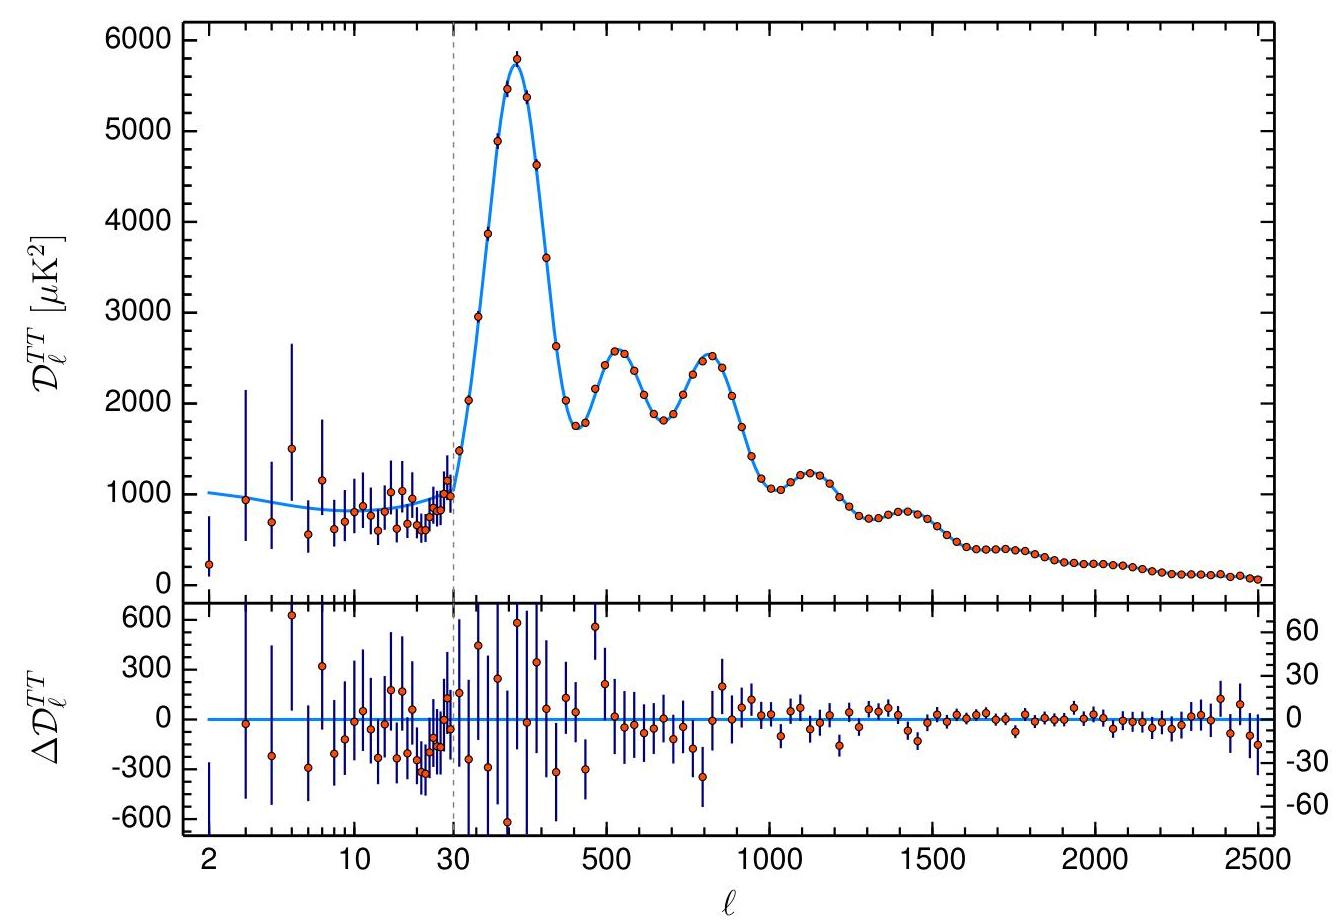

Fig. 1. Planck 2018 temperature power spectrum. At multipoles $\ell \geq 30$ we show the frequency-coadded temperature spectrum computed from the Plik cross-half-mission likelihood, with foreground and other nuisance parameters fixed to a best fit assuming the base- $\Lambda$ CDM cosmology. In the multipole range $2 \leq \ell \leq 29$, we plot the power spectrum estimates from the Commander component-separation algorithm, computed over $86 \%$ of the sky. The base- $\Lambda$ CDM theoretical spectrum best fit to the Planck TT,TE,EE+lowE+lensing likelihoods is plotted in light blue in the upper panel. Residuals with respect to this model are shown in the lower panel. The error bars show $\pm 1 \sigma$ diagonal uncertainties, including cosmic variance (approximated as Gaussian) and not including uncertainties in the foreground model at $\ell \geq 30$. Note that the vertical scale changes at $\ell=30$, where the horizontal axis switches from logarithmic to linear.
it is not possible to inter-calibrate the spectra to a precision of better than $1 \%$ without invoking a reference model. The fiducial theoretical spectra $C_{\ell}^{\mathrm{Th}}$ contained in $C^{\mathrm{Th}}$ are derived from the best-fit temperature data alone, assuming the base- $\Lambda$ CDM model, adding the beam-leakage model and fixing the Galactic dust amplitudes to the central values of the priors obtained from using the $353-\mathrm{GHz}$ maps. This is clearly a model-dependent procedure, but given that we fit over a restricted range of multipoles, where the $T T$ spectra are measured to cosmic variance, the resulting polarization calibrations are insensitive to small changes in the underlying cosmological model.

In principle, the polarization efficiencies found by fitting the $T E$ spectra should be consistent with those obtained from $E E$. However, the polarization efficiency at $143 \times 143, c_{143}^{E E}$, derived from the $E E$ spectrum is about $2 \sigma$ lower than that derived from $T E$ (where the $\sigma$ is the uncertainty of the $T E$ estimate, of the order of 0.02 ). This difference may be a statistical fluctuation or it could be a sign of residual systematics that project onto calibration parameters differently in $E E$ and $T E$. We have investigated ways of correcting for effective polarization efficiencies:
adopting the estimates from $E E$ (which are about a factor of 2 more precise than $T E$ ) for both the $T E$ and $E E$ spectra (we call this the "map-based" approach); or applying independent estimates from $T E$ and $E E$ (the "spectrum-based" approach). In the baseline Plik likelihood we use the map-based approach, with the polarization efficiencies fixed to the efficiencies obtained from the fits on $E E:\left(c_{100}^{E E}\right)_{\text {EE fit }}=1.021 ;\left(c_{143}^{E E}\right)_{\text {EE fit }}=$ 0.966 ; and $\left(c_{217}^{E E}\right)_{\text {EE fit }}=1.040$. The CamSpec likelihood, described in the next section, uses spectrum-based effective polarization efficiency corrections, leaving an overall temperature-topolarization calibration free to vary within a specified prior.

The use of spectrum-based polarization efficiency estimates (which essentially differs by applying to $E E$ the efficiencies given above, and to $T E$ the efficiencies obtained fitting the $T E$ spectra. $\left(c_{100}^{E E}\right)_{\text {TE fit }}=1.04 ;\left(c_{143}^{E E}\right)_{\text {TE fit }}=1.0$, and $\left(c_{217}^{E E}\right)_{\text {TE fit }}=$ 1.02), also has a small, but non-negligible impact on cosmological parameters. For example, for the $\Lambda$ CDM model, fitting the Plik TT,TE,EE+lowE likelihood, using spectrum-based polarization efficiencies, we find small shifts in the base- $\Lambda$ CDM

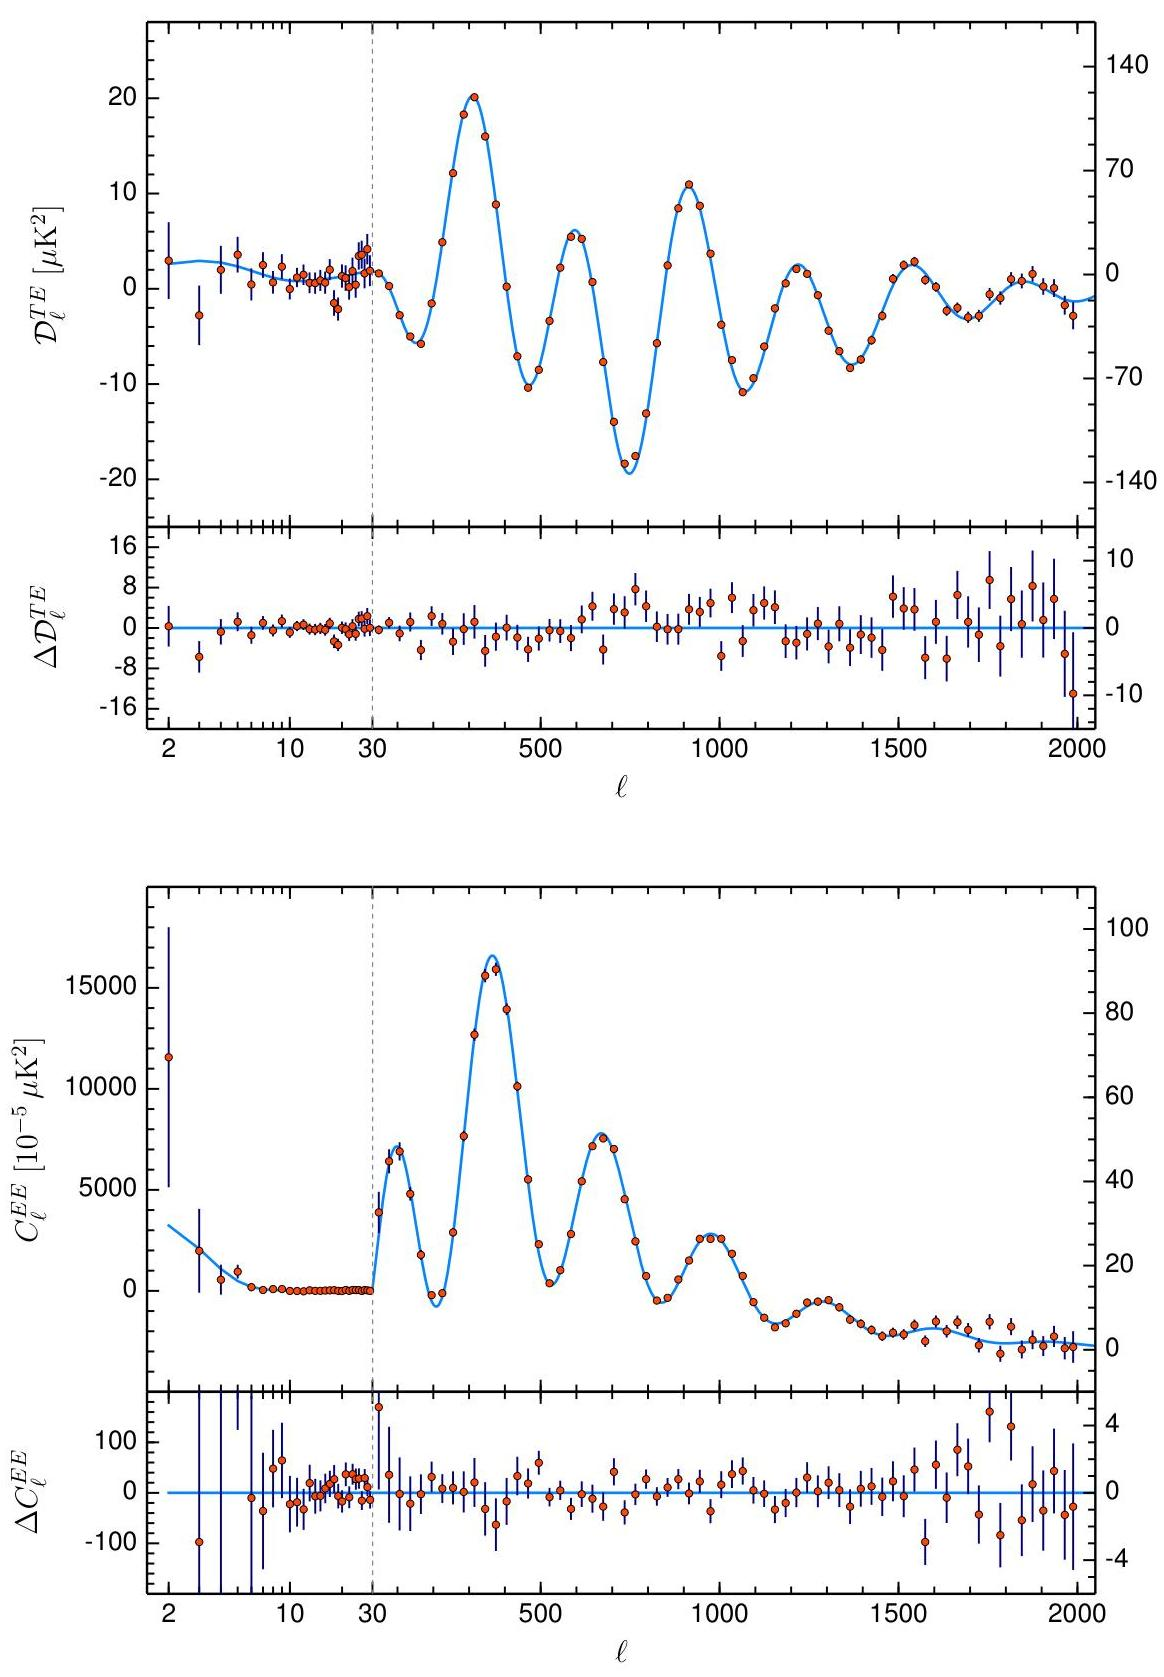

Fig. 2. Planck 2018 TE (top) and $E E$ (bottom) power spectra. At multipoles $\ell \geq 30$ we show the coadded frequency spectra computed from the Plik cross-half-mission likelihood with foreground and other nuisance parameters fixed to a best fit assuming the base- $\Lambda$ CDM cosmology. In the multipole range $2 \leq \ell \leq 29$, we plot the power spectra estimates from the SimAll likelihood (though only the $E E$ spectrum is used in the baseline parameter analysis at $\ell \leq 29$ ). The best-fit base- $\Lambda$ CDM theoretical spectrum fit to the Planck TT,TE,EE+lowE+lensing likelihood is plotted in light blue in the upper panels. Residuals with respect to this model are shown in the lower panels. The error bars show Gaussian $\pm 1 \sigma$ diagonal uncertainties including cosmic variance. Note that the vertical scale changes at $\ell=30$, where the horizontal axis switches from logarithmic to linear.

parameters compared with ignoring spectrum-based polarization efficiency corrections entirely; the largest of these shifts are $+0.5 \sigma$ in $\omega_{\mathrm{b}},+0.1 \sigma$ in $\omega_{\mathrm{c}}$, and $+0.3 \sigma$ in $n_{\mathrm{s}}$ (to be compared to $+0.4 \sigma$ in $\omega_{\mathrm{b}},+0.2 \sigma$ in $\omega_{\mathrm{c}}$, and $+0.2 \sigma$ in $n_{\mathrm{s}}$ for the map-based case). Furthermore, if we introduce the phenomenological $A_{\mathrm{L}}$ parameter (discussed in much greater detail in Sect. 6.2), using the baseline TT,TE,EE+lowE likelihood gives $A_{\mathrm{L}}=1.180 \pm 0.065$, differing from unity by $2.7 \sigma$ (the value of $A_{\mathrm{L}}$ is unchanged with respect to the case where we ignore polar efficiencies entirely, $1.180 \pm 0.065$ ). Switching to spectrumbased polarization efficiency corrections changes this estimate to $A_{\mathrm{L}}=1.142 \pm 0.066$ differing from unity by $2.1 \sigma$. Readers of this paper should therefore not over-interpret the Planck polarization results and should be aware of the sensitivity of these results to small changes in the specific choices and assumptions made in constructing the polarization likelihoods, which are not accounted for in the likelihood error model. To emphasize this point, we also give results from the CamSpec likelihood (see, e.g., Table 1), described in the next section, which has been constructed independently of Plik. We also note that if we apply the CamSpec polarization masks and spectrum-based polarization efficiencies in the Plik likelihood, then the cosmological parameters from the two likelihoods are in close agreement.

The coadded 2018 Plik temperature and polarization power spectra and residuals with respect to the base- $\Lambda$ CDM model are shown in Figs. 1 and 2.

### 2.2.2. The CamSpec likelihood

The CamSpec temperature likelihood was used as the baseline for the first analysis of cosmological parameters from Planck, reported in PCP13, and was described in PPL13. A detailed description of CamSpec and its generalization to polarization is given in Efstathiou \& Gratton (2019). For PCP15, the CamSpec temperature likelihood was unaltered from that adopted in PPL13, except that we used half-mission cross-spectra instead of detector-set cross-spectra and made minor modifications to the foreground model. For this set of papers, the CamSpec temperature analysis uses identical input maps and masks as Plik and is unaltered from PCP15, except for the following details.

- In previous versions we used half-ring difference maps (constructed from the first and second halves of the scanning rings within each pointing period) to estimate noise. In this release we have used differences between maps constructed from odd and even rings. The use of odd-even differences makes almost no difference to the temperature analysis, since the temperature spectra that enter the likelihood are signal dominated over most of the multipole range. However, the odd-even noise estimates give higher noise levels than half-ring difference estimates at multipoles $\leqslant 500$ (in qualitative agreement with end-to-end simulations), and this improves the $\chi^{2}$ of the polarization spectra. This differs from the Plik likelihood, which uses the half-ring difference maps to estimate the noise levels, together with a correction to compensate for correlated noise, as described in PPL18.
- In PCP15, we used power-spectrum templates for the CIB from the halo models described in Planck Collaboration XXX (2014). The overall amplitude of the CIB power spectrum at 217 GHz was allowed to vary as one of the "nuisance" parameters in the likelihood, but the relative amplitudes at $143 \times 217$ and $143 \times 143$ were fixed to the values given by the model. In the 2018 analysis, we retain the template shapes from Planck Collaboration XXX (2014), but allow free amplitudes at $217 \times 217,143 \times 217$, and $143 \times 143$. The CIB is ignored at 100 GHz . We made these changes to the 2018 CamSpec likelihood to reduce any
source of systematic bias associated with the specific model of Planck Collaboration XXX (2014), since this model is uncertain at low frequencies and fails to match Herschel-SPIRE measurements (Viero et al. 2013) of the CIB anisotropies at 350 and $500 \mu \mathrm{~m}$ for $\ell \gtrsim 3000$ (Mak et al. 2017). This change was implemented to see whether it had any impact on the value of the lensing parameter $A_{\mathrm{L}}$ (see Sect. 6.2); however, it has a negligible effect on $A_{\mathrm{L}}$ or on other cosmological parameters. The Plik likelihood retains the 2015 model for the CIB.
- In PCP15 we used a single functional form for the Galactic dust power spectrum template, constructed by computing differences of $545 \times 545$ power spectra determined using different masks. The dust template was then rescaled to match the dust amplitudes at lower frequencies for the masks used to form the likelihood. In the 2018 CamSpec likelihood we use dust templates computed from the $545 \times 545$ spectra, using masks with exactly the same point-source holes as those used to compute the $100 \times 100,143 \times 143,143 \times 217$, and $217 \times 217$ power spectra that are used in the likelihood. The Plik likelihood adopts a similar approach and the CamSpec and Plik dust templates are in very good agreement.

In forming the temperature likelihood, we apply multipole cuts to the temperature spectra as follows: $\ell_{\min }=30, \ell_{\max }=$ 1200 for the $100 \times 100$ spectrum; $\ell_{\min }=30, \ell_{\max }=2000$ for the $143 \times 143$ spectrum; and $\ell_{\min }=500, \ell_{\max }=2500$ for $143 \times 217$ and $217 \times 217$. As discussed in previous papers, the $\ell_{\min }$ cuts applied to the $143 \times 217$ and $217 \times 217$ spectra are imposed to reduce any potential systematic biases arising from Galactic dust at these frequencies. A foreground model is included in computing the covariance matrices, assuming that foregrounds are isotropic and Gaussian. This model underestimates the contribution of Galactic dust to the covariances, since this component is anisotropic on the sky. However, dust always makes a very small contribution to the covariance matrices in the CamSpec likelihood. Mak et al. (2017) describe a simple model to account for the Galactic dust contributions to covariance matrices.

It is important to emphasize that these changes to the 2018 CamSpec TT likelihood are largely cosmetic and have very little impact on cosmological parameters. This can be assessed by comparing the CamSpec TT results reported in this paper with those in PCP15. The main changes in cosmological parameters from the TT likelihood come from the tighter constraints on the optical depth, $\tau$, adopted in this paper.

In polarization, CamSpec uses a different methodology to Plik. In temperature, there are a number of frequencydependent foregrounds at high multipoles that are described by a physically motivated parametric model containing "nuisance" parameters. These nuisance parameters are sampled, along with cosmological parameters, during Markov chain Monte Carlo (MCMC) exploration of the likelihood. The TT likelihood is therefore a power-spectrum-based component-separation tool and it is essential to retain cross-power spectra for each distinct frequency combination. For the Planck TE and EE spectra, however, Galactic dust is by far the dominant foreground contribution. At the multipoles and sensitivities accessible to Planck, polarized point sources make a negligible contribution to the foreground (as verified by ACTPol and SPTpol; Louis et al. 2017; Henning et al. 2018), so the only foreground that needs to be subtracted is polarized Galactic dust emission. As described in PCP15, we subtract polarized dust emission from each TE/ET and $E E$ spectrum using the $353-\mathrm{GHz}$ half-mission maps. This is done in an analogous way to the construction of $545-\mathrm{GHz}$ cleaned temperature maps described in PCP15 and Appendix A. Since the $353-\mathrm{GHz}$ maps are noisy at high multipoles we use

the cleaned spectra at multipoles $\leq 300$ and extrapolate the dust model to higher multipoles by fitting power laws to the dust estimates at lower multipoles.

The polarization spectra are then corrected for temperature-to-polarization leakage and effective polarization efficiencies as described below, assuming a fiducial theoretical power spectrum. The corrected $T E / E T$ spectra and $E E$ spectra for all halfmission cross-spectra constructed from 100-, 143-, and 217-GHz maps are then coadded to form a single $T E$ spectrum and a single $E E$ spectrum for the CamSpec likelihood. The polarization part of the CamSpec likelihood therefore contains no nuisance parameters other than overall calibration factors $c_{T E}$ and $c_{E E}$ for the $T E$ and $E E$ spectra. Since the CamSpec likelihood uses coadded $T E$ and $E E$ spectra, we do not need to bin the spectra to form a TT,TE,EE likelihood. The polarization masks used in CamSpec are based on 353-143 GHz polarization maps that are degraded in resolution and thresholded on $P=\left(Q^{2}+U^{2}\right)^{1 / 2}$. The default CamSpec polarization mask used for the 2018 analysis preserves a fraction $f_{\mathrm{sky}}=57.7 \%$ and is apodized to give an effective sky fraction (see equation 10 of PCP15) of $f_{\mathrm{sky}}^{\mathrm{W}}=47.7 \%$. We use the same polarization mask for all frequencies. The CamSpec polarization masks differ from those used in the Plik likelihood, which uses intensity-thresholded masks in polarization (and therefore a larger effective sky area in polarization, as described in the previous section).

To construct covariance matrices, temperature-topolarization leakage corrections, and effective polarization efficiencies, we need to adopt a fiducial model. For the 2018 analysis, we adopted the best-fit CamSpec base- $\Lambda$ CDM model from PCP15 to construct a likelihood from the 2018 temperature maps. We then ran a minimizer on the TT likelihood, imposing a prior of $\tau=0.05 \pm 0.02$, and the best-fit base- $\Lambda$ CDM cosmology was adopted as our fiducial model. To deal with temperature-to-polarization leakage, we used the QuickPol polarized beam matrices to compute corrections to the $T E$ and $E E$ spectra assuming the fiducial model. The temperature-to-polarization leakage corrections are relatively small for $T E$ spectra (although they have some impact on cosmological parameters, consistent with the behaviour of the Plik likelihood described in the previous section), but are negligible for $E E$ spectra.

To correct for effective polarization efficiencies (including large-scale transfer functions arising from errors in the polarized beams) we recalibrated each $T E, E T$, and $E E$ spectrum against the fiducial model spectra by minimizing

$$
\chi^{2}=\sum_{l, l_{o}}^{1}\left(C_{l_{o}}^{\mathrm{D}}-\alpha_{\mathrm{P}} C_{l_{o}}^{\mathrm{Th}}\right) M_{l, l_{o}}^{1}\left(C_{l_{o}}^{\mathrm{D}}-\alpha_{\mathrm{P}} C_{l_{o}}^{\mathrm{Th}}\right)
$$

with respect to $\alpha_{\mathrm{P}}$, where $C_{l_{o}}^{\mathrm{D}}$ is the beam-corrected data spectrum ( $T E, E T$, or $E E$ ) corrected for temperature-to-polarization leakage, M is the covariance matrix for the appropriate spectrum, and the sums extend over $200 \leq \ell \leq 1000$. We calibrate each $T E$ and $E E$ spectrum individually, rather than computing map-based polarization calibrations. Although there is a good correspondence between spectrum-based calibrations and map-based calibrations, we find evidence for some differences, particularly for the $143 \times 143 E E$ spectrum in agreement with the Plik analysis. Unlike Plik, we adopt spectrum-based calibrations of polarization efficiencies in preference to map-based calibrations.

As in temperature, we apply multipole cuts to the polarization spectra prior to coaddition in order to reduce sensitivity to dust subtraction, beam estimation, and noise modelling. For $T E / E T$ spectra we use: $\ell_{\min }=30$ and $\ell_{\max }=1200$ for the $100 \times 100,100 \times 143$ and $100 \times 217$ spectra; $\ell_{\min }=30$ and

$$
\ell_{\max }=2000 \text { for } 143 \times 143 \text { and } 143 \times 217 \text {; and } \ell_{\min }=500
$$

and $\ell_{\max }=2500$ for the $217 \times 217$ cross-spectrum. For $E E$, we use: $\ell_{\min }=30$ and $\ell_{\max }=1000$ for $100 \times 100 ; \ell_{\min }=30$ and $\ell_{\max }=1200$ for $100 \times 143 ; \ell_{\min }=200$ and $\ell_{\max }=1200$ for $100 \times 217 ; \ell_{\min }=30$ and $\ell_{\max }=1500$ for $143 \times 143 ; \ell_{\min }=300$ and $\ell_{\max }=2000$ for $143 \times 217$; and $\ell_{\min }=500$ and $\ell_{\max }=2000$ for $217 \times 217$. Since dust is subtracted from the polarization spectra, we do not include a dust model in the polarization covariance matrices. Note that at low multipoles, $\ell \lesssim 300$, Galactic dust dominates over the CMB signal in $E E$ at all frequencies. We experimented with different polarization masks and different multipole cuts and found stable results from the CamSpec polarization likelihood.

To summarize, for the $T T$ data Plik and CamSpec use very similar methodologies and a similar foreground model, and the power spectra used in the likelihoods only differ in the handling of missing pixels. As a result, there is close agreement between the two temperature likelihoods. In polarization, different polarization masks are applied and different methods are used for correcting Galactic dust, effective polarization calibrations, and temperature-to-polarization leakage. In addition, the polarization covariance matrices differ at low multipoles. As described in Appendix A, the two codes give similar results in polarization for base $\Lambda$ CDM and most of the extensions of $\Lambda$ CDM considered in this paper, and there would be no material change to most of the science conclusions in this paper were one to use the CamSpec likelihood in place of Plik. However, in cases where there are differences that could have an impact on the scientific interpretation (e.g., for $A_{\mathrm{L}}, \sum m_{\mathrm{e}}$, and $\Omega_{K}$ ) we show results from both codes. This should give the reader an impression of the sensitivity of the science results to different methodologies and choices made in constructing the polarization blocks of the high-multipole likelihoods.

### 2.2.3. The low- $\ell$ likelihood

The HFI low- $\ell$ polarization likelihood is based on the fullmission HFI 100 -GHz and 143-GHz Stokes $Q$ and $U$ lowresolution maps, cleaned through a template-fitting procedure using LFI 30-GHz (Planck Collaboration II 2020) and HFI 353GHz maps, ${ }^{9}$ which are used as tracers of polarized synchrotron and thermal dust, respectively (for details about the cleaning procedure see PPL18). Power spectra are calculated based on a quadratic maximum-likelihood estimation of the cross-spectrum between the 100 - and 143-GHz data, and the multipole range used spans $\ell=2$ to $\ell=29$.

We only use the $E E$ likelihood ("lowE") for the main parameter results in this paper. The likelihood code, called SimAll, is based on the power spectra. It is constructed using an extension of the SimBaL algorithm presented in Planck Collaboration Int. XLVI (2016), using 300 end-to-end simulations characterizing the HFI noise and residual systematics (see Planck Collaboration III 2020, for details) to build an empirical probability distribution of the $E E$ spectra (ignoring the off-diagonal correlations). The $T E$ spectrum at low multipoles does not provide tight constraints compared to $E E$ because of cosmic variance. However, PPL18 discusses the $T E$ spectra at low multipoles constructed by cross-correlating the Commander

[^0]
[^0]:    ${ }^{9}$ The polarized synchrotron component is fitted only at 100 GHz , being negligible at 143 GHz . For the polarized dust component, following the prescription contained in Planck Collaboration III (2020), the low- $\ell$ HFI polarization likelihood uses the $353-\mathrm{GHz}$ polarization-sensitive-bolometer-only map.

component-separated map with the 100- and 143-GHz maps. The $T E$ spectra show excess variance compared to simulations at low multipoles, most notably at $\ell=5$ and at $\ell=18$ and 19, for reasons that are not understood. No attempt has been made to fold in Commander component-separation errors in the statistical analysis. We have therefore excluded the $T E$ spectrum at low multipoles (with the added benefit of simplifying the construction of the SimAll likelihood). Little information is lost by discarding the $T E$ spectrum. Evidently, further work is required to understand the behaviour of $T E$ at low multipoles; however, as discussed in PPL18, the $\tau$ constraint derived from $T E$ to $\ell_{\text {max }}=10(\tau=0.051 \pm 0.015)$ is consistent with results derived from the SimAll EE likelihood summarized below.

Using the SimAll likelihood combined with the low- $\ell$ temperature Commander likelihood (see Planck Collaboration IV 2020), varying $\ln \left(10^{10} A_{\mathrm{s}}\right)$ and $\tau$, but fixing other cosmological parameters to those of a fiducial base-ACDM model (with parameters very close to those of the baseline $\Lambda$ CDM cosmology in this paper), PPL18 reports the optical depth measurement ${ }^{10}$

$$
\tau=0.0506 \pm 0.0086 \quad(68 \%, \text { lowE })
$$

This is significantly tighter than the LFI-based constraint used in the 2015 release ( $\tau=0.067 \pm 0.022$ ), and differs by about half a sigma from the result of Planck Collaboration Int. XLVI (2016) $(\tau=0.055 \pm 0.009)$. The latter change is driven mainly by the removal of the last 1000 scanning rings in the 2018 SRoll maps, higher variance in the end-to-end simulations, and differences in the 30-GHz map used as a synchrotron tracer (see appendix A of Planck Collaboration II 2020). The impact of the tighter optical depth measurement on cosmological parameters compared to the 2015 release is discussed in Sect. 3.6. The error model in the final likelihood does not fully include all modelling uncertainties and differences between likelihood codes, but the different approaches lead to estimates of $\tau$ that are consistent within their respective $1 \sigma$ errors.

In addition to the default SimAll lowE likelihood used in this paper, the LFI polarization likelihood has also been updated for the 2018 release, as described in detail in PPL18. It gives consistent results to SimAll, but with larger errors ( $\tau=$ $0.063 \pm 0.020$ ); we give a more detailed comparison of the various $\tau$ constraints in Sect. 7.8.

The low- $\ell$ temperature likelihood is based on maps from the Commander component-separation algorithm, as discussed in detail in Planck Collaboration IV (2020), with a Gibbs-samplebased Blackwell-Rao likelihood that accurately accounts for the non-Gaussian shape of the posterior at low multipoles, as in 2015. The CMB maps that are used differ in several ways from the 2015 analysis. Firstly, since the 2018 analysis does not produce individual bolometer maps (since it is optimized to reduce large-scale polarization systematics) the number of foreground components that can be constrained is reduced compared to 2015. The 2018 Commander analysis only fits the CMB, a single general low-frequency power-law component, thermal dust, and a single CO component with spatially constant line ratios between 100, 217, and 353 GHz . Secondly, the 2018 analysis is

[^0]based only on Planck data and so does not including the WMAP and Haslam 408-MHz maps. Finally, in order to be conservative with respect to CO emission, the sky fraction has been reduced to $86 \%$ coverage, compared to $93 \%$ in 2015. The net effect is a small increase in errors, and the best-fit data points are correspondingly slightly more scattered compared to 2015. The (arbitrary) normalization of the Commander likelihood was also changed, so that a theory power spectrum equal to the best-fit power spectrum points will, by definition, give $\chi_{\text {eff }}^{2}=0$.

### 2.2.4. Likelihood notation

Throughout this paper, we adopt the following labels for likelihoods: (i) Planck TT+lowE denotes the combination of the high$\ell$ TT likelihood at multipoles $\ell \geq 30$, the low- $\ell$ temperatureonly Commander likelihood, and the low- $\ell$ EE likelihood from SimAll; (ii) labels such as Planck TE+lowE denote the TE likelihood at $\ell \geq 30$ plus the low- $\ell$ EE SimAll likelihood; and (iii) Planck TT,TE,EE+lowE denotes the combination of the combined likelihood using $T T, T E$, and $E E$ spectra at $\ell \geq 30$, the low- $\ell$ temperature Commander likelihood, and the low- $\ell$ SimAll EE likelihood. For brevity we sometimes drop the "Planck" qualifier where it should be clear, and unless otherwise stated high- $\ell$ results are based on the Plik likelihood. $T E$ correlations at $\ell \leq 29$ are not included in any of the results presented in this paper.

### 2.2.5. Uncertainties on cosmological parameters

To maximize the accuracy of the results, various choices can be made in the construction of the high-multipole likelihoods. Examples of these are the sky area, noise models, multipole ranges, frequencies, foreground parameterization, and priors, as detailed for this release of Planck data in PPL18. The cosmological parameters and their uncertainties depend on these options. It is therefore necessary to test the sensitivity of the results with respect to such choices. In particular, when removing or adding independent information (e.g., by lifting or adding priors, or by measuring parameters from different multipole ranges), we do expect cosmological parameters to shift. The crucial question, however, is whether these are in agreement with statistical expectations. If they are consistent with being statistical excursions, then the noise model, along with foreground and instrumental nuisance parameters (e.g., polarization efficiencies), may be a consistent representation of the data. In this case, the uncertainties quoted in this paper should accurately describe the combined noise and sample variance due to finite data. Different choices of sky area, multipole range, etc., will produce changes in the parameters, but they will be adequately described by the quoted uncertainties. On the other hand, if the shifts do not agree with statistical expectations, they might be an indication of unmodelled systematic effects.

In PPL18 we discuss a series of tests indicating the overall robustness of our results. Internal to the Plik likelihood code, we consider the CMB spectra, errors, and resulting parameters as we vary the input data, $\ell$ range, sky area, etc. We also consider the effect of known sources of systematic uncertainty, such as high-frequency oscillations in the raw time-ordered data and temperature-to-polarization leakage. We further test the baseline likelihood using extensive simulations; these tests demonstrate the solidity of our results. As a specific example, when lifting all priors on nuisance parameters (such as calibration and foregrounds), the posterior mean on the number of relativistic


[^0]:    ${ }^{10}$ The corresponding marginalized amplitude parameter is $\ln \left(10^{10} A_{\mathrm{s}}\right)=2.924 \pm 0.052$, which gives $A_{\mathrm{s}}$ about $10 \%$ lower than the value obtained from the joint fits in Sect. 3. The $\tau$ constraints quoted here are lower than the joint results, since the small-scale power has a preference for higher $A_{\mathrm{s}}$ (and hence higher $\tau$ for the well-measured $A_{\mathrm{s}} e^{-2 \tau}$ combination) at high multipoles, related to the preference for more lensing discussed in Sect. 6.

species $N_{\text {eff }}$ shifts upwards by about $1 \sigma$. We quantify in PPL18 that this is statistically not anomalous, since lifting priors reduces information and, as a consequence, error bars also increase.

Only in a small number of areas, do such tests show mild internal disagreements at the level of spectra and parameters. One example is the higher than expected $\chi^{2}$ of the Plik TE frequency-likelihood, which can be traced back to a small mismatch between the different cross-frequency spectra. When we co-add the foreground-cleaned frequency TE spectra into one CMB spectrum (which is less sensitive to such a mismatch), the related $\chi^{2}$ is in better agreement with expectations. A second example is the choice of polarization-efficiency corrections, which has a small impact on the final results and is further discussed below.

We have also compared the results from the Plik likelihood with those obtained with CamSpec in Sects. 2.2.1 and 2.2.2 and Appendix A, as well as in PPL18 (see also Efstathiou \& Gratton 2019). Some of the likelihood choices (e.g., sky area and multipole range) will give different detailed results within the expected sample variance. Others, such as the models for noise (bias-corrected half-ring difference for Plik versus odd-even rings for CamSpec) and polarization efficiency, may give a hint of residual systematic uncertainties. If we restrict ourselves to temperature, the Plik and CamSpec likelihoods are in excellent accord, with most parameters agreeing to better than $0.5 \sigma(0.2 \sigma$ on the $\Lambda$ CDM model). On the other hand, we find indications (discussed in more detail in PPL18) that the polarization efficiencies of the frequency-channel maps differ when measured in the $T E$ or $E E$ spectra, and the Plik and CamSpec likelihoods have explored different choices of polarization efficiency corrections. This and polarization-noise modelling may be responsible for differences in the details of the resulting polarization spectra and parameters.

For the base- $\Lambda$ CDM model, the results from Plik and CamSpec for the TT,TE,EE likelihoods are in good agreement (see Table 1), again with most parameters agreeing to better than $0.5 \sigma$. We also find differences between the Plik and CamSpec TTTEEE likelihoods for some extended models, especially for the single-parameter extensions with $A_{\mathrm{L}}$ (at $0.7 \sigma$ ) and $\Omega_{\mathrm{K}}$ (at $0.5 \sigma$ ); these differences are discussed in Sects. 6.2 and 7.3, respectively, where we show results for both likelihoods. For both $A_{\mathrm{L}}$ and $\Omega_{\mathrm{K}}$, the Plik TT,TE,EE likelihood pulls away from the base- $\Lambda$ CDM model with a slightly higher significance than the CamSpec TT,TE,EE likelihood. The is due, at least in part, to the choice of how to model polarization efficiencies, as discussed in PPL18. For the $\Omega_{K}$ case, for example, the $\Delta \chi^{2}$ between the $\Lambda$ CDM and $\Lambda$ CDM $+\Omega_{K}$ models for TT,TE,EE+lowE is $\Delta \chi^{2}=11$, of which $8.3 \Delta \chi$ points are due to the improvement of the Plik TT,TE,EE likelihood. Using spectrum-based polarization efficiencies, instead of map-based ones ${ }^{11}$ reduces that total difference to $\Delta \chi^{2}=5.2$, of which $\Delta \chi^{2}=4.6$ is due to the Plik likelihood. This is in agreement with the $\Delta \chi^{2}$ value obtained for these models by CamSpec, which uses spectrumbased polarization efficiencies, with $\Delta \chi^{2}=4.3$.

Other details of choices in the likelihood functions impact the difference in parameters; however, these comprise both expected statistical fluctuations (due to differing raw data cuts

[^0]and sky coverage) and possible residual systematic errors. For both extended models the Planck TTTEEE likelihoods are usually combined with other data to break parameter degeneracies. For these parameters, the addition of either Planck lensing or BAO data overwhelms any differences between the Plik and CamSpec likelihoods and so we find almost identical results.

In this paper we therefore do not explicitly model an increase in error bars due to these residual systematic errors - any such characterization would inevitably be incomplete, and it would also be impossible to give the necessary probabilistic characterization required for meaningful quantitative error bars. Instead our best-fit values, posterior means, errors and limits should (as always) be considered as conditional on the cosmological model and our best knowledge of the Planck instruments and astrophysical foregrounds, as captured by the baseline likelihoods.

### 2.3. The CMB lensing likelihood

The CMB photons that arrive here today traverse almost the entire observable Universe. Along the way their paths are deflected by gradients in the gravitational potentials associated with inhomogeneities in the Universe (Blanchard \& Schneider 1987). The dominant effects (e.g., Lewis \& Challinor 2006; Hanson et al. 2010) are a smoothing of the acoustic peaks, conversion of $E$ mode polarization to $B$-mode polarization, and generation of a connected 4-point function, each of which can be measured in high angular resolution, low-noise observations, such as those from Planck.

Planck was the first experiment to measure the lensing signal to sufficient precision for it to become important for the determination of cosmological parameters, providing sensitivity to parameters that affect the late-time expansion, geometry, and clustering (Planck Collaboration XVII 2014, hereafter PL2013). In Planck Collaboration XV (2016, hereafter PL2015) the Planck lensing reconstruction was improved by including polarization information. The Planck lensing measurement is still the most significant detection of CMB lensing to date. In this final data release we report a measurement of the power spectrum of the lensing potential, $C_{L}^{\delta \delta}$, from the 4-point function, with a precision of around $2.6 \%$ on the amplitude, as discussed in detail in PL2018. We demonstrate the robustness of the reconstruction to a variety of tests over lensing multipoles $8 \leq L \leq 400$, and conservatively restrict the likelihood to this range to reduce the impact of possible systematics. Compared to 2015, the multipole range is extended from $L_{\text {min }}=40$ down to $L_{\text {min }}=8$, with other analysis changes mostly introducing random fluctuations in the band powers, due to improvements in the noise modelling and the somewhat different mixture of frequencies being used in the foreground-cleaned SMICA maps (see Planck Collaboration IV 2020). The signal-to-noise per multipole is almost the same as in 2015, which, combined with the wider multipole range, makes the likelihood just slightly more powerful than in 2015. CMB lensing can provide complementary information to the Planck CMB power spectra, since it it probes much lower redshifts, including $z \leq 2$, when dark energy becomes important. The lensing effect depends on the propagation of photons on null geodesics, and hence depends on the background geometry and Weyl potential (the combination of scalar metric perturbations that determines the Weyl spacetime curvature tensor; see e.g. Lewis \& Challinor (2006)).

We approximate the lensing likelihood as Gaussian in the estimated band powers, making perturbative corrections for the small dependence of band powers on the cosmology, as de-


[^0]:    ${ }^{11}$ As explained in Sections 2.2.1 and 2.2.2, the "map-based" approach applies the same polarization efficiency corrections estimated from $E E$ to both the $T E$ and $E E$ spectra, while the "spectrum-based" approach applies independent estimates obtained from $T E$ and $E E$ to the $T E$ and $E E$ spectra, respectively.

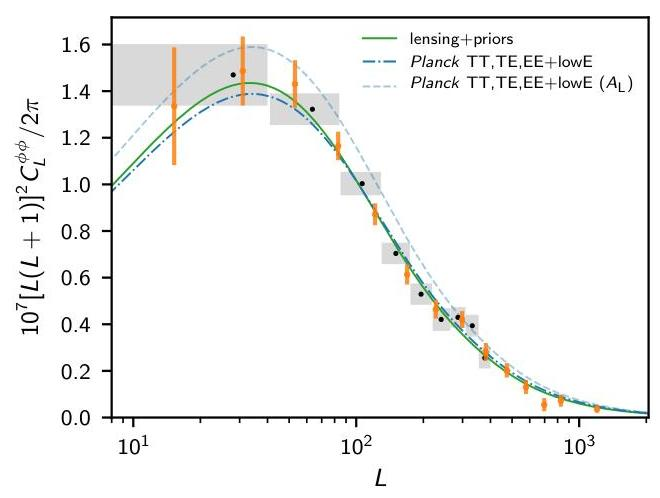

Fig. 3. CMB lensing-potential power spectrum, as measured by Planck (see PL2018 for a detailed description of this measurement). Orange points show the full range of scales reconstructed with a logarithmic binning, while grey bands show the error and multipole range of the conservative band powers used for the likelihood, with black points showing the average multipole of the band weight. The solid line shows the best $\Lambda$ CDM fit to the conservative points alone, and the dot-dashed line shows the prediction from the best fit to the Planck CMB power spectra alone. The dashed line shows the prediction from the best fit to the CMB power spectra when the lensing amplitude $A_{\mathrm{L}}$ is also varied ( $A_{\mathrm{L}}=1.19$ for the best-fit model; see Sect. 6.2 for a detailed discussion of $A_{\mathrm{L}}$ ).
scribed in PL2015. We neglect correlations between the 2 and 4-point functions, which are negligible at Planck sensitivity (Schmittfull et al. 2013; Peloton et al. 2017). As in PL2015, band powers at multipoles $L>400$ are less robust than over $8 \leq L \leq 400$, with some evidence for a curl-test failure, and possibly also systematic differences between individual frequencies that we were unable to resolve. Multipoles at $L<8$ are very sensitive to the large mean-field correction on these scales, and hence are sensitive to the fidelity of the simulations used to estimate the mean field. As described above, our baseline cosmological results therefore conservatively use only the multipole range $8 \leq L \leq 400$.

The Planck measurements of $C_{\ell}^{\phi \phi}$ are plotted in Fig. 3, where they are compared to the predicted spectrum from the best-fitting base- $\Lambda$ CDM model of Sect. 3, and Fig. 4 shows the corresponding broad redshift ranges that contribute to the lensing band powers in the $\Lambda$ CDM model. Fig. 3 shows that the lensing data are in excellent agreement with the predictions inferred from the CMB power spectra in the base- $\Lambda$ CDM model ( $\chi_{\mathrm{eff}}^{2}=8.9$ for 9 binned conservative band-power measurements, $\chi_{\text {eff }}^{2}=14.0$ for 14 bins over the full multipole range; we discuss agreement in extensions to the $\Lambda$ CDM model in more detail below). The lensing data prefer lensing power spectra that are slightly tilted towards less power on small scales compared to the best fit to the CMB power spectra. This small tilt pulls joint constraints a small fraction of an error bar towards parameters that give a lower lensing amplitude on small scales. Parameter results from the full multipole range would be a little tighter and largely consistent with the conservative band powers, although preferring slightly lower fluctuation amplitudes (see PL2018).
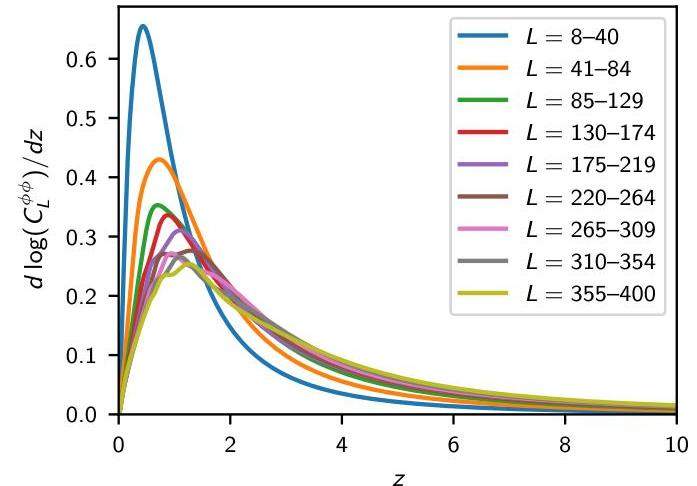

Fig. 4. Contributions to the conservative CMB lensing band powers (see text and Fig. 3) as a function of redshift in the base- $\Lambda$ CDM model (evaluated here, and only here, using the Limber approximation (LoVerde \& Afshordi 2008) on all scales). Multipole ranges of the corresponding band powers are shown in the legend.

As described in detail in PL2018, the lensing likelihood (in combination with some weak priors) can alone provide $\Lambda$ CDM parameter constraints that are competitive with current galaxy lensing and clustering, measuring
$\sigma_{8} \Omega_{\mathrm{m}}^{0.25}=0.589 \pm 0.020 \quad(68 \%$, Planck lensing $)$.
Combined with BAO (see Sect. 5.1 below) and a baryon density prior to break the main degeneracy between $H_{0}, \Omega_{\mathrm{m}}$, and $\sigma_{8}$ (described in PL2015), individual parameters $H_{0}, \Omega_{\mathrm{m}}$, and $\sigma_{8}$ can also separately be constrained to a precision of a few percent. We use $\Omega_{\mathrm{b}} h^{2}=0.0222 \pm 0.0005$ (motivated by the primordial deuterium abundance measurements of Cooke et al. 2018, see also Sect. 7.6), which gives

$$
\left.\begin{array}{l}
H_{0}=67.9_{-1.3}^{+1.2} \mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1} \\
\sigma_{8}=0.811 \pm 0.019 \\
\Omega_{\mathrm{m}}=0.303_{-0.018}^{+0.016}
\end{array}\right\} \quad 68 \% \text {, lensing+BAO. }
$$

The constraints of Eq. (5) and (6) in are in very good agreement with the estimates derived from the Planck power spectra and are independent of how the Planck power spectra depend on the cosmological model at high multipoles. This is a strong test of the internal consistency of the Planck data. The Planck lensing constraints in Eqs. (5) and (6), and the consistency of these results with the Planck power spectrum likelihoods, should be borne in mind when comparing Planck results with other astrophysical data (e.g., direct measurements of $H_{0}$ and galaxy shear surveys, see Sect. 5).

In this paper, we focus on joint constraints with the main Planck power spectrum results, where the lensing power spectrum tightens measurements of the fluctuation amplitude and improves constraints on extended models, especially when allowing for spatial curvature.

A peculiar feature of the Planck TT likelihood, reported in PCP13 and PCP15, is the favouring of high values for the lens-

ing consistency parameter $A_{\mathrm{L}}$ (at about $2.5 \sigma$ ). This result is discussed in detail in Sect. 6.2. It is clear from Fig. 3, however, that the Planck lensing likelihood prefers values of $A_{\mathrm{L}}$ close to unity and cosmological parameters that are close to those of the bestfit base- $\Lambda$ CDM parameters derived from the Planck TT,TE,EE +lowE+lensing likelihood (i.e., without allowing $A_{\mathrm{L}}$ to vary).

## 3. Constraints on base $\Lambda$ CDM

The Planck measurement of seven acoustic peaks in the CMB temperature power spectrum allows cosmological parameters to be constrained extremely accurately. In previous papers, we have focussed on parameters derived from the $T T$ power spectrum. The $T E$ and $E E$ polarization spectra provide a powerful consistency check on the underlying model and also help to break some partial parameter degeneracies. The goal of this section is to explore the consistency of cosmological parameters of the base$\Lambda$ CDM cosmology determined from $T T, T E$, and $E E$ spectra and to present results from the combinations of these spectra, which are significantly more precise that those determined using $T T$ alone.

Figure 5 shows 2-dimensional marginalized constraints on the six MCMC sampling parameters of the base- $\Lambda$ CDM model used to explore the parameter posteriors, plotted against the following derived parameters: the Hubble constant $H_{0}$, late-time clustering amplitude $\sigma_{8}$ and matter density parameter $\Omega_{\mathrm{m}}$ (defined including a $0.06-\mathrm{eV}$ mass neutrino). Table 1 gives individual parameter constraints using our baseline parameter combination Planck TT,TE,EE+lowE+lensing. These represent the legacy results on the cosmological $\Lambda$ CDM parameters from the Planck satellite, and are currently the most precise measurements coming from a single CMB experiment. We give the bestfit values, as well as the marginalized posterior mean values, along with the corresponding $68 \%$ probability intervals. Table 1 also quantifies the small changes in parameters that are found when using the Plik and CamSpec high- $\ell$ polarization analyses described in Sect. 2.2 and Appendix A. Table 2 gives marginalized parameter constraints from the various CMB spectra, individually and without CMB lensing, including a wider variety of derived parameters of physical interest.

We now discuss in more detail the parameters that are most directly measured by the data and how these relate to constraints on individual parameters of more general interest.

### 3.1. Acoustic scale

The acoustic oscillations in $\ell$ seen in the CMB power spectra correspond to a sharply-defined acoustic angular scale on the sky, given by $\theta_{*} \equiv r_{*} / D_{\mathrm{M}}$ where $r_{*}$ is the comoving sound horizon at recombination quantifying the distance the photon-baryon perturbations can influence, and $D_{\mathrm{M}}$ is the comoving angular diameter distance ${ }^{12}$ that maps this distance into an angle on the sky. Planck measures
$100 \theta_{*}=1.04097 \pm 0.00046 \quad(68 \%$, Planck TT+lowE),
corresponding to a precise $0.05 \%$ measurement of the angular scale $\theta_{*}=(0^{\circ} .59643 \pm 0^{\circ} .00026)$. The angular scales of the peaks in the polarization spectrum and cross-spectrum are different,

[^0]since the polarization at recombination is sourced by quadrupolar flows in the photon fluid, which are out of phase with the density perturbations. The polarization spectra can, however, be used to measure the same acoustic scale parameter, giving a stringent test on the assumption of purely adiabatic perturbation driving the oscillations. From the polarization spectra we find
$100 \theta_{*}=1.04156 \pm 0.00049 \quad(68 \%$, Planck TE+lowE), (8a)
$100 \theta_{*}=1.04001 \pm 0.00086 \quad(68 \%$, Planck EE+lowE), (8b)
in excellent agreement with the temperature measurement. The constraint from $T E$ is of similar precision to that from $T T$ : although the polarization data are much noisier, the $T E$ and $E E$ spectra have more distinct acoustic peaks, which helps improve the signal-to-noise ratio of the acoustic scale measurement. Using the combined likelihood we find:
$100 \theta_{*}=1.04109 \pm 0.00030 \quad(68 \%$, TT,TE,EE+lowE),
a measurement with $0.03 \%$ precision. ${ }^{13}$
Because of its simple geometrical interpretation, $\theta_{*}$ is measured very robustly and almost independently of the cosmological model (see Table 5). It is the CMB analogue of the transverse baryon acoustic oscillation scale $r_{\text {drag }} / D_{\mathrm{M}}$ measured from galaxy surveys, where $r_{\text {drag }}$ is the comoving sound horizon at the end of the baryonic-drag epoch (see Sect. 5.1). In $\Lambda$ CDM, the CMB constraint can be expressed as a tight $0.04 \%$-precision relation between $r_{\text {drag }} h$ and $\Omega_{\mathrm{m}}$ as

$$
\left(\frac{r_{\text {drag }} h}{\mathrm{Mpc}}\right)\left(\frac{\Omega_{\mathrm{m}}}{0.3}\right)^{0.4}=101.056 \pm 0.036 \quad \begin{array}{l}
(68 \%, \text { TT,TE,EE } \\
+\text { lowE). }
\end{array}
$$

The sound horizon $r_{\text {drag }}$ depends primarily on the matter, baryon, and radiation densities, which for fixed observed CMB temperature today, ${ }^{14}$ gives a $0.05 \%$ constraint on the combination

$$
\Omega_{\mathrm{m}}^{0.3} h\left(\Omega_{\mathrm{b}} h^{2}\right)^{-0.16}=0.87498 \pm 0.00052 \quad \begin{array}{l}
(68 \%, \text { TT,TE,EE } \\
+\text { lowE). }
\end{array}
$$

Marginalizing out the dependence on the baryon density, the remaining degeneracy between the matter density and Hubble parameters is well approximated by a constraint on the parameter combination $\Omega_{\mathrm{m}} h^{3}$ (Percival et al. 2002). We find a $0.3 \%$ constraint from Planck:
$\Omega_{\mathrm{m}} h^{3}=0.09633 \pm 0.00029 \quad(68 \%$, TT,TE,EE+lowE),
corresponding to an anti-correlation between the matter density $\Omega_{\mathrm{m}} h^{2}$ and the Hubble parameter. This correlation can also be seen in Fig. 5 as an anti-correlation between the dark-matter density $\Omega_{\mathrm{c}} h^{2}$ and $H_{0}$, and a corresponding positive correlation between $\Omega_{\mathrm{c}} h^{2}$ and $\Omega_{\mathrm{m}}$.

[^1]
[^0]:    ${ }^{12}$ The quantity $D_{\mathrm{M}}$ is $(1+z) D_{\mathrm{A}}$, where $D_{\mathrm{A}}$ is the usual angular diameter distance.

[^1]:    ${ }^{13}$ Doppler aberration due to the Earth's motion means that $\theta_{*}$ is expected to vary over the sky at the $10^{-3}$ level; however, averaged over the likelihood masks, the expected bias for Planck is below $0.1 \sigma$.
    ${ }^{14}$ We take $T_{0}=2.7255 \mathrm{~K}$ (Fixsen 2009), with the $\pm 0.0006 \mathrm{~K}$ error having negligible impact on results.

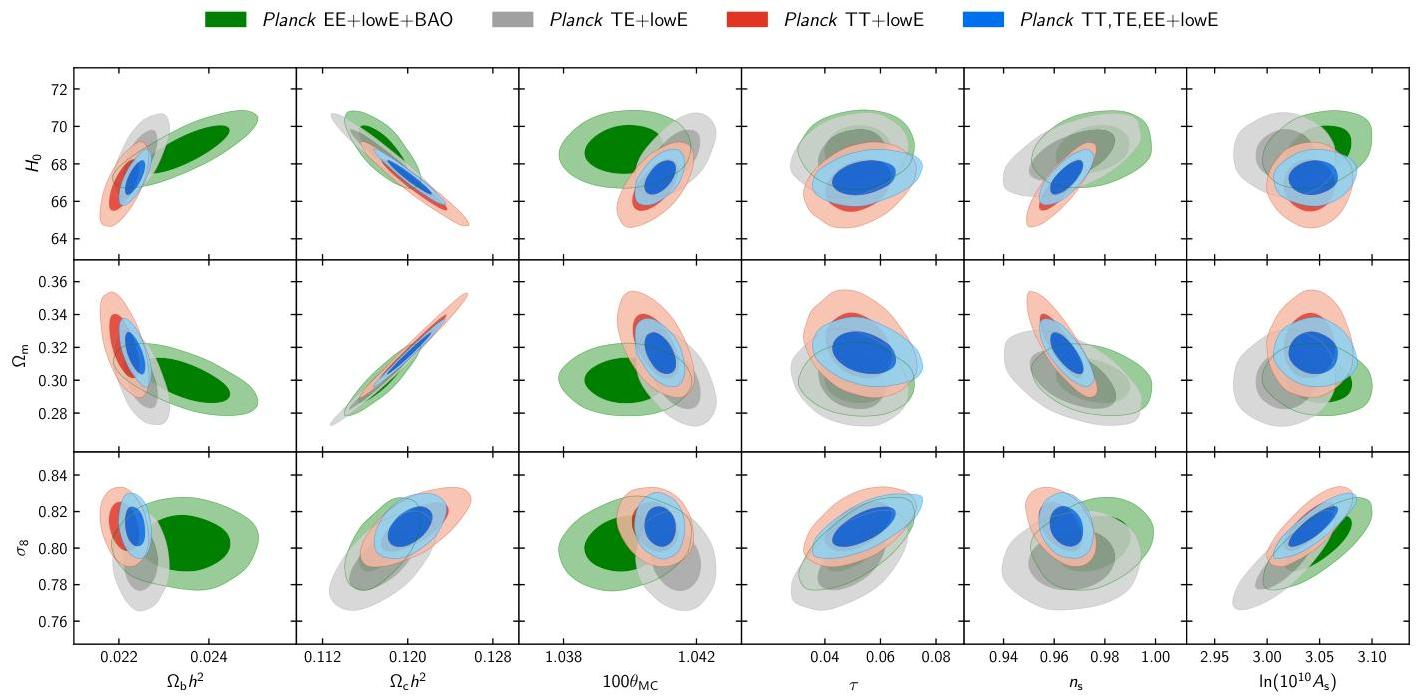

Fig. 5. Constraints on parameters of the base- $\Lambda$ CDM model from the separate Planck $E E, T E$, and $T T$ high- $\ell$ spectra combined with low- $\ell$ polarization (lowE), and, in the case of $E E$ also with BAO (described in Sect. 5.1), compared to the joint result using Planck TT,TE,EE+lowE. Parameters on the bottom axis are our sampled MCMC parameters with flat priors, and parameters on the left axis are derived parameters (with $H_{0}$ in $\mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ ). Contours contain $68 \%$ and $95 \%$ of the probability.

Table 1. Base- $\Lambda$ CDM cosmological parameters from Planck TT,TE,EE+lowE+lensing. Results for the parameter best fits, marginalized means and $68 \%$ errors from our default analysis using the Plik likelihood are given in the first two numerical columns. The CamSpec likelihood results give some idea of the remaining modelling uncertainty in the high- $\ell$ polarization, though parts of the small shifts are due to slightly different sky areas in polarization. The "Combined" column give the average of the Plik and CamSpec results, assuming equal weight. The combined errors are from the equal-weighted probabilities, hence including some uncertainty from the systematic difference between them; however, the differences between the high- $\ell$ likelihoods are so small that they have little effect on the $1 \sigma$ errors. The errors do not include modelling uncertainties in the lensing and low- $\ell$ likelihoods or other modelling errors (such as temperature foregrounds) common to both high- $\ell$ likelihoods. A total systematic uncertainty of around $0.5 \sigma$ may be more realistic, and values should not be overinterpreted beyond this level. The best-fit values give a representative model that is an excellent fit to the baseline likelihood, though models nearby in the parameter space may have very similar likelihoods. The first six parameters here are the ones on which we impose flat priors and use as sampling parameters; the remaining parameters are derived from the first six. Note that $\Omega_{\mathrm{m}}$ includes the contribution from one neutrino with a mass of 0.06 eV . The quantity $\theta_{\mathrm{MC}}$ is an approximation to the acoustic scale angle, while $\theta_{\mathrm{s}}$ is the full numerical result.

| Parameter | Plik best fit | Plik [1] | CamSpec [2] | $\left([2]-[1]\right) / \sigma_{1}$ | Combined |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $\Omega_{\mathrm{b}} h^{2}$ | 0.022383 | $0.02237 \pm 0.00015$ | $0.02229 \pm 0.00015$ | $-0.5$ | $0.02233 \pm 0.00015$ |
| $\Omega_{\mathrm{c}} h^{2}$ | 0.12011 | $0.1200 \pm 0.0012$ | $0.1197 \pm 0.0012$ | $-0.3$ | $0.1198 \pm 0.0012$ |
| $100 \theta_{\mathrm{MC}}$ | 1.040909 | $1.04092 \pm 0.00031$ | $1.04087 \pm 0.00031$ | $-0.2$ | $1.04089 \pm 0.00031$ |
| $\tau$ | 0.0543 | $0.0544 \pm 0.0073$ | $0.0536^{+0.0069}$ | $-0.1$ | $0.0540 \pm 0.0074$ |
| $\ln \left(10^{10} A_{\mathrm{s}}\right)$ | 3.0448 | $3.044 \pm 0.014$ | $3.041 \pm 0.015$ | $-0.3$ | $3.043 \pm 0.014$ |
| $n_{\mathrm{s}}$ | 0.96605 | $0.9649 \pm 0.0042$ | $0.9656 \pm 0.0042$ | $+0.2$ | $0.9652 \pm 0.0042$ |
| $\Omega_{\mathrm{m}} h^{2}$ | 0.14314 | $0.1430 \pm 0.0011$ | $0.1426 \pm 0.0011$ | $-0.3$ | $0.1428 \pm 0.0011$ |
| $H_{0}\left[\mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}\right]$ | 67.32 | $67.36 \pm 0.54$ | $67.39 \pm 0.54$ | $+0.1$ | $67.37 \pm 0.54$ |
| $\Omega_{\mathrm{m}}$ | 0.3158 | $0.3153 \pm 0.0073$ | $0.3142 \pm 0.0074$ | $-0.2$ | $0.3147 \pm 0.0074$ |
| Age [Gyr] | 13.7971 | $13.797 \pm 0.023$ | $13.805 \pm 0.023$ | $+0.4$ | $13.801 \pm 0.024$ |
| $\sigma_{X}$ | 0.8120 | $0.8111 \pm 0.0060$ | $0.8091 \pm 0.0060$ | $-0.3$ | $0.8101 \pm 0.0061$ |
| $S_{8} \equiv \sigma_{8}\left(\Omega_{\mathrm{m}} / 0.3\right)^{0.5}$ | 0.8331 | $0.832 \pm 0.013$ | $0.828 \pm 0.013$ | $-0.3$ | $0.830 \pm 0.013$ |
| $z_{\text {ss }}$ | 7.68 | $7.67 \pm 0.73$ | $7.61 \pm 0.75$ | $-0.1$ | $7.64 \pm 0.74$ |
| 1006 | 1.041085 | $1.04110 \pm 0.00031$ | $1.04106 \pm 0.00031$ | $-0.1$ | $1.04108 \pm 0.00031$ |
| $r_{\text {drag }}[\mathrm{Mpc}]$ | 147.049 | $147.09 \pm 0.26$ | $147.26 \pm 0.28$ | $+0.6$ | $147.18 \pm 0.29$ |

Table 2. Parameter $68 \%$ intervals for the base-ACDM model from Planck CMB power spectra, in combination with CMB lensing reconstruction and BAO. The top group of six rows are the base parameters, which are sampled in the MCMC analysis with flat priors. The middle group lists derived parameters. The bottom three rows show the temperature foreground amplitudes $f_{t=2000}^{T T}$ for the corresponding frequency spectra (expressed as the contribution to $D_{t=2000}^{T T}$ in units of $(\mu \mathrm{K})^{2}$ ). In all cases the helium mass fraction used is predicted by BBN (posterior mean $Y_{\mathrm{P}} \approx 0.2454$, with theoretical uncertainties in the BBN predictions dominating over the Planck error on $\Omega_{\mathrm{b}} h^{2}$ ). The reionization redshift mid-point $z_{\mathrm{re}}$ and optical depth $\tau$ here assumes a simple tanh model (as discussed in the text) for the reionization of hydrogen and simultaneous first reionization of helium. Our baseline results are based on Planck TT,TE,EE+lowE+lensing (as also given in Table 1).

| Parameter | $\begin{gathered} \text { TT+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TE+lowE } \\ 68 \% \text { limits } \end{gathered}$ | EE+lowE <br> $68 \%$ limits | $\begin{gathered} \text { TT,TE,EE+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TT,TE,EE+lowE+lensing } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TT,TE,EE+lowE+lensing+BAO } \\ 68 \% \text { limits } \end{gathered}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $\Omega_{\mathrm{b}} h^{2}$ | 0.02212 $\pm 0.00022$ | 0.02249 $\pm 0.00025$ | 0.0240 $\pm 0.0012$ | 0.02236 $\pm 0.00015$ | 0.02237 $\pm 0.00015$ | 0.02242 $\pm 0.00014$ |
| $\Omega_{\mathrm{b}} h^{2}$ | 0.1206 $\pm 0.0021$ | 0.1177 $\pm 0.0020$ | 0.1158 $\pm 0.0046$ | 0.1202 $\pm 0.0014$ | 0.1200 $\pm 0.0012$ | 0.11933 $\pm 0.00091$ |
| $1000_{\mathrm{MC}}$ | 1.04077 $\pm 0.00047$ | 1.04139 $\pm 0.00049$ | 1.03999 $\pm 0.00089$ | 1.04090 $\pm 0.00031$ | 1.04092 $\pm 0.00031$ | 1.04101 $\pm 0.00029$ |
| $\tau$ | 0.0522 $\pm 0.0080$ | 0.0496 $\pm 0.0085$ | 0.0527 $\pm 0.0090$ | $0.0544_{-0.0005}^{+0.0056}$ | 0.0544 $\pm 0.0073$ | 0.0561 $\pm 0.0071$ |
| $\ln \left(10^{10} \mathrm{~A}_{\mathrm{s}}\right)$ | $3.040 \pm 0.016$ | $3.018_{-0.018}^{+0.020}$ | 3.052 $\pm 0.022$ | 3.045 $\pm 0.016$ | 3.044 $\pm 0.014$ | $3.047 \pm 0.014$ |
| $n_{\mathrm{s}}$ | $0.9626 \pm 0.0057$ | 0.967 $\pm 0.011$ | 0.980 $\pm 0.015$ | 0.9649 $\pm 0.0044$ | 0.9649 $\pm 0.0042$ | 0.9665 $\pm 0.0038$ |
| $H_{0}\left[\mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}\right]$ | $66.88 \pm 0.92$ | $68.44 \pm 0.91$ | $69.9 \pm 2.7$ | $67.27 \pm 0.60$ | $67.36 \pm 0.54$ | $67.66 \pm 0.42$ |
| $\Omega_{\Lambda}$ | 0.679 $\pm 0.013$ | 0.699 $\pm 0.012$ | $0.711_{-0.026}^{+0.033}$ | 0.6834 $\pm 0.0084$ | 0.6847 $\pm 0.0073$ | 0.6889 $\pm 0.0056$ |
| $\Omega_{\mathrm{m}}$ | 0.321 $\pm 0.013$ | 0.301 $\pm 0.012$ | $0.289_{-0.033}^{+0.009}$ | 0.3166 $\pm 0.0084$ | 0.3153 $\pm 0.0073$ | 0.3111 $\pm 0.0056$ |
| $\Omega_{\mathrm{m}} h^{2}$ | 0.1434 $\pm 0.0020$ | 0.1408 $\pm 0.0019$ | $0.1404_{-0.0039}^{+0.0034}$ | 0.1432 $\pm 0.0013$ | 0.1430 $\pm 0.0011$ | 0.14240 $\pm 0.00087$ |
| $\Omega_{\mathrm{m}} h^{2}$ | 0.09589 $\pm 0.00046$ | 0.09635 $\pm 0.00051$ | $0.0981_{-0.0016}^{+0.0016}$ | 0.09633 $\pm 0.00029$ | 0.09633 $\pm 0.00030$ | 0.09635 $\pm 0.00030$ |
| $\sigma_{\mathrm{X}}$ | 0.8118 $\pm 0.0089$ | 0.793 $\pm 0.011$ | 0.796 $\pm 0.018$ | 0.8120 $\pm 0.0073$ | 0.8111 $\pm 0.0060$ | 0.8102 $\pm 0.0060$ |
| $S_{\mathrm{X}} \equiv \sigma_{\mathrm{X}}\left(\Omega_{\mathrm{m}} / 0.3\right)^{0.5}$ | $0.840 \pm 0.024$ | 0.794 $\pm 0.024$ | $0.781_{-0.060}^{+0.083}$ | 0.834 $\pm 0.016$ | 0.832 $\pm 0.013$ | 0.825 $\pm 0.011$ |
| $\sigma_{\mathrm{X}} \Omega_{\mathrm{m}}^{0.25}$ | $0.611 \pm 0.012$ | 0.587 $\pm 0.012$ | 0.583 $\pm 0.027$ | 0.6090 $\pm 0.0081$ | 0.6078 $\pm 0.0064$ | 0.6051 $\pm 0.0058$ |
| $z_{\mathrm{re}}$ | $7.50 \pm 0.82$ | $7.11_{-0.75}^{+0.91}$ | $7.10_{-0.73}^{+0.87}$ | 7.68 $\pm 0.79$ | 7.67 $\pm 0.73$ | 7.82 $\pm 0.71$ |
| $10^{9} \mathrm{~A}_{\mathrm{s}}$ | 2.092 $\pm 0.034$ | 2.045 $\pm 0.041$ | 2.116 $\pm 0.047$ | $2.101_{-0.034}^{+0.031}$ | 2.100 $\pm 0.030$ | 2.105 $\pm 0.030$ |
| $10^{9} A_{\mathrm{s}} e^{-2 \tau}$ | $1.884 \pm 0.014$ | $1.851 \pm 0.018$ | $1.904 \pm 0.024$ | $1.884 \pm 0.012$ | $1.883 \pm 0.011$ | $1.881 \pm 0.010$ |
| Age [Gyr] | $13.830 \pm 0.037$ | $13.761 \pm 0.038$ | $13.64_{-0.18}^{+0.16}$ | $13.800 \pm 0.024$ | $13.797 \pm 0.023$ | $13.787 \pm 0.020$ |
| $z_{\mathrm{r}}$ | $1090.30 \pm 0.41$ | $1089.57 \pm 0.42$ | $1087.8_{-1.6}^{+1.6}$ | $1089.95 \pm 0.27$ | $1089.92 \pm 0.25$ | $1089.80 \pm 0.21$ |
| $r_{\mathrm{s}}[\mathrm{Mpc}]$ | $144.46 \pm 0.48$ | $144.95 \pm 0.48$ | $144.29 \pm 0.64$ | $144.39 \pm 0.30$ | $144.43 \pm 0.26$ | $144.57 \pm 0.22$ |
| 1006 | 1.04097 $\pm 0.00046$ | 1.04156 $\pm 0.00049$ | 1.04001 $\pm 0.00086$ | 1.04109 $\pm 0.00030$ | 1.04110 $\pm 0.00031$ | 1.04119 $\pm 0.00029$ |
| $z_{\text {drag }}$ | 1059.39 $\pm 0.46$ | $1060.03 \pm 0.54$ | $1063.2 \pm 2.4$ | 1059.93 $\pm 0.30$ | 1059.94 $\pm 0.30$ | $1060.01 \pm 0.29$ |
| $r_{\text {drag }}[\mathrm{Mpc}]$ | $147.21 \pm 0.48$ | $147.59 \pm 0.49$ | $146.46 \pm 0.70$ | $147.05 \pm 0.30$ | $147.09 \pm 0.26$ | $147.21 \pm 0.23$ |
| $k_{\mathrm{D}}\left[\mathrm{Mpc}^{-1}\right]$ | $0.14054 \pm 0.00052$ | $0.14043 \pm 0.00057$ | $0.1426 \pm 0.0012$ | $0.14090 \pm 0.00032$ | $0.14087 \pm 0.00030$ | $0.14078 \pm 0.00028$ |
| $z_{\text {eq }}$ | $3411 \pm 48$ | $3349 \pm 46$ | $3340_{-0.71}^{+0.81}$ | $3407 \pm 31$ | $3402 \pm 26$ | $3387 \pm 21$ |
| $k_{\mathrm{eq}}\left[\mathrm{Mpc}^{-1}\right]$ | $0.01041 \pm 0.00014$ | $0.01022 \pm 0.00014$ | $0.01019_{-0.00024}^{+0.00023}$ | $0.010398 \pm 0.000094$ | $0.010384 \pm 0.000081$ | $0.010339 \pm 0.000063$ |
| $1006_{\mathrm{coq}}$ | $0.4483 \pm 0.0046$ | $0.4547 \pm 0.0045$ | $0.4562 \pm 0.0092$ | $0.4490 \pm 0.0030$ | $0.4494 \pm 0.0026$ | $0.4509 \pm 0.0020$ |
| $f_{\text {DM0 }}^{145}$ | $31.2 \pm 3.0$ |  |  | $29.5 \pm 2.7$ | $29.6 \pm 2.8$ | $29.4 \pm 2.7$ |
| $f_{\text {DM0 }}^{143+217}$ | $33.6 \pm 2.0$ |  |  | $32.2 \pm 1.9$ | $32.3 \pm 1.9$ | $32.1 \pm 1.9$ |
| $f_{\text {DM0 }}^{217}$ | $108.2 \pm 1.9$ |  |  | $107.0 \pm 1.8$ | $107.1 \pm 1.8$ | $106.9 \pm 1.8$ |

### 3.2. Hubble constant and dark-energy density

The degeneracy between $\Omega_{\mathrm{m}}$ and $H_{0}$ is not exact, but the constraint on these parameters individually is substantially less precise than Eq. (12), giving
$\left.\begin{array}{l}H_{0}=\left(67.27 \pm 0.60\right) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1} \\ \Omega_{\mathrm{m}}=0.3166 \pm 0.0084,\end{array}\right\} \begin{aligned} & 68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE} \\ & +\mathrm{lowE} .\end{aligned}$
It is important to emphasize that the values given in Eq. (13) assume the base-ACDM cosmology with minimal neutrino mass.

These estimates are highly model dependent and this needs to be borne in mind when comparing with other measurements, for example the direct measurements of $H_{0}$ discussed in Sect. 5.4. The values in Eq. (13) are in very good agreement with the independent constraints of Eq. (6) from Planck CMB lensing+BAO. Including CMB lensing sharpens the determination of $H_{0}$ to a $0.8 \%$ constraint:

$$
H_{0}=(67.36 \pm 0.54) \mathrm{km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1} \quad \begin{aligned}
& (68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE} \\ & +\mathrm{lowE}+\text { lensing }) .
\end{aligned}
$$

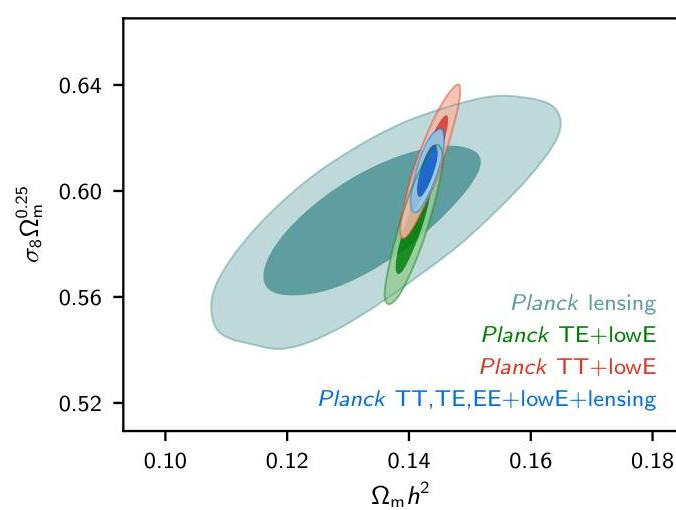

Fig. 6. Base- $\Lambda$ CDM $68 \%$ and $95 \%$ marginalized constraint contours for the matter density and $\sigma_{8} \Omega_{\mathrm{m}}^{0.25}$, a fluctuation amplitude parameter that is well constrained by the CMB-lensing likelihood. The Planck TE, TT, and lensing likelihoods all overlap in a consistent region of parameter space, with the combined likelihood substantially reducing the allowed parameter space.

This value is our "best estimate" of $H_{0}$ from Planck, assuming the base- $\Lambda$ CDM cosmology.

Since we are considering a flat universe in this section, a constraint on $\Omega_{\mathrm{m}}$ translates directly into a constraint on the darkenergy density parameter, giving
$\Omega_{\Lambda}=0.6847 \pm 0.0073 \quad(68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE}+$ lensing $)$.
In terms of a physical density, this corresponds to $\Omega_{\Lambda} h^{2}=$ $0.3107 \pm 0.0082$, or cosmological constant $\Lambda=(4.24 \pm 0.11) \times$ $10^{-66} \mathrm{eV}^{2}=(2.846 \pm 0.076) \times 10^{-122} m_{\mathrm{Pl}}^{2}$ in natural units (where $m_{\mathrm{Pl}}$ is the Planck mass).

### 3.3. Optical depth and the fluctuation amplitude

Since the CMB fluctuations are linear up to lensing corrections, and the lensing corrections are largely oscillatory, the average observed CMB power spectrum amplitude scales nearly proportionally with the primordial comoving curvature power spectrum amplitude $A_{s}$ (which we define at the pivot scale $k_{0}=$ $\left.0.05 \mathrm{Mpc}^{-1}\right)$. The sub-horizon CMB anisotropies are however scattered by free electrons that are present after reionization, so the observed amplitude actually scales with $A_{s} e^{-2 \tau}$, where $\tau$ is the reionization optical depth (see Sect. 7.8 for further discussion of reionization constraints). This parameter combination is therefore well measured, with the $0.6 \%$ constraint

$$
A_{s} e^{-2 \tau}=(1.884 \pm 0.012) \times 10^{-9} \quad \begin{gathered}
(68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE} \\
+\mathrm{lowE})
\end{gathered}
$$

In this final Planck release the optical depth is well constrained by the large-scale polarization measurements from the Planck HFI, with the joint constraint

$$
\tau=0.0544_{-0.0081}^{+0.0070} \quad(68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})
$$

Assuming simple tanh parameterization of the ionization fraction, ${ }^{15}$ this implies a mid-point redshift of reionization
$z_{\mathrm{re}}=7.68 \pm 0.79 \quad(68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})$,
and a one-tail upper limit of $z_{\mathrm{re}}<9.0(95 \%)$. This is consistent with observations of high-redshift quasars that suggest the Universe was fully reionized by $z \approx 6$ (Bouwens et al. 2015). We do not include the astrophysical constraint that $z_{\mathrm{re}} \gtrsim 6.5$ in our default parameter results, but if required results including this prior are part of the published tables on the Planck Legacy Archive (PLA). A more detailed discussion of reionization histories consistent with Planck and results from other Planck likelihoods is deferred to Sect. 7.8.

The measurement of the optical depth breaks the $A_{s} e^{-2 \tau}$ degeneracy, giving a $1.5 \%$ measurement of the primordial amplitude:
$A_{s}=\left(2.101_{-0.034}^{+0.031}\right) \times 10^{-9} \quad(68 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})$.
Since the optical depth is reasonably well constrained, degeneracies with other cosmological parameters contribute to the error in Eq. (19). From the temperature spectrum alone there is a significant degeneracy between $A_{s} e^{-2 \tau}$ and $\Omega_{\mathrm{m}} h^{2}$, since for fixed $\theta_{*}$, larger values of these parameters will increase and decrease the small-scale power, respectively. This behaviour is mitigated in our joint constraint with polarization because the polarization spectra have a different dependence on $\Omega_{\mathrm{m}} h^{2}$; polarization is generated by causal sub-horizon quadrupole scattering at recombination, but the temperature spectrum has multiple sources and is also sensitive to non-local redshifting effects as the photons leave the last-scattering surface (see, e.g., Galli et al. 2014, for further discussion).

Assuming the $\Lambda$ CDM model, the Planck CMB parameter amplitude constraint can be converted into a fluctuation amplitude at the present day, conventionally quantified by the $\sigma_{8}$ parameter. The CMB lensing reconstruction power spectrum also constrains the late-time fluctuation amplitude more directly, in combination with the matter density. Figure 6 shows constraints on the matter density and amplitude parameter combination $\sigma_{8} \Omega_{\mathrm{m}}^{0.25}$ that is well measured by the CMB lensing spectrum (see PL2015 for details). There is good consistency between the temperature, polarization, and lensing constraints here, and using their combination significantly reduces the allowed parameter space. In terms of the late-time fluctuation amplitude parameter $\sigma_{8}$ we find the combined result

$$
\begin{aligned}
& \sigma_{8}=0.8111 \pm 0.0060 \quad \begin{array}{l}
(68 \%, \text { Planck TT,TE,EE }+ \text { lowE } \\
+\text { lensing })
\end{array} \\
& \text { Measurements of galaxy clustering, galaxy lensing, and clusters } \\
& \text { can also measure } \sigma_{8} \text {, and we discuss consistency of these con- } \\
& \text { straints within the } \Lambda \text { CDM model in more detail in Sect. } 5 \text {. } \\
& \text { (Lewis 2008): }
\end{aligned}
$$

[^0]
[^0]:    ${ }^{15}$ For reference, the ionization fraction $x_{\mathrm{e}}=n_{\mathrm{e}} / n_{\mathrm{H}}$ in the tanh model is assumed to have the redshift dependence (Lewis 2008):

    $$
    x_{\mathrm{e}}=\frac{1+n_{\mathrm{He}} / n_{\mathrm{H}}}{2}\left[1+\tanh \left(\frac{y\left(z_{\mathrm{re}}\right)-y(z)}{\Delta y}\right)\right]
    $$

    where $y(z)=(1+z)^{3 / 2}, \Delta y=\frac{1}{2}\left(1+z_{\mathrm{re}}\right)^{1 / 2} \Delta z$, with $\Delta z=0.5$. Helium is assumed to be singly ionized with hydrogen at $z \gg 3$, but at lower redshifts we add the very small contribution from the second reionization of helium with a similar tanh transition at $z=3.5$.

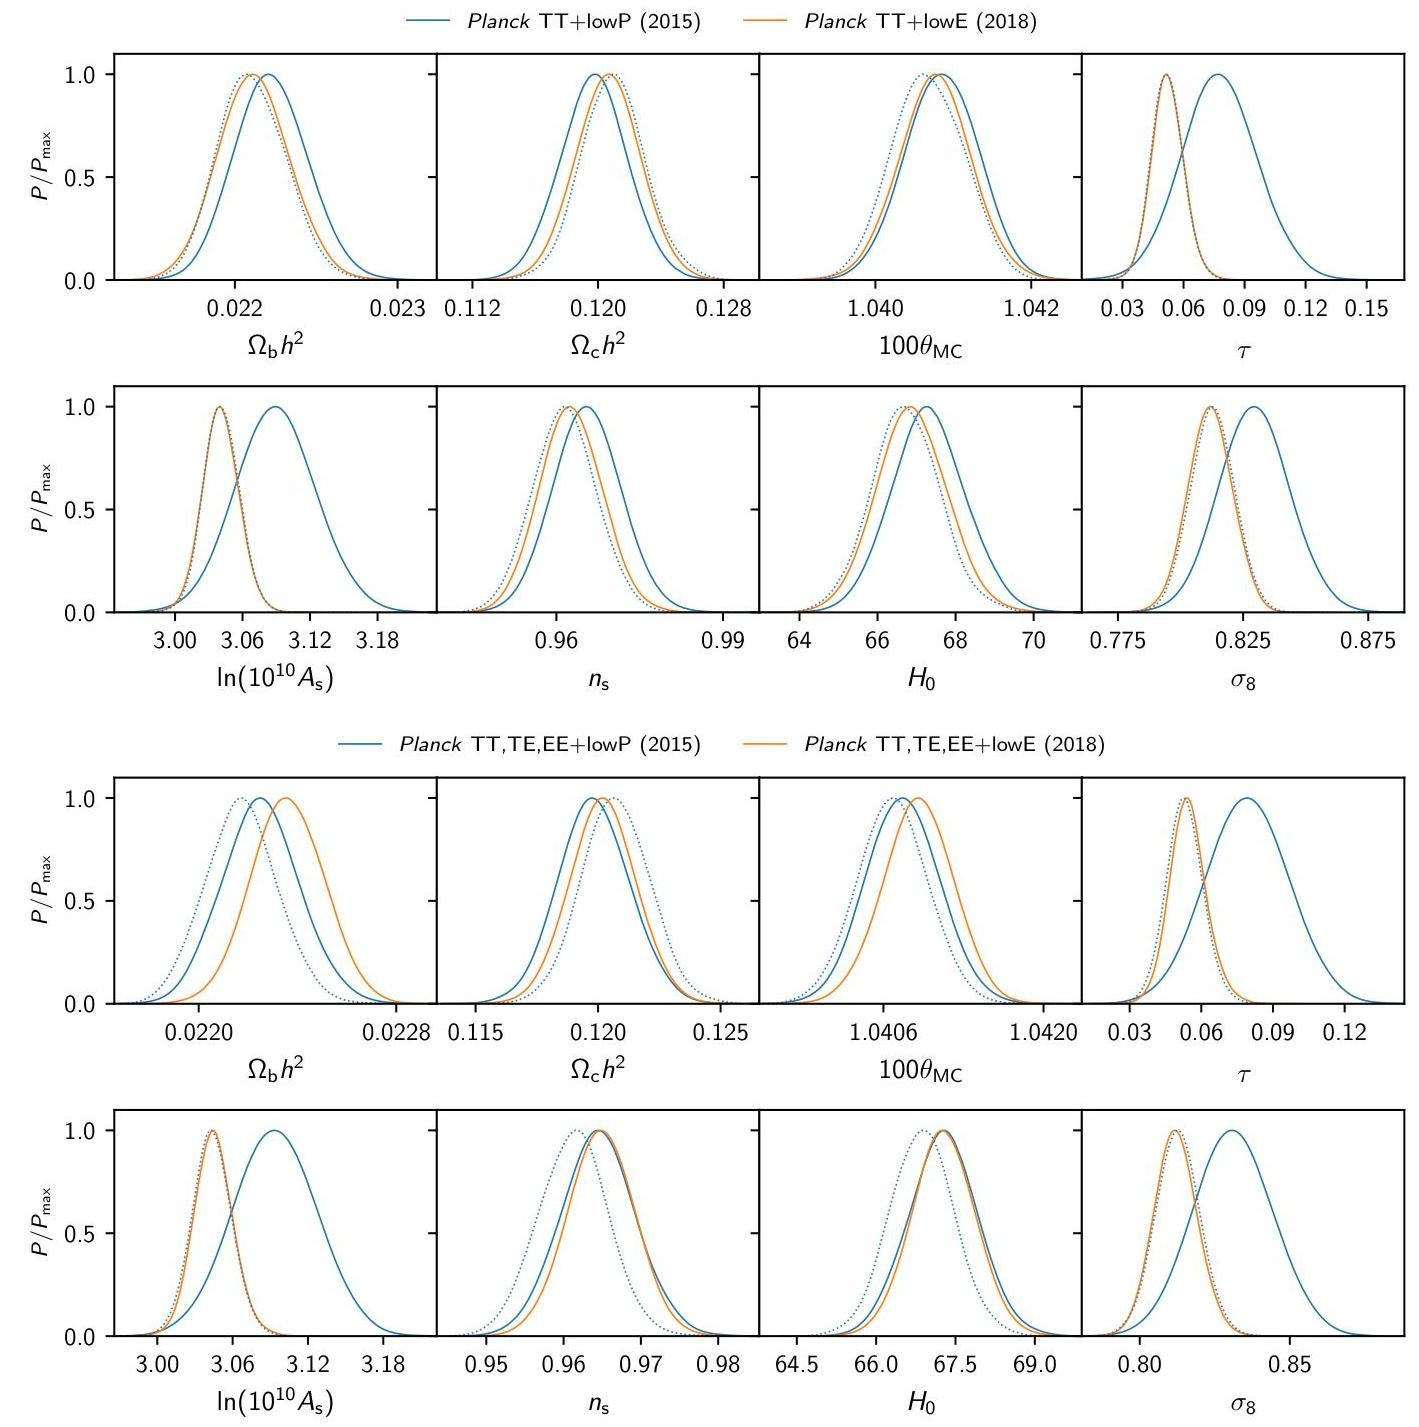

Fig. 7. Comparison between the 2015 and 2018 marginalized $\Lambda$ CDM parameters. Dotted lines show the 2015 results, replacing the 2015 "lowP" low- $\ell$ polarization likelihood with the new 2018 "lowE" SimAll likelihood, isolating the impact of the change in the low- $\ell$ polarization likelihood (and hence the constraints on $\tau$ ).

# 3.4. Scalar spectral index 

The scale-dependence of the CMB power spectrum constrains the slope of the primordial scalar power spectrum, conventionally parameterized by the power-law index $n_{\mathrm{s}}$, where $n_{\mathrm{s}}=1$ corresponds to a scale-invariant spectrum. The matter and baryon densities also affect the scale-dependence of the CMB spectra, but in a way that differs from a variation in $n_{s}$, leading to relatively mild degeneracies between these parameters. Assuming
that the primordial power spectrum is an exact power law we find
$n_{\mathrm{s}}=0.9649 \pm 0.0042 \quad$ ( $68 \%$, Planck TT,TE,EE+lowE +lensing),
which is $8 \sigma$ away from scale-invariance $\left(n_{\mathrm{s}}=1\right)$, confirming the red tilt of the spectrum at high significance in $\Lambda$ CDM.

Section 7.2 and Planck Collaboration X (2020) discuss the implications of this result for models of inflation and include constraints on models with primordial tensor modes and a scaledependent scalar spectral index.

### 3.5. Matter densities

The matter density can be measured from the CMB spectra using the scale-dependence of the amplitude, since for fixed $\theta$, a larger matter density reduces the small-scale CMB power. The matter density also affects the amount of lensing in the CMB spectra and the amplitude of the CMB-lensing reconstruction spectrum. The matter density is well constrained to be

$$
\Omega_{\mathrm{m}} h^{2}=0.1430 \pm 0.0011 \quad \begin{aligned}
& (68 \%, \text { Planck TT,TE,EE } \\
& + \text { lowE+lensing })
\end{aligned}
$$

The matter mostly consists of cold dark matter, with density constrained at the percent level:

$$
\begin{aligned}
\Omega_{\mathrm{c}} h^{2}=0.1200 \pm 0.0012 & \begin{array}{l}
(68 \%, \text { Planck TT,TE,EE } \\
+\text { lowE+lensing })
\end{array} \\
& \text { Changes in the baryon density affect the spectrum in characteristic ways, modifying the relative heights of the even and odd } \\
& \text { acoustic peaks, due to the effect of baryons on the depth of first } \\
& \text { and subsequent acoustic (de)compressions. Despite comprising } \\
& \text { less than a sixth of the total matter content, the baryon effects } \\
& \text { on the power spectra are sufficiently distinctive that the baryon- } \\
& \text { density parameter is measured at sub-percent level accuracy with } \\
& \text { Planck: }
\end{aligned}
$$

$$
\Omega_{\mathrm{b}} h^{2}=0.02237 \pm 0.00015 \quad \begin{aligned}
& (68 \%, \text { Planck TT,TE,EE } \\
& + \text { lowE+lensing })
\end{aligned}
$$

There is a partial degeneracy with $n_{s}$, which can also affect the relative heights of the first few peaks. This is most evident in $T E$, but is reduced in $T T$ because of the larger range of scales that are measured by Planck with low noise.

### 3.6. Changes in the base- $\Lambda$ CDM parameters between the 2015 and 2018 data releases

Figure 7 compares the parameters of the base- $\Lambda$ CDM model measured from the final data release with those reported in PCP15. To differentiate between changes caused by the new lowE polarization likelihood, and therefore generated by the change in the measured optical depth to reionization, we also show the result of using the 2015 likelihoods in combination with the 2018 lowE polarization likelihood at low multipoles. Figure 7 includes the results for both Planck TT+lowE and Planck TT,TE,EE+lowE. ${ }^{16}$

The main differences in $\Lambda$ CDM parameters between the 2015 and the 2018 releases are caused by the following effects.

[^0]- New polarization low- $\ell$ likelihood. The use of the new HFI low- $\ell$ polarization likelihood in place of the 2015 LFI likelihood is the largest cause of shifts between the 2015 and 2018 parameters. The lowering and tightening of the constraint on $\tau$ is responsible for a $1 \sigma$ decrease of $\ln \left(10^{10} A_{s}\right)$ through the $A_{s} e^{-2 s}$ degeneracy. This in turn decreases the smoothing due to gravitational lensing at high multipoles, which is compensated by an increase of about $1 \sigma$ in $\omega_{\mathrm{c}}$. This decreases the amplitude of the first acoustic peak, so $n_{\mathrm{s}}$ shifts to a lower value by about $0.5 \sigma$ to restore power. Further adjustments are then achieved by the changes of $\theta$, and $\omega_{\mathrm{b}}$ by about $0.5 \sigma$.
- Polarization corrections in the high- $\ell$ likelihood. As described in detail in Sect. 2.2, the largest changes from 2015 are caused by corrections applied to the polarization spectra. To isolate the causes of shifts introduced by changes in the high- $\ell$ likelihood, Fig. 8 compares 2018 results neglecting corrections to the polarization spectra with results from the 2015 high- $\ell$ likelihood combined with the 2018 lowE likelihood (so that both sets of results are based on similar constraints on $\tau$ ). The shift towards larger values in $\omega_{\mathrm{b}}$ by around $1 \sigma$ is mainly caused by the beam-leakage correction in the TE high- $\ell$ likelihood, which is also responsible for an increase of approximately $0.5 \sigma$ in $n_{\mathrm{s}}$, compensating for the shift in $n_{\mathrm{s}}$ as a result of the change in $\tau$ since 2015. The beam-leakage correction also changes $\omega_{\mathrm{c}}$ (by $-0.7 \sigma$ ) and $\theta_{\mathrm{MC}}(+0.7 \sigma)$. The other corrections implemented in 2018 have a smaller impact on the $\Lambda$ CDM parameters, as described in detail in Planck Collaboration V (2020).

Figure 9 presents the differences between the coadded spectra from 2018 and 2015. This plot shows the stability of the $T T$ spectra, while also demonstrating that the main differences in polarization between the 2015 and 2018 releases are caused by the 2018 corrections for polarization efficiencies and beam leakage.

## 4. Comparison with high-resolution experiments

As discussed in PCP13 and PCP15, Planck $T T$ spectra are statistically much more powerful than temperature data from current high-resolution experiments such as the Atacama Cosmology Telescope (ACT, e.g., Das et al. 2014) and the South Pole Telescope (SPT, e.g., Story et al. 2013; George et al. 2015). As a result, the Planck temperature data dominate if they are combined with ACT and SPT data. In PCP15, the high-resolution temperature data were used only to constrain low-amplitude components of the foreground model, which are otherwise weakly constrained by Planck data alone (with very little impact on cosmological parameters). We adopt the same approach in this paper.

Since the publication of PCP15, Hou et al. (2018) have performed a direct map-based comparison of the SPT temperature data at 150 GHz with the Planck $143-\mathrm{GHz}$ maps over the same area of sky (covering $2540 \mathrm{deg}^{2}$ ), finding no evidence for any systematic error in either data set after accounting for an overall difference in calibration. Temperature power spectrum comparisons between Planck and SPT are reported in a companion paper by Aylor et al. (2017). They find cosmological parameters for base $\Lambda$ CDM derived from Planck and SPT over the same patch of sky and multipole range to be in excellent agreement. In particular, by comparing parameters determined over the multipole range $650-2000$ from both experiments, the reduction in sample variance allows a test that is sensitive to systematic errors that could cause shifts in parameter posteriors comparable to the widths of the PCP15 posteriors. The parameters determined over the SPT sky area differ slightly, but not significantly, from the best-fit $\Lambda$ CDM parameters reported in PCP15 based on a


[^0]:    ${ }^{16}$ The published 2015 parameter constraints and chains had a small error in the priors for the polarization Galactic foregrounds, which was subsequently corrected in the published likelihoods. The impact on cosmological parameters was very small. Here we compare with the uncorrected 2015 chains, not the published 2015 likelihood.

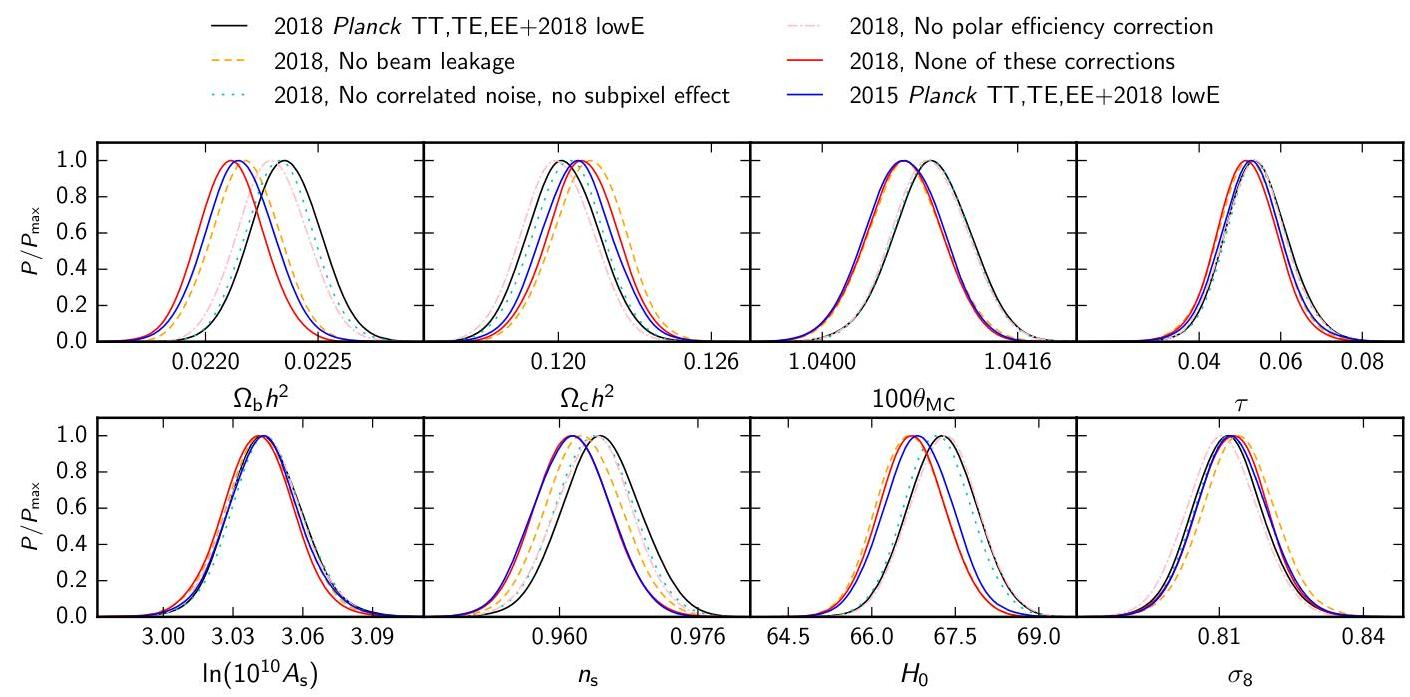

Fig. 8. Impact of corrections for systematic effects on 2018 marginalized $\Lambda$ CDM parameters from Planck TT,TE,EE+lowE. The plot shows the baseline results (black solid line), and the baseline result excluding corrections for various effects: beam leakage (dashed orange); polarization efficiencies (dot-dashed pink); and subpixel effects and correlated noise (dotted cyan). The impact of not including any of these corrections is shown in solid blue, and agree fairly well with the 2015 results if the 2015 low- $\ell$ polarization likelihood is replaced with 2018 lowE likelihood (2015 Planck TT,TE,EE+2018 lowE). This shows that corrections for polarization systematics account for most of the small changes between the 2015 and 2018 results that are not caused by the change in optical depth.
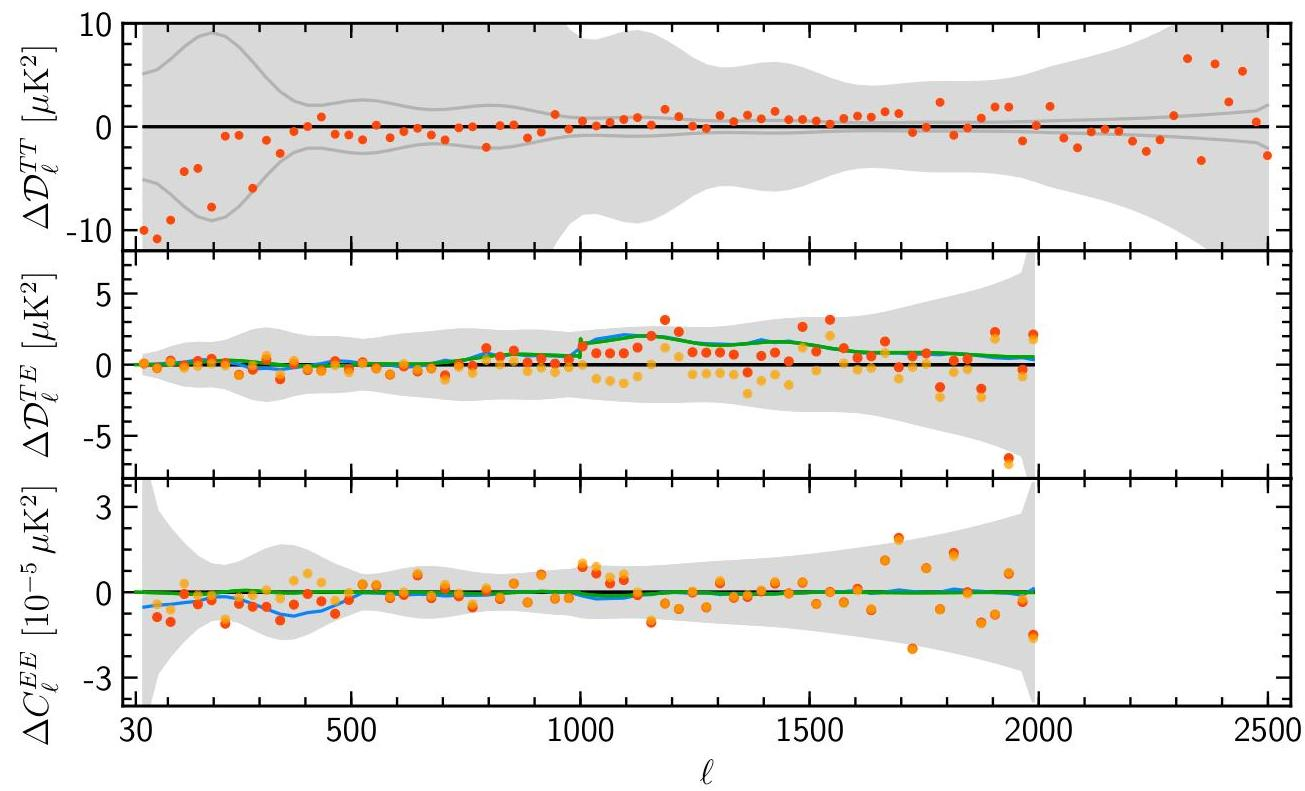

Fig. 9. Differences between the 2018 and 2015 coadded power spectra at high $\ell$ in $T T, T E$, and $E E$ from top to bottom (red points). The 2015 TT spectrum has been recalibrated by a factor of 1.00014 . For $T E$ and $E E$, the orange points show the same differences but without applying the polar-efficiency and beam-leakage corrections to the 2018 spectra. This shows that the differences between the two data releases in polarization are caused mainly by these two effects. Finally, the green line shows the coadded beam-leakage correction, while the blue line shows the sum of the beam-leakage and polar-efficiency corrections. The grey band shows the $\pm 1 \sigma$ errors of the 2018 power spectra (for $T T$, the grey line also shows error bars scaled down by a factor of 10 ).

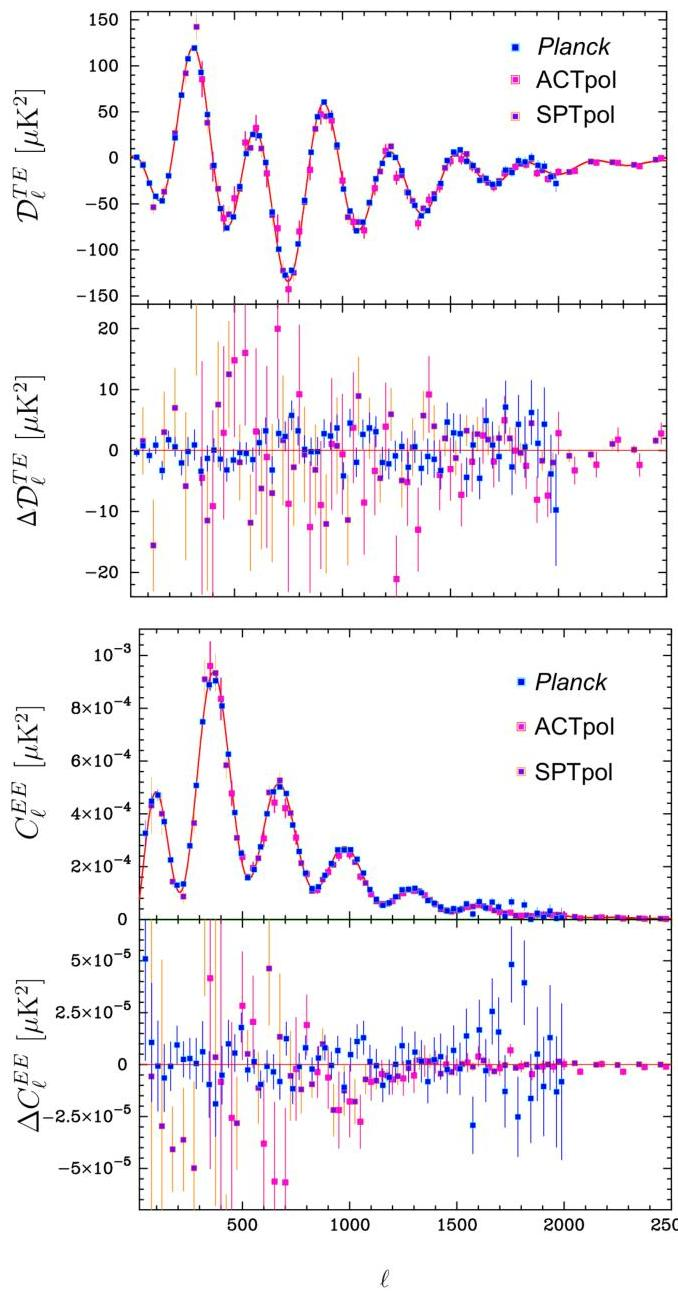

Fig. 10. Comparison of the Planck Plik, ACTPol, and SPTpol $T E$ and $E E$ power spectra. The solid lines show the best-fit base$\Lambda$ CDM model for Planck TT,TE,EE+lowE+lensing. The lower panel in each pair of plots shows the residuals relative to this theoretical model. The ACTPol and SPTpol $T E$ and $E E$ spectra are as given in Louis et al. (2017) and Henning et al. (2018), i.e., without adjusting nuisance parameters to fit the Planck theoretical model. The error bars show $\pm 1 \sigma$ uncertainties.
much larger area of sky. Aylor et al. (2017) also find a tendency for the base- $\Lambda$ CDM parameters derived from SPT to shift as the multipole range is increased, but at low statistical significance.

Polarization measurements have become a major focus for ground-based CMB experiments. High resolution $T E$ and $E E$ spectra have been measured by the ACT Polarimeter (ACTPol) and the polarization-sensitive receiver of SPT (SPTpol). Following two seasons of observations, ACTPol has covered $548 \mathrm{deg}^{2}$ along the celestial equator at 149 GHz with data and analysis presented in Naess et al. (2014) and Louis et al. (2017).

The ACTPol spectra span the multipole range $350<\ell<9000$. SPTpol polarization spectra from $100 \mathrm{deg}^{2}$ in the southern hemisphere at 150 GHz were first reported in Crites et al. (2015) and recently extended to $500 \mathrm{deg}^{2}$ (Henning et al. 2018). The SPTpol spectra span the multipole range $50<\ell<8000$. In contrast, the Planck TE and $E E$ power spectra lose statistical power at multipoles $\gtrsim 1500$. The ACTPol and SPTpol spectra are compared with the Planck TE and $E E$ spectra in Fig. 10. The polarization spectra measured from these three very different experiments are in excellent agreement.

For the base- $\Lambda$ CDM cosmology, the cosmological parameters should have converged close to their true values by multipoles $\sim 2000$. Since ACTPol and SPTpol cover a much smaller sky area than Planck the errors on their $T E$ and $E E$ spectra are larger than those of Planck at low multipoles (see Fig. 10). As a consequence, the current ACTPol and SPTpol polarization constraints on the parameters of the base- $\Lambda$ CDM cosmology are much weaker than those derived from Planck. The ACTPol results (Louis et al. 2017) are consistent with the Planck base$\Lambda$ CDM parameters and showed a small improvement in constraints on extensions to the base cosmology that affect the damping tail. Similar results were found by SPTpol, though Henning et al. (2018) noted a $\gtrsim 2 \sigma$ tension with the base$\Lambda$ CDM model and found a trend for the parameters of the base$\Lambda$ CDM model to drift away from the Planck solution as the SPTpol likelihood is extended to higher multipoles. To assess these results we have performed some tests of the consistency of the latest Planck results and the SPTpol spectra.

As a reference model for SPTpol we adopt the base- $\Lambda$ CDM parameters for the combined $T E+E E$ fit to the SPTpol data from table 5 of Henning et al. (2018). It is worth noting that the best-fit SPTpol cosmology is strongly excluded by the Planck $T T$ spectra and by the Planck $T E+E E$ spectra. We use the Planck TT,TE,EE+lowE+lensing base- $\Lambda$ CDM best-fit cosmology (as plotted in Fig. 10) as a reference model for Planck. For each model, we ran the public version of the SPTpol likelihood code, ${ }^{17}$ sampling the nuisance parameters using the same priors as in Henning et al. (2018). The best-fit values of $\chi^{2}$ are listed in Table 3. As in Henning et al. (2018), in assigning significance levels to these values, we take the number of degrees of freedom to be equal to the number of band powers minus eight, corresponding to five cosmological parameters ( $\omega_{\mathrm{s}}, \omega_{\mathrm{c}}, \theta_{\mathrm{MC}}, n_{\mathrm{s}}$, $A_{\mathrm{s}} e^{-2 \ell}$ ) and three nuisance parameters with flat priors.

As found by Henning et al. (2018), the SPTpol TE spectrum gives nearly identical values of $\chi^{2}$ for both the SPTpol and Planck cosmologies and so does not differentiate between them; however, the $\chi^{2}$ values are high, at the $2.3 \sigma$ level. The SPTpol $E E$ spectrum provides weaker constraints on cosmological parameters than the $T E$ spectrum and is clearly better fit by the SPTpol cosmology. If the SPTpol covariance matrix is accurate, the combined TE+EE SPTpol data disfavour the Planck $\Lambda$ CDM cosmology quite strongly and disfavour any 6-parameter $\Lambda$ CDM cosmology. For $\Lambda$ CDM models, outliers distributed over a wide range of multipoles contribute to the high $\chi^{2}$ values, notably at $\ell=124,324,1874,2449$, and 3249 in TE, and $\ell=1974$ and 6499 in EE.

We can assess consistency of the parameter differences, $\Delta \mathbf{p}$, between the two experiments by computing,
$\chi_{p}^{2}=\Delta \mathbf{p}^{\top} G_{p}^{-1} \Delta \mathbf{p}$.
${ }^{17}$ Downloaded from http://pole.uchicago.edu/public/ data/henning17/. Note that we discovered errors in the way that the covariances matrices were loaded for separate $T E$ and $E E$ analyses, which have been corrected in the analysis presented here.

Table 3. Minimum $\chi^{2}$ values fitting the SPTpol spectra to the best-fit Planck and SPTpol $\Lambda$ CDM cosmologies (as described in the text). $N_{\mathrm{b}}$ gives the number of band powers in each spectrum. The deviation of $\chi_{\text {min }}^{2}$ from the expectation $\left\langle\chi_{\text {min }}^{2}\right\rangle=N_{\text {dof }}$ is given by the columns labelled $N_{\sigma}$, where $N_{\sigma}=\left(\chi_{\text {min }}^{2}-N_{\text {dof }}\right) / \sqrt{2 N_{\text {dof }}}$, and $N_{\text {dof }}=N_{\mathrm{b}}-8$. The last two columns give $\chi_{\mathrm{p}}^{2}$ for parameter differences (Eq. 25) and the associated PTEs.

| SPTpol spectrum | $N_{\mathrm{b}}$ | Planck cosmology |  | SPT cosmology |  | $\chi_{\mathrm{p}}^{2}$ | PTE |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | $\chi_{\text {min }}^{2}$ | $N_{\sigma}$ | $\chi_{\text {min }}^{2}$ | $N_{\sigma}$ |  |  |
| $T E+E E$ | 112 | 146.1 | 2.91 | 137.4 | 2.31 | 9.85 | 0.08 |
| $T E$ | 56 | 71.4 | 2.38 | 70.3 | 2.27 | 3.38 | 0.64 |
| $E E$ | 56 | 67.3 | 1.96 | 61.4 | 1.37 | 8.21 | 0.15 |

where $\mathrm{C}_{\mathrm{p}}$ is the covariance matrix for SPTpol parameters (we neglect the errors in the Planck parameters, which are much smaller). Values for $\chi_{\mathrm{p}}^{2}$ are given in Table 3 together with probabilities to exceed (PTEs) computed from a $\chi^{2}$ distribution with five degrees of freedom. We find no evidence for any statistically significant inconsistency between the two sets of parameters, even for the combined $T E+E E$ SPTpol likelihood. We also note that the parameter $A_{\mathrm{s}} e^{-2 \tau}$ makes quite a large contribution to $\chi_{\mathrm{p}}^{2}$ for the $T E+E E$ and $E E$ spectra, but is sensitive to possible systematic errors in the SPTpol polarization efficiency calibration (Henning et al. 2018, which, as discussed, is not well understood). Varying the maximum multipole used in the SPTpol likelihood ( $\ell_{\text {max }}$ ), we find that the parameters of the SPTpol $T E+E E$ cosmology converge by $\ell_{\max }=2500$; higher multipoles do not contribute significantly to the SPTpol base- $\Lambda$ CDM solution.

Henning et al. (2018) reported a trend for the parameters of the base- $\Lambda$ CDM cosmology to change as the SPTpol likelihood is extended to higher multipoles, which they suggested may be an indication of new physics. However, this effect is not of high statistical significance and cannot be tested by the Planck spectra, which become less sensitive than the SPTpol spectra at multipoles $\gtrsim 1500$. The consistency of the base- $\Lambda$ CDM cosmology at high multipoles in polarization should become clearer in the near future as more polarization data are accumulated by ACTPol and SPTpol.

## 5. Comparison with other astrophysical data sets

### 5.1. Baryon acoustic oscillations

As in PCP13 and PCP15 baryon acoustic oscillation (BAO) measurements from galaxy redshift surveys are used as the primary non-CMB astrophysical data set in this paper. The acoustic scale measured by BAOs, at around 147 Mpc , is much larger than the scale of virialized structures. This separation of scales makes BAO measurements insensitive to nonlinear physics, providing a robust geometrical test of cosmology. It is for this reason that BAO measurements are given high weight compared to other non-CMB data in this and in previous Planck papers. BAO features in the galaxy power spectrum were first detected by Cole et al. (2005) and Eisenstein et al. (2005). Since their discovery, BAO measurements have improved in accuracy via a number of ambitious galaxy surveys. As demonstrated in PCP13 and PCP15 BAO results from galaxy surveys have been consistently in excellent agreement with the best-fit base- $\Lambda$ CDM cosmology inferred from Planck. More recently, the redshift reach of BAO measurements has been increased using quasar redshift surveys and Lyman- $\alpha$ absorption lines detected in quasar spectra.
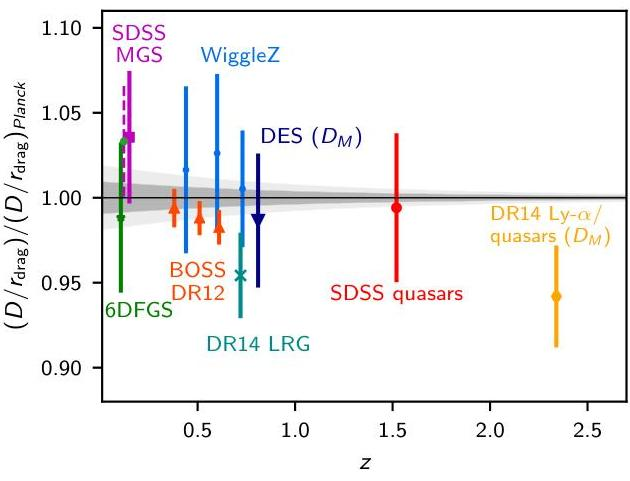

Fig. 11. Acoustic-scale distance measurements divided by the corresponding mean distance ratio from Planck TT,TE,EE +lowE+lensing in the base- $\Lambda$ CDM model. The points, with their $1 \sigma$ error bars are as follows: green star, 6dFGS (Beutler et al. 2011); magenta square, SDSS MGS (Ross et al. 2015); red triangles, BOSS DR12 (Alam et al. 2017); small blue circles, WiggleZ (as analysed by Kazin et al. 2014); large dark blue triangle, DES (DES Collaboration 2019); cyan cross, DR14 LRG (Bautista et al. 2018); red circle, SDSS quasars (Ata et al. 2018); and orange hexagon, which shows the combined BAO constraints from BOSS DR14 Lyman- $\alpha$ (de Sainte Agathe et al. 2019) and Lyman- $\alpha$ cross-correlation with quasars, as cited in (Blomqvist et al. 2019). The green point with magenta dashed line is the 6 dFGS and MGS joint analysis result of Carter et al. (2018). All ratios are for the averaged distance $D_{\mathrm{V}}(z)$, except for DES and BOSS Lyman- $\alpha$, where the ratio plotted is $D_{\mathrm{M}}$ (results for $H(z)$ are shown separately in Fig. 16). The grey bands show the $68 \%$ and $95 \%$ confidence ranges allowed for the ratio $D_{\mathrm{V}}(z) / r_{\text {drag }}$ by Planck TT,TE,EE+lowE+lensing (bands for $D_{\mathrm{M}} / r_{\text {drag }}$ are very similar).

Figure 11 summarizes the latest BAO results, updating figure 14 of PCP15. This plot shows the acoustic-scale distance ratio $D_{\mathrm{V}}(z) / r_{\text {drag }}$ measured from surveys with effective redshift $z$, divided by the mean acoustic-scale ratio in the base- $\Lambda$ CDM cosmology using Planck TT,TE,EE+lowE+lensing. Here $r_{\text {drag }}$ is the comoving sound horizon at the end of the baryon drag epoch

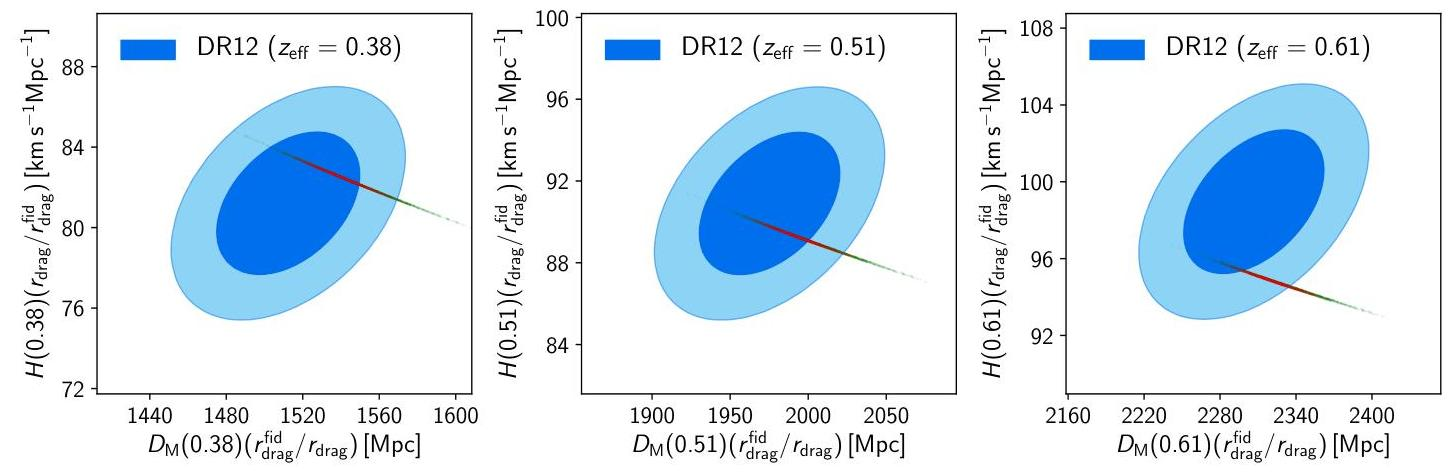

Fig. 12. Constraints on the comoving angular diameter distance $D_{\mathrm{M}}(z)$ and Hubble parameter $H(z)$ at the three central redshifts of the Alam et al. (2017) analysis of BOSS DR12. The dark blue and light blue regions show $68 \%$ and $95 \%$ CL, respectively. The fiducial sound horizon adopted by Alam et al. (2017) is $r_{\text {drag }}^{\text {fid }}=147.78 \mathrm{Mpc}$. Green points show samples from Planck TT+lowE chains, and red points corresponding samples from Planck TT,TE,EE+lowE+lensing, indicating good consistency with BAOs; one can also see the shift towards slightly lower $D_{\mathrm{M}}$ and higher $H$ as more CMB data are added.
and $D_{\mathrm{V}}$ is a combination of the comoving angular diameter distance $D_{\mathrm{M}}(z)$ and Hubble parameter $H(z)$ :
$D_{\mathrm{V}}(z)=\left[D_{\mathrm{M}}^{2}(z) \frac{c z}{H(z)}\right]^{1 / 3}$.
The grey bands in the figure show the $\pm 1 \sigma$ and $\pm 2 \sigma$ ranges allowed by Planck in the base- $\Lambda$ CDM cosmology.

Compared to figure 14 of PCP15, we have replaced the Baryon Oscillation Spectroscopic Survey (BOSS) LOWZ and CMASS results of Anderson et al. (2014) with the latest BOSS data release 12 (DR12) results summarized by Alam et al. (2017). That paper reports "consensus" results on BAOs (weighting together different BAO analyses of BOSS DR12) reported by Ross et al. (2017), Vargas-Magaña et al. (2018), and Beutler et al. (2017) in three redshift slices with effective redshifts $z_{\text {eff }}=0.38,0.51$, and 0.61 . These new measurements, shown by the red triangles in Fig. 11, are in good agreement with the Planck base- $\Lambda$ CDM cosmology.

By using quasars, it has become possible to extend BAO measurements to redshifts greater than unity. Ata et al. (2018) have measured the BAO scale $D_{\mathrm{V}}$ at an effective redshift of $z_{\text {eff }}=1.52$ using a sample of quasars from the extended Baryon Oscillation Survey (eBOSS). This measurement is shown by the red circle in Fig. 11 and is also in very good agreement with Planck. The results of the Ata et al. (2018) analysis also agree well with other analyses of the eBOSS quasar sample (e.g., Gil-Marín et al. 2018).

At even higher redshifts BAOs have been measured in the Lyman $\alpha$ spectra of quasars (Delubac et al. 2015; Font-Ribera et al. 2014; Bautista et al. 2017; du Mas des Bourboux et al. 2017; de Sainte Agathe et al. 2019; Blomqvist et al. 2019). In the first preprint version of this paper, we compared the Planck results with those from BAO features measured from the flux-transmission correlations of Sloan Digital Sky Survey (SDSS) DR12 quasars
(Bautista et al. 2017) and with the cross-correlation of the Ly $\alpha$ forest with SDSS quasars (du Mas des Bourboux et al. 2017). The combined result on $D_{\mathrm{M}} / r_{\text {drag }}$ from these analyses was about $2.3 \sigma$ lower than expected from the best-fit Planck base- $\Lambda$ CDM cosmology. The Bautista et al. (2017) and du Mas des Bourboux et al. (2017) analyses have been superseded by equivalent studies of a larger sample of SDSS DR14 quasars reported in de Sainte Agathe et al. (2019) and Blomqvist et al. (2019). The combined result for $D_{\mathrm{M}} / r_{\text {drag }}$ from these analyses (as quoted by Blomqvist et al. 2019) is plotted as the orange hexagon on Fig. 11 and lies within $1.7 \sigma$ of the Planck best-fit model. The errors on these high-redshift BAO measurements are still quite large in comparison with the galaxy measurements and so we do not include them in our default BAO compilation. ${ }^{19}$

The more recent BAO analyses solve for the positions of the BAO feature in both the line-of-sight and transverse directions (the distortion in the transverse direction caused by the background cosmology is sometimes called the Alcock-Paczynski effect, Alcock \& Paczynski 1979), leading to joint constraints on the angular diameter distance $D_{\mathrm{M}}\left(z_{\text {eff }}\right)$ and the Hubble parameter $H\left(z_{\text {eff }}\right)$. These constraints for the BOSS DR12 analysis are plotted in Fig. 12. Samples from the Planck TT+lowE and Planck TT,TE,EE+lowE+lensing likelihood are shown in green and red, respectively, demonstrating that BAO and Planck polarization data with lensing consistently pull parameters in the same direction (towards slightly lower $\Omega_{\mathrm{c}} h^{2}$ ). We find the same behaviour for Planck when adding polarization and lensing

[^0]
[^0]:    ${ }^{19}$ The first preprint version of this paper showed that the inclusion of the Bautista et al. (2017) and du Mas des Bourboux et al. (2017) Ly $\alpha$ BAO results had a minor impact on the parameters of the base$\Lambda$ CDM cosmology. The impact of the more recent Ly $\alpha$ results of de Sainte Agathe et al. (2019) and Blomqvist et al. (2019) will be even lower, since they are in closer agreement with the Planck best-fit cosmology.

to the $T T$ likelihood separately. This demonstrates the remarkable consistency of the Planck data, including polarization and CMB lensing with the galaxy BAO measurements. Evidently, the Planck base- $\Lambda$ CDM parameters are in good agreement with both the isotropized $D_{\mathrm{V}}$ BAO measurements plotted in Fig. 11, and with the anisotropic constraints plotted in Fig. 12.

In this paper, we use the 6dFGS and SDSS-MGS measurements of $D_{\mathrm{V}} / r_{\text {drag }}$ (Beutler et al. 2011; Ross et al. 2015) and the final DR12 anisotropic BAO measurements of Alam et al. (2017). Since the WiggleZ volume partially overlaps that of the BOSS-CMASS sample, and the correlations have not been quantified, we do not use the WiggleZ results in this paper. It is clear from Fig. 11 that the combined BAO likelihood for the lower redshift points is dominated by the BOSS measurements.

In the base- $\Lambda$ CDM model, the Planck data constrain the Hubble constant $H_{0}$ and matter density $\Omega_{\mathrm{m}}$ to high precision:

$$
\left.\begin{array}{l}
H_{0}=(67.36 \pm 0.54) \mathrm{km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1} \\
\Omega_{\mathrm{m}}=0.3158 \pm 0.0073,
\end{array}\right\} \begin{aligned}
& 68 \%, \text { TT,TE,EE } \\
& + \text { lowE+lensing }
\end{aligned}
$$

With the addition of the BAO measurements, these constraints are strengthened to

These numbers are in very good agreement with the constraints given in Eq. (6), which exclude the high-multipole Planck likelihood. Section 5.4 discusses the consistency of direct measurements of $H_{0}$ with these estimates and Hubble parameter measurements from the line-of-sight component of BAOs at higher redshift.

As discussed above, we have excluded Ly $\alpha$ BAOs from our default BAO compilation. The full likelihood for the combined Ly $\alpha$ and Ly $\alpha$-quasar cross-correlations reported in du Mas des Bourboux et al. (2017) is not yet available; nevertheless, we can get an indication of the impact of including these measurements by assuming uncorrelated Gaussian errors on $D_{\mathrm{M}} / r_{\text {drag }}$ and $r_{\text {drag }} H$. Adding these measurements to Planck TT,TE,EE+lowE and our default BAO compilation shifts $H_{0}$ higher, and $\Omega_{\mathrm{m}} h^{2}$ and $\sigma_{8}$ lower, by approximately $0.3 \sigma$. The joint Planck+BAO result then gives $D_{\mathrm{M}} / r_{\text {drag }}$ and $r_{\text {drag }} H$ at $z=$ 2.4 lower by 0.25 and 0.3 of Planck's $\sigma$, leaving the overall $2.3 \sigma$ tension with these results almost unchanged. As shown by Aubourg et al. (2015), it is difficult to construct well-motivated extensions to the base- $\Lambda$ CDM model that can resolve the tension with the Ly $\alpha$ BAOs. Further work is needed to assess whether the discrepancy between Planck and the Ly $\alpha$ BAO results is a statistical fluctuation, is caused by small systematic errors, or is a signature of new physics.

### 5.2. Type Ia supernovae

The use of type Ia supernovae (SNe) as standard candles has been of critical importance to cosmology, leading to the discovery of cosmic acceleration (Riess et al. 1998; Perlmutter et al. 1999). For $\Lambda$ CDM models, however, SNe data have little statistical power compared to Planck and BAO and in this paper they are used mainly to test models involving evolving dark energy and modified gravity. For these extensions of the base cosmology, SNe data are useful in fixing the background cosmology at
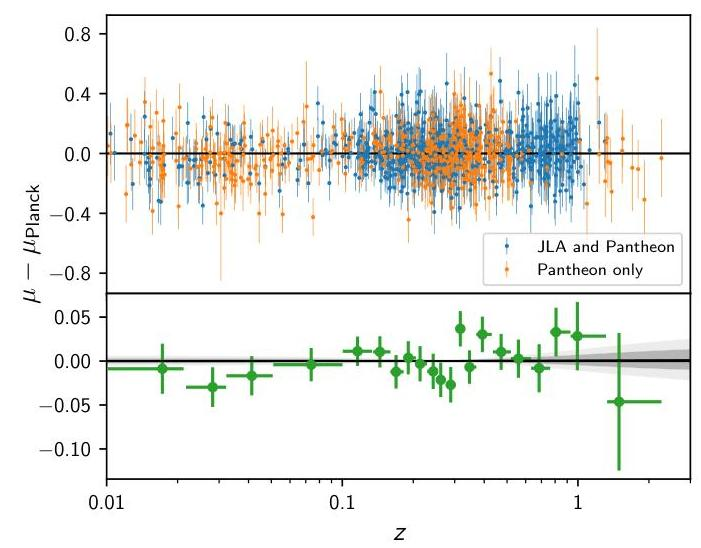

Fig. 13. Distance modulus $\mu=5 \log _{10}\left(D_{\mathrm{L}}\right)+$ constant (where $D_{\mathrm{L}}$ is the luminosity distance) for supernovae in the Pantheon sample (Scolnic et al. 2018) with $1 \sigma$ errors, compared to the Planck TT,TE,EE+lowE+lensing $\Lambda$ CDM best fit. Supernovae that were also in the older Joint Lightcurve Analysis (Betoule et al. 2014, JLA) sample are shown in blue. The peak absolute magnitudes of the SNe, corrected for light-curve shape, colour, and hostgalaxy mass correlations (see equation 3 of Scolnic et al. 2018), are fixed to an absolute distance scale using the $H_{0}$ value from the Planck best fit. The lower panel shows the binned errors, with equal numbers of supernovae per redshift bin (except for the two highest redshift bins). The grey bands show the $\pm 1$ and $\pm 2 \sigma$ bounds from the Planck TT,TE,EE+lowE+lensing chains, where each model is calibrated to the best fit, as for the data.
low redshifts, where there is not enough volume to allow high precision constraints from BAO.

In PCP15 we used the "Joint Light-curve Analysis" (JLA) sample constructed from the SNLS and SDSS SNe plus several samples of low redshift SNe described in Betoule et al. (2013, 2014) and Mosher et al. (2014). In this paper, we use the new "Pantheon" sample of Scolnic et al. (2018), which adds 276 supernovae from the Pan-STARRS1 Medium Deep Survey at $0.03<z<0.65$ and various low-redshift and HST samples to give a total of 1048 supernovae spanning the redshift range $0.01<z<2.3$. The Pantheon compilation applies crosscalibrations of the photometric systems of all of the sub-samples used to construct the final catalogue (Scolnic et al. 2015), reducing the impact of calibration systematics on cosmology ${ }^{19}$. The Pantheon data are compared to the predictions of the Planck TT,TE,EE+lowE+lensing base- $\Lambda$ CDM model best fit in Fig. 13. The agreement is excellent. The JLA and Pantheon samples are consistent with each other (with Pantheon providing tighter constraints on cosmological parameters) and there would be no significant change to our science conclusions had we chosen to use the JLA sample in this paper. To illustrate this point we give results for a selection of models using both samples in the parameter tables available in the PLA; Fig. 17, illustrating inverse-

[^0]
[^0]:    ${ }^{19}$ We use the November 2018 data file available from https:// github.com/dscolnic/Pantheon/, which includes heliocentric redshifts and no bulk-flow corrections for $z>0.08$.

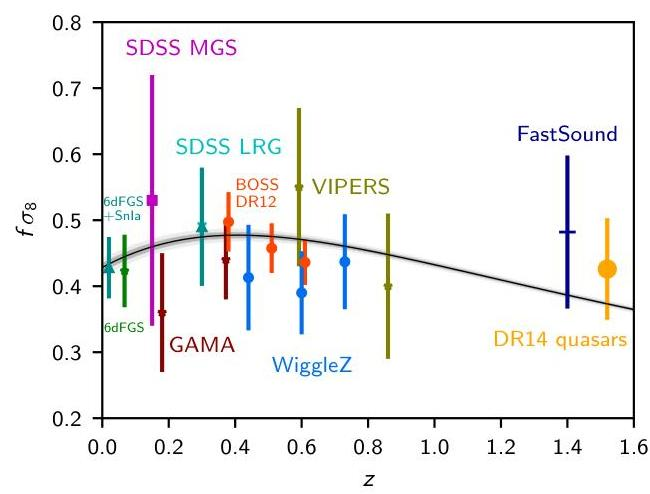

Fig. 14. Constraints on the growth rate of fluctuations from various redshift surveys in the base- $\Lambda$ CDM model: dark cyan, 6dFGS and velocities from SNe Ia (Huterer et al. 2017); green, 6dFGRS (Beutler et al. 2012); purple square, SDSS MGS (Howlett et al. 2015); cyan cross, SDSS LRG (Oka et al. 2014); dark red, GAMA (Blake et al. 2013); red, BOSS DR12 (Alam et al. 2017); blue, WiggleZ (Blake et al. 2012); olive, VIPERS (Pezzotta et al. 2017); dark blue, FastSound (Okumura et al. 2016); and orange, BOSS DR14 quasars (Zarrouk et al. 2018). Where measurements are reported in correlation with other variables, we here show the marginalized posterior means and errors. Grey bands show the $68 \%$ and $95 \%$ confidence ranges allowed by Planck TT,TE,EE+lowE+lensing.
distance-ladder constraints on $H_{0}$ (see Sect. 5.4), shows a specific example.

### 5.3. Redshift-space distortions

The clustering of galaxies observed in a redshift survey exhibits anisotropies induced by peculiar motions (known as redshiftspace distortions, RSDs). Measurement of RSDs can provide constraints on the growth rate of structure and the amplitude of the matter power spectrum (e.g., Percival \& White 2009). Since it uses non-relativistic tracers, RSDs are sensitive to the timetime component of the metric perturbation or the Newtonian potential. A comparison of the amplitude inferred from RSDs with that inferred from lensing (sensitive to the Weyl potential, see Sect. 7.4). provides a test of General Relativity.

Measurements of RSDs are usually quoted as constraints on $f \sigma_{8}$, where for models with scale-independent growth $f=$ $d \ln D / d \ln a$. For $\Lambda$ CDM, $d \ln D / d \ln a \approx \Omega_{\mathrm{m}}^{0.55}(z)$. We follow PCP15, defining
$f \sigma_{8} \equiv \frac{\left[\sigma_{8}^{(\mathrm{vd})}(z)\right]^{2}}{\sigma_{8}^{(\mathrm{vd})}(z)}$
where $\sigma_{8}^{(\mathrm{vd})}$ is the density-velocity correlation in spheres of radius $8 h^{-1} \mathrm{Mpc}$ in linear theory.

Measuring $f \sigma_{8}$ requires modelling nonlinearities and scaledependent bias and is considerably more complicated than estimating the BAO scale from galaxy surveys. One key problem is deciding on the precise range of scales that can be used in
an RSD analysis, since there is a need to balance potential systematic errors associated with modelling nonlinearities against reducing statistical errors by extending to smaller scales. In addition, there is a partial degeneracy between distortions caused by peculiar motions and the Alcock-Paczinski effect. Nevertheless, there have been substantial improvements in modelling RSDs in the last few years, including extensive tests of systematic errors using numerical simulations. Different techniques for measuring $f \sigma_{8}$ are now consistent to within a few percent (Alam et al. 2017).

Figure 14, showing $f \sigma_{8}$ as a function of redshift, is an update of figure 16 from PCP15. The most significant changes from PCP15 are the new high precision measurements from BOSS DR12, shown as the red points. These points are the "consensus" BOSS D12 results from Alam et al. (2017), which averages the results from four different ways of analysing the DR12 data (Beutler et al. 2017; Grieb et al. 2017; Sánchez et al. 2017; Satpathy et al. 2017). These results are in excellent agreement with the Planck base $\Lambda$ CDM cosmology (see also Fig. 15) and provide the tightest constraints to date on the growth rate of fluctuations. We have updated the VIPERS constraints to those of the second public data release (Pezzotta et al. 2017) and added a data point from the Galaxy and Mass Assembly (GAMA) redshift survey (Blake et al. 2012). Two new surveys have extended the reach of RSD measurements (albeit with large errors) to redshifts greater than unity: the deep FASTSOUND emission line redshift survey (Okumura et al. 2016); and the BOSS DR14 quasar survey (Zarrouk et al. 2018). We have also added a new low redshift estimate of $f \sigma_{8}$ from Huterer et al. (2017) at an effective redshift of $z_{\text {eff }}=0.023$, which is based on correlating deviations from the mean magnitude-redshift relation of SNe in the Pantheon sample with estimates of the nearby peculiar velocity field determined from the 6dF Galaxy Survey (Springob et al. 2014). As can be seen from Fig. 14, these growth rate measurements are consistent with the Planck base- $\Lambda$ CDM cosmology over the entire redshift range $0.023<z_{\text {eff }}<1.52$.

Since the BOSS-DR12 estimates provide the strongest constraints on RSDs, it is worth comparing these results with Planck in greater detail. Here we use the "full-shape consensus" results ${ }^{20}$ on $D_{V}, f \sigma_{8}$, and $F_{\mathrm{AP}}$ for each of the three redshift bins from Alam et al. (2017) and the associated $9 \times 9$ covariance matrix, where $F_{\mathrm{AP}}$ is the Alcock-Paczinski parameter,
$F_{\mathrm{AP}}(z)=D_{\mathrm{M}}(z) \frac{H(z)}{c}$.
Figure 15 shows the constraints from BOSS-DR12 on $f \sigma_{8}$ and $F_{\mathrm{AP}}$ marginalized over $D_{V}$. Planck base- $\Lambda$ CDM constraints are shown by the red and green contours. For each redshift bin, the Planck best-fit values of $f \sigma_{8}$ and $F_{\mathrm{AP}}$ lie within the $68 \%$ contours from BOSS-DR12. Figure 15 highlights the impressive consistency of the base- $\Lambda$ CDM cosmology from the high redshifts probed by the CMB to the low redshifts sampled by BOSS.

### 5.4. The Hubble constant

Perhaps the most controversial tension between the Planck $\Lambda$ CDM model and astrophysical data is the discrepancy with traditional distance-ladder measurements of the Hubble constant

[^0]
[^0]:    ${ }^{20}$ When using RSDs to constraint dark energy in Sect. 7.4, we use the alternative $D_{\mathrm{M}}, H$, and $f \sigma_{8}$ parameterization from Alam et al. (2017) for consistency with the DR12 BAO-only likelihood that we use elsewhere.

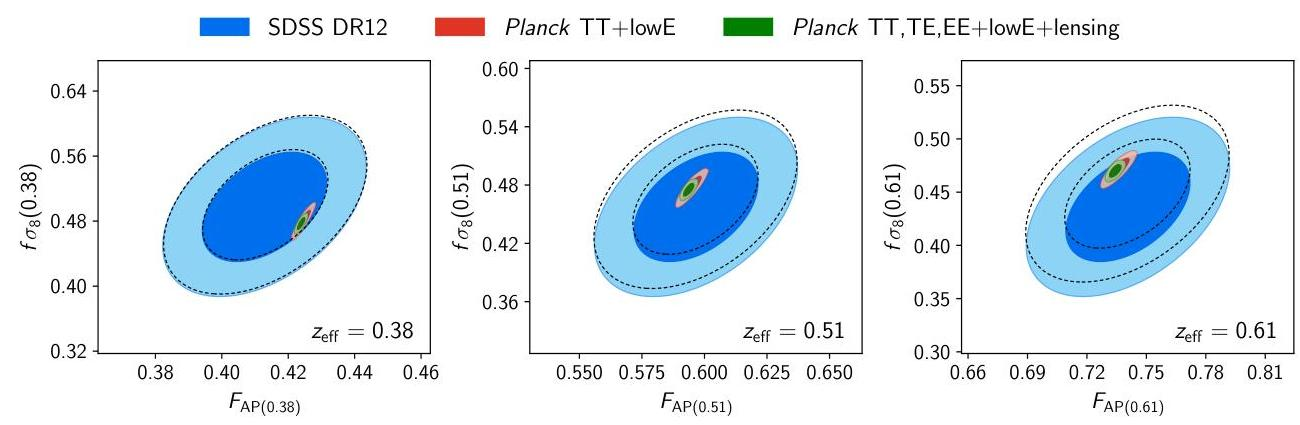

Fig. 15. Constraints on $f \sigma_{8}$ and $F_{\mathrm{AP}}$ (see Eqs. 29 and 30) from analysis of redshift-space distortions. The blue contours show $68 \%$ and $95 \%$ confidence ranges on $\left(f \sigma_{8}, F_{\mathrm{AP}}\right)$ from BOSS-DR12, marginalizing over $D_{V}$. Constraints from Planck for the base- $\Lambda$ CDM cosmology are shown by the red and green contours. The dashed lines are the $68 \%$ and $95 \%$ contours for BOSS-DR12, conditional on the Planck TT,TE,EE+lowE+lensing constraints on $D_{V}$.
$H_{0}$. PCP13 reported a value of $H_{0}=(67.3 \pm 1.2) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ for the base- $\Lambda$ CDM cosmology, substantially lower that the distance-ladder estimate of $H_{0}=(73.8 \pm 2.4) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ from the SH0ES ${ }^{21}$ project (Riess et al. 2011) and other $H_{0}$ studies (e.g., Freedman et al. 2001, 2012). Since then, additional data acquired as part of the SH0ES project (Riess et al. 2016; Riess et al. 2018a, hereafter R18) has exacerbated the tension. R18 conclude that $H_{0}=(73.48 \pm 1.66) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$, compared to our Planck TT,TE,EE+lowE+lensing estimate from Table 1 of $H_{0}=(67.27 \pm 0.60) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$. Using Gaia parallaxes Riess et al. (2018b) slightly tightened their measurement to $H_{0}=(73.52 \pm 1.62) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$. Recently Riess et al. (2019) then used improved measurements of LMC Cepheids to further tighten ${ }^{22}$ the constraint to $H_{0}=(74.03 \pm$ $1.42) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$. Interestingly, the central values of the SH0ES and Planck estimates have hardly changed since the appearance of PCP13, but the errors on both estimates have shrunk so that the discrepancy has grown from around $2.5 \sigma$ in 2013 to $3.5 \sigma$ today ( $4.4 \sigma$ using Riess et al. 2019). This discrepancy has stimulated a number of investigations of possible systematic errors in the either the Planck or SH0ES data, which have failed to identify any obvious problem with either analysis (e.g., Spergel et al. 2015; Addison et al. 2016; Planck Collaboration Int. LI 2017; Efstathiou 2014; Cardona et al. 2017; Zhang et al. 2017; Follin \& Knox 2018). It has also been argued that the Gaussian likelihood assumption used in the SH0ES analysis leads to an overestimate of the statistical significance of the discrepancy (Feeney et al. 2018).

Recently, Freedman et al. (2019) have reported a determination of $H_{0}$ using the tip of the red giant branch as a distance estimator. This analysis gives $H_{0}=(69.8 \pm 1.9) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$, i.e., intermediate between the SH0ES measurement and the Planck base- $\Lambda$ CDM value. There has been some controversy (see Yuan et al. (2019)) concerning the calibration of the tip of the red giant branch adopted in Freedman et al. (2019), though a recent reanalysis by Freedman et al. (2020) yields a value of $H_{0}$ that is almost identical to that reported in Freedman et al. (2019).

[^0]Measurements of the Hubble constant using strong gravitational-lensing time delays are also higher than the Planck base- $\Lambda$ CDM value. The most recent results, based on six strongly lensed quasars, give $H_{0}=73.3_{-1.8}^{+1.7} \mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}$ (Wong et al. 2019), which is about $3.2 \sigma$ higher than the Planck value. A number of other techniques have been used to infer $H_{0}$, including stellar ages (e.g., Jimenez \& Loeb 2002; Gómez-Valent \& Amendola 2018), distant megamasers (Reid et al. 2013; Kuo et al. 2013; Gao et al. 2016) and gravitational-wave standard sirens Abbott et al. (2017). These measurements span a range of values. Nevertheless, there is a tendency for local determinations to sit high compared to the Planck base- $\Lambda$ CDM value, with the SH0ES Cepheid-based measurement giving the most statistically significant discrepancy.

In this paper, we take the R18 estimate at face value and include it as a prior in combination with Planck in some of the parameter tables available on the PLA. The interested reader can then assess the impact of the R18 measurement on a wide range of extensions to the base- $\Lambda$ CDM cosmology.

We already mentioned in Sect. 5.1 that BAO measurements along the line of sight constrain $H(z) r_{\text {drag. }}$. Planck constrains $r_{\text {drag }}$ to a precision of $0.2 \%$ for the base- $\Lambda$ CDM model and so the BAO measurements can be accurately converted into absolute measurements of $H(z)$. This is illustrated by Fig. 16, which shows clearly how well the Planck base- $\Lambda$ CDM cosmology fits the BAO measurements of $H(z)$ over the redshift range $0.3-2.5$, yet fails to match the R18 measurement of $H_{0}$ at $z=0$. The model is also consistent with the most recent Ly $\alpha$ BAO measurements at $z \approx 2.3$.

PCP13 and PCP15 emphasized that this mismatch between BAO measurements and forward distance-ladder measurements of $H_{0}$ is not sensitive to the Planck data at high multipoles. For example, combining WMAP with BAO measurements leads to $H_{0}=(68.14 \pm 0.73) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ for the base- $\Lambda$ CDM cosmology, which is discrepant with the R18 value at the $2.9 \sigma$ level.

Heavens et al. (2014), Cuesta et al. (2015), and Aubourg et al. (2015) showed that the combination of CMB, BAO, and SNe data provides a powerful "inverse-distanceladder" approach to constructing a physically calibrated distance-redshift relation down to very low redshift. For the base- $\Lambda$ CDM model, this inverse-distance-ladder approach can be used to constrain $H_{0}$ without using any CMB mea-


[^0]:    ${ }^{21}$ SN, H0, for the Equation of State of dark energy.
    ${ }^{22} \mathrm{By}$ default in this paper (and in the PLA) we use the Riess et al. (2018a) number (available at the time we ran our parameter chains) unless otherwise stated; using the updated number would make no significant difference to our conclusions.

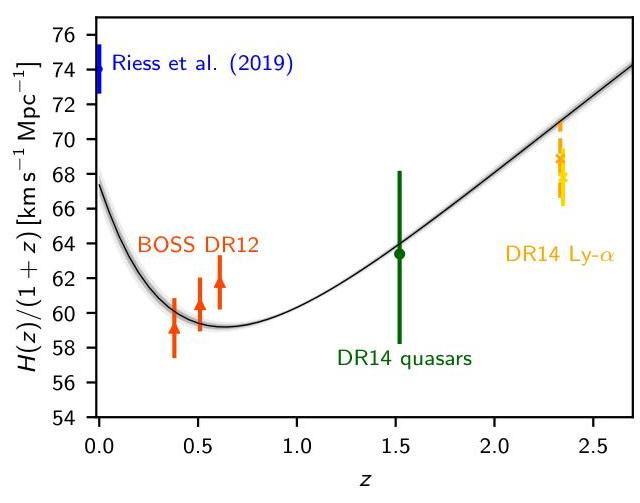

Fig. 16. Comoving Hubble parameter as a function of redshift. The grey bands show the $68 \%$ and $95 \%$ confidence ranges allowed by Planck TT,TE,EE+lowE+lensing in the base$\Lambda$ CDM model, clearly showing the onset of acceleration around $z=0.6$. Red triangles show the BAO measurements from BOSS DR12 (Alam et al. 2017), the green circle is from BOSS DR14 quasars (Zarrouk et al. 2018), the orange dashed point is the constraint from the BOSS DR14 Ly $\alpha$ auto-correlation at $z=2.34$ (de Sainte Agathe et al. 2019), and the solid gold point is the joint constraint from the Ly $\alpha$ auto-correlation and cross-correlation with quasars from Blomqvist et al. (2019). All BOSS measurements are used in combination with the Planck base-model measurements of the sound horizon $r_{\text {drag }}$, and the DR12 points are correlated. The blue point at redshift zero shows the inferred forward-distance-ladder Hubble measurement from Riess et al. (2019).
surements at all, or by only using constraints on the CMB parameter $\theta_{\mathrm{MC}}$ (see also Bernal et al. 2016; Addison et al. 2018; DES Collaboration 2018a; Lemos et al. 2019). This is illustrated in Fig. 17, which shows how the constraints on $H_{0}$ and $\Omega_{\mathrm{m}}$ converge to the Planck values as more data are included. The green contours show the constraints from BAO and the Pantheon SNe data, together with a BBN constraint on the baryon density ( $\Omega_{\mathrm{b}} h^{2}=0.0222 \pm 0.0005$ ) based on the primordial deuterium abundance measurements of Cooke et al. (2018, see Sect. 7.6). The dashed contours in this figure show how the green contours shift if the Pantheon SNe data are replaced by the JLA SNe sample. Adding Planck CMB lensing (grey contours) constrains $\Omega_{\mathrm{m}} h^{2}$ and shifts $H_{0}$ further away from the R18 measurement. Using a "conservative" Planck prior of $100 \theta_{\mathrm{MC}}=1.0409 \pm 0.0006$ (which is consistent with all of the variants of $\Lambda$ CDM considered in this paper to within $1 \sigma$, see Table 5) gives the red contours, with $H_{0}=(67.9 \pm 0.8) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ and $\Omega_{\mathrm{m}}=0.305 \pm 0.001$, very close to the result using the full Planck likelihood (blue contours). Evidently, there is a significant problem in matching the base- $\Lambda$ CDM model to the R18 results and this tension is not confined exclusively to the Planck results.

The question then arises of whether there is a plausible extension to the base- $\Lambda$ CDM model that can resolve the discrepancy. Table 5 summarizes the Planck constraints on $H_{0}$ for variants of $\Lambda$ CDM considered in this paper. $H_{0}$ remains discrepant with R18 in all of these cases, with the exception of models in
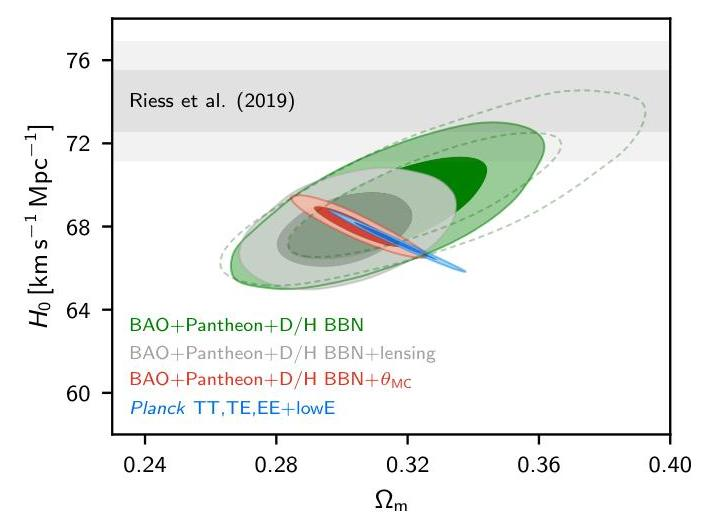

Fig. 17. Inverse-distance-ladder constraints on the Hubble parameter and $\Omega_{\mathrm{m}}$ in the base- $\Lambda$ CDM model, compared to the result from the full Planck CMB power-spectrum data. BAO data constrain the ratio of the sound horizon at the epoch of baryon drag and the distances; the sound horizon depends on the baryon density, which is constrained by the conservative prior of $\Omega_{\mathrm{b}} h^{2}=0.0222 \pm 0.0005$, based on the measurement of $\mathrm{D} / \mathrm{H}$ by Cooke et al. (2018) and standard BBN with modelling uncertainties. Adding Planck CMB lensing constrains the matter density, or adding a conservative Planck CMB "BAO" measurement ( $100 \theta_{\mathrm{MC}}=1.0409 \pm 0.0006$ ) gives a tight constraint on $H_{0}$, comparable to that from the full CMB data set. Grey bands show the local distance-ladder measurement of Riess et al. (2019). Contours contain $68 \%$ and $95 \%$ of the probability. Marginalizing over the neutrino masses or allowing dark energy equation of state parameters $w_{0}>-1$ would only lower the inverse-distance-ladder constraints on $H_{0}$. The dashed contours show the constraints from the data combination BAO+JLA+D/H BBN.
which we allow the dark energy equation of state to vary. For models with either a fixed dark energy equation-of-state parameter, $w_{0}$, or time-varying equation of state parameterized by $w_{0}$ and $w_{a}$ (see Sect. 7.4.1 for definitions and further details), Planck data alone lead to poor constraints on $H_{0}$. However, for most physical dark energy models where $p_{\mathrm{de}} \geq-\rho_{\mathrm{de}}$ (so $w_{0}>-1$ ), and the density is only important after recombination, $H_{0}$ can only decrease with respect to $\Lambda$ CDM if the measured CMB acoustic scale is maintained, making the discrepancy with R18 worse. If we allow for $w_{0}<-1$, then adding BAO and SNe data is critical to obtain a useful constraint (as pointed out by Aubourg et al. 2015), and we find
$H_{0}=(68.34 \pm 0.81) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}, \quad(w_{0}$ varying $)$,
$H_{0}=(68.31 \pm 0.82) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}, \quad\left(w_{0}, w_{a}\right.$ varying $)$,
for the parameter combination Planck TT,TE,EE+lowE+lensing +BAO+Pantheon. Modifying the dark energy sector in the late universe does not resolve the discrepancy with R18.

If the difference between base $\Lambda$ CDM and the R18 measurement of $H_{0}$ is caused by new physics, then it is unlikely to be through some change to the late-time distance-redshift relationship. Another possibility is a change in the sound horizon scale. If we use the R18 measurement of $H_{0}$, combined with

Pantheon supernovae and BAO, the acoustic scale is $r_{\text {drag }}=$ $(136.4 \pm 3.5) \mathrm{Mpc}$. The difficulty is to find a model that can give this much smaller value of the sound horizon (compared to $r_{\text {drag }}=(147.05 \pm 0.3) \mathrm{Mpc}$ from Planck TT,TE,EE+lowE in $\Lambda$ CDM), while preserving a good fit to the CMB power spectra and a baryon density consistent with BBN. We discuss some extensions to $\Lambda$ CDM in Sect. 7.1 that allow larger $H_{0}$ values (e.g., $N_{\text {eff }}>3.046$ ); however, these models are not preferred by the Planck data, and tend to introduce other tensions, such as a higher value of $\sigma_{8}{ }^{23}$

The tension between base $\Lambda$ CDM and the SH0ES $H_{0}$ measurement is intriguing and emphasizes the need for independent measurements of the distance scale. It will be interesting in the future to compare the Cepheid distance scale in more detail with other distance indicators, such as the tip of the red giant branch (Freedman et al. 2019), and with completely different techniques such as gravitational-lensing time delays (Suyu et al. 2013) and gravitational-wave standard sirens (Holz \& Hughes 2005; Abbott et al. 2017; Chen et al. 2018; Feeney et al. 2019).

### 5.5. Weak gravitational lensing of galaxies

The distortion of the shapes of distant galaxies by lensing due to large-scale structure along the line of sight is known as galaxy lensing or cosmic shear (see e.g., Bartelmann \& Schneider 2001, for a review). It constrains the gravitational potentials at lower redshift than CMB lensing, with tomographic information and completely different systematics, so the measurements are complementary. Since the source galaxy shapes and orientations are in general unknown, the lensing signal is a small effect that can only be detected statistically. If it can be measured robustly it is a relatively clean way of measuring the Weyl potential (and hence, in GR, the total matter fluctuations); however, the bulk of the statistical power comes from scales where the signal is significantly nonlinear, complicating the cosmological interpretation. The measurement is also complicated by several other issues. Intrinsic alignment between the shape of lensed galaxies and their surrounding potentials means that the galaxy shape correlation functions actually measure a combination of lensing and intrinsic alignment effects (Hirata \& Seljak 2004). Furthermore, to get a strong statistical detection, a large sample of galaxies is needed, so most current results use samples that rely mainly on photometric redshifts; accurate calibration of the photometric redshifts and modelling of the errors are required in order to use the observed lensing signal for cosmology.

Cosmic shear measurements are available from several collaborations, including CFHTLenS (Heymans et al. 2012; Erben et al. 2013, which we discussed in PCP15), DLS (Jee et al. 2016), and more recently the Dark Energy Survey (DES, DES Collaboration 2018b), Hyper SuprimeCam (HSC, Hikage et al. 2019; Hamana et al. 2020), and KiDS (Hildebrandt et al. 2017; Köhlinger et al. 2017;

[^0]Hildebrandt et al. 2020). The CFHTLenS and KiDS results found a modest tension with the Planck $\Lambda$ CDM cosmology, preferring lower values of $\Omega_{\mathrm{m}}$ or $\sigma_{8}$. A combined analysis of KiDS with GAMA (van Uitert et al. 2018) galaxy clustering has found results consistent with Planck, whereas a similar analysis combining KiDS lensing measurements with spectroscopic data from the 2-degree Field Lensing Survey and BOSS claims a $2.6 \sigma$ discrepancy with Planck (Joudaki et al. 2018). Troxel et al. (2018b) have shown that a more accurate treatment of the intrinsic galaxy shape noise, multiplicative shear calibration uncertainty, and angular scale of each bin can significantly change earlier KiDS results (by about $1 \sigma$ ), making them more consistent with Planck. At the time of running our chains the DES lensing results had been published and included this improved modelling, while an updated analysis from KiDS was not yet available; we therefore only consider the DES results in detail here. Troxel et al. (2018b) reports consistent results from DES and their new analysis of KiDS, and HSC also report results consistent with Planck. However, the more recent KiDS analysis by Hildebrandt et al. (2020) still finds a $2.3 \sigma$ discrepancy with Planck, and Joudaki et al. (2019) claim that a recalibration of the DES redshifts gives results compatible with KiDS and a combined $2.5 \sigma$ tension with Planck.

The DES collaboration analysed $1321 \mathrm{deg}^{2}$ of imaging data from the first year of DES. They analysed the cosmic shear correlation functions of 26 million source galaxies in four redshift bins (Troxel et al. 2018a), and also considered the auto(Elvin-Poole et al. 2018) and cross-spectrum (Prat et al. 2018) of 650000 lens galaxies in five redshift bins. To be conservative they restricted their parameter analysis to scales that are only weakly affected by nonlinear modelling (at the expense of substantially reducing the statistical power of the data). To account for modelling uncertainties, the cosmic shear analysis marginalizes over 10 nuisance parameters, describing uncertainties in the photometric redshift distributions, shear calibrations, and intrinsic alignments; the joint analysis adds an additional 10 nuisance parameters describing the bias and redshift uncertainty of the lens galaxies.

We use the first-year DES lensing (cosmic shear) likelihood, data cuts, nuisance parameters, and nuisance parameter priors, as described by Troxel et al. (2018a); DES Collaboration (2018b); Krause et al. (2017). We implement the theory model code independently, but use the same physical model and assumptions as the DES analysis, ${ }^{24}$ treating the nuisance parameters as fast parameters for sampling in CosmoMC. In this section we adopt the cosmological parameter priors assumed by Troxel et al. (2018a), but to be consistent with our other $\Lambda$ CDM analyses, we assume a single minimal-mass eigenstate rather than marginalizing over the neutrino mass, and use HINcode for the nonlinear corrections. ${ }^{25}$ The shear correlation data points and parameter fits are shown in Fig. 18. Note that intrinsic alignments contribute significantly to the observed shear correlation functions (as shown by the dotted lines in the figure). This introduces additional modelling uncertainty and a possible source of bias if

[^1]
[^0]:    ${ }^{23}$ To obtain simultaneously higher values of $H_{0}$, lower values of $\sigma_{8}$, and consistent values of $\Omega_{\mathrm{m}}$ it is necessary to invoke less common extensions of the $\Lambda$ CDM model, such as models featuring non-standard interactions in the neutrino, dark-matter, dark-radiation, and/or dark-energy sector (see e.g., Pettorino 2013; Lesgourgues et al. 2016; Planck Collaboration XIV 2016; Archidiacono et al. 2016; Lancaster et al. 2017; Oldengott et al. 2017; Di Valentino et al. 2018; Buen-Abad et al. 2018; Poulin et al. 2019; Kreisch et al. 2019; Agrawal et al. 2019; Lin et al. 2019; Archidiacono et al. 2019) . Such models are likely to be highly constrained by the Planck, BAO, and supernova data used in this paper and by future CMB observations and surveys of large-scale structure.

[^1]:    ${ }^{24}$ Except for the modified-gravity models in Sect. 7.4 where we calculate the lensing spectrum directly from the power spectrum of the Weyl potential (rather than from the matter power spectrum assuming standard GR).
    ${ }^{25}$ The results are quite sensitive to the choice of cosmological parameter priors, see PL2018 for an analysis using the different priors assumed by the Planck CMB lensing analysis. Here we assume consistent (DES) priors for DES and CMB lensing results; however, the Planck power spectrum constraints are much less sensitive to priors and we use our default priors for those.

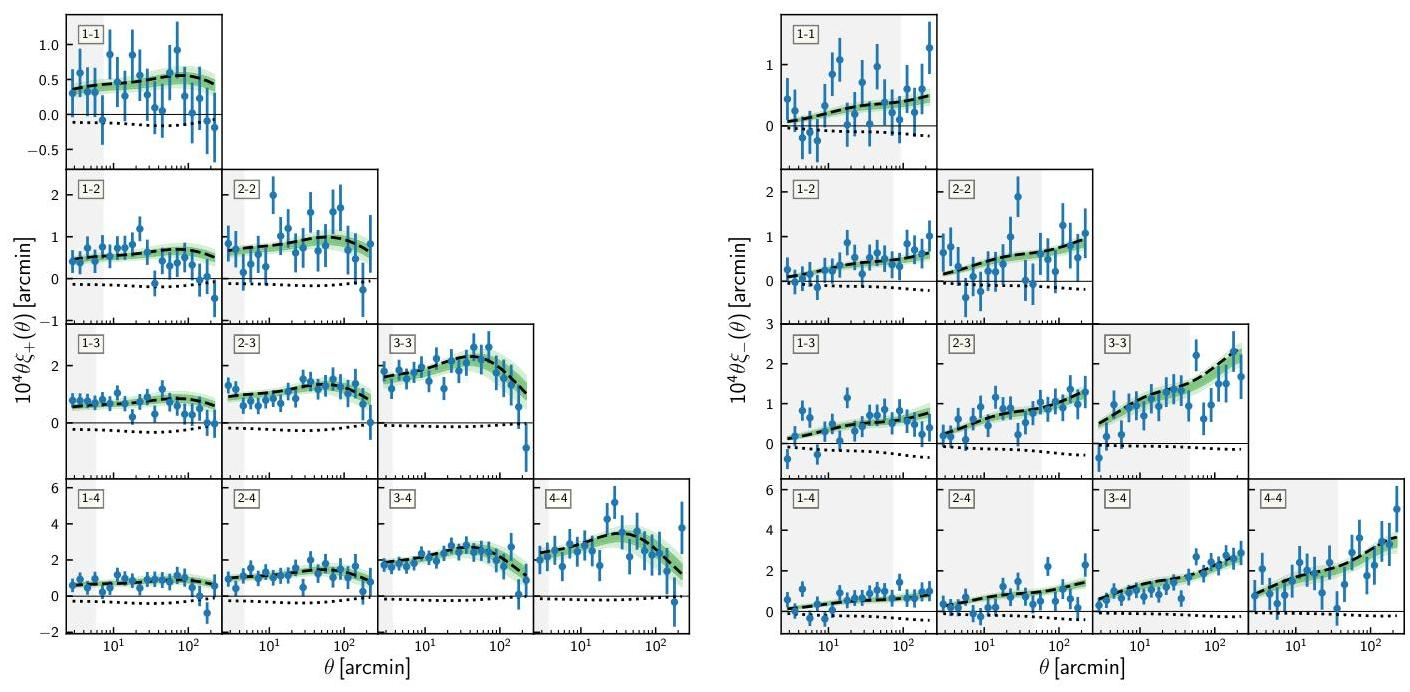

Fig. 18. Dark Energy Survey (DES) shear correlations functions, $\xi_{r}$ (left) and $\xi_{r}$ (right), for the auto- and cross-correlation between the four DES source redshift bins (Troxel et al. 2018a). Green bands show the $68 \%$ and $95 \%$ distribution of model fits in the DES lensing-only base- $\Lambda$ CDM parameter fits. The dashed line shows the DES lensing parameter best fit when the cosmological parameters are fixed to the best fit model for Planck TT,TE,EE+lowE only; dotted lines show the size of the contribution of intrinsic alignment terms to the dashed lines. Grey bands show the scales excluded from the DES analysis, in order to reduce sensitivity to nonlinear effects.
the intrinsic alignment model is not correct. The DES model is validated in Troxel et al. (2018a); Krause et al. (2017).

Figure 19 shows the constraints in the $\Omega_{\mathrm{m}}-\sigma_{8}$ plane from DES lensing, compared to the constraints from the CMB power spectra and CMB lensing. The DES cosmic shear constraint is of comparable statistical power to CMB lensing, but due to the significantly lower mean source redshift, the degeneracy directions are different (with DES cosmic shear approximately constraining $\Omega_{\mathrm{m}} \sigma_{8}^{0.5}$ and CMB lensing constraining $\Omega_{\mathrm{m}} \sigma_{8}^{0.25}$ ). The correlation between the DES cosmic shear and CMB lensing results is relatively small, since the sky area of the CMB reconstruction is much larger than that for DES, and it is also mostly not at high signal-to-noise ratio. Neglecting the cross-correlation, we combine the DES and Planck lensing results to break a large part of the degeneracy, giving a substantially tighter constraint than either alone. The lensing results separately, and jointly, are both consistent with the main Planck power-spectrum results, although preferring $\sigma_{8}$ and $\Omega_{\mathrm{m}}$ values at the lower end of those allowed by Planck. The DES joint analysis of lensing and clustering is also marginally consistent, but with posteriors preferring lower values of $\Omega_{\mathrm{m}}$ (see the next subsection). Overlap of contours in a marginalized 2D subspace does not of course guarantee consistency in the full parameter space. However, the values of the Hubble parameter in the region of $\Omega_{\mathrm{m}}-\sigma_{8}$ parameter space consistent with Planck $\Omega_{\mathrm{m}}$ and $\sigma_{8}$ are also consistent with Planck's value of $H_{0}$. A joint analysis of DES with BAO and a BBN baryon-density constraint gives values of the Hubble parameter that are very consistent with the Planck power spectrum analysis (DES Collaboration 2018a).
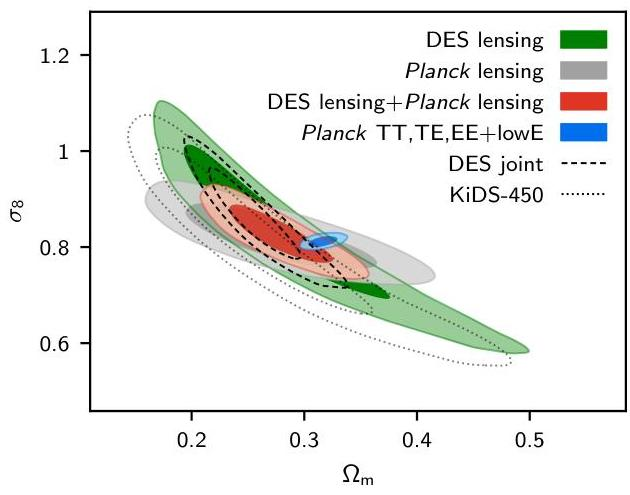

Fig. 19. Base- $\Lambda$ CDM model $68 \%$ and $95 \%$ constraint contours on the matter-density parameter $\Omega_{\mathrm{m}}$ and fluctuation amplitude $\sigma_{8}$ from DES lensing (Troxel et al. 2018a, green), Planck CMB lensing (grey), and the joint lensing constraint (red). For comparison, the dashed line shows the constraint from the DES cosmic shear plus galaxy-clustering joint analysis (DES Collaboration 2018b), the dotted line the constraint from the original KiDS-450 analysis (Hildebrandt et al. 2017, without the corrections considered in Troxel et al. 2018b), and the blue filled contour shows the independent constraint from the Planck CMB power spectra.

### 5.6. Galaxy clustering and cross-correlation

The power spectrum of tracers of large-scale structure can yield a biased estimate of the matter power spectrum, which can then be used as a probe of cosmology. For adiabatic Gaussian initial perturbations the bias is expected to be constant on large scales where the tracers are out of causal contact with each other, and nearly constant on scales where nonlinear growth effects are small. Much more information is available if small scales can also be used, but this requires detailed modelling of perturbative biases out to $k \approx 0.3-0.6 \mathrm{Mpc}^{-1}$, and fully nonlinear predictions beyond that. Any violation of scale-invariant bias on super-horizon scales would be a robust test for nonGaussian initial perturbations protected by causality (Dalal et al. 2008). However, using the shape of the biased-tracer power spectrum on smaller scales to constrain cosmology requires at least a model of constant bias parameters for each population at each redshift, and, as precision is increased, or smaller scales probed, a model for the scale dependence of the bias. Early galaxy surveys provided cosmology constraints that were competitive with those from CMB power spectrum measurements (e.g., Percival et al. 2001), but as precision has improved, focus has mainly moved away to using the cleaner BAO and RSD measurements and, in parallel, developing ways to get the quasilinear theoretical predictions under better control. Most recent studies of galaxy clustering have focussed on investigating bias rather than background cosmology, with the notable exception of WiggleZ (Parkinson et al. 2012).

Here we focus on the first-year DES survey measurement of galaxy clustering (Elvin-Poole et al. 2018) and the crosscorrelation with galaxy lensing (Prat et al. 2018, "galaxy-galaxy lensing"). By simultaneously fitting for the clustering, lensing, and cross-correlation, the bias parameters can be constrained empirically (DES Collaboration 2018b). Similar analyses using KiDS lensing data combined with spectroscopic surveys have been performed by van Uitert et al. (2018) and Joudaki et al. (2018).

To keep the theoretical model under control (nearly in the linear regime), DES exclude all correlations on scales where modelling uncertainties in the nonlinear regime could begin to bias parameter constraints (at the price of substantially reducing the total statistical power available in the data). Assuming a constant bias parameter for each of the given source redshift bins, parameter constraints are obtained after marginalizing over the bias, as well as a photometric redshift window mid-point shift parameter to account for redshift uncertainties. Together with galaxy lensing parameters, the full joint analysis has 20 nuisance parameters. Although this is a relatively complex nuisance-parameter model, it clearly does not fully model all possible sources of error: for example, correlations between redshift bins may depend on photometric redshift uncertainties that are not well captured by a single shift in the mean of each window's population. However, Troxel et al. (2018a) estimate that the impact on parameters is below $0.5 \sigma$ for all more complex models they considered. The DES theoretical model for the correlation functions (which we follow) neglects redshift-space distortions, and assumes that the bias is constant in redshift and $k$ across each redshift bin; these may be adequate approximations for current noise levels and data cuts, but will likely need to be re-examined in the future as statistical errors improve.

Using the full combined clustering and lensing DES likelihood, for a total of 457 data points (DES Collaboration 2018b), the best-fit $\Lambda$ CDM model has $\chi_{\text {eff }}^{2} \approx 500$ or 513 with the Planck best-fit cosmology. Parameter constraints from the galaxy auto-
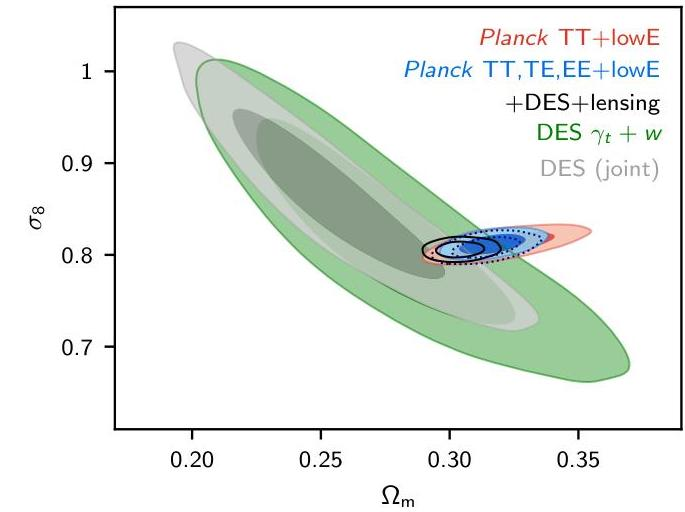

Fig. 20. Base- $\Lambda$ CDM model constraints from the Dark Energy Survey (DES), using the shear-galaxy correlation and the galaxy auto-correlation data (green) and the joint result with DES lensing (grey), compared with Planck results using TT+lowE and TT,TE,EE+lowE. The black solid contours show the joint constraint from Planck TT,TE,EE+lowE+lensing+DES, assuming the difference between the data sets is purely statistical. The dotted line shows the Planck TT,TE,EE+lowE result using the CamSpec likelihood, which is slightly more consistent with the DES contours than using the default Plik likelihood. Contours contain $68 \%$ and $95 \%$ of the probability.
and cross-correlation are shown in Fig. 20, together with the joint constraint with DES lensing (the comparison with DES galaxy lensing and CMB lensing alone is shown in Fig. 19).

Using the joint DES likelihood in combination with DES cosmological parameter priors gives (for our base- $\Lambda$ CDM model with $\sum m_{v}=0.06 \mathrm{eV}$ )

Planck TT,TE,EE+lowE+lensing gives a higher value of $S_{8}=$ $0.832 \pm 0.013$, as well as larger $\Omega_{\mathrm{m}}=0.315 \pm 0.007$. As shown in the previous section, the DES lensing results are quite compatible with Planck, although peaking at lower $\Omega_{\mathrm{m}}$ and $\sigma_{8}$ values. The full joint DES likelihood, however, shrinks the error bars in the $\sigma_{8}-\Omega_{\mathrm{m}}$ plane so that only $95 \%$ confidence contours overlap with Planck CMB data, giving a moderate (roughly $2 \%$ PTE) tension, as shown in Fig. 20. The dotted contour in Fig. 20 shows the result using the CamSpec Planck likelihood, which gives results slightly more consistent with DES than the default Plik likelihood. The Planck result is therefore sensitive to the details of the polarization modelling at the $0.5 \sigma$ level, and the tension cannot be quantified robustly beyond this level.

Combining DES with the baseline Planck likelihood pulls the Planck result to lower $\Omega_{\mathrm{m}}$ and slightly lower $\sigma_{8}$, giving

$$
\left.\begin{array}{rl}
S_{8} & =0.811 \pm 0.011 \\
\Omega_{\mathrm{m}} & =0.3040 \pm 0.0060 . \\
\sigma_{8} & =0.8062 \pm 0.0057
\end{array}\right\} \begin{aligned}
& 68 \%, \text { Planck TT,TE,EE } \\
& + \text { lowE+lensing+DES. }
\end{aligned}
$$

A similar shift is seen without including Planck lensing, and is disfavoured by Planck CMB with a total $\Delta \chi_{\text {eff }}^{2} \approx 13$ for the CMB

likelihoods (comparing the Planck-only best fit to the fit when combined with DES). The shift in parameters is also larger than would be expected for Gaussian distributions, given the small change in parameter covariance. The corresponding change in $\chi_{\text {eff }}^{2}$ for the DES likelihood is $\Delta \chi_{\text {eff }}^{2} \approx 10$, which is high, but less surprising given the 4-5 contribution expected from the number of parameters that are much better constrained by Planck. The summary consistency statistic $\chi_{\text {eff, joint }}^{2}-\chi_{\text {eff, DES }}^{2}-\chi_{\text {eff,Planck }}^{2} \approx 14$, which is high at the roughly $1 \%$ PTE level, given the expected value of 4 , assuming roughly Gaussian statistics (Raveri \& Hu 2019).

In summary, the DES combined probes of $\Lambda$ CDM parameters are in moderate percent-level tension with Planck. Whether this is a statistical fluctuation, evidence for systematics, or new physics is currently unclear. In this paper, we follow the philosophy of PCP13 and PCP15 of making minimal use of other astrophysical data in combination with Planck, using BAO as our primary complementary data set. We therefore do not include DES results in most of the parameter constraints discussed in this paper. We do, however, consider the impact of the DES weak lensing results on dark-energy and modified-gravity constraints in Sect. 7.4 and on neutrino masses in Sect. 7.5.1. We also include DES for a wider range of models in the Planck parameter tables available on the PLA.

### 5.7. Cluster counts

Counts of clusters of galaxies provide an additional way of constraining the amplitude of the power spectrum at low redshifts (e.g., Pierpaoli et al. 2001; Komatsu \& Seljak 2002, and references therein). Planck clusters, selected via the thermal Sunyaev-Zeldovich (tSZ) signature, were used to explore cosmological parameters in Planck Collaboration XX (2014). This analysis was revisited using a deeper sample of Planck clusters in Planck Collaboration XXIV (2016). We have not produced a new tSZ cluster catalogue in the 2018 Planck data release and so the results presented in this section are based on the 439 clusters in the MMF3 cluster cosmology sample, as analysed in Planck Collaboration XXIV (2016). Comparison with the 2018 CMB Planck power spectrum results show differences primarily from changes to the base- $\Lambda$ CDM model parameters caused by the tighter constraints on $\tau$. The impact of the lower value of $\tau$ reported in Planck Collaboration Int. XLVI (2016) on the interpretation of cluster counts has been discussed by Salvati et al. (2018).

We first review the main results from Planck Collaboration XXIV (2016). There has been increasing recognition that the calibration of cluster masses is the dominant uncertainty in using cluster counts to estimate cosmological parameters. In the analysis of Planck clusters, the cluster tSZ observable was related to the cluster mass $M_{500}{ }^{26}$ using X-ray scaling relations (Arnaud et al. 2010), calibrated against a subsample of the Planck clusters. The X-ray masses are, however, derived assuming hydrostatic equilibrium and are expected to be biased low (e.g., Nagai et al. 2007). This was accounted for by multiplying the true masses by a so-called "hydrostatic mass bias" factor of $(1-b)$. The strongest constraints on this bias factor come from weak gravitational lensing estimates of cluster masses. Planck Collaboration XXIV (2016) considered three

[^0]lensing mass calibrations ${ }^{27}:(1-b)=0.69 \pm 0.07$ from 22 Planck clusters from the Weighing the Giants lensing programme (von der Linden et al. 2014); $(1-b)=0.78 \pm 0.08$ from 37 Planck clusters calibrated by the Canadian Cluster Comparison Project (Hoekstra et al. 2015); and $1 /(1-b)=0.99 \pm 0.19$ from Planck CMB-lensing mass estimates of the MMF3 cluster sample (Planck Collaboration XXIV 2016). More recently, Sereno et al. (2017) have analysed 35 Planck clusters with galaxy shear data from the CFHTLenS (Heymans et al. 2012) and RCSLenS (Hildebrandt et al. 2016) surveys, finding $(1-b) \approx 0.77 \pm 0.11$ for all clusters and $(1-b)=0.68 \pm 0.11$ for the 15 clusters in the cosmological sample. Additionally, Penna-Lima et al. (2017) use gravitational lensing measurements from HST images of 21 Planck clusters finding $(1-b)=0.73 \pm 0.10$.

The determination of cosmological parameters such as $\sigma_{8}$ and $\Omega_{\mathrm{m}}$ from Planck cluster counts is strongly dependent on the prior adopted for the mass bias parameter. In this paper, we use the Planck TT,TE,EE+lowE+lensing likelihood in combination with the Planck cluster counts to derive a constraint on $(1-b)$ (following similar analyses described in Planck Collaboration XX 2016 and Salvati et al. 2018). This gives

$$
(1-b)=0.62 \pm 0.03 \quad \begin{aligned}
& (68 \%, \text { Planck TT,TE,EE+lowE } \\
& \text { +lensing) }
\end{aligned}
$$

compared to $0.58 \pm 0.04$ using the 2015 TT,TE,EE+lowP likelihood (Planck Collaboration XX 2016). The roughly $1 \sigma$ upward shift in Eq. (34) is mainly caused by the 2018 change in the $\tau$ constraint. The mass bias of Eq. (34) is at the lower end of the weak-lensing mass estimates, but is about $2 \sigma$ lower that the Planck CMB-lensing mass calibration reported in Planck Collaboration XX (2016).

Zubeldia \& Challinor (2019) have revisited the Planck CMB-lensing mass calibration, incorporating the CMB-lensing mass estimates within a likelihood describing the Planck cluster counts, together with a Planck prior on $\theta_{\mathrm{MC}}$. This study corrects for significant biases in the analysis reported in Planck Collaboration XX (2016). Zubeldia \& Challinor (2019) find $(1-b)=0.71 \pm 0.10$ and $\sigma_{8}\left(\Omega_{\mathrm{m}} / 0.33\right)^{0.25}=0.765 \pm 0.035$. These results, based entirely on Planck data, are consistent with the base- $\Lambda$ CDM parameters from the Planck power spectra and with the inferred mass bias of Eq. (34).

Since PCP15 there have been a number of new analyses of cluster counts using other surveys. Two recent studies (Mantz et al. 2015; de Haan et al. 2016), with very different selection criteria, use weak gravitational lensing mass determinations from the Weighing the Giants programme to calibrate cluster scaling relations. de Haan et al. (2016) analysed a sample of 377 clusters at $z>0.25$ identified with SPT, finding $\sigma_{8}\left(\Omega_{\mathrm{m}} / 0.27\right)^{0.3}=0.797 \pm 0.031$, while Mantz et al. (2015) analysed an X-ray-selected sample of clusters from the ROSAT All-Sky survey, finding $\sigma_{8}\left(\Omega_{\mathrm{m}} / 0.3\right)^{0.17}=0.81 \pm 0.03$. These measurements can be compared to our baseline $\Lambda$ CDM constraints (Planck TT,TE,EE+lowE+lensing) of $\sigma_{8}\left(\Omega_{\mathrm{m}} / 0.27\right)^{0.3}=$ $0.849 \pm 0.010$ and $\sigma_{8}\left(\Omega_{\mathrm{m}} / 0.3\right)^{0.17}=0.817 \pm 0.076$.

Schellenberger \& Reiprich (2017) have analysed a sample of 64 of the brightest X-ray clusters using a prior on the hydrostatic mass bias from Biffi et al. (2016). These authors find $\Omega_{\mathrm{m}}=$

[^1]
[^0]:    ${ }^{26}$ The mass contained within a sphere of radius $R_{500}$, centred on the cluster, where $R_{500}$ is the radius at which the mean density is 500 times the critical density at the redshift of the cluster.

[^1]:    ${ }^{27}$ See Sifón et al. (2016) for a discussion of dynamical mass estimates for SZ-selected clusters.

$0.303 \pm 0.009, \sigma_{\mathrm{S}}=0.790_{-0.028}^{+0.030}$, and $S_{\mathrm{S}}=\sigma_{\mathrm{S}}\left(\Omega_{\mathrm{m}} / 0.3\right)^{1 / 2}=$ $0.792 \pm 0.054$. Each of these numbers is within about $1 \sigma$ of the Planck base- $\Lambda$ CDM best-fit cosmology reported in this paper. Finally, we mention the analysis of ROSAT-observed X-ray clusters carried out by Böhringer et al. $(2014,2017)$. These authors choose a central value for the hydrostatic mass bias of $(1-b)=0.9$, although they allow for small variations in the slope ( $7 \%$ ) and normalization ( $14 \%$ ) of the X-ray luminositymass relation; they find constraints the $\sigma_{\mathrm{S}}-\Omega_{\mathrm{m}}$ plane in tension with Planck at about $2.5 \sigma$.

In summary, accurate calibrations of cluster masses are essential if cluster counts are to be used as cosmological probes. Given the uncertainties in these calibrations, we do not use cluster counts in our main parameter grid. Consistency of cluster counts with the best-fit Planck base- $\Lambda$ CDM cosmology requires hydrostatic mass biases (Eq. 34) that are at the lower end, but within about $1 \sigma$ of bias factors estimated from weak-lensing cluster masses. The combined Planck CMB-lensing and clustercount analysis reported by Zubeldia \& Challinor (2019) is in good agreement with the Planck base- $\Lambda$ CDM cosmology. At this time, there is no compelling evidence for a discrepancy between Planck-, SPT-, or X-ray-selected cluster counts and the base- $\Lambda$ CDM model.

## 6. Internal consistency of $\Lambda$ CDM model parameters

In this section we briefly discuss a couple of curious features of the Planck data that lead to moderate tensions in parameter consistency tests. We first discuss how parameters vary between high and low multipoles, and the relevant features in the power spectra that may be responsible for these shifts. We then discuss the related issue of how the full multipole range appears to prefer more lensing than predicted by $\Lambda$ CDM fits. We end this section with a discussion of systematic uncertainties.

### 6.1. Consistency of high and low multipoles

The Planck CMB temperature power spectrum shows a conspicuous dip over the multipole range $20 \leq \ell \leq 30$ compared to $\Lambda$ CDM fits, as can be seen in Fig. 1. This feature was first observed by WMAP (Bennett et al. 2003), and was discussed in detail in PCP13. Since it is detected consistently by both WMAP and Planck at multiple frequencies, it cannot plausibly be explained by an instrumental systematic or foreground. The large-scale Planck temperature map is signal dominated, so the dip feature is almost identical in this final release. PCP13 also noted an approximately $2.7 \sigma$ mismatch between the bestfit $\Lambda$ CDM cosmology and the amplitude of the measured temperature power spectrum at $\ell \leq 30$. However, with the tighter optical depth constraints used in this paper and improvements in the high multipole likelihoods we find no strong evidence for an amplitude mismatch. The Planck TT,TE,EE+lowE+lensing best-fit $\Lambda$ CDM model provides a good overall fit to the temperature multipoles at $\ell<30\left(\chi_{\mathrm{cd}}^{2} \approx 23\right.$ for 28 data points), and because of the skewed $\chi^{2}$-like distribution of the CMB spectrum estimators, it is expected that typically more than half of the data points are below the theoretical model values (see Fig. 1). The statistical significance of the dip feature is hard to quantify, since it was identified a posteriori, but PPL15 suggest a significance of about $2.8 \%$ after maximizing over extremal $\ell$ ranges found in simulations. This could be an indication of new physics at large scales, for example associated with a sharp feature in the inflationary potential (as considered by Peiris et al. 2003, and many
subsequent researchers). Alternatively, it could just be a statistical fluctuation, which is our baseline assumption. However, since the dip is a relatively unusual fluctuation and it is near one end of the multipole range, it tends to pull cosmological parameters more than would be expected in typical realizations of a $\Lambda$ CDM cosmology. This needs to be borne in mind in assessing parameter shifts between low and high multipoles.

WMAP measured the CMB temperature fluctuations up to $\ell \approx 800$ (Bennett et al. 2013). The higher-resolution data from Planck substantially increases the multipole range of the temperature power spectrum out to $\ell \approx 2500$. Cosmological parameters are therefore expected to shift (usually towards the truth) from the mean posterior values measured by WMAP, together with a reduction in the error bars. This is what is seen, with the Planck values of $H_{0}$ and $n_{\mathrm{s}}$ decreasing, and $\Omega_{\mathrm{m}}$ and $\Omega_{\mathrm{m}} h^{2}$ increasing, along with substantially smaller errors. However as noted in PCP13 the magnitudes of the shifts appear to be slightly larger than might be expected statistically, assuming the base- $\Lambda$ CDM cosmology. This stimulated additional work on the consistency of the Planck power spectra reported in PPL15 and to further investigations of the consistency of cosmological parameters measured from high and low multipoles from Planck (Addison et al. 2016; Planck Collaboration Int. LI 2017). As noted in the introduction, there is a very good agreement between Planck and WMAP temperature maps on the scales observed by WMAP (Planck Collaboration I 2016; Huang et al. 2018), but an inconsistency with high multipoles could indicate either new physics beyond $\Lambda$ CDM, or the presence of some unidentified systematics associated with the Planck data and/or the foreground model. Planck Collaboration Int. LI (2017) find that although some cosmological parameters differ by more than $2 \sigma$ between $\ell<800$ and $\ell>800$, accounting for the multi-dimensional parameter space including correlations between parameters, the shifts are at the $10 \%$ level and hence not especially unusual. Nonetheless, parameter shifts, particularly in the fluctuation amplitude and Hubble parameter (which are directly relevant for the $\Lambda$ CDMcomparison with external data, as discussed in Sect. 5) are worth a brief re-examination using the additional information provided by the Planck polarization spectra.

Constraints on cosmological parameters from power spectra at high multipoles require a foreground model. Previous studies have shown that results are not very sensitive to the specific assumptions that are made within the broad context of slowly varying foreground spectra expected on physical grounds (Addison et al. 2016; Planck Collaboration Int. LI 2017). In this section, we use the plik.lite Planck likelihood, described in detail in PPL18, which has the standard Plik foreground and nuisance parameters marginalized out without further assumptions on the cosmology. ${ }^{28}$ For standard model extensions plik.lite accurately reproduces results from the full Plik likelihood. It allows us to explore the high- $\ell$ likelihood accounting for foreground uncertainties, but with the foregrounds constrained in a sensible way from their spectra over the full multipole range. We consider the multipole ranges $\ell \leq 801$ and $\ell \geq 802$ (corresponding to the boundary of one of the plik. lite bins), so that the low-multipole range is roughly comparable to WMAP and the two ranges have similar statistical power on

[^0]
[^0]:    ${ }^{28}$ We do not attempt to quantify likelihood modelling differences in this section, but a CamSpec-based likelihood gives slightly less tension between high and low multipoles (especially with polarization), associated with the weaker preference for $A_{\mathrm{L}}>1$, as discussed in more detail in Sect. 6.2.

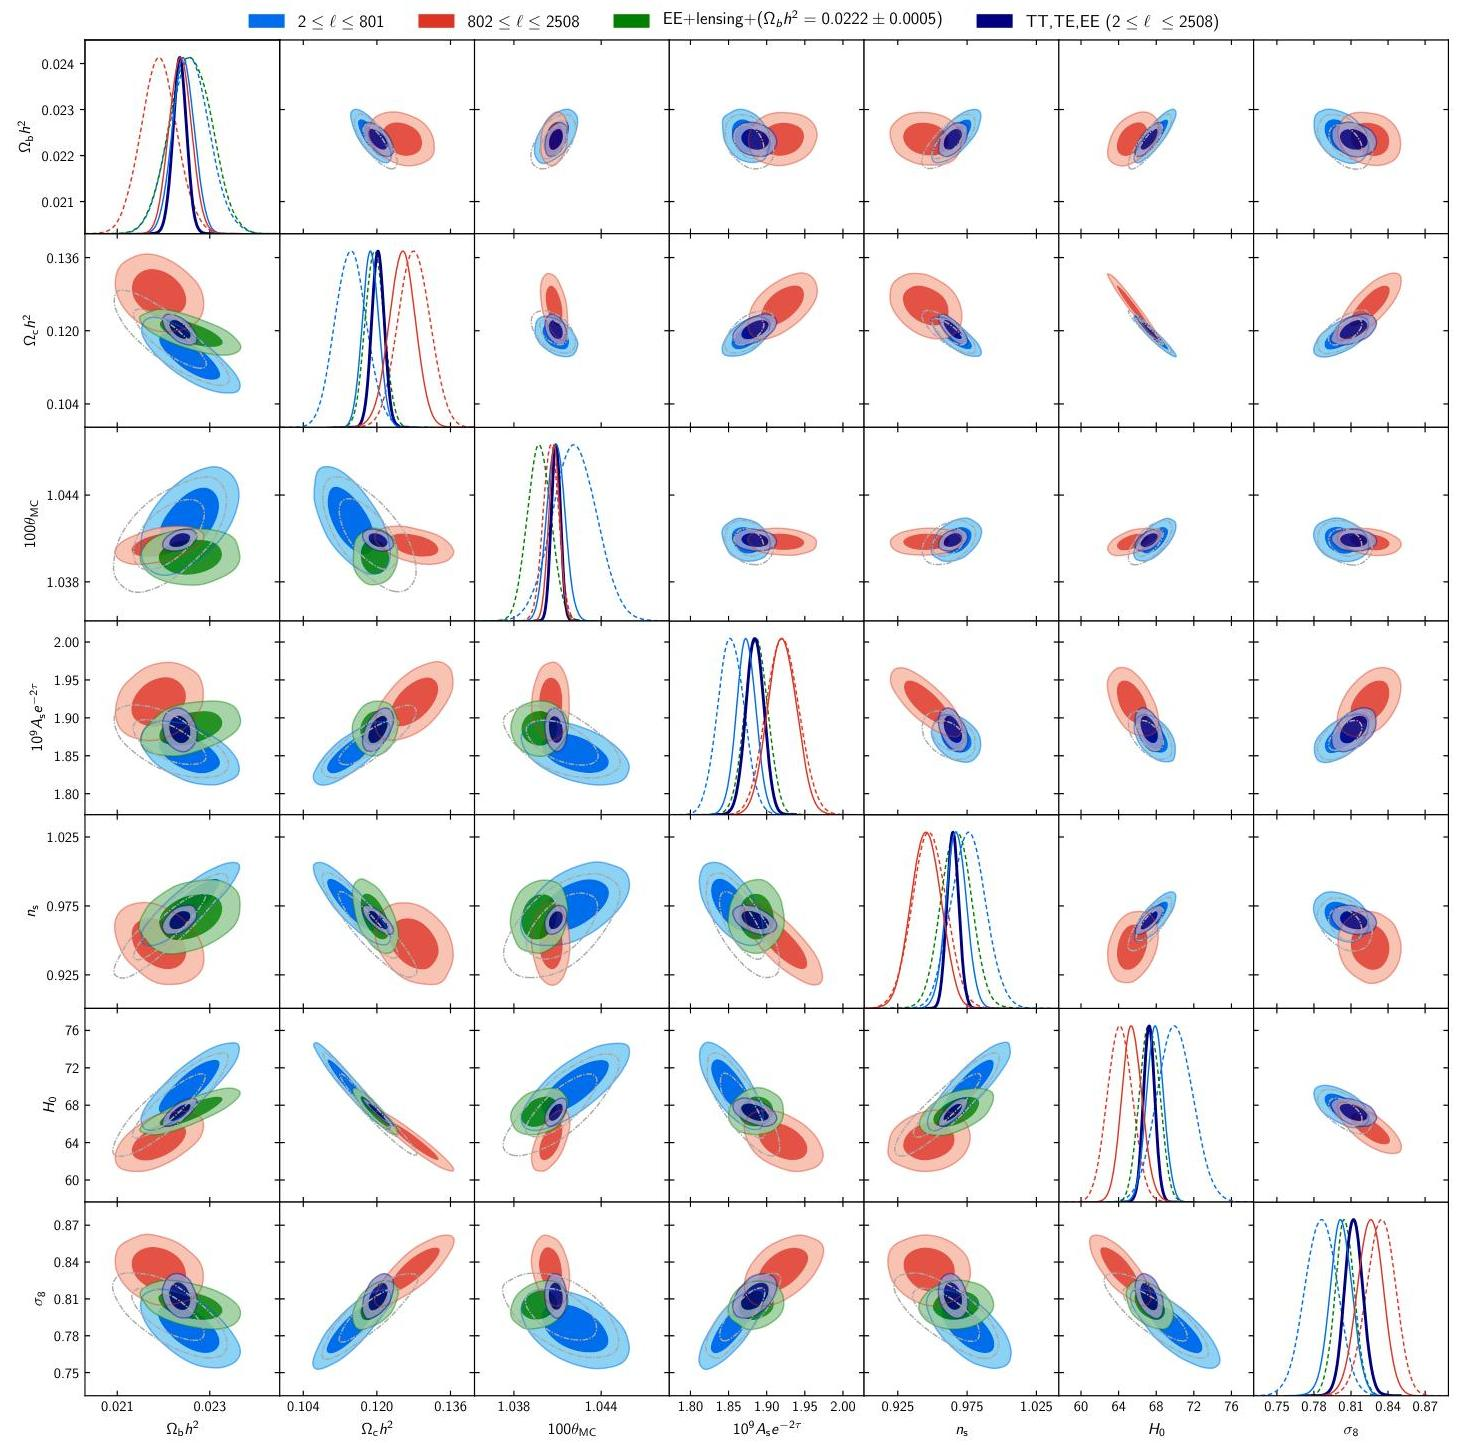

Fig. 21. Base- $\Lambda$ CDM $68 \%$ and $95 \%$ parameter constraint contours from the CMB power spectra using $\ell \leq 801$ (blue), compared to $\ell \geq 802$ (red). All results use the plik_lite Planck likelihood, and also include the low- $\ell$ SimAll "lowE" likelihood to constrain the optical depth $\tau$; the Commander likelihood is used for temperature multipoles $\ell<30$. The lower triangle contains the Planck temperature likelihoods, which show a moderate tension between high and low multipoles; however, they intersect in a region of parameter space consistent with the nearly-independent constraint from EE+lensing combined with a conservative prior $\Omega_{\mathrm{b}} h^{2}=$ $0.0222 \pm 0.0005$, motivated by element-abundance observations (green). The upper triangle shows the equivalent results from Planck TT,TE,EE+lowE at low and high multipoles. The full combined result from Planck TT,TE,EE+lowE is shown as the navy contours. The unfilled grey contours show the result for multipoles $30 \leq \ell \leq 801$ (that is, removing the low- $\ell$ Commander likelihood that pulls parameters to give lower temperature power, due to the dip below $\ell \approx 30$ ). The diagonal plots are the marginalized parameter constraints, where results corresponding to the lower triangle are shown dashed, while the upper triangle are the solid curves.

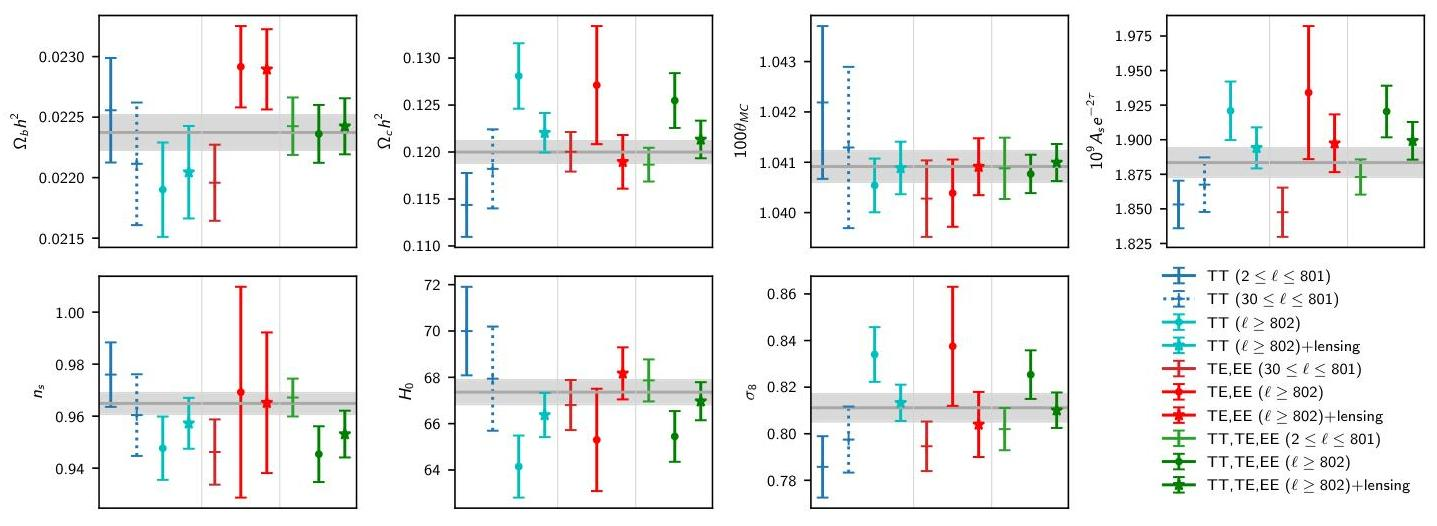

Fig. 22. Base- $\Lambda$ CDM $68 \%$ marginalized parameter constraints for various combinations of power spectrum ranges (all using plik_lite and also including low- $\ell$ polarization "lowE"). Points marked with a cross are from $2 \leq \ell \leq 801$, while points marked with a circle are from $\ell \geq 802$. Dotted errors are the result from $30 \leq \ell \leq 801$, without the Commander large-scale temperature likelihood, showing that $\ell<30$ pulls the low-multipole parameters further from the joint result. Points marked with a star are from $\ell \geq 802$ combined with the lensing likelihood, showing that constraining the lensing amplitude pulls all the results from high multipoles towards better consistency with the results from lower multipoles. The grey horizontal band shows the combined $68 \%$ constraint from Planck TT,TE,EE+lowE+lensing.
most parameters. Results splitting at $\ell \approx 1000$ are similar, but with larger errors in the high multipole range.

Figure 21 shows a comparison of the high and low multipole ranges, both for temperature (lower triangle, as previously discussed by Addison et al. 2016 and Planck Collaboration Int. LI 2017), and new results for the combined temperaturepolarization likelihood (upper triangle). Part of the difference between the low- and high-multipole ranges is caused by the largescale temperature dip discussed above; if we exclude multipoles $\ell<30$ (unfilled grey contours), the contours from $\ell \leq 801$ shift towards the area of consistency with the high multipoles. This could indicate that the low-multipole results have been pulled unusually far from the truth by the large-scale power spectrum dip; if so, the WMAP temperature results would also have been pulled at a similar (but not identical) level. The region of overlap of the high- and low-multipole parameter constraints is consistent with constraints from the nearly-independent combination of $E E$ polarization and lensing with a conservative $\Omega_{\mathrm{b}} h^{2}$ prior (green contours). This is consistent with a statistical fluctuation pulling the low and high multipoles in opposite directions, so that their intersection is closer to the truth if $\Lambda$ CDM is correct.

Figure 22 shows marginalized individual parameter constraints, and also a comparison with the results from the polarization likelihoods at high and low multipoles. The $\ell \geq 802$ temperature results pull parameters to a region of higher matter density and fluctuation amplitude (and to lower $n_{\mathrm{s}}$ and $H_{0}$ ) than the lower multipole range, and predict a CMB lensing amplitude parameter $\sigma_{8} \Omega_{\mathrm{m}}^{0.25}=0.649 \pm 0.018$. This is in tension with the CMB lensing-reconstruction measurement of $\sigma_{8} \Omega_{\mathrm{m}}^{0.25}=0.589 \pm 0.020$ at $2.2 \sigma$ (as pointed out by Addison et al. 2016 with 2015 data; also see the closely-related discussion in the next subsection). As shown in Fig. 22, combining the $\ell \geq 802$ CMB likelihood with the lensing reconstruction, all parameter results move back towards the same region of parameter space as combining with $\ell \leq 801$, consistent with the high- $\ell$ temperature result having fluctuated high along the main degeneracy direction. As dis-
cussed in Sects. 2.3 and 3.3, the combined CMB power spectrum results over the full multipole range are consistent with the lensing likelihood.

It is also interesting to compare to parameter constraints from the CMB power spectrum multipoles $\ell \leq 801$ combined with the lensing and BAO, which gives

These results are entirely independent of the cosmological parameter fit to the $\ell \geq 801$ power spectra, but agree well at the $1 \sigma$ level with the full joint results in Table 1 (which have similar errors on these parameters). An equivalent result could be obtained using WMAP data after replacing their low- $\ell$ polarization with the Planck HFI measurement (i.e., lowE).

For the temperature likelihoods, the difference between the low- and high-multipole constraints remains evident, with $\Omega_{\mathrm{m}} h^{2}$ differing at the $2.8 \sigma$ level. Adding polarization, the results from the multipole ranges are more consistent, as shown in Fig. 22, though the difference in $\Omega_{\mathrm{m}} h^{2}$ is still unusual at the roughly $2 \sigma$ level. However, the shifts in the different parameters are all highly correlated, due to partial parameter degeneracies, so the significance of any individual large shift is lower after accounting for the number of parameters (Planck Collaboration Int. LI 2017). The internal tensions between multipole ranges appear to be consistent with moderate statistical fluctuations, related to the low- $\ell$ dip at large scales and correlated with the lensing amplitude on small scales. The large-scale feature is well determined by both WMAP and Planck and very robustly measured. The internal consistency of the Planck power spectra between different frequencies and detectors (PPL15, PPL18) argues against systematics driving large parameter shifts at high multipoles. Equation (35) also demonstrates that any effect from the high-

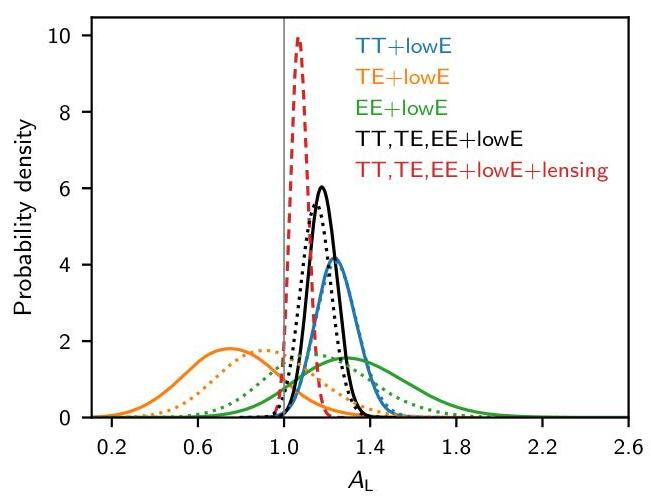

Fig. 23. Constraints on the value of the consistency parameter $A_{\mathrm{L}}$, as a single-parameter extension to the base- $\Lambda$ CDM model, using various combinations of Planck data. When only power spectrum data are used, $A_{\mathrm{L}}>1$ is favoured at about $3 \sigma$, but including the lensing reconstruction the result is consistent at $2 \sigma$ with $A_{\mathrm{L}}=1$. The dotted lines show equivalent results for the CamSpec likelihood, which peak slightly nearer to $A_{\mathrm{L}}=1$, indicating some sensitivity of the $A_{\mathrm{L}}$ results to choices made in constructing the high-multipole likelihoods.
multipole spectra alone cannot be pulling our baseline parameters by more than about $1 \sigma$. In the next subsection we describe in more detail the apparent preference for a higher lensing amplitude, and the features in the observed spectrum that could be responsible for it.

### 6.2. Lensing smoothing and $A_{\mathrm{L}}$

In addition to the direct measurement of CMB lensing described in Sect. 2.3 and PL2018, lensing can be seen in the Planck CMB power spectra via the lensing-induced smoothing of the acoustic peaks and transfer of power to the damping tail. This effect is modelled in our main parameter analysis, and can be calculated accurately from the unlensed CMB power spectra and the CMB lensing potential power spectrum in each model (Seljak 1996; Lewis \& Challinor 2006). Interesting consistency checks include testing if the amplitude of the smoothing effect in the CMB power matches expectation and whether the amplitude of the smoothing is consistent with that measured by the lensing reconstruction. To do this, the theoretical prediction for the lensing spectrum in each model is often scaled by an " $A_{\mathrm{L}}$ " consistency parameter, where the theoretical expectation is that $A_{\mathrm{L}}=1$ (Calabrese et al. 2008).

As shown in Fig. 3, the Planck lensing-reconstruction power spectrum is consistent with the amplitude expected for $\Lambda$ CDM models that fit the CMB spectra, so the Planck lensing measurement is compatible with $A_{\mathrm{L}}=1$. However, the distributions of $A_{\mathrm{L}}$ inferred from the CMB power spectra alone are shown in Fig. 23 for various different data combinations, and these indicate a preference for $A_{\mathrm{L}}>1$, with
$A_{\mathrm{L}}=1.243 \pm 0.096 \quad(68 \%$, Planck $\mathrm{TT}+$ lowE),
$A_{\mathrm{L}}=1.180 \pm 0.065 \quad(68 \%$, Planck TT,TE,EE+lowE), (36b)
assuming a $\Lambda \mathrm{CDM}+A_{\mathrm{L}}$ model. The TE polarization data alone slightly prefer $A_{\mathrm{L}}<1$, with the EE data slightly preferring
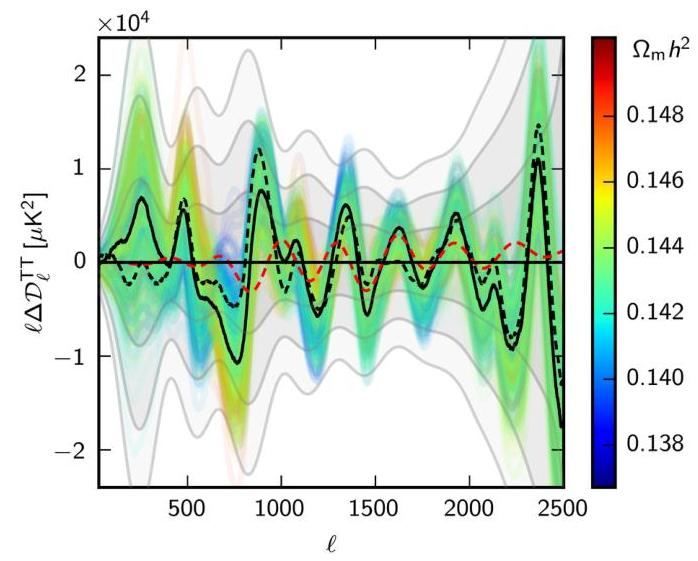

Fig. 24. Base- $\Lambda$ CDM model $\left(A_{\mathrm{L}}=1\right) T T$ power spectrum residuals smoothed with a Gaussian kernel of width $\sigma_{\ell}=40$. The black line shows the smoothed difference between the coadded data points and the theoretical model for the Planck TT+lowE best-fit model, while coloured lines show the residuals for samples over the allowed parameter space coloured by the value of $\Omega_{\mathrm{m}} h^{2}$. Grey bands show the 1,2 , and $3 \sigma$ diagonal range expected for the smoothed residuals in the best-fit model. The red dashed line shows $10 \%$ of the lensing-smoothing difference predicted in the best-fit model, displaying the oscillatory signal expected if there were more lensing of the acoustic peaks. The data residuals are not particularly anomalous, but the residuals have a similar pattern to the lensing smoothing difference over the approximate range $\ell=1100-2000$, giving a preference for around $10 \%$ more lensing at fixed cosmological parameters. Allowed models with lower $\Omega_{\mathrm{m}} h^{2}$ (and hence higher $H_{0}$ ) predict less lensing and give a larger oscillatory residual, preferring relatively more lensing smoothing than models with high matter density. The black dashed line shows the smoothed residual for the Planck TT+lowE best fit to $\Lambda \mathrm{CDM}+A_{\mathrm{L}}$ (with $A_{\mathrm{L}}=1.19$ ).
$A_{\mathrm{L}}>1$; however, both are consistent with $A_{\mathrm{L}}=1$ within $2 \sigma$. The joint combined likelihood shifts the value preferred by the TT data downwards towards $A_{\mathrm{L}}=1$, but the error also shrinks, increasing the significance of $A_{\mathrm{L}}>1$ to $2.8 \sigma$ ( $99.8 \%$ of parameter samples have $A_{\mathrm{L}}>0$, so the one-tailed limit is almost exactly $3 \sigma$ ). Moreover, combining with the lensing likelihood further pulls the constraint towards $A_{\mathrm{L}}=1$, which is then consistent with the data to within $2 \sigma$; we see that the preference for $A_{\mathrm{L}}>1$ is driven by the CMB power spectra alone.

The preference for high $A_{\mathrm{L}}$ is not just a volume effect in the full parameter space (see PCP13 for discussion of such effects in multi-parameter fitting), with the best fit improved by $\Delta \chi_{\text {eff }}^{2}=-8.7$ when adding $A_{\mathrm{L}}$ for $\mathrm{TT}+$ lowE and $\Delta \chi_{\text {eff }}^{2}=-9.7$ for TT,TE,EE+lowE. The bulk of the $\Delta \chi_{\text {eff }}^{2}$ comes from the high- $\ell$ likelihood (mostly in the range $600<\ell<1500$ ); however, the low- $\ell$ temperature commander likelihood fit is also improved if $A_{\mathrm{L}}$ is free, with $\Delta \chi_{\text {eff }}^{2}=-2.3$ and $\Delta \chi_{\text {eff }}^{2}=-1.3$ for the TT+lowE and TT,TE,EE+lowE, respectively, due to the lower amplitude of the $A_{\mathrm{L}}$ fit on large scales. The change in fit to the low- $\ell$ polarization is not very significant $\left(\Delta \chi_{\text {eff }}^{2}=-0.2\right.$ and $\Delta \chi_{\text {eff }}^{2}=-0.4$ ).

The determination of $A_{\mathrm{L}}$ from the high- $\ell$ polarization data and the TT,TE,EE+lowE joint combination depends on the cali-

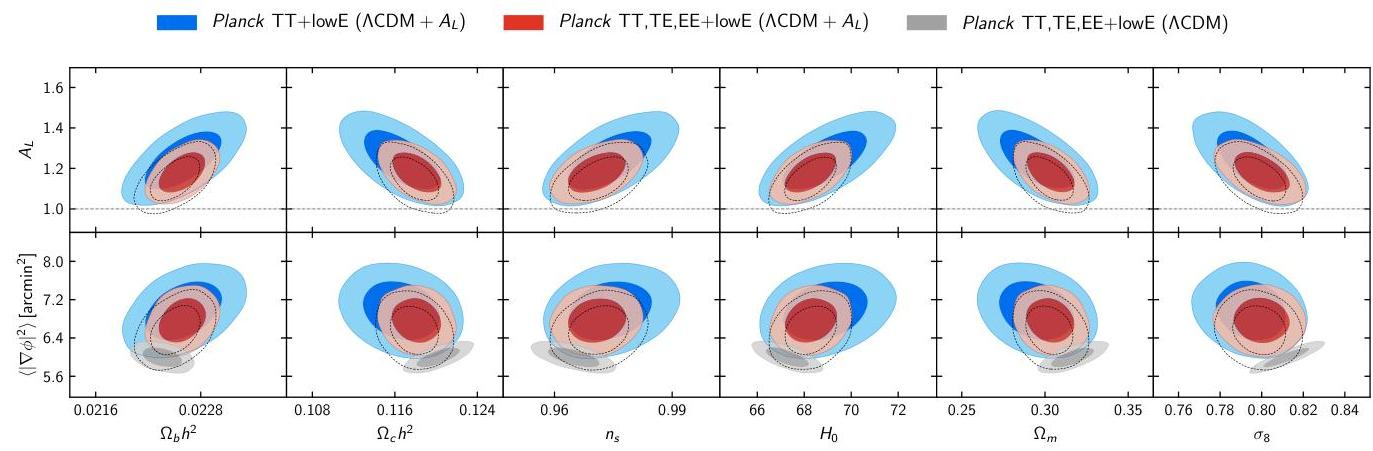

Fig. 25. Marginalized $68 \%$ and $95 \%$ parameter constraint contours when adding $A_{\mathrm{L}}$ as a single-parameter extension to the base$\Lambda$ CDM model, with (red) and without (blue) small-scale polarization, compared to the constraints in the base- $\Lambda$ CDM model (grey). The dashed contours show equivalent results for Planck TT,TE,EE+lowE when using the CamSpec likelihood, which gives results with $A_{\mathrm{L}}$ nearer unity and with slightly larger errors. The second row of subplots show, on the left axis, the predicted lensing deflection angle variance (from lensing multipoles $2 \leq L \leq 2000$ ), which is a measure of the amount of actual lensing: the TT,TE,EE+lowE likelihood prefers about $10 \%$ more actual lensing power (associated with lensing smoothing), but in the (unphysical) varying- $A_{\mathrm{L}}$ case this can be achieved using cosmological parameters that predict less lensing than in $\Lambda$ CDM but substantially larger $A_{\mathrm{L}}$, giving a preference for $A_{\mathrm{L}} \approx 1.2$.
bration of the polarization channels, and is affected by different ways of modelling the polarization efficiencies, as discussed in Sect. 2.2. The results from the CamSpec likelihood (which uses spectrum-based rather than map-based calibrations for $T E$ and $E E$ ) are somewhat shifted with respect to the Plik likelihood, as shown by the dotted lines in Fig. 23, and have larger errors, giving
$A_{\mathrm{L}}=1.246_{-0.100}^{+0.092} \quad(68 \%$, TT+lowE [CamSpec] $), \quad$ (37a)
$A_{\mathrm{L}}=1.149 \pm 0.072(68 \%$, TT,TE,EE+lowE [CamSpec]). (37b)
Using CamSpec there is still a clear preference for $A_{\mathrm{L}}>1$, but the joint result with polarization is now only just over $2 \sigma$ above $A_{\mathrm{L}}=1$. The differences between these Plik and CamSpec results arise from differences in the methodologies used to create the likelihoods. Although both likelihoods clearly show a preference for $A_{\mathrm{L}}>1$, this cannot be claimed to be a robust detection at much over $2 \sigma$ (see also Efstathiou \& Gratton 2019).

The preference for $A_{\mathrm{L}}>1$ within the $\Lambda$ CDM model is a curious feature of the Planck CMB power spectrum data, and has already been discussed extensively in PCP13, PCP15, and Planck Collaboration Int. LI (2017), although it is now slightly more significant. In temperature, over half of the small (approximately 0.02 ) upward shift in $A_{\mathrm{L}}$ compared to 2015 is explained by the lower optical depth from the 2018 low- $\ell$ likelihood: lower $\tau$ implies lower $A_{\mathrm{s}}$ to match the high- $\ell$ CMB fluctuation amplitude, and hence larger $A_{\mathrm{L}}$ to yield a lensing amplitude and hence amount of smoothing at the same level as 2015. In polarization about $40 \%$ of the shift in $A_{\mathrm{L}}$ is explained by changes in $\tau$, with changes in the maps, modelling for beam leakage, and polarization efficiencies explaining the rest.

The high- $\ell$ temperature likelihood preference for more lensing smoothing than allowed by $\Lambda$ CDM can be seen by eye in the smoothed data residuals plotted in Fig. 24; over almost all the allowed $\Lambda$ CDM parameter space there is an oscillatory residual in the range $1100 \leq \ell \leq 2000$ that matches the shape of the lensing smoothing ${ }^{29}$ (although in other multipole ranges it does not

[^0]match at all). The residual is not obviously anomalous, with the TT $\Lambda$ CDM best fit improving by $\Delta \chi^{2} \approx 4$ if a best-fit oscillatory residual (with $A_{\mathrm{L}} \approx 1.1$ ) is added to the best-fit $\Lambda$ CDM theory model. The stronger preference for $A_{\mathrm{L}}>1$ when $A_{\mathrm{L}}$ varies arises because degeneracies between $A_{\mathrm{L}}$, cosmological parameters, and foregrounds improves the fit at both high and lower multipoles, as shown by the black dashed line in Fig. 24. In $\Lambda$ CDM the lensing amplitude can be increased by increasing $\Omega_{m} h^{2}$; however, the model then becomes a bad fit because of the poorer agreement at $\ell<1000$ ). Varying $A_{\mathrm{L}}$ allows a high $A_{\mathrm{L}}$ to remove the oscillatory residual at high multipoles that appears in $\Lambda$ CDM with lower $\Omega_{m} h^{2}$, giving best fits with lower $\Omega_{m} h^{2}$ and higher $H_{0}$ (by $1.5-2.0 \sigma$, depending on the exact combination of data used) that are not favoured in the physical $\Lambda$ CDM model. Lower values of $\Omega_{m} h^{2}$ give higher values of $n_{\mathrm{s}}$, lowering the theory prediction on large scales, so high $A_{\mathrm{L}}$ models are also slightly preferred by the dip in the $\ell<30$ Planck temperature data. The parameter degeneracies are illustrated in Fig. 25.

The $A_{\mathrm{L}}$ results appear to be robust to changes in foreground modelling in the baseline likelihood, with the CamSpec 545 GHz cleaned likelihood (see Appendix A) giving very similar results. However, the dip in the residuals at $1420 \leq \ell \leq 1480$, part of the oscillatory feature that looks like additional lensing, nearly coincides with an approximately $3 \sigma$ discrepancy (for the best-fit foreground cosmology model) between the $143-\mathrm{GHz}$ and 217GHz power spectra at $1450 \leq \ell \leq 1510$, with the $217-\mathrm{GHz}$ spectrum pulling the coadded spectrum low compared to 143 GHz by an amount comparable to the coadded residual (at $\ell=1480$ the 217 -GHz spectrum is $\mathcal{D}_{\ell} \approx 7 \mu \mathrm{~K}^{2}$ lower than 143 GHz with smoothing $\sigma_{\ell}=40$; see PPL18). This may be an indication that the preference for $A_{\mathrm{L}}$ at high multipoles is partly due to unknown systematics or foregrounds. However, tightly cutting the $\ell$ range
decrease the oscillation amplitude in the theory contribution to the spectrum, and hence appear as an oscillatory difference. For example $\Delta n_{\mathrm{s}} \approx-0.02$, combined with an implausibly large change in the foreground model, gives a difference in the predicted spectrum with an oscillatory component that has similar amplitude to $\Delta A_{\mathrm{L}} \approx 0.1$; see the related discussion in Planck Collaboration Int. LI (2017).


[^0]:    ${ }^{29}$ Although the oscillatory pattern looks most similar to lensing at high multipoles, an increase in the foreground model amplitude can

that contributes to the $3 \sigma$ frequency difference does not in itself shift $A_{\mathrm{L}}$ to substantially lower values (though cutting all of $1420 \leq \ell \leq 1480$ does), and the significance of the oscillatory feature in the $\Lambda$ CDM CMB residual is in any case not very high. If it is largely a statistical fluctuation, it would be expected to vary with changes in sky area; that is somewhat the case, with around $80 \%$ sky area giving a substantially less oscillatory residual to the same best-fit $\Lambda$ CDM model at $\ell \leq 1600$, but still favouring high $A_{\mathrm{L}}$. Different power spectrum analyses have also shown the preference for $A_{\mathrm{L}}$ (Spergel et al. 2015; Couchot et al. 2017), though with varying significance, which could indicate that our roughly $3 \sigma$ significance is partly an issue of analysis choices, e.g., the sky areas included and foreground priors chosen.

The dashed line in Fig. 3 shows the lensing power spectrum in the Planck TT,TE,EE+lowE best-fit $\Lambda$ CDM $+A_{\mathrm{L}}$ model, which is clearly inconsistent with the lensing reconstruction, since it lies above almost all of the measured data points. Because the amplitude of the lensing smoothing effect can be calculated from the lensing potential power spectrum alone, which we can also empirically measure, it is impossible to increase the lensing smoothing of the CMB peaks without also increasing the measured lensing reconstruction amplitude. This remains true if the lensing power spectrum is allowed to vary in shape (Motloch \& Hu 2018). The actual lensing smoothing effect can also partly be removed by delensing, as shown by Larsen et al. (2016) and Carron et al. (2017). In PL2018 we update these delensing analyses, and show (using the internal lensing reconstruction, a Planck CIB map as a tracer of the lensing potential, and a combined estimate) that the amount of peak sharpening observed after delensing is consistent with theoretical expectations (e.g., for the $T T$ spectrum, we measure a reduction in lensing smoothing of $0.411 \pm 0.028$, compared to the expected value of 0.375 when using a combination of CIB and Planck lensing reconstruction).

Although the residuals shown in Fig. 24 between the data and the $\Lambda$ CDM best fit temperature spectrum show what looks like an oscillatory lensing residual at high $\ell$, the fit itself is determined by the entire range of multipoles (and the low- $\ell$ polarization than constrains $\tau$ ). The preference for $A_{\mathrm{L}}>1$ could therefore be attributed to other scales when considering the CMB spectra alone. For example, after removing $\ell<30$ in both temperature and polarization, $A_{\mathrm{L}}$ from $T T$ is consistent with unity to within $1 \sigma$. However, in this case the $\Lambda$ CDM lensing amplitudes are still large, giving a value of $\Omega_{\mathrm{m}} \sigma_{\mathrm{m}}^{0.25}$, in $2 \sigma$ tension with the lensing reconstruction. This is another reflection of the tension noted in Sect. 6.1 between the lensing reconstruction and the lensing amplitude predicted using temperature multipoles $\ell \geq 800$ : the two tensions are therefore not independent and largely driven by the same features of the $\Lambda$ CDM fit to the temperature and low- $\ell$ polarization data.

If $A_{\mathrm{L}}>1$ is not just a statistical fluctuation, but comes from new physics changing the theoretical predictions, it could be something that mimics the smoothing effect in the CMB peaks. The lensing smoothing effect comes from averaging over the sky a spectrum that is locally varying (due to magnification and shear locally changing the scale and shape of the CMB peaks). Conceptually, the temperature lensing reconstruction works by looking for this spatial variation in scale and shear of the local power. Any non-lensing isotropic change in the amplitude of the small-scale peaks and troughs, either from new physics or random fluctuations, would therefore only have a small effect on the lensing reconstruction, which is sensitive to scale and shape, not amplitude.

One locally anisotropic physical effect that has been considered as a possible explanation is the presence of largescale compensated isocurvature modes, discussed in detail in Planck Collaboration X (2020). Because the large-scale isocurvature modes locally vary the baryon-to-photon ratio, they can partially mimic the lensing smoothing effect by spatially varying the acoustic scale (Muñoz et al. 2016; Valiviita 2017). However, because they have a similar local effect to lensing, they also affect the large-scale lensing reconstruction (Smith et al. 2017). Combining with the Planck 2018 lensing reconstruction, which now extends down to $L=8$, as shown in Planck Collaboration X (2020) this model therefore does not offer a significant improvement in overall fit $\left(\Delta \chi_{\text {eff }}^{2}=-3.3\right.$ with Planck TT,TE,EE+lowE+lensing).

If the $A_{\mathrm{L}}>1$ preference is simply a statistical excursion (perhaps the most likely explanation), this indicates that there are random features in the spectrum that are pulling some parameters unusually far from expected values. ${ }^{30}$ There are several theoretical models that can fit the CMB power spectra and also predict larger lensing amplitudes. These include $\Lambda$ CDM models with spatial curvature, for which we find $\Omega_{K}<0$ at over $3 \sigma$ (Sect. 7.3) from the CMB power spectra, and some dark energy and modified gravity models (Sect. 7.4). For extensions to base- $\Lambda$ CDM, parameters that decrease the lensing amplitude are more constrained by the Planck power spectra than might otherwise be expected; for example, higher neutrino masses lower the predicted lensing power compared to base $\Lambda$ CDM, leading to surprisingly tight constraints (Sect. 7.5.1). Adding the lensingreconstruction information significantly reduces the parameter space of larger lensing amplitudes and partially mitigates these effects. However, the statistical power of the Planck power spectra is sufficiently high that the joint constraints prefer lensing amplitudes in the higher range allowed by the lensing data.

Even within $\Lambda$ CDM, the fact that the data prefer more lensing leads to a preference for higher fluctuation amplitudes, hence the high- $\ell$ data yield higher $A_{\mathrm{s}}$ and higher $\tau$ than we infer in combination with large-scale $E$-mode polarization (Sect. 2.2.3) or lensing reconstruction. Since these preferences are degenerate with $\Omega_{\mathrm{m}} h^{2}, n_{\mathrm{s}}$, and $H_{0}$ (see PCP13, PCP15), these parameters are also pulled ( $\Omega_{\mathrm{m}} h^{2}$ higher, $n_{\mathrm{s}}$ and $H_{0}$ lower). Our baseline best-fit results include both the "lowE" data and the lensing reconstruction, each of which restrict the range of allowed variation, so the remaining pulls should be modest; however, it should not perhaps be too much of a surprise if the central values of the parameters inferred from Planck turn out to be slightly more shifted than typical with respect to the ultimate truth if the base- $\Lambda$ CDM model is correct.

## 7. Extensions to the base- $\Lambda$ CDM model

### 7.1. Grid of extended models

We have studied a range of extension to the base $\Lambda$ CDM model. A full grid of results from standard parameter extensions is available online through the PLA. ${ }^{31}$ Figure 26 and Table 4 summarize

[^0]
[^0]:    ${ }^{30}$ It is not trivial to assess how unlikely a fluctuation in a consistency parameter like this is given the number of different cosmological and consistency test parameters we might have looked at. We are only discussing $A_{\mathrm{L}}$ in detail here because it comes out high; other consistency parameters, for example the relative amplitude of ISW, Doppler, and Sachs-Wolfe contributions to the temperature spectrum, come out perfectly consistent with expectations.
    ${ }^{31}$ Chains are available at https://pla.esac.esa.int, with description and parameter tables in Planck Collaboration ES (2018).

the constraints on 1-parameter extensions to the base- $\Lambda$ CDM model. As in 2013 and 2015 we find no strong evidence in favour of any of these extensions, using either the Planck data alone or Planck combined with BAO. We also find that constraints on the base- $\Lambda$ CDM parameters are remarkably robust to a variety of possible extensions to the $\Lambda$ CDM model, as shown in Table 5: many of these parameters are constrained to high precision in a nearly model-independent way.

We now discuss some specific extensions in more detail.

### 7.2. Early Universe

CMB observations probe the state of the universe at the earliest time that is directly observable with the electromagnetic spectrum. The physics of the anisotropies is well understood, and can be predicted accurately with linear theory given a set of initial conditions. Planck observations can therefore be used to give powerful constraints on the initial conditions, i.e., the perturbations present at the start of the hot big bang. We discuss in turn constraints on the scalar and tensor perturbations, allowing for deviations from a purely power-law scalar spectrum, and discuss the interpretation within the context of the most popular inflationary models.

### 7.2.1. Primordial scalar power spectrum

The Planck data are consistent with purely adiabatic primordial scalar curvature perturbations, with no evidence for isocurvature modes (see Planck Collaboration X 2020), as predicted by the simplest single-field inflation models. The primordial power spectrum is then just a function of scale. In this section, we characterize the scalar fluctuation spectrum in terms of a spectral index $n_{\mathrm{s}}$ and its first two derivatives with respect to $\ln k$ (the "running" and "running of the running" of the spectral index):

$$
\begin{aligned}
& \mathcal{P}_{\mathcal{R}}(k)=A_{\mathrm{s}}\left(\frac{k}{k_{0}}\right)^{n(k)} \\
& n(k)=n_{\mathrm{s}}-1+(1 / 2)\left(d n_{\mathrm{s}} / d \ln k\right) \ln \left(k / k_{0}\right) \\
&+(1 / 6)\left(d^{2} n_{\mathrm{s}} / d \ln k^{2}\right)\left(\ln \left(k / k_{0}\right)\right)^{2}
\end{aligned}
$$

In the absence of any running of the spectral index, our constraint on $n_{\mathrm{s}}$ for the base- $\Lambda$ CDM model (Eq. 21) shows an $8 \sigma$ tilt away from scale invariance. Adding BAO tightens the constraint to nearly $9 \sigma$ :

$$
n_{\mathrm{s}}=0.9665 \pm 0.0038 \quad \begin{aligned}
& (68 \%, \text { TT,TE,EE+lowE+lensing } \\
& +\mathrm{BAO})
\end{aligned}
$$

The need for a red-tilted scalar spectrum is quite robust to extensions to base $\Lambda$ CDM, as summarized in Table 5. In all cases, we find $n_{\mathrm{s}}<1$ at $\geq 3 \sigma$.

Adding running of the spectral index, $d n_{\mathrm{s}} / d \ln k$, as a single additional parameter to base $\Lambda$ CDM, we find

$$
\left.\begin{array}{rl}
d n_{\mathrm{s}} / d \ln k & =-0.0045 \pm 0.0067 \\
n_{\mathrm{s}} & =0.9641 \pm 0.0044 \\
n_{\mathrm{s}, 0.002} & =0.979 \pm 0.021
\end{array}\right\} \begin{aligned}
& 68 \%, \text { TT,TE,EE } \\
& \text { +lowE+lensing }
\end{aligned}
$$

$$
\left.\begin{array}{rl}
d n_{\mathrm{s}} / d \ln k & =-0.0041 \pm 0.0067 \\
n_{\mathrm{s}} & =0.9659 \pm 0.0040 \\
n_{\mathrm{s}, 0.002} & =0.979 \pm 0.021
\end{array}\right\} \begin{aligned}
& 68 \%, \text { TT,TE,EE } \\
& + \text { lowE+lensing } \\
& +\mathrm{BAO}
\end{aligned}
$$

where $n_{\mathrm{s}}$ is defined by default at $k=0.05 \mathrm{Mpc}^{-1}$ and $n_{\mathrm{s}, 0.002}$ is the corresponding tilt at $k=0.002 \mathrm{Mpc}^{-1}$. The slight preference for negative running is driven by the mild tension between the CMB temperature power spectrum at high and low multipoles discussed in Sect. 6.1, with negative running allowing higher large-scale tilt, giving less power on large scales (see Fig. 27 and the extensive discussions in PCP13 and PCP15). The measurements of the tilt and running around the pivot scale of $k \simeq 0.05 \mathrm{Mpc}^{-1}$ are robust to allowing even more freedom for the spectrum to vary with scale. For example, allowing for running of the running we find

$$
\begin{aligned}
d^{2} n_{\mathrm{s}} / d \ln k^{2} & =0.009 \pm 0.012 \\
d n_{\mathrm{s}} / d \ln k & =0.0011 \pm 0.0099 \\
n_{\mathrm{s}} & =0.9647 \pm 0.0043
\end{aligned}
$$

Here the slight preference for negative running has almost disappeared, and there is instead a slight preference for lower largescale power by having positive running of the running, leaving a near power-law solution on small scales. There is no evidence for any significant deviation from a power law on small scales. This is consistent with the simplest slow-roll inflation models where the running (and higher derivatives of the spectral index) are higher order in slow-roll (so that $d n_{\mathrm{s}} / d \ln k=\mathcal{O}\left(\left|n_{\mathrm{s}}-1\right|^{2}\right)$, $\left.d^{2} n_{\mathrm{s}} / d \ln k^{2}=\mathcal{O}\left(\left|n_{\mathrm{s}}-1\right|^{3}\right)$ ) and all deviations from a constant spectral index can be neglected at Planck sensitivity.

An analysis of more general parameterizations of the primordial power spectrum are presented in section 6 of Planck Collaboration X (2020), including various specific physically motivated models, as well as general parametric reconstructions. Models with many more free parameters can provide better fits to the data, but none are favoured; in all cases the small-scale spectrum is found to be consistent with a power law over the range $0.008 \mathrm{Mpc}^{-1} \leq k \leq 0.1 \mathrm{Mpc}^{-1}$, with lowsignificance hints of larger-scale features corresponding to the dip in the low- $\ell$ temperature power spectrum. The introduction of the additional degrees of freedom in the initial power spectrum had no significant impact on the determination of the main cosmological parameters for the parameterizations considered.

### 7.2.2. Tensor modes

Primordial gravitational waves ${ }^{32}$, or tensor modes, source a distinctive curl-like (" $B$-mode") pattern in the CMB polarization and add additional power to the large-scale temperature power spectrum (Kamionkowski et al. 1997; Seljak \& Zaldarriaga 1997). Planck's $B$-mode measurement is noise and systematics limited and provides a relative weak constraint on the tensor-to-scalar ratio $r_{0.002}<0.41$ ( $95 \%$ CL, Planck Collaboration V 2020). As with the 2013 and 2015 releases, the strongest constraint on tensor modes from the Planck data alone comes from the $T T$ spectrum at $\ell \leq 100$.

The precision of the Planck temperature constraint remains limited by cosmic variance from the scalar component and is model dependent. The tightest and least model-dependent constraints on the tensor amplitude come from the Ade et al. (2018, BK15) analysis of the BICEP2/Keck field, in combination with Planck and WMAP maps to remove polarized Galactic dust emission. The BK15 observations measure the $B$-mode polarization power spectrum in nine bins at $\ell \leq 300$, with the tensor amplitude information coming mainly from scales $\ell \simeq 100$,

[^0]
[^0]:    ${ }^{32}$ The polarization anisotropies generated by gravitational waves was discussed first by Polnarev (1985).

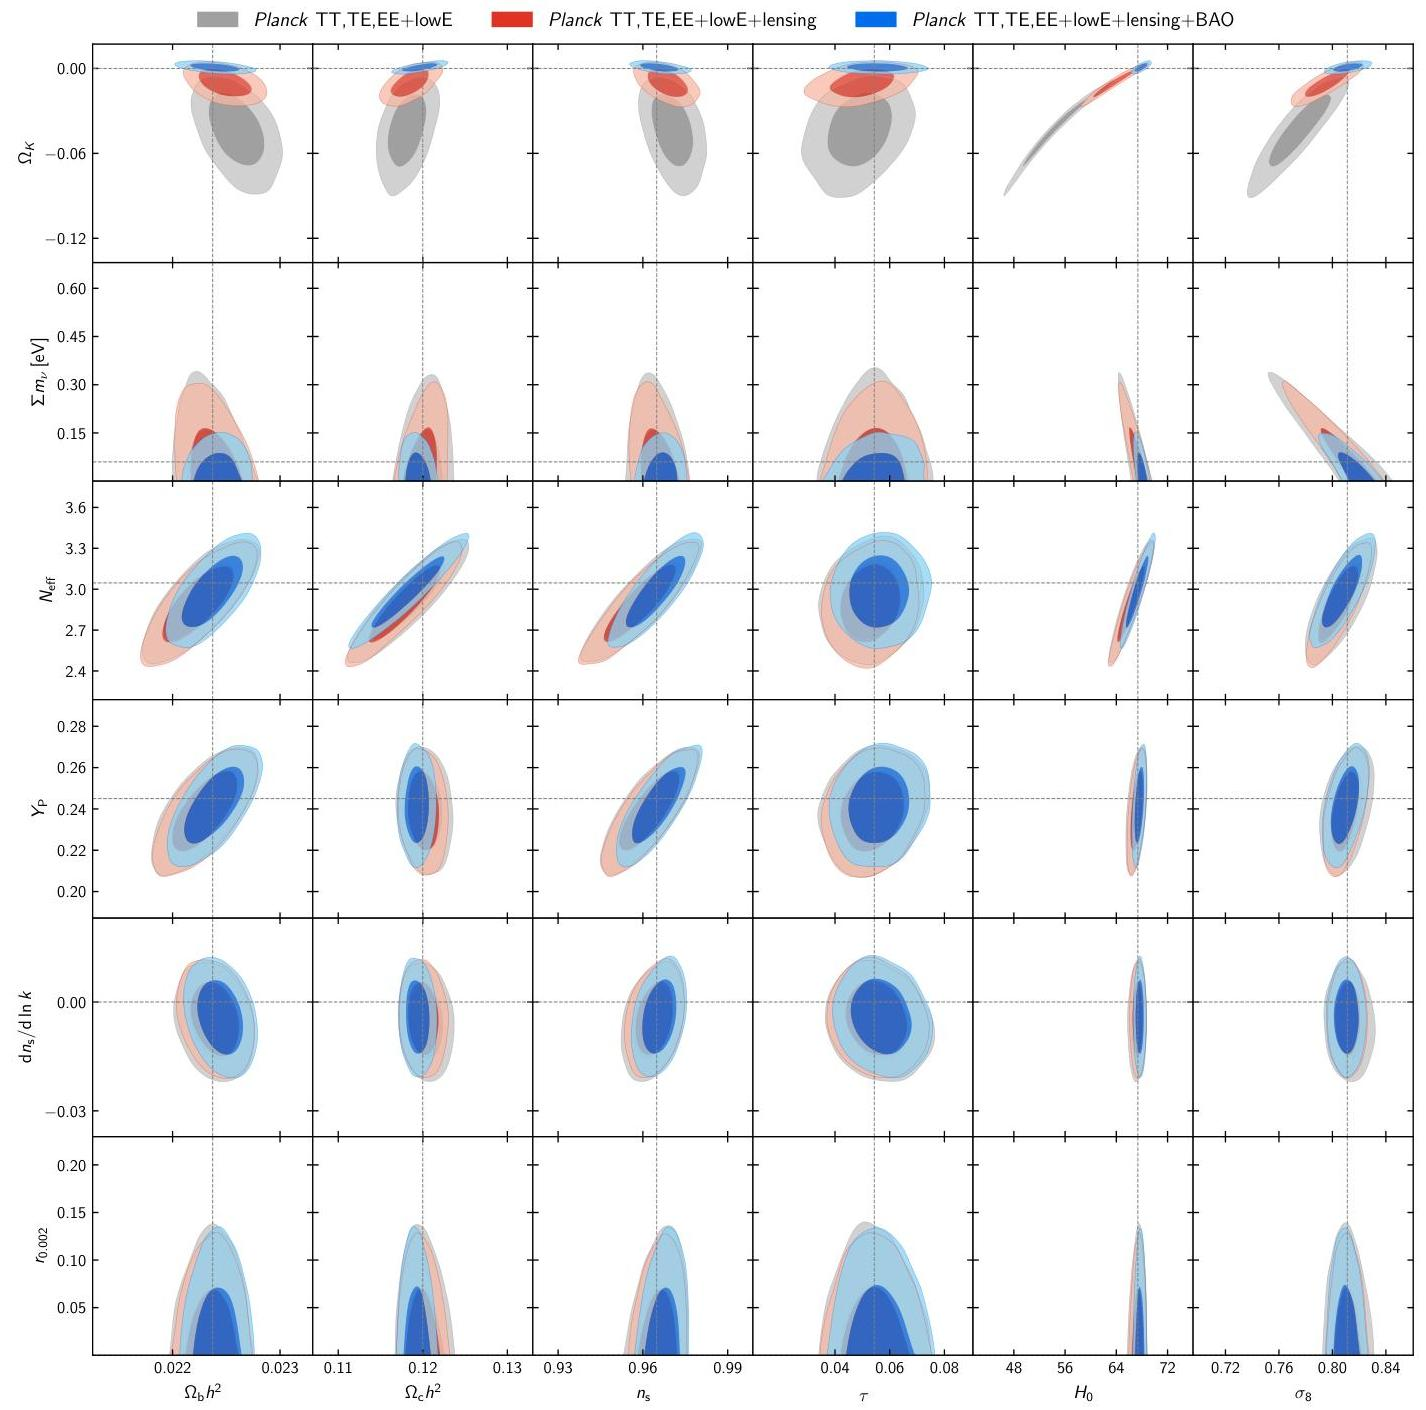

Fig. 26. Constraints on 1-parameter extensions to the base- $\Lambda$ CDM model. Contours show $68 \%$ and $95 \%$ confidence regions for Planck TT,TE,EE+lowE (grey), Planck TT,TE,EE+lowE+lensing (red), and Planck TT,TE,EE+lowE+lensing+BAO (blue). Horizontal dashed lines correspond to the parameter values assumed in the base- $\Lambda$ CDM cosmology, while vertical dashed lines show the mean posterior values in the base model for Planck TT,TE,EE+lowE+lensing.
where the $B$-mode spectrum from scattering at recombination is expected to peak. The Planck CMB power spectrum measurements use a much larger sky area, and are useful to convert this measurement into a constraint on the tensor-to-scalar ratio $r$ at a given scale with little additional cosmic variance error. To relate the tensor measurement to constraints on specific inflation models (which usually predict a region in the $n_{\mathrm{s}}-r$ plane), combining with the Planck data is also essential, although model dependent.

Figure 28 shows the constraints in the $n_{\mathrm{s}}-r$ plane, with $r$ added as a single additional parameter to the base model and plotted at pivot scale $0.002 \mathrm{Mpc}^{-1}$. We assume the tensor-mode
spectrum is close to scale invariant, with spectral index given by the inflation consistency relation to second order in slow-roll parameters. Planck alone gives
$r_{0.002}<0.10, \quad(95 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE}+\text { lensing }), \quad$
with $n_{\mathrm{s}}=0.9659 \pm 0.0041$ at $1 \sigma$. Adding BK15 to directly measure the tensor amplitude significantly tightens the $r$ constraint,

Table 4. Constraints on 1-parameter extensions to the base- $\Lambda$ CDM model for combinations of Planck power spectra, Planck lensing, and BAO (equivalent results using the CamSpec likelihood are given in Table A.2). Note that we quote $95 \%$ limits here.

| Parameter | TT+lowE | TT, TE, EE+lowE | TT, TE, EE+lowE+lensing | TT, TE, EE+lowE+lensing+BAO |
| :--: | :--: | :--: | :--: | :--: |
| $\begin{aligned} & \Omega_{K} \ldots \ldots \ldots \ldots \ldots \\ & \Sigma m_{n} \ll \mathrm{~m}_{0.050} \\ & <0.537 \end{aligned}$ | $\begin{gathered} -0.050{ }_{0.050}^{-0.044} \\ <0.537 \\ 3.00^{-0.57} \end{gathered}$ | $\begin{gathered} -0.044{ }_{0.044}^{-0.032} \\ <0.257 \\ 2.92^{-0.56} \end{gathered}$ | $\begin{gathered} -0.011{ }_{0.012}^{-0.013} \\ <0.241 \\ 2.89^{-0.36} \end{gathered}$ | $\begin{gathered} 0.0007{ }_{0.0007}^{-0.0007} \\ <0.120 \end{gathered}$ |
| $Y_{\mathrm{P}} \ldots \ldots \ldots \ldots \ldots$ | $0.246{ }_{0.246}^{-0.039}$ | $0.240{ }_{0.245}^{-0.024}$ | $0.239{ }_{0.238}^{-0.024}$ | $0.242{ }_{0.242}^{-0.024}$ |
| $\mathrm{d} n_{\mathrm{s}} / \mathrm{d} \ln k$ | $\begin{gathered} -0.004{ }_{0.003}^{-0.013} \\ <0.002 \end{gathered}$ | $\begin{gathered} -0.006{ }_{0.005}^{-0.013} \\ <0.003 \end{gathered}$ | $\begin{gathered} -0.005{ }_{0.005}^{-0.013} \\ <0.003 \end{gathered}$ | $\begin{gathered} -0.004{ }_{0.003}^{-0.013} \\ <0.002 \end{gathered}$ |
| $r_{0.002} \ldots \ldots \ldots \ldots$ | $<0.102$ | $<0.107$ | $<0.101$ | $<0.106$ |
| $w_{0} \ldots \ldots \ldots \ldots$ | $-1.56{ }_{-0.48}^{+0.60}$ | $-1.58{ }_{-0.41}^{+0.52}$ | $-1.57{ }_{-0.40}^{+0.59}$ | $-1.04{ }_{-0.10}^{+0.10}$ |

Table 5. Constraints on standard cosmological parameters from Planck TT,TE,EE+lowE+lensing when the base- $\Lambda$ CDM model is extended by varying additional parameters. The constraint on $\tau$ is also stable but not shown for brevity; however, we include $H_{0}$ (in $\mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ ) as a derived parameter (which is very poorly constrained from Planck alone in the $\Lambda$ CDM $+w_{0}$ extension). Here $\alpha_{-1}$ is a matter isocurvature amplitude parameter, following PCP15. All limits are $68 \%$ in this table. The results assume standard BBN except when varying $Y_{\mathrm{P}}$ independently (which requires non-standard BBN). Varying $A_{\mathrm{L}}$ is not a physical model (see Sect. 6.2).

| Parameter(s) | $\Omega_{\mathrm{b}} b^{2}$ | $\Omega_{\mathrm{c}} b^{2}$ | $100 \delta_{\mathrm{MC}}$ | $H_{0}$ | $n_{\mathrm{s}}$ | $\ln \left(10^{10} A_{\mathrm{L}}\right)$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Base $\Lambda$ CDM | 0.02237 $\pm 0.00015$ | 0.1200 $\pm 0.0012$ | $1.04092 \pm 0.00031$ | $67.36 \pm 0.54$ | $0.9649 \pm 0.0042$ | $3.044 \pm 0.014$ |
| $r$ | 0.02237 $\pm 0.00014$ | 0.1199 $\pm 0.0012$ | $1.04092 \pm 0.00031$ | $67.40 \pm 0.54$ | $0.9659 \pm 0.0041$ | $3.044 \pm 0.014$ |
| $\mathrm{d} n_{\mathrm{s}} / \mathrm{d} \ln k$ | $0.02240 \pm 0.00015$ | $0.1200 \pm 0.0012$ | $1.04092 \pm 0.00031$ | $67.36 \pm 0.53$ | $0.9641 \pm 0.0044$ | $3.047 \pm 0.015$ |
| $\mathrm{d} n_{\mathrm{s}} / \mathrm{d} \ln k, r$ | $0.02243 \pm 0.00015$ | $0.1199 \pm 0.0012$ | $1.04093 \pm 0.00030$ | $67.44 \pm 0.54$ | $0.9647 \pm 0.0044$ | $3.049 \pm 0.015$ |
| $\mathrm{d}^{2} n_{\mathrm{s}} / \mathrm{d} \ln k^{2}, \mathrm{~d} n_{\mathrm{s}} / \mathrm{d} \ln k$ | $0.02237 \pm 0.00016$ | $0.1202 \pm 0.0012$ | $1.04090 \pm 0.00030$ | $67.28 \pm 0.56$ | $0.9625 \pm 0.0048$ | $3.049 \pm 0.015$ |
| $N_{\text {eff }}$ | $0.02224 \pm 0.00022$ | $0.1179 \pm 0.0028$ | $1.04116 \pm 0.00043$ | $66.3 \pm 1.4$ | $0.9589 \pm 0.0084$ | $3.036 \pm 0.017$ |
| $N_{\text {eff }}, \mathrm{d} n_{\mathrm{s}} / \mathrm{d} \ln k$ | $0.02216 \pm 0.00022$ | $0.1157 \pm 0.0032$ | $1.04144 \pm 0.00048$ | $65.2 \pm 1.6$ | $0.950 \pm 0.011$ | $3.034 \pm 0.017$ |
| $\Sigma m_{v}$ | $0.02236 \pm 0.00015$ | $0.1201 \pm 0.0013$ | $1.04088 \pm 0.00032$ | $67.1_{-0.67}^{+1.2}$ | $0.9647 \pm 0.0043$ | $3.046 \pm 0.015$ |
| $\Sigma m_{v}, N_{\text {eff }}$ | $0.02221 \pm 0.00022$ | $0.1179_{-0.0020}^{-0.0027}$ | $1.04116 \pm 0.00044$ | $65.9_{-1.8}^{+1.8}$ | $0.9582 \pm 0.0086$ | $3.037 \pm 0.017$ |
| $m_{\text {eff }}^{\text {eff }}$ | $0.02242_{-0.00016}^{-0.00014}$ | $0.1200_{-0.00020}^{-0.0012}$ | $1.04074_{-0.00028}^{-0.00021}$ | $67.11_{-0.79}^{-0.83}$ | $0.9652_{-0.0026}^{+0.0025}$ | $3.050_{-0.016}^{+0.014}$ |
| $\alpha_{-1}$ | $0.02238 \pm 0.00015$ | $0.1201 \pm 0.0015$ | $1.04087 \pm 0.00043$ | $67.30 \pm 0.67$ | $0.9645 \pm 0.0061$ | $3.045 \pm 0.014$ |
| $w_{0}$ | $0.02243 \pm 0.00015$ | $0.1193 \pm 0.0012$ | $1.04099 \pm 0.00031$ |  | $0.9666 \pm 0.0041$ | $3.038 \pm 0.014$ |
| $\Omega_{K}$ | $0.02249 \pm 0.00016$ | $0.1185 \pm 0.0015$ | $1.04107 \pm 0.00032$ | $63.6_{-2.1}^{+2.1}$ | $0.9688 \pm 0.0047$ | $3.030_{-0.035}^{+0.035}$ |
| $Y_{\mathrm{P}} \ldots \ldots \ldots \ldots$ | $0.02230 \pm 0.00020$ | $0.1201 \pm 0.0012$ | $1.04067 \pm 0.00055$ | $67.19 \pm 0.63$ | $0.9621 \pm 0.0070$ | $3.042 \pm 0.016$ |
| $Y_{\mathrm{P}}, N_{\text {eff }} \ldots \ldots \ldots$ | $0.02224 \pm 0.00022$ | $0.1171_{-0.0009}^{-0.0009}$ | $1.0415 \pm 0.0012$ | $66.0_{-1.7}^{+1.7}$ | $0.9589 \pm 0.0085$ | $3.036 \pm 0.018$ |
| $A_{\mathrm{L}}$ | $0.02251 \pm 0.00017$ | $0.1182 \pm 0.0015$ | $1.04110 \pm 0.00032$ | $68.16 \pm 0.70$ | $0.9696 \pm 0.0048$ | $3.029_{-0.016}^{+0.018}$ |

and adding BAO data tightens (slightly) the $n_{\mathrm{s}}$ constraint. Using the Planck temperature likelihoods we find
$r_{0.002}<0.055 \quad(95 \%, \mathrm{TT}+\mathrm{lowE}+\text { lensing }+\mathrm{BK} 15+\mathrm{BAO})$,
with $n_{\mathrm{s}}=0.9661 \pm 0.0040$ at $1 \sigma$, or adding polarization
$r_{0.002}<0.058 \quad$ (95\%, TT,TE,EE+lowE+lensing
$+\mathrm{BK} 15+\mathrm{BAO})$,
with $n_{\mathrm{s}}=0.9668 \pm 0.0037$ at $1 \sigma$. However, the small change when adding polarization is not stable to the choice of polarization likelihood; when using the CamSpec TT,TE,EE+lowE likelihood in place of Plik, we find the weaker constraint $r_{0.002}<$ 0.065 for the same data combination as that used in Eq. (44).

All the combined $n_{\mathrm{s}}-r$ contours exclude convex potentials at about the $95 \%$ confidence (marginally less if we use the CamSpec likelihood, see Fig. 28), which substantially restricts the range of allowed inflation models and disfavours all simple integer power law potentials. More generally, since $r$ depends
on the slope of the potential, the smallness of the empirical upper limit on $r$ implies that the inflationary potential must have been nearly flat when modes exited the horizon. The measured $n_{\mathrm{s}}$ must then be determined largely by the second derivative of the potential, suggesting a hierarchy in the magnitudes of the slow-roll parameters, favouring hilltop-like potentials. For a detailed discussion of the implications for specific inflation models see Planck Collaboration $\mathcal{X}$ (2020).

If we allow running of the spectral index in addition to tensor modes, the constraint on $r_{0.002}$ weakens if we use only the Planck likelihood; a negative running allows $n_{\mathrm{s}}$ at large scales to shift to higher values, lowering the large-scale scalar amplitude, and hence allowing a larger tensor contribution. Inclusion of the BK15 likelihood significantly reduces the extent of this degeneracy by constraining the tensor amplitude more directly, giving

$$
\left.\begin{array}{c}
r_{0.002}<0.16, \\
d n_{\mathrm{s}} / d \ln k=-0.008_{-0.015}^{+0.014}
\end{array}\right\} \begin{aligned}
& 95 \%, \text { TT,TE,EE+lowE } \\
& + \text { lensing }
\end{aligned}
$$

$d n_{\mathrm{s}} / d \ln k=-0.008_{-0.015}^{+0.014} \quad+$ lensing,

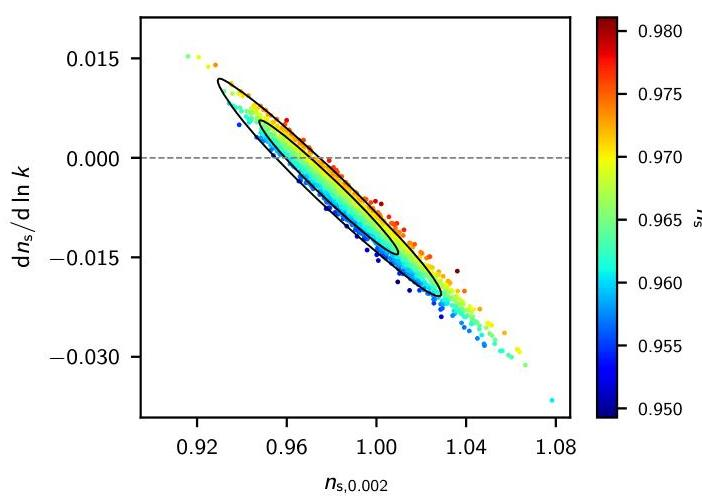

Fig. 27. Constraints on the running of the scalar spectral index in the $\Lambda$ CDM model, using Planck TT,TE,EE+lowE+lensing when marginalizing over $r$ (samples, coloured by the spectral index at $k=0.05 \mathrm{Mpc}^{-1}$ ), and the equivalent result when $r=0$ (black contours). The Planck data are consistent with zero running, but also allow for significant negative running, which gives a positive tilt $n_{\mathrm{s}, 0.002}$, and hence less power, on large scales $\left(k \approx 0.002 \mathrm{Mpc}^{-1}\right)$.

The combination of Planck and BK15 robustly constrain the tensor ratio to be small, with $r_{0.002} \leq 0.06$. The implications for inflation are slightly more model dependent as a result of degeneracies between $n_{\mathrm{s}}$ and additional parameters in extended $\Lambda$ CDM models. However, as shown in Table 5, the extensions of $\Lambda$ CDM that we consider in this paper cannot substantially shift the value of the spectral index when the tensor amplitude is small, so the overall conclusions are unlikely to change substantially in extended models.

### 7.3. Spatial curvature

The base- $\Lambda$ CDM model assumes that the spatial hypersurfaces are flat, such as would be predicted (to within measurable precision) by the simplest inflationary models. This is a prediction that can be tested to high accuracy by the combination of CMB and BAO data (the CMB alone suffers from a geometric degeneracy, which is weakly broken with the addition of CMB lensing). This is illustrated in Fig. 29.

The combination of the Planck temperature and polarization power spectra give
$\Omega_{K}=-0.056_{-0.018}^{+0.028} \quad(68 \%$, Planck TT+lowE),
$\Omega_{K}=-0.044_{-0.015}^{+0.018} \quad(68 \%$, Planck TT,TE,EE+lowE),
an apparent detection of curvature at well over $2 \sigma$. The $99 \%$ probability region for the TT,TE,EE+lowE result is $-0.095<$ $\Omega_{K}<-0.007$, with only about $1 / 10000$ samples at $\Omega_{K} \geq 0$. This
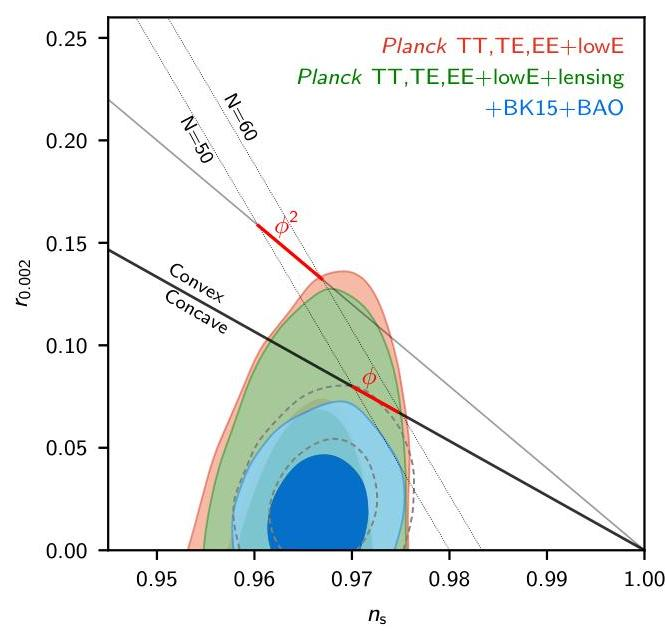

Fig. 28. Constraints on the tensor-to-scalar ratio $r_{0.002}$ in the $\Lambda$ CDM model, using Planck TT,TE,EE+lowE and Planck TT,TE,EE+lowE+lensing (red and green, respectively), and joint constraints with BAO and BICEP2/Keck (blue, including Planck polarization to determine the foreground components, Ade et al. 2018). This assumes the inflationary consistency relation and negligible running. Dashed grey contours show the joint constraint when using CamSpec instead of Plik as the high- $\ell$ Planck likelihood, indicating the level of modelling uncertainty in the polarization results. Dotted lines show the loci of approximately constant $e$-folding number $N$, assuming simple $V \propto\left(\phi / m_{\mathrm{Pl}}\right)^{p}$ single-field inflation. Solid lines show the approximate $n_{\mathrm{s}}-r$ relation for locally quadratic and linear potentials to first order in slow roll; red lines show the approximate allowed range assuming $50<N<60$ and a power-law potential for the duration of inflation. The solid black line (corresponding to a linear potential) separates concave and convex potentials.
is not entirely a volume effect, since the best-fit $\chi^{2}$ changes by $\Delta \chi_{\text {eff }}^{2}=-11$ compared to base $\Lambda$ CDM when adding the one additional curvature parameter. The reasons for the pull towards negative values of $\Omega_{K}$ are discussed at length in PCP15 and Sect. 6.2. They are essentially the same as those that lead to the preference for $A_{\mathrm{L}}>1$, although slightly exacerbated in the case of curvature, since the low multipoles also fit the low- $\ell$ temperature likelihood slightly better if $\Omega_{K}<0$. As with the $A_{\mathrm{L}}>1$ preference, the joint Planck polarization result is not robust at the approximately $0.5 \sigma$ level to modelling of the polarization likelihoods, with the CamSpec TT,TE,EE+lowE likelihood giving $\Omega_{K}=-0.037_{-0.014}^{+0.019}$.

Closed models predict substantially higher lensing amplitudes than in $\Lambda$ CDM, so combining with the lensing reconstruction (which is consistent with a flat model) pulls parameters back into consistency with a spatially flat universe to well within $2 \sigma$ :

$$
\Omega_{K}=-0.0106 \pm 0.0065 \quad(68 \% \text {, TT,TE,EE+lowE }
$$

+lensing).

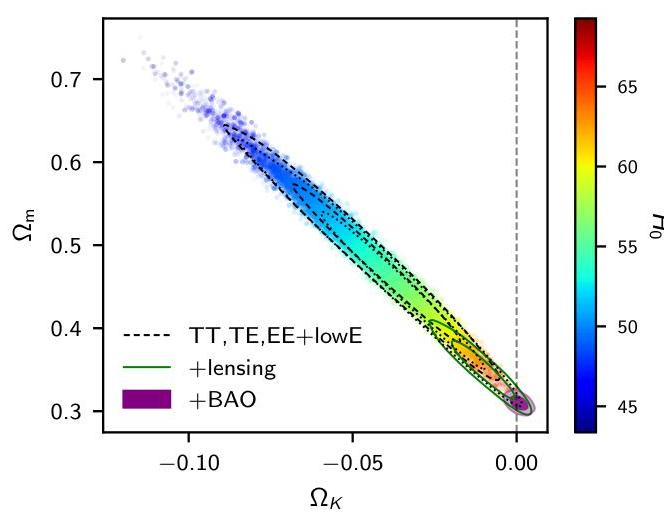

Fig. 29. Constraints on a non-flat universe as a minimal extension to the base- $\Lambda$ CDM model. Points show samples from the Planck TT,TE,EE+lowE chains coloured by the value of the Hubble parameter and with transparency proportional to the sample weight. Dashed lines show the corresponding $68 \%$ and $95 \%$ confidence contours that close away from the flat model (vertical line), while dotted lines are the equivalent contours from the alternative CamSpec likelihood. The solid dashed line shows the constraint from adding Planck lensing, which pulls the result back towards consistency with flat (within $2 \sigma$ ). The filled contour shows the result of also adding BAO data, which makes the full joint constraint very consistent with a flat universe.

The constraint can be further sharpened by combining the Planck data with BAO data; this convincingly breaks the geometric degeneracy to give

$$
\Omega_{K}=0.0007 \pm 0.0019 \quad \begin{aligned}
& (68 \%, \text { TT,TE,EE+lowE } \\
& \text { +lensing+BAO). }
\end{aligned}
$$

The joint results suggests our Universe is spatially flat to a $1 \sigma$ accuracy of $0.2 \%$.

### 7.4. Dark energy and modified gravity

The late-time accelerated expansion of the Universe (Riess et al. 1998; Perlmutter et al. 1999) is still considered one of the most mysterious aspects of the standard cosmology. In the base $\Lambda$ CDM model the acceleration is driven by a cosmological constant, added into the Einstein equations of General Relativity (GR, Einstein 1917). Although $\Lambda$ CDM fits the data well, $\Lambda$ is a phenomenological parameter without an underlying theoretical basis to explain its value (though see Weinberg 1987). In addition, the empirically required value of $\Lambda$ marks our epoch as a special time in the evolution of the Universe. Attempts have therefore been made to find a dynamical mechanism that leads to cosmic acceleration, with evolving background energy densities close to $\Lambda$ CDM. Such dynamics is usually associated with a fluid (a scalar field) which we refer to as "dark energy" (DE), or with modifications of GR, which we refer to as "modified gravity" (MG).

A detailed analysis of the impact of Planck data on dark energy and modified gravity was presented in a dedicated paper that accompanied the 2015 Planck release,
(Planck Collaboration XIV 2016, hereafter PDE15). We refer the reader to this paper for a review of different cosmological models, and for constraints from Planck on its own and in combination with galaxy weak lensing (WL) and redshift-space distortions (RSDs). In PDE15 it was shown that although the base$\Lambda$ CDM model fits Planck data, there were some tensions (at levels as high as $3 \sigma$ ) when Planck was combined with RSD and WL data, even when conservative cuts were applied to exclude nonlinear scales. However, the addition of Planck lensing data was found to reduce these tensions. Updated constraints on a few specific models, using more recent WL data, are presented in DES Collaboration (2018b).

In this paper, we follow a similar methodology to PDE15, distinguishing between models that directly affect only the background (and impact perturbations predominantly through changes in the expansion rate) and those that directly affect perturbations. However, we restrict the analysis to a smaller range of models here. As in the rest of this paper, we show results for the baseline Planck TT,TE,EE+lowE+lensing data set and for combinations with other relevant data sets. Such external data are particularly useful for constraining DE and MG models because the largest deviations from $\Lambda$ CDM are usually at late times, which are not well constrained by the CMB powerspectra and CMB lensing. However, CMB lensing provides important information that mitigates the preference for $A_{\mathrm{L}}>1$ seen in the Planck temperature power spectra (Sect. 6.2), so we explicitly comment on the impact of CMB lensing wherever relevant. We recall here that the lensing likelihood assumes a fiducial $\Lambda$ CDM model, but linear corrections to the fiducial mode are accounted for self-consistently. PL2018 explicitly tested that this procedure is unbiased, even when the lensing spectrum differs from the fiducial spectrum by as much as $20 \%$ (which is much larger than differences allowed by the CMB lensing data).

We consider the following external data sets:

- SNe + BAO (see Sects. 5.1, 5.2, and 5.4 for discussions of the data sets and comments on why we do not combine Planck data with direct measurements of $H_{0}$ );
- RSDs (as described in Sect. 5.3), where we specifically use BOSS-DR12 data from Alam et al. (2017), adopting the $f \sigma_{\mathrm{E}}-H-D_{\mathrm{M}}$ parameterization;
- WL data from DES (as described in Sect. 5.5), except that here we use the Weyl potential to obtain theoretical predictions for the lensing correlation functions, rather than assuming the matter-sourced Poisson equation to relate the lensing potential power spectrum to the matter power spectrum.

We calculate all results both fixing and varying the neutrino mass. Neutrino masses are known to be degenerate with DE and MG and should be varied consistently when testing such models (as discussed in Dirian 2017); fixing the neutrino mass to the minimal value of 0.06 eV (as for our baseline $\Lambda$ CDM results) gives tighter constraints than allowing the neutrino mass to vary and partly shifts results towards $\Lambda$ CDM. These shifts are usually small, often negligible, and always less than $1 \sigma$ for marginalized results. We model the small-scale nonlinear power spectrum using HMcode (Mead et al. 2015, 2016) as in the main parameter grid of extensions to base- $\Lambda$ CDM, neglecting any differences arising from modified gravity. In using the DES weaklensing correlation functions, we exclude scales where nonlinear modelling uncertainties are important, but since the modified gravity models introduce an additional level of uncertainty, we also marginalize over the feedback amplitude $B$ with a flat prior, $2 \leq B \leq 4$. This parameter is used by HMcode to introduce an additional uncertainty in the nonlinear correction due to the

modelling of the baryonic effects on the matter power spectrum at small scales, modifying the halo mass-concentration relation and the shape of the halo density profile. In this context, however, we marginalize over this parameter in order to reduce the residual sensitivity of our results on the nonlinear modelling in modified gravity theories; marginalizing over $B$ reduces the constraining power coming from nonlinear scales, where the correction recipe used by HMcode may not correctly reproduce the perturbation evolution for all the models included in our parameterization.

Throughout this section we will adopt the metric given by the line element
$d x^{2}=a^{2}\left[-(1+2 \Psi) d \tau^{2}+(1-2 \Phi) d x^{2}\right]$,
with the speed of light $c$ set to 1 . The functions $\Phi(\tau, x)$ and $\Psi(\tau, x)$ are the gauge-invariant gravitational potentials, which are very nearly equal at late times in $\Lambda$ CDM. For the background parameterization we use the standard CAMB code, while for the perturbation parameterization we use the publicly available code MGCAMB ${ }^{33}$ (Zhao et al. 2009; Hojjati et al. 2011) integrated into the latest version of CosmoMC. For the effective field theory (EFT) models of Sect. 7.4.3 we use EFTCAMB ${ }^{34}$ (Hu et al. 2014; Raveri et al. 2014).

### 7.4.1. Background parameterization: $w_{0}, w_{a}$

If the DE is a generic dynamical fluid, its equation of state parameter $w \equiv p / \rho$ will in general be a function of time. Here $p$ and $\rho$ are the spatially-averaged (background) DE pressure and density.

To test a time-varying equation of state we adopt the functional form
$w(a)=w_{0}+(1-a) w_{a}$,
where $w_{0}$ and $w_{a}$ are assumed to be constants. In $\Lambda$ CDM, $w_{0}=$ -1 and $w_{a}=0$. We use the parameterized post-Friedmann (PPF) model of Fang et al. (2008) to explore expansion histories where $w$ crosses -1 . The PPF equations are modelled on the perturbations of quintessence dark energy, i.e., they correspond to a fluid with vanishing anisotropic stress and a rest-frame speed of sound approximately equal to the speed of light. Because of the high sound speed, dark-energy density perturbations are suppressed inside the horizon and are irrelevant compared to the matter perturbations, except on the very largest scales. While this is the standard procedure adopted in the literature, we should emphasize that a single minimally-coupled canonical scalar field (quintessence) cannot cross $w=-1$ (Vikman 2005). Such a crossing could happen in models with two scalar fields (one of which would have to be a phantom field with the opposite sign of the kinetic term); in such models the perturbations remain close to the quintessence case (see e.g., Kunz \& Sapone 2006). Alternatively, the phantom "barrier" can be crossed with a sound speed that vanishes in the phantom domain (Creminelli et al. 2009) or in models with additional terms in the action, such as in kinetic-gravity-braiding (Deffayet et al. 2010), or with nonminimal couplings (Amendola 2000; Pettorino \& Baccigalupi 2008). These and other modified gravity models, typically also change the behaviour of the perturbations.

[^0]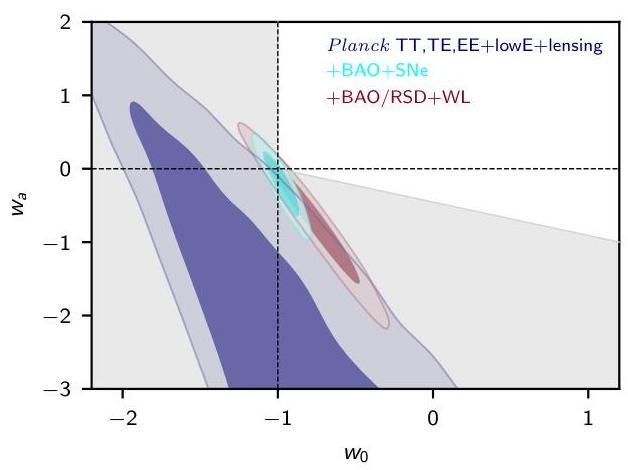

Fig. 30. Marginalized posterior distributions of the ( $w_{0}, w_{a}$ ) parameters for various data combinations. The tightest constraints come from the combination Planck TT,TE,EE+lowE +lensing+SNe+BAO and are compatible with $\Lambda$ CDM. Using Planck TT,TE,EE+lowE+lensing alone is considerably less constraining and allows for an area in parameter space that corresponds to large values of the Hubble constant (as already discussed in Planck Collaboration XIII 2016 and PDE15). The dashed lines indicate the point corresponding to the $\Lambda$ CDM model. The parametric equation of state given by Eq. (49) stays out of the phantom regime (i.e., has $w \geq-1$ ) at all times only in the (upper-right) unshaded region.

Marginalized contours of the posterior distributions for $w_{0}$ and $w_{a}$ are shown in Fig. 30. Note that CMB lensing has only a small effect on the constraints from Planck alone (see the parameter grid tables in the PLA). Using Planck data alone, a wide volume of dynamical dark-energy parameter space is allowed, with contours cut off by our priors $\left(-3<w_{0}<1,-5<w_{a}<5\right.$, and $0.4<h<1$; note that Fig. 30 does not show the complete prior range). However, most of the allowed region of parameter space corresponds to phantom models with very high values of $H_{0}$ (as discussed in PDE15); such models are inconsistent with the late-time evolution constrained by SNe and BAO data. This is illustrated in Fig. 30 which also shows constraints if we add BAO/RSD+WL and BAO+SNe to the Planck TT,TE,EE +lowE+lensing likelihood. The addition of external data sets narrows the constraints towards the $\Lambda$ CDM values of $w_{0}=-1$, $w_{a}=0$. The tightest constraints are found for the data combination Planck TT,TE,EE+lowE+lensing+BAO+SNe; the difference in $\chi^{2}$ between the best-fit DE and $\Lambda$ CDM models for this data combination is only $\Delta \chi^{2}=-1.4$ (which is not significant given the two additional parameters). Numerical constraints for these data combinations, as well as $\chi^{2}$ differences, are presented in Table 6. It is also apparent that for the simple $w_{0}, w_{a}$ parameterization of evolving DE, Planck combined with external data sets does not allow significantly lower values of $S_{8}$ or higher values of $H_{0}$ compared to the base- $\Lambda$ CDM cosmology.

Fixing the evolution parameter $w_{a}=0$, we obtain the tight constraint
$w_{0}=-1.028 \pm 0.031 \quad$ (68\%, Planck TT,TE,EE+lowE +lensing+SNe+BAO),


[^0]:    ${ }^{33}$ Available at http://www.xfu.ca/ aha25/MGCAMB.html (February 2014 version, but updated to correctly output the power spectrum of the Weyl potential).
    ${ }^{34}$ Available at http://eftcamb.org/ (version 2.0).

Table 6. Marginalized values and $68 \%$ confidence limits for cosmological parameters obtained by combining Planck TT,TE,EE +lowE+lensing with other data sets, assuming the $\left(w_{0}, w_{a}\right)$ parameterization of $w(a)$ given by Eq. (49). The $\Delta \chi^{2}$ values for best fits are computed with respect to the $\Lambda$ CDM best fits computed from the corresponding data set combination.

| Parameter | Planck+SNe+BAO | Planck+BAO/RSD+WL |
| :-- | :--: | :--: |
| $w_{0} \ldots \ldots \ldots$ | $-0.957 \pm 0.080$ | $-0.76 \pm 0.20$ |
| $w_{a} \ldots \ldots \ldots$ | $-0.29_{-0.26}^{+0.32}$ | $-0.72_{-0.54}^{+0.62}$ |
| $H_{0}\left[\mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}\right]$ | $68.31 \pm 0.82$ | $66.3 \pm 1.8$ |
| $\sigma_{8} \ldots \ldots \ldots$ | $0.820 \pm 0.011$ | $0.800_{-0.017}^{+0.015}$ |
| $S_{8} \ldots \ldots \ldots$ | $0.829 \pm 0.011$ | $0.832 \pm 0.013$ |
| $\Delta \chi^{2} \ldots \ldots \ldots$ | -1.4 | -1.4 |

and restricting to $w_{0}>-1$ (i.e., not allowing phantom equations of state), we find

$$
w_{0}<-0.95 \quad \begin{aligned}
& (95 \% \text {, Planck TT,TE,EE+lowE } \\
& \text { +lensing+SNe+BAO). }
\end{aligned}
$$

Here we only quote two significant figures, so that the result is robust to differences between the Plik and CamSpec likelihoods.

For the remainder of this section, we assume $\Lambda$ CDM at the background level (i.e., $w=-1$ at all times), but instead turn our attention to constraining the behaviour of the dark sector perturbations.

### 7.4.2. Perturbation parameterization: $\mu, \eta$

In the types of DE or MG models considered here, changes to observables only arise via the impact on the geometry of the Universe. At the level of perturbations, it is then sufficient to model the impact on the gravitational potentials $\Phi$ and $\Psi$, or, equivalently, on two independent combinations of these potentials (e.g., Zhang et al. 2007; Amendola et al. 2008). Following PDE15 we consider two phenomenological functions, $\mu$ and $\eta$, defined as follows.

1. $\mu(a, k)$ : a modification of the Poisson equation for $\Psi$,

$$
k^{2} \Psi=-\mu(a, k) 4 \pi G a^{2}[\rho \Delta+3(\rho+P) \sigma]
$$

where $\rho \Delta=\rho_{\mathrm{m}} \Delta_{\mathrm{m}}+\rho_{\mathrm{r}} \Delta_{\mathrm{r}}$, using comoving fractional density perturbations $\Delta$, and where $\sigma$ is the anisotropic stress from relativistic species (photons and neutrinos).
2. $\eta(a, k)$ : an effective additional anisotropic stress, leading to a difference between the gravitational potentials $\Phi$ and $\Psi$, defined implicitly through
$k^{2}[\Phi-\eta(a, k) \Psi]=\mu(a, k) 12 \pi G a^{2}(\rho+P) \sigma$.
At late times, $\sigma$ from standard particles is negligible and we find
$\eta(a, k) \approx \Phi / \Psi$.
These definitions are phenomenological, in the sense that they are not derived from a theoretical action. However, they
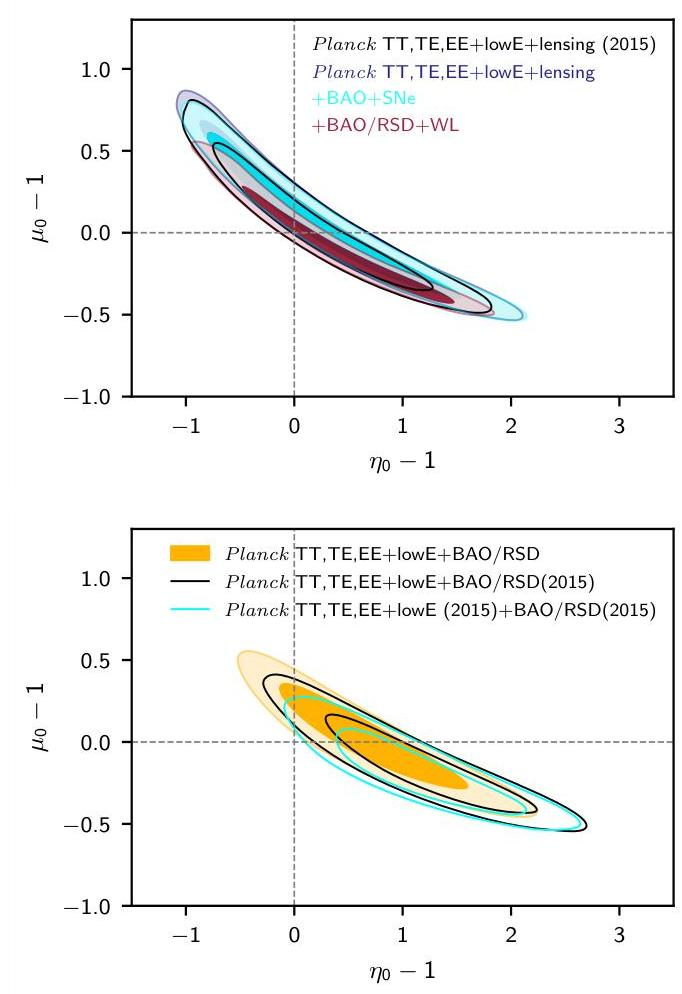

Fig. 31. Top: Marginalized posterior distributions of the MG parameters $\mu$ and $\eta$ for Planck TT,TE,EE+lowE+lensing data alone and in combination with external data (as indicated in the legend), using the late-time parameterization and neglecting any scale dependence. The dashed lines show the standard $\Lambda$ CDM model. Bottom: Impact of the BAO/RSD and Planck TT,TE,EE +lowE data, compared to the 2015 results. For the 2018 Planck data, the contours shift towards lower values of $\eta_{0}-1$, along the maximum degeneracy line (black versus cyan contours) and shift in the same direction when using the BAO/RSD data (yellow versus black contours).
are able to capture a generic deviation of the perturbation evolution from $\Lambda$ CDM that does not need to correspond to a known model. This approach is complementary to constraints on actionbased models, which are the topic of the next subsection. When $\eta=\mu=1$ we recover GR at all times, including when there are non-zero contribution from photons and neutrinos to the density perturbation or anisotropic stress. In the parameterization adopted here (described further below), the MG contribution to $\eta$ is only relevant at late times, when the anisotropic stress from relativistic particles is negligible.

In this section we fix the background evolution to that of $\Lambda$ CDM ( $w=-1$ at all times), so that any significant deviation of $\mu$ or $\eta$ from unity would indicate a deviation from $\Lambda$ CDM. We also consider constraints on the derived quantity $\Sigma$, defined as
$k^{2}[\Phi+\Psi]=-\Sigma(a, k) 4 \pi G a^{2}[2 \rho \Delta-3(\rho+P) \sigma]$

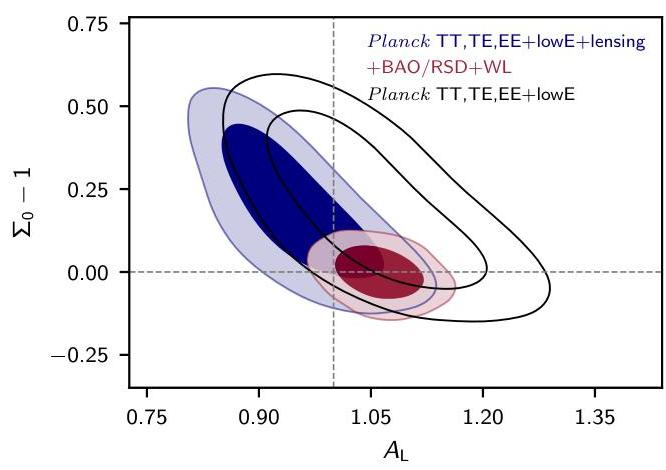

Fig. 32. Degeneracy between $A_{\mathrm{L}}$ and $\Sigma_{0}-1$, computed as a derived parameter in our $(\mu, \eta)$ parameterization. The horizontal dashed line includes $\Lambda$ CDM (but is also marginalized over one of the two degrees of freedom in the $\mu-\eta$ space). The vertical dashed line shows $A_{\mathrm{L}}=1$. The filled contours use the Planck TT,TE,EE+lowE+lensing likelihood, alone and in combination with WL+BAO/RSD data. The unfilled contours show the constraints from Planck TT,TE,EE+lowE. Note that $A_{\mathrm{L}}$ only affects CMB lensing of the Planck power spectra by definition, as discussed in Sect. 6.2.

Since $\Sigma$ measures deviations of the lensing potential from the GR prediction, it is better constrained by WL data than $\mu$ and $\eta$ separately.

For simplicity we only allow $\mu$ and $\eta$ to vary with time (as in PDE15). Scale dependence increases the number of degeneracies in parameter space and may require, for example, higherorder statistics in WL observables (Peel et al. 2018) to break the degeneracies. We use the late-time DE parameterization of PDE15 and Casas et al. (2017), where the time evolution of all quantities is assumed to be proportional to the relative darkenergy density:
$\mu(z)=1+E_{11} \Omega_{\mathrm{DE}}(z)$
$\eta(z)=1+E_{21} \Omega_{\mathrm{DE}}(z)$
This defines the constants $E_{11}$ and $E_{21}$. We report results in terms of $\mu_{0} \equiv \mu(z=0)$ and $\eta_{0} \equiv \eta(z=0)$, which are determined from $E_{11}$ and $E_{21}$, given the dark-energy density parameter today. This parameterization is motivated by the assumption that the impact of dark energy depends on its density and therefore allows for more deviation of $\mu$ and $\eta$ from $\Lambda$ CDM at late times. The alternative early-time parameterization included in PDE15 led to similar results and is not discussed here for brevity. Our choice of parameterization, of course, limits the nature of possible deviations from $\Lambda$ CDM; however, the choices of Eqs. (56a) and (56b) allow us to compare our results directly with those of PDE15.

Figure 31 shows the marginalized constraints on $\mu_{0}$ and $\eta_{0}$ from different combinations of data, and also compares with the results from PDE15. Marginalized mean values and errors for cosmological parameters are presented in Table 7. This table also lists results for $\left\langle d^{2}\right\rangle^{1 / 2}$, the root-mean-square CMB lensing deflection angle, and the parameter combination $\Sigma_{0} S_{8}$ that is well-constrained by the DES WL data. These quantities allow
the reader to assess the impact of lensing data on the parameter constraints. The $\mu$ parameter affects the growth of structure, so, for example, higher $\mu$ gives larger values of $\sigma_{8}$. The CMB only constrains MG via the integrated Sachs-Wolfe effect (on large scales, where there is large cosmic variance) and CMB lensing. Lensing observations do not constrain the fluctuation amplitude directly, but the amplitude scaled by $\Sigma$ (as defined in Eq. 55). The degeneracy direction shown in Fig. 31 corresponds to approximately constant lensing amplitude, with higher $\mu_{0}$ requiring lower $\Sigma_{0}$ and hence lower $\eta_{0}$. The thickness of the degeneracy contour and its location depends on the constraint on lensing. With Planck data alone, or $\operatorname{Planck}+\mathrm{SNe}+\mathrm{BAO}$, the lensing amplitude is pulled to high values by the preference for more lensing discussed in Sect. 6.2, so the contours are slightly shifted with respect to $\Lambda$ CDM. The inclusion of $\mathrm{WL}^{35}$ data shrinks the contour, and reduces the offset with respect to $\Lambda$ CDM; DES WL data disfavour higher lensing amplitudes than predicted by the Planck $\Lambda$ CDM cosmology. DES also measures lensing at much lower redshift than CMB lensing, so it is a more powerful probe of MG models where changes to GR only appear at late times (as we have assumed).

The BAO/RSD data constrain $\mu_{0}$ directly, since redshift distortions are a probe of structure growth. The lower panel of Fig. 31 shows constraints with BAO/RSD alone, and also demonstrates that removing the CMB lensing reconstruction data shifts the contour further from $\Lambda$ CDM; this is consistent with the pull away from $\Lambda$ CDM being driven by the preference for more lensing in the high- $\ell$ CMB power spectra.

We can further demonstrate the effect of CMB lensing by varying the consistency parameter $A_{\mathrm{L}}$ within MG models. Figure 32 shows the degeneracy between $A_{\mathrm{L}}$ and $\Sigma_{0}-1$, which is computed as a derived parameter in our $(\mu, \eta)$ parameterization. Here $A_{\mathrm{L}}$ affects lensing of the CMB power spectra only, while $\Sigma_{0}$ encodes modifications to the lensing amplitude caused by modifications of gravity. The contours show that MG models $\left(\Sigma_{0} \neq 1\right)$ are preferred by the Planck power spectra (although not strongly) if $A_{\mathrm{L}}=1$. The preference for higher $\Sigma_{0}$ values is reduced by allowing larger $A_{\mathrm{L}}$; the preference for MG that we find is therefore largely another reflection of the preference for $A_{\mathrm{L}}>1$ discussed in Sect. 6.2. Adding Planck CMB lensing measurements shifts the contours back into consistency with $\Lambda$ CDM (blue contours). Adding BAO/RSD + WL tightens the constrains (red contours) which remain consistent with $\Lambda$ CDM. Using the CanSpec likelihood gives slightly less preference for high $A_{\mathrm{L}}$, and the results for Planck TT,TE,EE+lowE+lensing shift by about $0.2 \sigma$ towards better consistency with $\Lambda$ CDM.

### 7.4.3. Effective field theory description of dark energy

To investigate action-based models that can give interesting values of $\mu$ and $\eta$, we limit ourselves to a sub-class of effective field theories (EFTs, Cheung et al. 2008; Creminelli et al. 2009; Gubitosi et al. 2013). The EFTs we consider contain models with a single scalar field and at most second-order equations of motion, a restriction that is in general necessary to avoid the socalled Ostrogradski instability. In addition, EFTs typically assume a universal coupling to gravity; models with non-universal

[^0]
[^0]:    ${ }^{35}$ Tests during the writing of this paper revealed a bug in MGCAMB that was also present in 2015. This bug reduced the constraining power of WL data for the $(\mu, \eta)$ parameterization (which in 2015 was suppressed by the very conservative excision of nonlinear scales). The CMB and BAO/RSD constraints and other cosmological models were not affected by this bug.

Table 7. Marginalized values and $68 \%$ confidence regions for cosmological parameters obtained combining Planck TT,TE,EE +lowE with other data sets, assuming the $(\mu, \eta)$ parameterization of modified gravity. The $\Delta \chi^{2}$ values are computed with respect to the best-fit $\Lambda$ CDM cosmology, using the same data combination. The quantity $\left\langle d^{2}\right\rangle^{1 / 2}$ is the root-mean-square CMB lensing deflection angle, which is pulled high by the CMB data unless galaxy lensing (WL) or CMB lensing are included. The combination $\Sigma_{0} S_{8}$ is approximately the lensing amplitude parameter best constrained by the DES WL data at lower redshift.

| Parameter | With CMB lensing |  |  | Without CMB lensing |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  | Planck | Planck <br> $+S N e+B A O$ | Planck <br> $+B A O / R S D+W L$ | Planck | Planck <br> $+S N e+B A O$ | Planck <br> $+B A O / R S D+W L$ |
| $\mu_{0}-1$ | $0.10^{+0.30}$ | $0.05^{+0.26}$ | $-0.07^{+0.19}$ | $0.12^{+0.29}$ | $0.10^{+0.30}$ | $-0.12^{+0.17}$ |
| $\eta_{0}-1$ | $0.22^{+0.55}$ | $0.32^{+0.61}$ | $0.32^{+0.53}$ | $0.55^{+1.78}$ | $0.62^{+0.79}$ | $0.52^{+0.67}$ |
| $\Sigma_{0}-1$ | $0.100 \pm 0.093$ | $0.106 \pm 0.086$ | $0.018^{+0.059}$ | $0.27^{+0.23}$ | $0.27^{+0.15}$ | $0.017^{+0.058}$ |
| $\tau$ | $0.0481_{-0.0072}^{+0.0087}$ | $0.0487_{-0.0074}^{+0.0095}$ | $0.0524 \pm 0.0075$ | $0.0504 \pm 0.0080$ | $0.0505 \pm 0.0080$ | $0.0526 \pm 0.0079$ |
| $H_{0}\left[\mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}\right]$ | $68.20 \pm 0.63$ | $68.19 \pm 0.45$ | $68.09 \pm 0.45$ | $68.23 \pm 0.71$ | $68.26 \pm 0.48$ | $68.09 \pm 0.46$ |
| $\sigma_{8}$ | $0.812^{+0.034}$ | $0.807^{+0.029}$ | $0.799^{+0.023}$ | $0.817^{+0.032}$ | $0.814^{+0.033}$ | $0.794^{+0.020}$ |
| $S_{8}$ | $0.817 \pm 0.037$ | $0.812^{+0.033}$ | $0.806^{+0.027}$ | $0.822^{+0.040}$ | $0.819^{+0.032}$ | $0.801^{+0.025}$ |
| $\left\langle d^{2}\right\rangle^{1 / 2}[\text { arcmin }]$ | $2.531^{+0.046}$ | $2.529 \pm 0.049$ | $2.453 \pm 0.032$ | $2.697^{+0.065}$ | $2.695^{+0.068}$ | $2.456 \pm 0.043$ |
| $\Sigma_{0} S_{8}$ | $0.898 \pm 0.067$ | $0.897^{+0.066}$ | $0.820^{+0.063}$ | $1.04^{+0.12}$ | $1.04^{+0.12}$ | $0.814^{+0.044}$ |
| $\Delta \chi^{2}$ | $-4.6$ | $-5.5$ | $-1.2$ | $-10.2$ | $-11.0$ | $-0.7$ |

Table 8. Marginalized values and $68 \%$ confidence regions for cosmological parameters obtained by combining Planck TT,TE,EE +lowE with other data sets, assuming the EFT parameterization $\Omega_{\mathrm{E}}^{\mathrm{EFT}}(a)$. The $\Delta \chi^{2}$ values are computed with respect to the best-fit $\Lambda$ CDM model using the same data combination. Values in brackets give the significance of the deviation from zero assuming a Gaussian posterior distribution.

|  | With CMB lensing |  |  | Without CMB lensing |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Parameter | Planck | $\begin{gathered} \text { Planck } \\ +\mathrm{BAO} / \mathrm{RSD}+\mathrm{WL} \end{gathered}$ |  | Planck | $\begin{gathered} \text { Planck } \\ +\mathrm{BAO} / \mathrm{RSD}+\mathrm{WL} \end{gathered}$ |  |
| $\Omega_{\mathrm{B}}^{\mathrm{EFT}}$ | $-0.049_{-0.024}^{+0.037}$ | $\begin{gathered} -0.019_{-0.019}^{+0.024}(0.8 \sigma) \\ -0.040_{-0.016}^{+0.041} \end{gathered}$ |  | $\begin{gathered} -0.101_{-0.038}^{+0.059}(2.1 \sigma) \\ -0.075_{-0.028}^{+0.073} \end{gathered}$ | $\begin{gathered} -0.021 \pm 0.025(0.9 \sigma) \\ -0.014_{-0.014}^{0.017} \end{gathered}$ |  |
| $\alpha_{\mathrm{M} 0}$ | $-0.040_{-0.016}^{+0.041}$ | $-0.015_{-0.015}^{+0.019}$ |  | $-0.075_{-0.028}^{+0.073}$ | $-0.014_{-0.014}^{0.017}$ |  |
| $\beta$ | $0.72_{-0.14}^{+0.38}$ | $0.66_{-0.21}^{+0.44}$ |  | $0.66_{-0.16}^{+0.38}$ | $0.62_{-0.24}^{+0.45}$ |  |
| $\tau$ | $0.0489_{-0.0072}^{+0.0081}$ | $0.0549_{-0.011}^{+0.0096}$ |  | $0.0497 \pm 0.0082$ | $0.0528 \pm 0.0086$ |  |
| $H_{0}\left[\mathrm{~km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}\right]$ | $68.19 \pm 0.67$ | $68.22 \pm 0.46$ |  | $68.30 \pm 0.71$ | $68.16 \pm 0.46$ |  |
| $\sigma_{8}$ | $0.8198 \pm 0.0074$ | $0.8151 \pm 0.0067$ |  | $0.845_{-0.015}^{+0.015}$ | $0.8164_{-0.016}^{0.0987}$ |  |
| $S_{8}$ | $0.826 \pm 0.013$ | $0.8205 \pm 0.0098$ |  | $0.849 \pm 0.017$ | $0.823 \pm 0.011$ |  |
| $\Delta \chi^{2}$ | $-4.3$ | $-2.1$ |  | $-9.7$ | $-2.9$ |  |

couplings (Amendola 2000; Pettorino \& Baccigalupi 2008), multiple scalar fields, additional vector (Hellings \& Nordtvedt 1973) or tensor fields (Hassan et al. 2012), or non-local models (Belgacem et al. 2018) do not fall into this class and are not considered here. Nevertheless EFTs provide a general set of models for which we can, in principle, compute all quantities of interest, including $\mu$ and $\eta$ (which will span a restricted part of the $\mu-\eta$ space considered in the previous section.)

As described in section 5.2.1 of PDE15, the degrees of freedom in actions of this class of models can be reduced to the expansion rate $H$ and five additional functions of time (Gleyzes et al. 2013; Bellini \& Sawicki 2014) $\left\{\alpha_{\mathrm{M}}, \alpha_{\mathrm{K}}, \alpha_{\mathrm{B}}, \alpha_{\mathrm{T}}, \alpha_{\mathrm{H}}\right\}$. However, measurements of the speed of gravitational waves (Abbott et al. 2017) imply that $\alpha_{T}(z=0) \simeq 0$, which reduces the space of acceptable models (Lombriser \& Taylor 2016; McManus et al. 2016; Creminelli \& Vernizzi 2017; Ezquiaga \& Zumalacarregui 2017; Sakstein \& Jain 2017; Baker et al. 2017).

Apart from models where gravitational wave propagation is not modified at all, which would necessarily limit us to $\eta=1$ (Saltas et al. 2014), only conformally (non-minimally) coupled models ${ }^{36}$ with $\alpha_{\mathrm{B}}=-\alpha_{\mathrm{M}}$ (and $\alpha_{\mathrm{H}}=0$ ) naturally lead to $\alpha_{\mathrm{T}}=0$. For these reasons we focus on this latter class of models (and for simplicity we assume $\alpha_{\mathrm{T}}(z) \simeq 0$ at all times), and in addition choose the kinetic terms of the scalar (set by $\alpha_{\mathrm{K}}$ ) to keep the scalar sound speed equal to the speed of light (current observational data are not able to constrain the sound speed significantly, see e.g., the $k$-essence model constraints in PDE15). We finally end up with a non-minimally coupled $k$-essence model

[^0]
[^0]:    ${ }^{36}$ Recently the EFT action has been extended to include degenerate higher-order theories (DHOST, Zumalacárregui \& García-Bellido 2014; Gleyzes et al. 2015; Ben Achour et al. 2016), which feature an additional parameter called $\beta_{1}$ (Langlois et al. 2017). DHOST models can also give $\alpha_{\mathrm{T}} \approx 0$, but $\alpha_{\mathrm{H}}$ and $\beta_{1}$ are constrained to be small from astrophysical tests of gravity (Crisostomi \& Koyama 2018; Langlois et al. 2018; Dima \& Vernizzi 2018; Saltas et al. 2018).

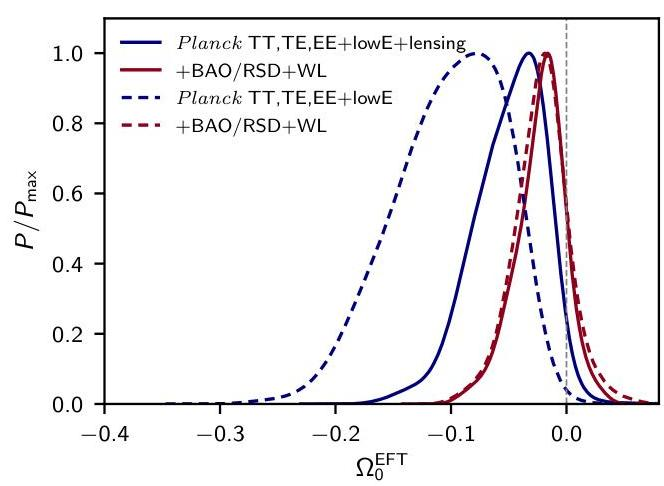

Fig. 33. Marginalized posterior distribution of $\Omega_{0}^{\mathrm{EFT}}$ that parameterizes the evolution of the Planck mass according to Eq. (57) in the EFT model. We show constraints for Planck TT,TE,EE +lowE+lensing data (solid lines), as well as Planck TT,TE,EE +lowE data without CMB lensing (dashed lines), both alone and in combination with WL+BAO/RSD data. The $\Lambda$ CDM limit lies at $\Omega_{0}^{\mathrm{EFT}}=0$ (vertical dashed line).
described by the single function $\alpha_{\mathrm{M}}$ that determines the running of the Planck mass. The background expansion is chosen to be the same as in $\Lambda$ CDM, as in our analysis of the $\mu-\eta$ parameterization described in the previous section. The main difference relative to PDE15 is that we now allow for $\alpha_{\mathrm{M}}<0$, which corresponds to a Planck mass decreasing with time.

As in PDE15 we adopt the parameterization $\alpha_{M}=\alpha_{M 0} \alpha^{\beta}$, where $\alpha_{M 0}$ is the value of $\alpha_{M}$ today and where $\beta>0$ determines how quickly the absolute value of $\alpha_{M}$ decreases at high redshift. In terms of the non-minimal coupling function $\Omega$ multiplying the Ricci scalar $R$ in the action, this corresponds to ${ }^{37}$
$\Omega^{\mathrm{EFT}}(a)=\exp \left\{\frac{\alpha_{M 0}}{\beta} \alpha^{\beta}\right\}-1=\exp \left\{\Omega_{0}^{\mathrm{EFT}} a^{\beta}\right\}-1$,
which agrees with the exponential model built-in to EFTCMB (Raveri et al. 2014) (which we use to compute the model predictions presented here). The resulting posterior distribution on $\Omega_{0}^{\mathrm{EFT}}$, marginalized over $\beta$ and other parameters, is shown in Fig. 33. The $\Lambda$ CDM limit lies at $\Omega_{0}^{\mathrm{EFT}}=0$ (vertical dashed line). We see that the posterior distribution prefers negative values of $\Omega_{0}^{\mathrm{EFT}}$, with a shift of $1.6 \sigma$ for the baseline Planck TT,TE,EE+lowE+lensing likelihood and $2.1 \sigma$ if CMB lensing is excluded. These shifts are reduced to $0.8 \sigma$ with the addition of BAO/RSD+WL to the Planck TT,TE,EE+lowE+lensing likelihood and to $0.9 \sigma$ if Planck lensing is excluded. Table 8 gives the parameter constraints for these data combinations and lists the changes in $\chi^{2}$ of the best fits relative to base $\Lambda$ CDM. As was the case for the $(\mu, \eta)$ parameterization, DES WL measurements pull the contours towards $\Lambda$ CDM. If we determine $\mu_{0}$ and $\eta_{0}$ that correspond to the mean values of the EFT parameters for a specific scale choice, we find that the parameters lie in the top-left quadrant of the $(\mu, \eta)$ parameter space shown in Fig. 31.

[^0]Another class of models that predicts values of $(\mu, \eta)$ in the topleft quadrant of Fig. 31 are the non-local models, specifically the RR model of Dirian et al. (2016); these models are not discussed here.

Overall, the EFT sub-class of non-minimally coupled $k$ essence models considered here is not preferred by current data. Without using CMB and galaxy WL lensing, Planck gives a moderate preference for models that predict more lensing compared to $\Lambda$ CDM (as found in our investigation of the $(\mu, \eta)$ parameterization). However, combining Planck with CMB and DES WL lensing measurements disfavours high lensing amplitudes and pulls the parameters towards $\Lambda$ CDM.

### 7.4.4. General remarks

Planck alone provides relatively weak constraints on dark energy and modified gravity, but Planck does constrain other cosmological parameters extremely well. By combining Planck with external data we then obtain tight constraints on these models. We find no strong evidence for deviations from $\Lambda$ CDM, either at the background level or when allowing for changes to the perturbations. At the background level, $\Lambda$ CDM is close to the best fit. In the simple $\mu-\eta$ and EFT parameterizations of perturbationlevel deviations from GR, we do find better fits to the Planck TT,TE,EE+lowE data compared to $\Lambda$ CDM, but this is largely associated with the preference in the CMB power spectra for higher lensing amplitudes (as discussed in Sect. 6.2), rather than a distinctive preference for modified gravity. Adding weak lensing data disfavours the large lensing amplitudes and our results are consistent with $\Lambda$ CDM to within $1 \sigma$. Since neutrino masses are in general degenerate with DE and MG parameters, it is also worth testing the impact of varying neutrino masses versus fixing them to our base- $\Lambda$ CDM value of $m_{\nu}=0.06 \mathrm{eV}$. We find similar trends, with slightly larger posteriors when varying the neutrino mass.

### 7.5. Neutrinos and extra relativistic species

### 7.5.1. Neutrino masses

The Planck base- $\Lambda$ CDM model assumes a normal mass hierarchy with the minimal mass $\sum m_{\nu}=0.06 \mathrm{eV}$ allowed by neutrino flavour oscillation experiments. However, current observations are consistent with many neutrino mass models, and there are no compelling theoretical reasons to strongly prefer any one of them. Since the masses are already known to be non-zero, allowing for larger $\sum m_{\nu}$ is one of the most well-motivated extensions of the base model. The normal hierarchy, in which the lowest two mass eigenstates have the smallest mass splitting, can give any $\sum m_{\nu} \gtrsim 0.06 \mathrm{eV}$; an inverted hierarchy, in which the two most massive eigenstates have the smallest mass separation, requires $\sum m_{\nu} \gtrsim 0.1 \mathrm{eV}$. A constraint that $\sum m_{\nu}<0.1 \mathrm{eV}$ would therefore rule out the inverted hierarchy. For a review of neutrino physics and the impact on cosmology see e.g., Lesgourgues et al. (2013).

As in PCP13 and PCP15, we quote constraints assuming three species of neutrino with degenerate mass, a Fermi-Dirac distribution, and zero chemical potential. At Planck sensitivity the small mass splittings can be neglected to good accuracy (see e.g., Lesgourgues \& Pastor 2006). Neutrinos that become nonrelativistic around recombination produce distinctive signals in the CMB power spectra, which Planck and other experiments have already ruled out. If the neutrino mass is low enough that they became non-relativistic after recombination ( $m_{\nu} \ll 1 \mathrm{eV}$ ), the main effect on the CMB power spectra is a change in the


[^0]:    ${ }^{37}$ This notation is conventional; note that $\Omega^{\mathrm{EFT}}$ here is not the contribution to the critical density, and $\Omega_{0}^{\mathrm{EFT}}$ is not the value of $\Omega^{\mathrm{EFT}}(a)$ at $a=1$.

angular diameter distance that is degenerate with decreasing $H_{0}$. The Planck data then mainly constrain lower masses via the lensing power spectrum and the impact of lensing on the CMB power spectra. Since the CMB power spectra prefer slightly more lensing than in the base- $\Lambda$ CDM model, and neutrino mass can only suppress the power, we obtain somewhat stronger constraints than might be expected in typical realizations of a minimal-mass neutrino model.

In PCP15 no preference for higher neutrino masses was found, but a tail to high neutrino masses was still allowed, with relatively high primordial amplitudes $A_{s}$ combining with high neutrino mass to give acceptable lensing power. The tighter 2018 constraint on the optical depth from polarization at low multipoles restricts the primordial $A_{s}$ to be smaller, to match the same observed high- $\ell$ power ( $C_{\ell} \propto A_{s} e^{-2 \tau}$ ); this reduces the parameter space with larger neutrino masses, giving tighter constraints on the mass. With only temperature information at high $\ell$, the $95 \%$ CL upper bound moved from 0.72 eV (PCP15 TT+lowP) to 0.59 eV (using the SimLow polarization likelihood of Planck Collaboration Int. XLVI 2016, at low $\ell$ ). This now further tightens to

$$
\sum m_{v}<0.54 \mathrm{eV} \quad(95 \%, \text { Planck TT+lowE })
$$

Adding high- $\ell$ polarization further restricts residual parameter degeneracies, and the limit improves to

$$
\sum m_{v}<0.26 \mathrm{eV} \quad(95 \%, \text { Planck TT,TE,EE+lowE })
$$

Although the high- $\ell$ TT spectrum prefers more lensing than in base $\Lambda$ CDM, the lensing reconstruction is very consistent with expected amplitudes. In PCP15, the 2015 lensing likelihood weakened joint neutrino mass constraints because it preferred substantially less lensing than the temperature power spectrum. The 2018 lensing construction gives a slightly ( $1-2 \%$ ) higher lensing power spectrum amplitude than in 2015, which, combined with the decrease in the range of higher lensing amplitudes allowed by the new TT+lowE likelihood, means that the constraints are more consistent. Adding lensing therefore now slightly tightens the constraints to

$$
\begin{aligned}
& \sum m_{v}<0.44 \mathrm{eV} \quad(95 \%, \text { TT+lowE+lensing }) \\
& \sum m_{v}<0.24 \mathrm{eV} \quad(95 \%, \text { TT,TE,EE+lowE+lensing })
\end{aligned}
$$

The joint constraints using polarization are however sensitive to the details of the high- $\ell$ polarization likelihoods, with the CamSpec likelihood giving significantly weaker constraints with polarization:

$$
\begin{aligned}
& \sum m_{v}<0.38 \mathrm{eV} \quad(95 \%, \text { TT,TE,EE+lowE [CamSpec }]) \\
& \sum m_{v}<0.27 \mathrm{eV} \quad \begin{array}{l}
(95 \%, \text { TT,TE,EE+lowE } \\
\text { +lensing [CamSpec }])
\end{array}
\end{aligned}
$$

As discussed in Sect. 6.2, the CamSpec TT,TE,EE+lowE likelihood shows a weaker preference for higher lensing amplitude $A_{\mathrm{L}}$ than the default Plik likelihood, and this propagates directly into a weaker constraint on the neutrino mass, since for small
masses the constraint is largely determined by the lensing effect. The differences between Plik and CamSpec are much smaller if we add CMB lensing, since the lensing measurements restrict the lensing amplitude to values closer to those expected in base $\Lambda$ CDM.

The combination of the acoustic scale measured by the CMB $\left(\theta_{\mathrm{MC}}\right)$ and BAO data is sufficient to largely determine the background geometry in the $\Lambda \mathrm{CDM}+\sum m_{v}$ model, since the lowerredshift BAO data break the geometric degeneracy. Combining BAO data with the CMB lensing reconstruction power spectrum (with priors on $\Omega_{b} h^{2}$ and $n_{\mathrm{s}}$, following PL2015), the neutrino mass can also be constrained to be
$\sum m_{v}<0.60 \mathrm{eV} \quad(95 \%$, Planck lensing + BAO $+\theta_{\mathrm{MC}})$.
This number is consistent with the tighter constraints using the CMB power spectra, and almost independent of lensing effects in the CMB spectra; it would hold even if the $A_{\mathrm{L}}$ tension discussed in Sect. 6.2 were interpreted as a sign of unknown residual systematics. Since the constraint from the CMB power spectra is strongly limited by the geometrical degeneracy, adding BAO data to the Planck likelihood significantly tightens the neutrino mass constraints. Without CMB lensing we find

$$
\begin{aligned}
& \sum m_{v}<0.16 \mathrm{eV} \quad(95 \%, \text { Planck TT+lowE+BAO }) \\
& \sum m_{v}<0.13 \mathrm{eV} \quad \begin{array}{l}
(95 \%, \text { Planck TT,TE,EE+lowE } \\
+ \mathrm{BAO})
\end{array} \\
& \text { and combining with lensing the limits further tighten to }
\end{aligned}
$$

$$
\begin{aligned}
& \sum m_{v}<0.13 \mathrm{eV} \quad \begin{array}{l}
(95 \%, \text { Planck TT+lowE+lensing } \\
+ \mathrm{BAO})
\end{array} \\
& \sum m_{v}<0.12 \mathrm{eV} \quad \begin{array}{l}
(95 \%, \text { Planck TT,TE,EE+lowE } \\
+ \text { lensing+BAO })
\end{array}
\end{aligned}
$$

These combined constraints are almost immune to high- $\ell$ polarization modelling uncertainties, with the CamSpec likelihood giving the $95 \%$ limit $\sum m_{v}<0.13 \mathrm{eV}$ for Planck TT,TE,EE +lowE+lensing+BAO.

Adding the Pantheon SNe data marginally tightens the bound to $\sum m_{v}<0.11 \mathrm{eV}$ ( $95 \%$, Planck TT,TE,EE+lowE+lensing +BAO+Pantheon). In contrast the full DES 1-year data prefer a slightly lower $\sigma_{8}$ value than the Planck $\Lambda$ CDM best fit, so DES slightly favours higher neutrino masses, relaxing the bound to $\sum m_{v}<0.14 \mathrm{eV}$ ( $95 \%$, Planck TT,TE,EE+lowE+lensing+BAO +DES).

Increasing the neutrino mass leads to lower values of $H_{0}$, and hence aggravates the tension with the distance-ladder determination of Riess et al. (2018a, see Fig. 34). Adding the Riess et al. (2018a) $H_{0}$ measurement to Planck will therefore give even tighter neutrino mass constraints (see the parameter tables in the PLA), but such constraints should be interpreted cautiously until the Hubble tension is better understood.

The remarkably tight constraints using CMB and BAO data are comparable with the latest bounds from combining with Ly $\alpha$ forest data (Palanque-Delabrouille et al. 2015; Yèche et al. 2017). Although Ly $\alpha$ is a more direct probe of the neutrino mass (in the sense that it is sensitive to the matter power spectrum on

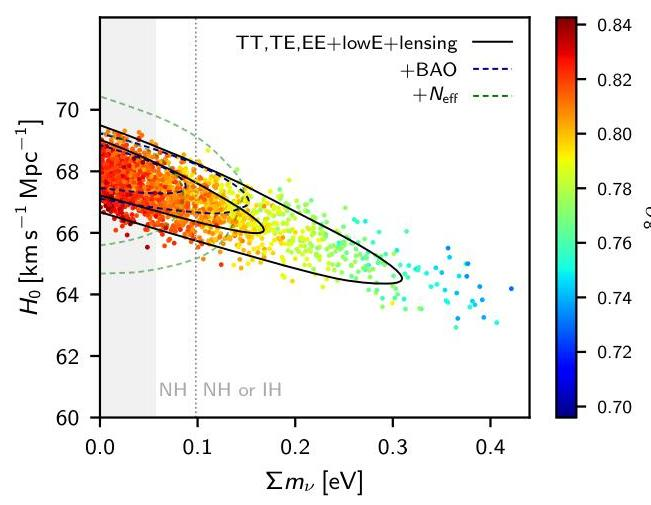

Fig. 34. Samples from Planck TT,TE,EE+lowE chains in the $\sum m_{v}-H_{0}$ plane, colour-coded by $\sigma_{8}$. Solid black contours show the constraints from Planck TT,TE,EE+lowE+lensing, while dashed blue lines show the joint constraint from Planck TT,TE,EE+lowE+lensing+BAO, and the dashed green lines additionally marginalize over $N_{\text {eff }}$. The grey band on the left shows the region with $\sum m_{v}<0.056 \mathrm{eV}$ ruled out by neutrino oscillation experiments. Mass splittings observed in neutrino oscillation experiments also imply that the region left of the dotted vertical line can only be a normal hierarchy (NH), while the region to the right could be either the normal hierarchy or an inverted hierarchy (IH).
scales where the suppression caused by neutrinos is expected to be significant) the measurements are substantially more difficult to model and interpret than the CMB and BAO data. Our $95 \%$ limit of $\sum m_{v}<0.12 \mathrm{eV}$ starts to put pressure on the inverted mass hierarchy (which requires $\sum m_{v} \gtrsim 0.1 \mathrm{eV}$ ) independently of Ly $\alpha$ data. This is consistent with constraints from neutrino laboratory experiments which also slightly prefer the normal hierarchy at 2-3 $\sigma$ (Adamson et al. 2017; Abe et al. 2018; Capozzi et al. 2018; de Salas et al. 2018a,b).

### 7.5.2. Effective number of relativistic species

New light particles appear in many extensions of the Standard Model of particle physics. Additional dark relativistic degrees of freedom are usually parameterized by $N_{\text {eff }}$, defined so that the total relativistic energy density well after electron-positron annihilation is given by
$\rho_{\mathrm{rad}}=N_{\text {eff }} \frac{7}{8}\left(\frac{4}{11}\right)^{4 / 3} \rho_{\gamma}$.
The standard cosmological model has $N_{\text {eff }} \approx 3.046$, slightly larger than 3 since the three standard model neutrinos were not completely decoupled at electron-positron annihilation (Gnedin \& Gnedin 1998; Mangano et al. 2005; de Salas \& Pastor 2016).

We can treat any additional massless particles produced well before recombination (that neither interact nor decay) as simply an additional contribution to $N_{\text {eff }}$. Any species that was initially in thermal equilibrium with the Standard Model particles produces a $\Delta N_{\text {eff }}\left(\equiv N_{\text {eff }}-3.046\right)$ that depends only on the number of degrees of freedom and decoupling temperature. Using con-
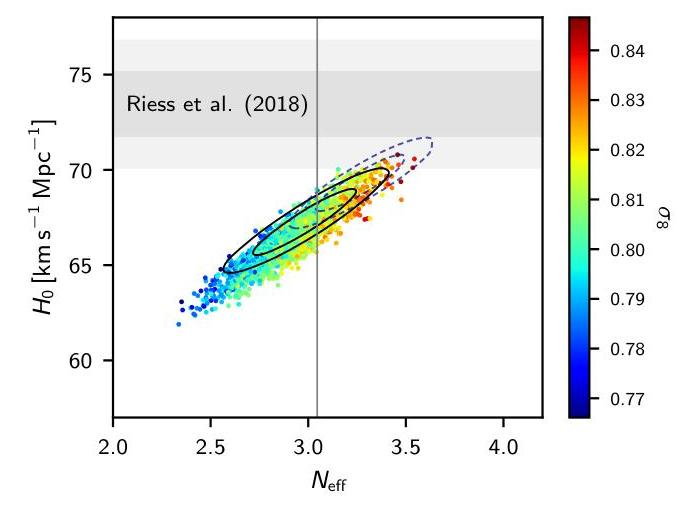

Fig. 35. Samples from Planck TT,TE,EE+lowE chains in the $N_{\text {eff }}-H_{0}$ plane, colour-coded by $\sigma_{8}$. The grey bands show the local Hubble parameter measurement $H_{0}=$ $(73.45 \pm 1.66) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$ from Riess et al. (2018a). Solid black contours show the constraints from Planck TT,TE,EE +lowE+lensing+BAO, while dashed lines the joint constraint also including Riess et al. (2018a). Models with $N_{\text {eff }}<3.046$ (left of the solid vertical line) require photon heating after neutrino decoupling or incomplete thermalization.
servation of entropy, fully thermalized relics with $g$ degrees of freedom contribute
$\Delta N_{\text {eff }}=g\left[\frac{43}{4 g_{s}}\right]^{4 / 3} \times \begin{cases}4 / 7 & \text { boson, } \\ 1 / 2 & \text { fermion, }\end{cases}$
where $g_{s}$ is the effective degrees of freedom for the entropy of the other thermalized relativistic species that are present when they decouple. ${ }^{38}$ Examples range from a fully thermalized sterile neutrino decoupling at $1 \lesssim T \lesssim 100 \mathrm{MeV}$, which produces $\Delta N_{\text {eff }} \approx 1$, to a thermalized boson decoupling before top quark freeze-out, which produces $\Delta N_{\text {eff }} \approx 0.027$.

Additional radiation does not need to be fully thermalized, in which case $\Delta N_{\text {eff }}$ must be computed on a model-by-model basis. We follow a phenomenological approach in which we treat $N_{\text {eff }}$ as a free parameter. We allow $N_{\text {eff }}<3.046$ for completeness, corresponding to standard neutrinos having a lower temperature than expected, even though such models are less well motivated theoretically.

The 2018 Planck data are still entirely consistent with $N_{\text {eff }} \approx$ 3.046 , with the new low- $\ell$ polarization constraint lowering the 2015 central value slightly and with a corresponding $10 \%$ reduction in the error bar, giving
$N_{\text {eff }}=3.00_{-0.53}^{+0.57} \quad(95 \%$, Planck TT+lowE),
$N_{\text {eff }}=2.92_{-0.37}^{+0.36} \quad(95 \%$, Planck TT,TE,EE+lowE),
with similar results including lensing. Modifying the relativistic energy density before recombination changes the sound horizon, which is partly degenerate with changes in the late-time geometry. Although the physical acoustic scale measured by BAO

[^0]
[^0]:    ${ }^{38}$ For most of the thermal history $g_{s} \approx g_{s}$, where $g_{s}$ is the effective degrees of freedom for density, but they can differ slightly, for example during the QCD phase transition (Borsanyi et al. 2016) .

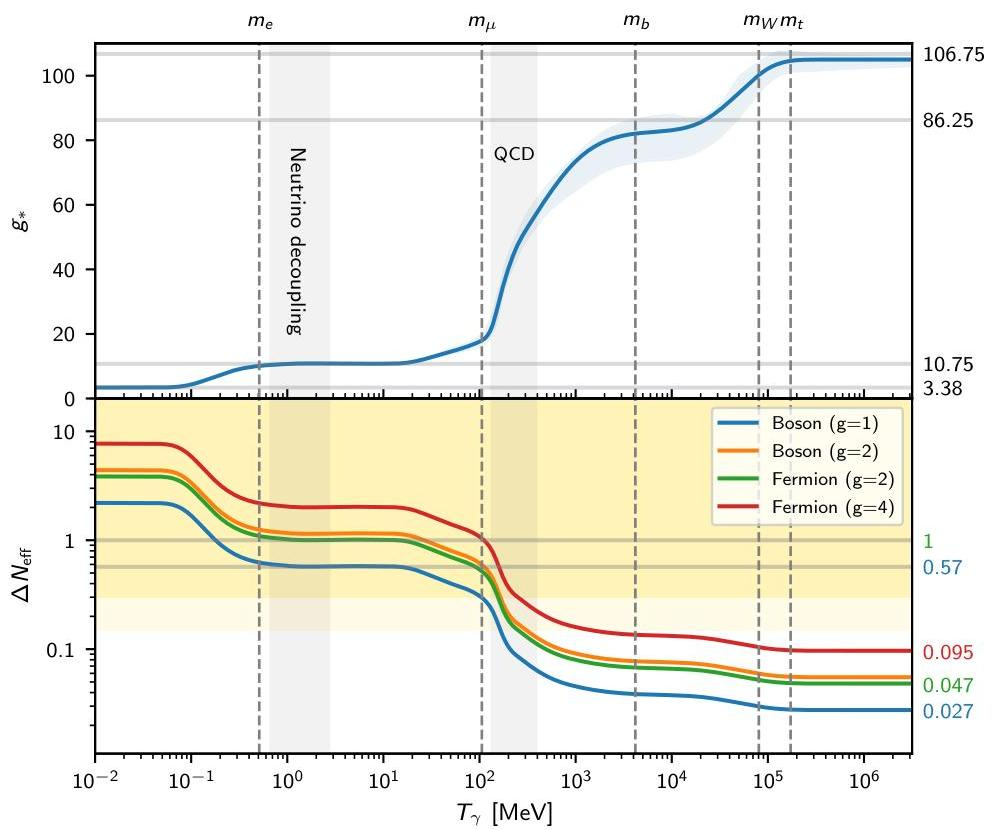

Fig. 36. Constraints on additional relativistic particles. Top: Evolution of the effective degrees of freedom for Standard Model particle density, $g_{*}$, as a function of photon temperature in the early Universe. Vertical bands show the approximate temperature of neutrino decoupling and the QCD phase transition, and dashed vertical lines denote some mass scales at which corresponding particles annihilate with their antiparticles, reducing $g_{*}$. The solid line shows the fit of Borsanyi et al. (2016) plus standard evolution at $T_{\gamma}<1 \mathrm{MeV}$, and the pale blue bands the estimated $\pm 1 \sigma$ error region from Saikawa \& Shirai (2018). Numbers on the right indicate specific values of $g_{*}$ expected from simple degrees of freedom counting. Bottom: Expected $\Delta N_{\text {eff }}$ today for species decoupling from thermal equilibrium as a function of the decoupling temperature, where lines show the prediction from the Borsanyi et al. (2016) fit assuming a single scalar boson ( $g=1$, blue), bosons with $g=2$ (e.g., a massless gauge vector boson, orange), a Weyl fermion with $g=2$ (green), or fermions with $g=4$ (red). One-tailed $68 \%$ and $95 \%$ regions excluded by Planck TT,TE,EE +lowE+lensing+BAO are shown in gold; this rules out at $95 \%$ significance light thermal relics decoupling after the QCD phase transition (where the theoretical uncertainty on $g_{*}$ is negligible), including specific values indicated on the right axis of $\Delta N_{\text {eff }}=$ 0.57 and 1 for particles decoupling between muon and positron annihilation. At temperatures well above the top quark mass and electroweak phase transition, $g_{*}$ remains somewhat below the naive 106.75 value expected for all the particles in the Standard Model, giving interesting targets for $\Delta N_{\text {eff }}$ that may be detectable in future CMB experiments (see e.g. Baumann et al. 2018).
data changes in the same way, the low-redshift BAO geometry helps to partially break the degeneracies. Despite improvements in both BAO data and Planck polarization measurements, the joint Planck+BAO constraints remain similar to PCP15:

$$
\begin{array}{ll}
N_{\text {eff }}=3.11_{-0.43}^{+0.44} & (95 \%, \text { TT+lowE+lensing+BAO }) \\
N_{\text {eff }}=2.99_{-0.33}^{+0.34} & (95 \%, \text { TT,TE,EE+lowE+lensing } \\
& \text { +BAO })
\end{array}
$$

For $N_{\text {eff }}>3.046$ the Planck data prefer higher values of the Hubble constant and fluctuation amplitude, $\sigma_{\mathrm{S}}$, than for the base$\Lambda$ CDM model. This is because higher $N_{\text {eff }}$ leads to a smaller sound horizon at recombination and $H_{0}$ must rise to keep the acoustic scale, $\theta_{*}=r_{*} / D_{\mathrm{M}}$, fixed at the observed value. Since the change in the allowed Hubble constant with $N_{\text {eff }}$ is associated with a change in the sound horizon, BAO data do not help to strongly exclude larger values of $N_{\text {eff }}$. Thus varying $N_{\text {eff }}$ allows
the tension with Riess et al. (2018a, R18) to be somewhat eased, as illustrated in Fig. 35. However, although the $68 \%$ error from Planck TT,TE,EE+lowE+lensing+BAO on the Hubble parameter is weakened when allowing varying $N_{\text {eff }}$, it is still discrepant with R18 at just over $3 \sigma$, giving $H_{0}=(67.3 \pm 1.1) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$. Interpreting this discrepancy as a moderate statistical fluctuation, the combined result is

$$
\left.\begin{array}{l}
N_{\text {eff }}=3.27 \pm 0.15 \\
H_{0}=(69.32 \pm 0.97) \mathrm{km} \mathrm{~s}^{-1} \mathrm{Mpc}^{-1}
\end{array}\right\} \begin{aligned}
& 68 \%, \text { TT,TE,EE } \\
& \text { +lowE+lensing } \\
& \text { +BAO+R18. }
\end{aligned}
$$

However, as explained in PCP15, this set of parameters requires an increase in $\sigma_{\mathrm{S}}$ and a decrease in $\Omega_{\mathrm{m}}$, potentially increasing tensions with weak galaxy lensing and (possibly) cluster count data. Higher values for $N_{\text {eff }}$ also start to come into tension with observational constraints on primordial light element abundances (see Sect. 7.6).

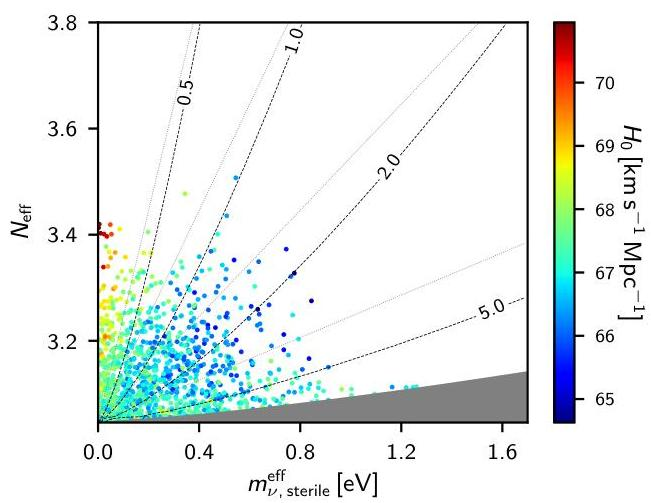

Fig. 37. Samples from Planck TT,TE,EE+lowE+lensing, colour coded by the value of the Hubble parameter $H_{0}$, for a model with minimal-mass active neutrinos and one additional sterile neutrino with mass parameterized by $m_{\nu, \text { sterile }}^{\text {eff }}$. The physical mass for thermally-produced sterile neutrinos, $m_{\text {sterile }}^{\text {thermal }}$, is constant along the grey lines labelled by the mass in eV ; the equivalent result for sterile neutrinos produced via the Dodelson-Widrow mechanism (Dodelson \& Widrow 1994) is shown by the adjacent thinner lines. The dark grey shaded region shows the part of parameter space excluded by our default prior $m_{\text {sterile }}^{\text {thermal }}<10 \mathrm{eV}$, where the sterile neutrinos would start to behave like dark matter for CMB constraints.

Restricting ourselves to the more physically motivated models with $\Delta N_{\text {eff }}>0$, the one-tailed Planck TT,TE,EE +lowE+lensing+BAO constraint is $\Delta N_{\text {eff }}<0.30$ at $95 \%$. This rules out light thermal relics that decoupled after the QCD phase transition (although new species are still allowed if they decoupled at higher temperatures and with $g$ not too large). Figure 36 shows the detailed constraint as a function of decoupling temperature, assuming only light thermal relics and other Standard Model particles.

### 7.5.3. Joint constraints on neutrino mass and $N_{\text {eff }}$

There are various theoretical scenarios in which it is possible to have both sterile neutrinos and neutrino mass. We first consider the case of massless relics combined with the three standard degenerate active neutrinos, varying $N_{\text {eff }}$ and $\sum m_{\nu}$ together. The parameters are not very correlated, so the mass constraint is similar to that obtained when not also varying $N_{\text {eff }}$. We find:

The bounds remain very close to the bounds on either $N_{\text {eff }}$ (Eq. 67b) or $\sum m_{\nu}$ (Eq. 63b) in 7-parameter models, showing that the data clearly differentiate between the physical effects generated by the addition of these two parameters. Similar results are found without lensing and BAO data. Although the mass constraint is almost unchanged, varying $N_{\text {eff }}$ does allow for larger Hubble parameters, as shown in Fig. 34. However, as discussed in PCP15 and the previous section, this does not substantially
help to resolve possible tensions with $\sigma_{8}$ measurements from other astrophysical data.

The second case that we consider is massive sterile neutrinos combined with standard active neutrinos having a minimal-mass hierarchy, parameterizing the sterile mass by $m_{\nu, \text { sterile }}^{\text {eff }} \equiv \Omega_{\nu, \text { sterile }} h^{2}(94.1 \mathrm{eV})$ as in PCP13 and PCP15. The physical mass of the sterile neutrino in this case is $m_{\text {sterile }}^{\text {thermal }}=$ $\left(\Delta N_{\text {eff }}\right)^{-3 / 4} m_{\nu, \text { sterile }}^{\text {eff }}$ assuming a thermal sterile neutrino, or $m_{\text {sterile }}^{\text {DW }}=\left(\Delta N_{\text {eff }}\right)^{-1} m_{\nu, \text { sterile }}^{\text {eff }}$ in the case of production via the mechanism described by Dodelson \& Widrow (1994). For low $\Delta N_{\text {eff }}$ the physical mass can therefore become large, in which case the particles behave in the same way as cold dark matter. In our grid of parameter chains we adopt a prior that $m_{\text {sterile }}^{\text {thermal }}<$ 10 eV (and necessarily $\Delta N_{\text {eff }} \geq 0$ ) to exclude parameter space that is degenerate with a change in the cold dark matter density; as we show in Fig. 37, detailed constraints will depend on this choice of prior. Assuming $m_{\text {sterile }}^{\text {thermal }}<10 \mathrm{eV}$ we find

$$
\left.\begin{array}{c}
N_{\text {eff }}<3.29 \\
m_{\nu, \text { sterile }}^{\text {eff }}<0.65 \mathrm{eV}
\end{array}\right\} \begin{aligned}
& 95 \%, \text { Planck TT,TE,EE+lowE } \\
& + \text { lensing+BAO }
\end{aligned}
$$

or adopting a stronger prior of $m_{\text {sterile }}^{\text {thermal }}<2 \mathrm{eV}$, we obtain the stronger constraint

The mass constraint in Eq. (70a) actually appears weaker than in PCP15; this is because the change in optical depth reduces the high- $N_{\text {eff }}$ parameter space, and the remaining lower- $N_{\text {eff }}$ parameter space has significant volume associated with models having relatively large $m_{\nu, \text { sterile }}^{\text {eff }}$ (close to the $m_{\text {sterile }}^{\text {thermal }}$ prior cut). Removing this high-physical-mass parameter space by tightening the prior to 2 eV gives the mass constraint in Eq. (70b), which is substantially tighter than the result quoted in PCP15 without high- $\ell$ polarization.

One thermalized sterile neutrino with $\Delta N_{\text {eff }}=1$ is excluded at about $6 \sigma$ irrespective of its mass, or at about $7 \sigma$ when assuming a mass $m_{\text {sterile }}^{\text {DW }} \approx 1 \mathrm{eV}$. This is especially interesting in the context of the controversial evidence for light sterile neutrinos, invoked to explain the neutrino short baseline (SBL) anomaly. The latest MiniBooNE data on electron-neutrino appearance (Aguilar-Arevalo et al. 2018) support previous anomalous results by LSND (Aguilar-Arevalo et al. 2001), with a combined significance of $6.1 \sigma$ in favour of electron-neutrino appearance. However, this contradicts recent muon-neutrino disappearance data from MINOS+ and IceCube (Dentler et al. 2018), when considered along with electron-antineutrino disappearance results (Dentler et al. 2017; Gariazzo et al. 2018), and also appears to be excluded by OPERA (Agafonova et al. 2018). The long-standing evidence for electron-neutrino disappearance in reactor experiments has also recently been challenged by new data from STEREO (Almazán et al. 2018) and PROSPECT (Ashenfelter et al. 2018). It is worth noting, however, that removing any individual experiment does not relieve the tension between the remaining experiments, and mild tension still persists if all electron (anti-)neutrino appearance (disappearance) data are removed (see Maltoni 2018, for a detailed summary). Several analyses have shown that in order to fit the anomalous data sets with one sterile neutrino, one needs an active-sterile

neutrino mixing angle such that the fourth neutrino mass eigenstate would acquire a thermal distribution in the early Universe (see e.g., Hannestad et al. 2013; Bridle et al. 2017; Knee et al. 2018), thus contributing as $\Delta N_{\mathrm{eff}} \approx 1 .{ }^{39}$ Our Planck results confirm that the presence of a light thermalized sterile neutrino is in strong contradiction with cosmological data, and that the production of sterile neutrinos possibly explaining the SBL anomaly would need to be suppressed by some non-standard interactions (Archidiacono et al. 2016; Chu et al. 2015), low-temperature reheating (de Salas et al. 2015), or another special mechanism.

### 7.6. Big-bang nucleosynthesis

### 7.6.1. Primordial element abundances

Primordial helium. The latest estimates of the primordial helium abundance come from the data compilations of Aver et al. (2015), giving $Y_{\mathrm{p}}^{\mathrm{BBN}} \equiv 4 n_{\mathrm{He}} / n_{\mathrm{b}}=0.2449 \pm 0.0040(68 \% \mathrm{CL})$ and Peimbert et al. (2016), giving a slightly tighter constraint $Y_{\mathrm{p}}^{\mathrm{BBN}}=0.2446 \pm 0.0029(68 \% \mathrm{CL})$. These two estimates are consistent with each other. Izotov et al. (2014) find a higher value, $Y_{\mathrm{p}}^{\mathrm{BBN}}=0.2551 \pm 0.0022(68 \% \mathrm{CL})$ in moderate $(2.2 \sigma$ to $2.9 \sigma)$ tension with the previous two. Aver et al. (2015) discuss the differences between their results and Izotov et al. (2014), which are caused by modelling differences involving neutral hydrogen collisional emission, corrections for dust absorption, and helium emissivities, amongst other effects. This raises the issue, which has long-plagued helium abundance measurements, of whether the systematic errors are accurately incorporated in the quoted uncertainties. In this paper, we will use the more conservative Aver et al. (2015) results as the baseline; however, we will occasionally quote bounds based on the combined Aver et al. (2015) and Peimbert et al. (2016) results ( $Y_{\mathrm{p}}^{\mathrm{BBN}}=0.2447 \pm 0.0023$ $(68 \% \mathrm{CL})$ ) and for the Izotov et al. (2014) results.

Compared to the measurement used in PCP15, the Aver et al. (2015) error bar has decreased by a factor of 2.4. To relate the primordial helium abundance to early Universe parameters under the assumption of standard BBN, we use two public BBN codes: first, version 1.10 of PArthENoPE ${ }^{40}$ (Pisanti et al. 2008); and second, the recently released PRDMAT code ${ }^{41}$ (Pitrou et al. 2018). The most relevant particle physics parameter for heliumabundance calculations is the neutron lifetime. PArthENoPE 1.10 uses the average value $\tau_{\mathrm{n}}=(880.2 \pm 1.0) \mathrm{s}(68 \% \mathrm{CL})$ taken from the Particle Data Group summary (Patrignani et al. 2016). This is a very small shift with respect to the value of $\tau_{\mathrm{n}}=$ $(880.3 \pm 1.1)$ s used in PCP15. The PRIMAT code uses instead an average over post-2000 measurements only, $\tau_{\mathrm{n}}=(879.5 \pm 0.8) \mathrm{s}$ ( $68 \%$ CL, Serebrov et al. 2018). The two codes find (consistently) that uncertainties of $\sigma\left(\tau_{\mathrm{n}}\right)=1.0 \mathrm{~s}$ and 0.8 s correspond to theoretical errors for the helium fraction of $\sigma\left(Y_{\mathrm{p}}^{\mathrm{BBN}}\right)=3.0 \times 10^{-4}$ and $2.4 \times 10^{-4}$, respectively. Given the Planck result for the baryon density in the base- $\Lambda$ CDM model,

$$
\omega_{\mathrm{b}}=0.02236 \pm 0.00029 \quad(95 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})
$$

[^0]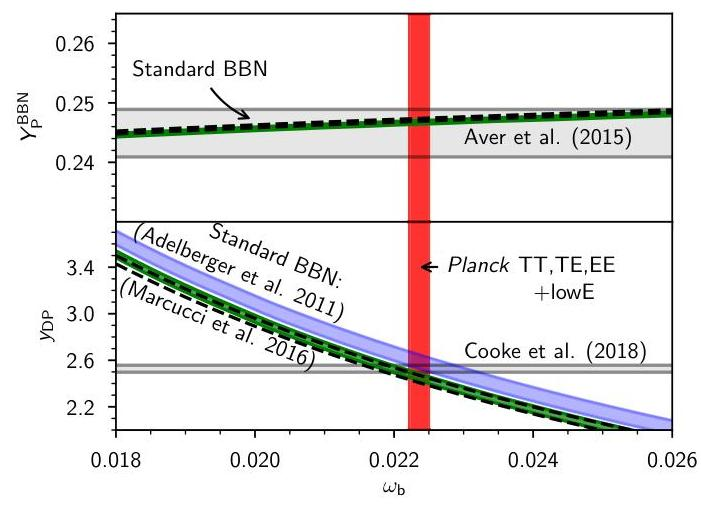

Fig. 38. Summary of BBN results with $N_{\text {eff }}=3.046$, using Planck TT,TE,EE+lowE. All bands are $68 \%$ credible intervals. The standard BBN predictions computed with PArthENoPE are shown in green (case (b) in the text), while those from PRDMAT are in black dashed lines (case (c)). The blue lines show the PArthENoPE results based on the experimental determination of nuclear rates by Adelberger et al. (2011), instead of the theoretical rate of Marcucci et al. (2016, case (a)).

## PArthENoPE predicts

$$
Y_{\mathrm{P}}^{\mathrm{BBN}}=0.24672_{-(0.00012) 0.0006)}^{+(0.00012) 0.0006)} \quad(95 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})
$$

while PRIMAT gives

$$
Y_{\mathrm{P}}^{\mathrm{BBN}}=0.24714_{-(0.00013) 0.00049}^{+(0.00013) 0.00049}(95 \%, \mathrm{TT}, \mathrm{TE}, \mathrm{EE}+\mathrm{lowE})
$$

The first set of error bars (in parentheses) reflects only the uncertainty on $\omega_{\mathrm{b}}$, while the second set includes the theoretical uncertainty $\sigma\left(Y_{\mathrm{p}}^{\mathrm{BBN}}\right)$ added in quadrature. The two mean values are shifted by $\Delta Y_{\mathrm{p}}^{\mathrm{BBN}} \approx 4.2 \times 10^{-4}$ because of differences in the adopted neutron lifetime and because PRIMAT includes a more elaborate treatment of weak interaction rates. However, this shift is quite close to the theoretical errors estimated from both codes, and about an order of magnitude smaller that the observational error quoted by Aver et al. (2015). As shown in Fig. 38, the results from both codes lie well within the region favoured by the Aver et al. (2015) observations. They are also compatible at the $1 \sigma$ level with the combined Aver et al. (2015) and Peimbert et al. (2016) results, but in $3.6-3.8 \sigma$ tension with the Izotov et al. (2014) results. Evidently, there is an urgent need to resolve the differences between the helium abundance measurements and this tension should be borne in mind when we use the Aver et al. (2015) measurements below.
Primordial deuterium. There has been significant progress related to deuterium abundance determination since the completion of PCP15. On the observational side, Cooke et al. (2018) have published a new estimate based on their best seven measurements in metal-poor damped Ly $\alpha$ systems, $\gamma_{\mathrm{DP}} \equiv$ $10^{5} n_{\mathrm{D}} / n_{\mathrm{H}}=2.527 \pm 0.030(68 \% \mathrm{CL})$. On the calculational side, the value of the nuclear reaction rate $d(p, \gamma)^{3} \mathrm{He}$, which has a major impact on BBN computations of the primordial deuterium calculation, has now been calculated ab initio. The


[^0]:    ${ }^{39}$ Note that $\Delta N_{\mathrm{eff}}$ could in principle be reduced if there was a small amount of lepton asymmetry in the early Universe; however, this would raise other types of problems (Saviano et al. 2013).
    ${ }^{40}$ http://parthenope.na.infn.it. Note that PArthENoPE already exists in version 2.0, but the difference with respect to 1.10 is only at the level of numerical methods and performance. The physical input data and results are identical.
    ${ }^{41}$ http://www2.iap.fr/users/pitrou/primat.htm

most recent theoretical calculation is presented in Marcucci et al. (2016, leading to a smaller value of $y_{\mathrm{DP}}$ ) and differs significantly from previous predictions extrapolated from laboratory experiments by Adelberger et al. (2011). This issue should be settled by forthcoming precise measurements by the LUNA experiment (Gustavino 2017). In this paper we will compare the results obtained when the deuterium fraction is computed in three different ways:
(a) with PArthENoPE, assuming the experimental rate from Adelberger et al. (2011);
(b) with PArthENoPE, using the theoretical rate of Marcucci et al. (2016);
(c) with PRIMAT, using the rate from Iliadis et al. (2016), based on a hybrid method that consists of assuming the energy dependence of the rate computed ab initio by Marcucci et al. (2005) and normalizing it with a fit to a selection of laboratory measurements.

In addition to the $d(p, \gamma)^{3} \mathrm{He}$ reaction rates, the current versions of PArthENoPE, PRIMAT, and other codes (such as that developed by Nollett \& Burles 2000; Nollett \& Holder 2011) make different assumptions on other rates, in particular those of the deuterium fusion reactions $d(d, n)^{3} \mathrm{He}$ and $d(d, p)^{3} \mathrm{H}$, which also contribute significantly to the error budget of the primordial deuterium fraction. PArthENoPE estimates these rates by averaging over all existing measurements, while PRIMAT again uses a hybrid method based on a subset of the existing data. When using one of approaches (a), (b), or (c), we adopt different theoretical errors. For (a), Adelberger et al. (2011) estimate that the error in their extrapolated rate propagates to $\sigma\left(y_{\mathrm{DP}}\right)=0.06$. For (b), we rely on the claim by Marcucci et al. (2016) that the error is now dominated by uncertainties on deuterium fusion and propagates to $\sigma\left(y_{\mathrm{DP}}\right)=0.03$. For (c), the error computed by PRIMAT (close to the best-fit value of $\omega_{\mathrm{b}}$ ) is similar, $\sigma\left(y_{\mathrm{DP}}\right)=0.032$.

These systematic error estimates are consistent with the differences between different BBN codes. Taking $d(p, \gamma)^{3} \mathrm{He}$ from Marcucci et al. (2016), the prediction of PArthENoPE 1.10 is higher than that of the code by Nollett \& Holder (2011) by about $\Delta y_{\mathrm{DP}}=0.04$, which is comparable to the theoretical error adopted in this paper. Nollett \& Holder (2011) attribute this shift to their different assumptions on the deuterium fusion rates. The shift between cases (b) and (c) is smaller, $\Delta y_{\mathrm{DP}}=0.015$, suggesting that differences in $d(p, \gamma)^{3} \mathrm{He}$ and in the deuterium fusion rates nearly compensate each other in the final result.

Nuclear rate uncertainties are critically important in the discussion of the compatibility between deuterium measurements and CMB data. Cooke et al. (2018) reported that their measurement of primordial deuterium was in moderate $2.0 \sigma$ tension with the Planck baryon density from PCP15. This is based on the predictions of the code of Nollett \& Holder (2011) with the nuclear rate of Marcucci et al. (2016). Switching to PArthENoPE (b) and including the theoretical error $\sigma\left(y_{\mathrm{DP}}\right)=0.03$, we find consistency to $1.1 \sigma$. With our three BBN calculation pipelines, the deuterium abundance measurement of Cooke et al. (2018) translates into the following bounds on $\omega_{\mathrm{b}}$,
(a) $\omega_{\mathrm{b}}=0.02270 \pm 0.00075$
(b) $\omega_{\mathrm{b}}=0.02198 \pm 0.00044$
(c) $\omega_{\mathrm{b}}=0.02189 \pm 0.00046$

## $95 \%$ <br> Cooke (2018),

including theoretical errors. In several places in this work and in PL2018, we refer to a "conservative BBN prior," $\omega_{\mathrm{b}}=0.0222 \pm$ $0.0005(68 \% \mathrm{CL})$, set to be compatible with each of these three predictions.
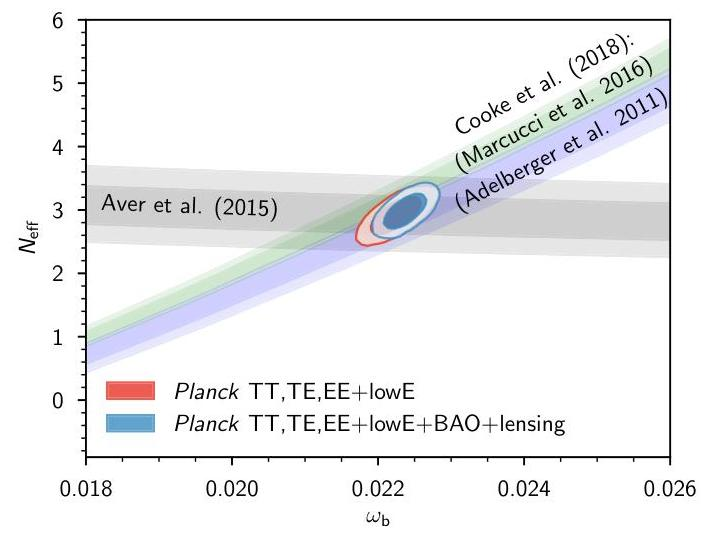

Fig. 39. Constraints in the $\omega_{\mathrm{b}}-N_{\text {eff }}$ plane from Planck TT,TE,EE +lowE and Planck TT,TE,EE+lowE+BAO+lensing data ( $68 \%$ and $95 \%$ contours) compared to the predictions of BBN combined with primordial abundance measurements of helium (Aver et al. 2015, in grey) and deuterium (Cooke et al. 2018, in green and blue, depending on which reaction rates are assumed). In the CMB analysis, $N_{\text {eff }}$ is allowed to vary as an additional parameter to the base- $\Lambda$ CDM model, while $Y_{\mathrm{P}}$ is inferred from $\omega_{\mathrm{b}}$ and $N_{\text {eff }}$ according to BBN predictions. For clarity we only show the deuterium predictions based on the PArthENoPEcode with two assumptions on the nuclear rate $d(p, \gamma)^{3} \mathrm{He}$ (case (a) in blue, case (b) in green). These constraints assume no significant lepton asymmetry.

We now update this discussion using the latest Planck results. With our three assumptions (a), (b), and (c) on standard BBN, the determination of $\omega_{\mathrm{b}}$ by Planck 2018 for the base$\Lambda$ CDM model (see Eq. 71) implies
(a) $y_{\mathrm{DP}}=2.587_{-0.052(0.13}^{+0.053(0.13)}$
(b) $y_{\mathrm{DP}}=2.455_{-0.053(0.081}^{+0.054(0.081)}$
(c) $y_{\mathrm{DP}}=2.439_{-0.051(0.081}^{+0.051(0.081)}$
with the $\omega_{\mathrm{b}}$-only error between parentheses, followed by the total error including the theoretical uncertainty. These results are in agreement with the Cooke et al. (2018) measurement to within $0.8 \sigma, 1.4 \sigma$, and $1.7 \sigma$, respectively. Thus no significant tensions are found in any of these cases.

Other light elements. We do not discuss other light elements, such as tritium and lithium, since the observed abundance measurements and their interpretation in terms of the standard models of BBN are more controversial (see Fields 2011; Fields et al. 2014, for reviews). The Planck results do not shed any further light on these problems compared to earlier CMB experiments.
(73) Nuclear rates from bounds from Planck. The previous paragraphs highlighted the importance of assumptions on the radiative-capture process $\mathrm{d}(\mathrm{p}, \gamma)^{3} \mathrm{He}$ for deuterium abundance predictions. It is worth checking whether the comparison of CMB and deuterium abundance data provides an indirect estimate of this rate. This approach was suggested in Cooke et al. (2014) and implemented in Di Valentino et al. (2014) and

PCP15. We can now update it using the latest Planck and deuterium data.

We parameterize the thermal rate $R_{2}(T)$ of the $\mathrm{d}(\mathrm{p}, \gamma)^{3} \mathrm{He}$ process in the PArthENoPE code by rescaling the rate $R_{2}^{\mathrm{ex}}(T)$ fitted to experimental data by Adelberger et al. (2011) with a factor $A_{2}$ :
$R_{2}(T)=A_{2} R_{2}^{\mathrm{ex}}(T)$.
This factor does not account in an exact way for the differences between the experimental fit and the theoretical predictions; it should instead be seen as a consistency parameter, very much like $A_{\mathrm{L}}$ for CMB lensing in Sect. 6.2. The rate $R_{2}^{\mathrm{th}}(T)$ predicted by Marcucci et al. (2005) has a temperature dependence that is close to what is measured experimentally, and can be very well approximated by a rescaling factor $A_{2}=1.055$. The new theoretical rate obtained by Marcucci et al. (2016) has a slightly different temperature dependence but is well approximated by an effective rescaling factor $A_{2}^{\mathrm{th}}=1.16$ (Mangano \& Pisanti, private communication).

Assuming the base- $\Lambda$ CDM model, we then constrain $A_{2}$ using Planck data combined with the latest deuterium abundance measurements from Cooke et al. (2018). We still need to take into account theoretical errors on deuterium predictions arising from uncertainties on other rates, and from the difference between various codes. According to Marcucci et al. (2016) and Pitrou et al. (2018), the deuterium fusion uncertainties propagate to an error $\sigma\left(y_{\mathrm{DP}}\right)=0.03$, which encompasses the difference on deuterium predictions between PArthENoPE versus PRIMAT. Thus we adopt $\sigma\left(y_{\mathrm{DP}}\right)=0.03$ as the theoretical error on deuterium predictions in this analysis. Adding the theoretical error in quadrature to the observational error of Cooke et al. (2018), we obtain a total error of $\sigma\left(y_{\mathrm{DP}}\right)=0.042$ on deuterium, which we use in our joint fits of Planck+deutrium (D) data. We find
$A_{2}=1.138 \pm 0.072 \quad(68 \%$, Planck TT + lowE + D$)$,
$A_{2}=1.080 \pm 0.061 \quad \begin{aligned} & (68 \% \text {, Planck TT,TE,EE } \\ & + \text { lowE }+ \text { D) }\end{aligned}$
If we compare these results with those from PCP15, the tension between the Planck TT+lowE+D prediction and the experimental rate slightly increases to $1.9 \sigma$. However the inclusion of polarization brings the Planck TT,TE,EE+lowE+D prediction halfway between the experimental value and the theoretical rate of Marcucci et al. (2016), in agreement with both at the $1.3 \sigma$ level. The situation is thus inconclusive and highlights the need for a precise experimental determination of the $\mathrm{d}(\mathrm{p}, \gamma)^{3} \mathrm{He}$ rate with LUNA (Gustavino 2017).

Varying the density of relic radiation. We can also relax the assumption that $N_{\text {eff }}=3.046$ to check the agreement between CMB and primordial element abundances in the $\omega_{\mathrm{b}}-N_{\text {eff }}$ plane. Figure 39 shows that this agreement is very good, with a clear overlap of the $95 \%$ preferred regions of Planck and of the helium+deuterium measurements. This is true with any of our assumptions on the nuclear rates. For clarity in the plot, we only include the predictions of PArthENoPE (cases (a) and (b)), but those of PRIMAT are very close to case (b). Since all these data sets are compatible with each other, we can combine them to obtain marginalized bounds on $N_{\text {eff }}$, valid in the 7 -parameter

ACDM $+N_{\text {eff }}$ model, with an error bar reduced by up to $30 \%$ compared to the Planck+BAO bounds of Eq. (67b):
(a) $N_{\text {eff }}=2.89_{-0.29}^{+0.29}$
(b) $N_{\text {eff }}=3.05_{-0.27}^{+0.27}$
(c) $N_{\text {eff }}=3.06_{-0.28}^{+0.26}$
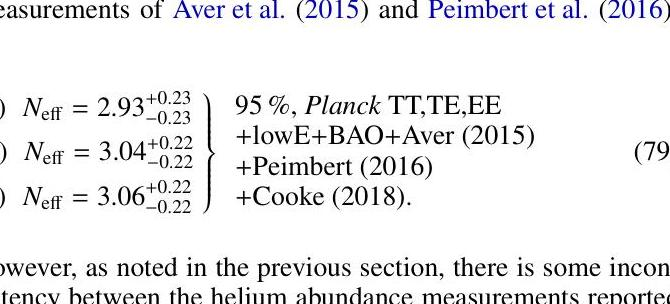
(a) $N_{\text {eff }}=2.94_{-0.27}^{+0.27}$
(b) $N_{\text {eff }}=3.10_{-0.25}^{+0.26}$
$95 \%$, Planck TT,TE,EE
+lowE+BAO+Aver (2015)
+Cooke (2018).

The bounds become even stronger if we combine the helium measurements of Aver et al. (2015) and Peimbert et al. (2016):
(a) $N_{\text {eff }}=2.93_{-0.23}^{+0.23}$
$95 \%$, Planck TT,TE,EE
$+$ lowE + BAO + Aver (2015)
(c) $N_{\text {eff }}=3.04_{-0.22}^{+0.22}$
$+$ Peimbert (2016)
$+$ Cooke (2018).

However, as noted in the previous section, there is some inconsistency between the helium abundance measurements reported by different authors. If we use the helium abundance measurement of Izotov et al. (2014) in place of Aver et al. (2015) and Peimbert et al. (2016), the mean value of $N_{\text {eff }}$ shifts by about 0.35 (e.g., for case (b), $N_{\text {eff }}=3.37 \pm 0.22$ at the $95 \%$ level), in $2.9 \sigma$ tension with the standard model value of 3.046 .

Note finally that one can obtain $N_{\text {eff }}$ bounds independently of the details of the CMB spectra at high multipoles by combining the helium, deuterium, and BAO data sets with a nearly model-independent prior on the scale of the sound horizon at decoupling inferred from Planck data, $100 \theta_{\mathrm{MC}}=1.0409 \pm 0.0006$ ( $68 \%$ ). This gives a very conservative bound, $N_{\text {eff }}=2.95_{-0.52}^{+0.56}$ $(95 \%)$, when BBN is modelled as in case (b), along with a $68 \%$ bound on the Hubble rate, $H_{0}=(67.2 \pm 1.7) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$.

### 7.6.2. CMB constraints on the helium fraction

We now allow the helium fraction to vary independently of BBN, and compare Planck constraints with expectations. In the parameter chains we vary the mass fraction $Y_{\mathrm{P}}$ and compute the nucleon fraction $Y_{\mathrm{P}}^{\mathrm{BBN}}$ as a derived parameter, obtaining
$Y_{\mathrm{P}}^{\mathrm{BBN}}=0.241 \pm 0.025(95 \%$, Planck TT,TE,EE+lowE$),(80 \mathrm{a})$
with similar results combined with lensing and BAO,

$$
\begin{aligned}
Y_{\mathrm{P}}^{\mathrm{BBN}}=0.243_{-0.024}^{+0.023} & \begin{array}{l}
(95 \% \text {, Planck TT,TE,EE+lowE } \\
+\text { lensing }+ \text { BAO })
\end{array} \\
& \text { (80b) }
\end{aligned}
$$

The Planck constraints on $Y_{\mathrm{P}}$ and $\Omega_{\mathrm{b}} h^{2}$ are shown in Fig. 40, and are in good agreement with standard BBN predictions and the helium abundance measurement of Aver et al. (2015).

Since both helium abundance and relativistic degrees of freedom affect the CMB damping tail, they are partially degenerate. Allowing $N_{\text {eff }}$ to also vary in addition to $Y_{\mathrm{P}}$, we obtain the somewhat weaker constraints:

$$
\left.\begin{array}{c}
Y_{\mathrm{P}}^{\mathrm{BBN}}=0.247_{-0.036}^{+0.034} \\
N_{\text {eff }}=2.89_{-0.57}^{+0.63} \\
\hline
\end{array}\right\} \begin{aligned}
& 95 \% \text {, Planck TT,TE,EE+lowE, } \\
& 95 \% \text {, Planck TT,TE,EE+lowE, }
\end{aligned}
$$

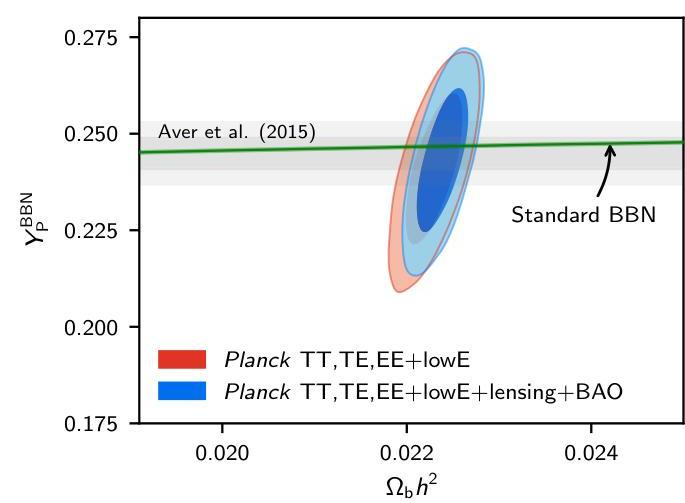

Fig. 40. Constraints on the helium abundance $Y_{\mathrm{P}}^{\mathrm{BBN}}$ from Planck, assuming the standard value of $N_{\text {eff }}=3.046$. Results are consistent with the predictions of standard BBN (green line), and also the observed helium abundance ( $68 \%$ and $95 \%$ grey bands from Aver et al. 2015).
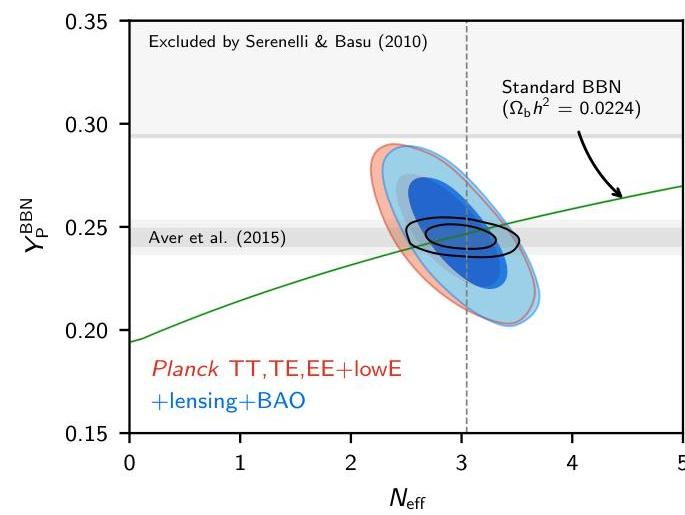

Fig. 41. Constraints on the helium abundance $Y_{\mathrm{P}}^{\mathrm{BBN}}$ and number of effective neutrino species $N_{\text {eff }}$ from Planck TT,TE,EE +lowE and in combination with lensing and BAO. Results are consistent with the predictions of standard BBN (green line), and also the observed helium abundance ( $68 \%$ and $95 \%$ grey bands from Aver et al. 2015). The grey band at the top shows a conservative $95 \%$ upper bound inferred from the Solar helium abundance (Serenelli \& Basu 2010). The black contours show the joint BBN-independent constraint from combining Planck TT,TE,EE+lowE+lensing+BAO and Aver et al. (2015).

$$
\left.\begin{array}{rl}
Y_{\mathrm{P}}^{\mathrm{BBN}} & =0.246 \pm 0.035, \\
N_{\mathrm{eff}} & =2.97_{-0.54}^{+0.58}, \\
& \\
N_{\mathrm{eff}} & \left\{\begin{array}{l}
95 \%, \text { Planck TT,TE,EE }+ \text { lowE } \\
+ \text { lensing }+ \text { BAO. }
\end{array}\right.
$$

These constraints are shown in Fig. 41, and are again entirely consistent with standard assumptions. The direct helium abundance measurement of Aver et al. (2015) provides significantly tighter constraints than those from Planck CMB measurements. By combining Planck with Aver et al. (2015) we obtain a
slightly tighter BBN-independent constraint on $N_{\text {eff }}$, while substantially improving the $Y_{\mathrm{P}}^{\mathrm{BBN}}$ result:

$$
\left.\begin{array}{rl}
Y_{\mathrm{P}}^{\mathrm{BBN}} & =0.2437_{-0.0080}^{+0.0077}, \\
N_{\mathrm{eff}} & =2.99_{-0.40}^{+0.43}, \\
& \\
N_{\mathrm{eff}} & \left\{\begin{array}{l}
95 \%, \text { Planck TT,TE,EE } \\
+ \text { lowE }+ \text { lensing }+ \text { BAO }+ \text { Aver } \\
(2015)
\end{array}\right.
$$

In our main grid results we assume that $Y_{\mathrm{P}}$ can be determined accurately using standard BBN predictions from PArthENoPE based on a neutron lifetime $\tau_{\mathrm{n}}=(880.2 \pm 1.0) \mathrm{s}$. This uncertainty on $\tau_{\mathrm{n}}$ is sufficiently small that it has negligible impact on constraints for non-BBN parameters.

If the $\tau_{\mathrm{n}}$ constraint is relaxed, for example to allow a systematic shift towards the beam measurement $\tau_{\mathrm{n}}=[887 \pm 1.2$ (stat. $) \pm$ 1.9(sys, ) $]$ s of Yue et al. (2013), there would be a slight shift in cosmological parameters; however, taking the central value of $\tau_{\mathrm{n}} \approx 887 \mathrm{~s}$ would shift $\Lambda$ CDM parameters by at most $0.2 \sigma$ (for $\theta_{\mathrm{MC}}$ ). As shown in Table 5 the base- $\Lambda$ CDM parameters are very stable to marginalization over $Y_{\mathrm{P}}$ with no constraint, at the expense of only modest increase in uncertainties. There is therefore only very limited scope for shifting the main Planck parameters by changing the BBN model, especially given the BBNindependent requirement of consistency with the observed helium abundances of Aver et al. (2015).

Finally, we can assume that standard BBN is an accurate theory, but take $\tau_{\mathrm{n}}$ as a free parameter to obtain an indirect constraint on the neutron lifetime from CMB or CMB+helium data. This is potentially interesting in the context of the longstanding difference between neutrino lifetime measurements performed by beam and bottle experiments. The PDG result, $\tau_{\mathrm{n}}=(880.2 \pm 1.0) \mathrm{s}$, is based on an average over two beam and five bottle experiments (Patrignani et al. 2016). The beam-only average gives $\tau_{\mathrm{n}}=(888.0 \pm 2.0) \mathrm{s}$, while the bottle-only average yields $\tau_{\mathrm{n}}=(879.2 \pm 0.6) \mathrm{s}$; these determinations are in $4.0 \sigma$ tension. To derive an independent prediction, following the lines of Salvati et al. (2016), we combine our $\Lambda$ CDM $+Y_{\mathrm{P}}$ chains with the function $Y_{\mathrm{P}}^{\mathrm{BBN}}\left(\omega_{\mathrm{b}}, \tau_{\mathrm{n}}\right)$ predicted by PArthENoPE or PRIMAT to obtain a posterior probability distribution in $\left(\omega_{\mathrm{b}}, \tau_{\mathrm{n}}\right)$ space. ${ }^{42}$ After marginalizing over $\omega_{\mathrm{b}}$, for CMB-only data, we find
$\tau_{\mathrm{n}}=(851 \pm 60) \mathrm{s} \quad(68 \%$, Planck TT,TE,EE+lowE $)$,
using PRIMAT (or, with PArthENoPE, $\tau_{\mathrm{n}}=(855 \pm 62$ ) s). Adding helium measurements from Aver et al. (2015), we find
$\tau_{\mathrm{n}}=(867 \pm 18) \mathrm{s} \quad(68 \%$, Planck TT,TE,EE+lowE
$\left.+\operatorname{Aver}(2015)\right)$,
using PRIMAT (or, with PArthENoPE, $\tau_{\mathrm{n}}=(870 \pm 18) \mathrm{s}$ ). These results do not provide a statistically significant preference for either the beam or bottle values. If we make a similar prediction by combining Planck with the helium measurement of Izotov et al. (2014), we obtain a range, $\tau_{\mathrm{n}}=(920 \pm 11) \mathrm{s}(68 \% \mathrm{CL})$, in $3.6 \sigma$ tension with all direct measurements of the neutron lifetime; this is a potentially interesting result, emphasizing again the need to resolve tensions between different analyses of the primordial helium abundance.

[^0]
[^0]:    ${ }^{42}$ For simplicity, here we fix the extra relativistic degrees of freedom to the standard value $N_{\text {eff }}=3.046$; see Salvati et al. (2016) for discussion.

### 7.7. Recombination history

The cosmological recombination era marks an important phase in the history of the Universe, determining precisely how CMB photons decoupled from baryons around redshift $z \approx 10^{3}$ (Sunyaev \& Zeldovich 1970; Peebles \& Yu 1970). With precision data from Planck, we can test physical assumptions of the recombination process (Hu et al. 1995; Seljak et al. 2003), studying both standard and non-standard physics.

The Planck data are sensitive to several subtle atomic physics and radiative-transfer effects (see e.g., Chluba \& Sunyaev 2006; Kholupenko et al. 2007; Switzer \& Hirata 2008) that were omitted in earlier calculations of the recombination history (Zeldovich et al. 1968; Peebles 1968; Seager et al. 2000). These effects can lead to significant biases to several cosmological parameters (e.g., Rubiño-Martín et al. 2010; Shaw \& Chluba 2011); however, as the Planck 2015 analysis confirmed, at the present level of precision these can be reliably incorporated within the advanced recombination codes CosmoRec (Chluba \& Thomas 2011) and HyRec (Ali-Haïmoud \& Hirata 2010), as well as the recfast code (Seager et al. 1999; Wong et al. 2008), modified using corrections calculated with the more precise codes.

In this section, we update the PCP15 search for deviations from the standard recombination history. In particular, improved polarization data provide additional constraining power that warrants revisiting this question. As in 2015, we find no significant indication for departures of the recombination history from the standard prediction.

We use a semi-blind eigen-analysis (often referred to as a principal-component analysis) of deviations of the free-electron fraction, $x_{\mathrm{e}}(z)=n_{\mathrm{e}} / n_{\mathrm{H}}$, where $n_{\mathrm{H}}$ denotes the number density of hydrogen nuclei, away from the standard recombination history (Farhang et al. 2012, 2013). Specifically, a perturbation, $\delta x_{\mathrm{e}}(z) / x_{\mathrm{e}}^{\mathrm{hd}}(z)$, is expanded in $N_{z}=80$ bands of $\delta z$, spanning redshifts from well before helium recombination to well past hydrogen recombination (taken to be $200 \leq z \leq 3500$ ). Here, $x_{\mathrm{e}}^{\mathrm{hd}}(z)$ describes the ionization history, assuming the standard recombination physics and using the best-fitting cosmological parameters from Planck TT,TE,EE+lowE.

We then form the Fisher information matrix for the $N_{z}+N_{\text {std }}+$ $N_{\text {min }}$ parameters, corresponding to the $x_{\mathrm{e}}$-perturbation, standard cosmological, and nuisance parameters, respectively. The Fisher matrix is then inverted to obtain the parameter-parameter correlation matrix. Our focus is on the $N_{z} \times N_{z}$ block of this Fisher inverse, containing the marginalized errors and correlations of the $x_{\mathrm{e}}$ parameters. The $x_{\mathrm{e}}$ block is diagonalized, and the corresponding diagonal variances are rank-ordered from the lowest to highest fluctuation variance (i.e., from the best to worst constrained mode). The rotation diagonalizing the Fisher inverse defines the $x_{\mathrm{e}}$ eigenmodes. Truncation of the eigenmode hierarchy to determine the number of $x_{\mathrm{e}}$ modes used for parameter estimation is performed according to some suitably chosen selection criterion. We refer to these modes as "eXeMs", the first three of which are shown in Fig. 42. Only a small number are probed by Planck 2018 data, even with the addition of the higher quality polarization information. If instead we diagonalized the $N_{z}$ block of the Fisher matrix before inverting, the modes would be characterized by the fixed best-fitting cosmological and nuisance parameter values, i.e., they would not be marginalized. Those $x_{\mathrm{e}}$ modes differ from the eXeMs, but would give similar results (as discussed in Farhang et al. 2012).

For our analysis, we use the eXeMs, applying them to the Planck TT,TE,EE+lowE+lensing+BAO data combination. By
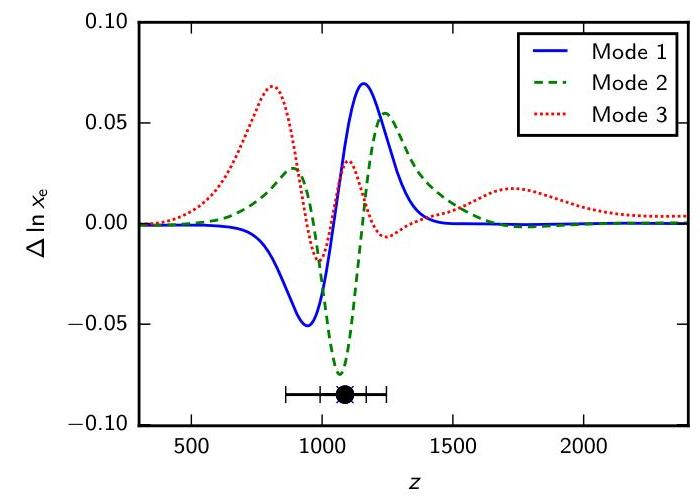

Fig. 42. First three normalized $x_{\mathrm{e}}$ modes constructed using the Planck TT,TE,EE+lowE likelihood. The modes are marginalized over standard and nuisance parameters. The forecast measurement uncertainties for the mode amplitudes are $\sigma_{\mu_{1}}=0.16$, $\sigma_{\mu_{2}}=0.23$, and $\sigma_{\mu_{3}}=0.73$. The position and width of the Thomson visibility function are indicated by the error bars at the bottom of the figure.

Table 9. Standard cosmological parameters, along with the first three $x_{\mathrm{e}}$-mode amplitudes, as determined using Planck TT,TE,EE+lowE+lensing+BAO (all errors are $68 \%$ CL).

| Parameter | +1 mode | +2 modes | +3 modes |
| :-- | :--: | :--: | :--: |
| $100 \Omega_{\mathrm{b}} h^{2} \ldots$ | $2.241 \pm 0.016$ | $2.241 \pm 0.018$ | $2.239 \pm 0.018$ |
| $\Omega_{\mathrm{c}} h^{2} \ldots \ldots$ | $0.1191 \pm 0.0009$ | $0.1192 \pm 0.0010$ | $0.1192 \pm 0.0010$ |
| $H_{0} \ldots \ldots$ | $67.72 \pm 0.43$ | $67.72 \pm 0.44$ | $67.84 \pm 0.45$ |
| $\tau \ldots \ldots$ | $0.054 \pm 0.007$ | $0.055 \pm 0.007$ | $0.055 \pm 0.007$ |
| $n_{s} \ldots \ldots$ | $0.9667 \pm 0.0051$ | $0.9668 \pm 0.0050$ | $0.9657 \pm 0.0051$ |
| $\ln \left(10^{10} A_{s}\right) \ldots$ | $3.042 \pm 0.015$ | $3.042 \pm 0.014$ | $3.040 \pm 0.015$ |
| $\mu_{1} \ldots \ldots$ | 0.0220 | 0.0120 | 0.030 |
| $\mu_{2} \ldots \ldots$ | $\ldots$ | 0.0127 | 0.050 |
| $\mu_{3} \ldots \ldots$ | $\ldots$ | $\ldots$ | $-0.84 \pm 0.69$ |

construction, these modes are orthogonal to each other; ${ }^{43}$ however, correlations arise once the standard and nuisance parameters are varied. This slightly modifies the errors and can also cause small parameter biases (Farhang et al. 2012). Although the lowest order $x_{\mathrm{e}}$ modes given in PCP15 look similar to those for the 2018 data, the precision of the Planck data requires the eigenanalysis to be updated around the new fiducial point in parameter space; indeed, we find subtle differences, e.g., a small shift in the position of the first mode, to which the data are sensitive.

As discussed in PCP15, the first mode corresponds mainly to a change in the width and height of the Thomson visibility function, while the second mode leads to a change in the position of the visibility peak. The third mode introduces a superposition of the change in the width, height, and position of the visibility peak. Each mode causes a response in $\delta C_{\ell} / C_{\ell}^{\text {hd }}$, as illustrated in Fig. 43.

[^0]
[^0]:    ${ }^{43}$ In practice, our mode generation method gives slight mode correlations at the level of $3-9 \%$ due to the numerical procedure and smoothing of the mode-functions (see Farhang et al. 2012, for details).

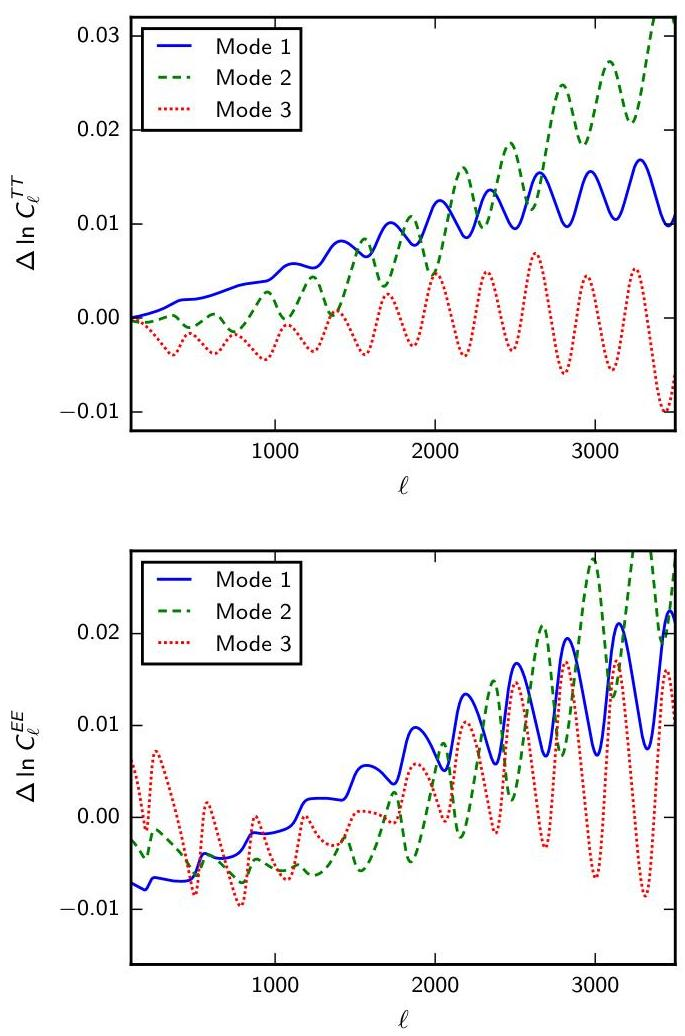

Fig. 43. Power spectrum responses to the first three $x_{\mathrm{e}}$ modes, constructed using Planck TT,TE,EE+lowE, shown in Fig. 42. For each curve, the corresponding $x_{\mathrm{e}}$ mode was added to the standard recombination history with an amplitude corresponding to their predicted $1 \sigma$ uncertainties (i.e., $\sigma_{\mu_{1}}=0.16, \sigma_{\mu_{2}}=0.23$, and $\sigma_{\mu_{3}}=0.73$ for the first three eXeMs).

In the eigen-analysis, each eXeM is multiplied by an amplitude, $\mu_{r}$, which is determined by MCMC sampling along with all of the other standard cosmological and nuisance parameters. These amplitudes and their errors are summarized in Table 9 for the data combination Planck TT,TE,EE+lowE+lensing+BAO. There is stability in the amplitudes as the mode number is increased, and all are consistent with no deviation from standard recombination within the errors. We also find that cosmological parameters do not shift with the inclusion of these modes, agreeing well (though with slightly larger errors) with the $\Lambda$ CDM values computed assuming the standard recombination history. The four-mode case (not reported here) gives similar results, but with slightly larger errors.

In PCP15, an equivalent exercise also showed no evidence for deviations from the standard recombination history. Using the 2015 Planck high-multipole temperature power spectra, only two modes were well-constrained; however, adding the preliminary high-multipole polarization data in PCP15 allowed a third mode to be constrained. The 2018 Planck temperature and im-
proved polarization data used in this paper provide a more robust analysis. Relative to 2015, we find comparable errors on the first and second mode amplitudes and a small decrease in the uncertainty of the third mode amplitude.

### 7.8. Reionization

At scales smaller than the horizon size at reionization $(\ell \gtrsim 10)$, free electrons generated during reionization can scatter and partially damp the CMB anisotropies. This leads to a mostly scaleindependent suppression of power above $\ell \approx 10$ by a factor of $e^{2 \tau}$, where $\tau$ is the total integrated optical depth to reionization, related to the free electron fraction $x_{\mathrm{e}}(z) \equiv n_{\mathrm{e}}^{\text {reion }}(z) / n_{\mathrm{H}}(z)$ by

$$
\tau=n_{\mathrm{H}}(0) c \sigma_{\mathrm{T}} \int_{0}^{z_{\max }} d z x_{\mathrm{e}}(z) \frac{(1+z)^{2}}{H(z)}
$$

Here $n_{\mathrm{e}}^{\text {reion }}(z)$ is the number density of free electrons from reionization, $n_{\mathrm{H}}(z)$ is the total number of hydrogen nuclei, and $\sigma_{\mathrm{T}}$ is the Thomson scattering cross-section. We set $z_{\max }=50$, which is early enough to capture the entirety of the expected contribution from reionization. We assume that the first reionization of helium happens at the same time as the reionization of hydrogen, so complete first reionization corresponds to $x_{\mathrm{e}}>1$. There is an additional increase in $x_{\mathrm{e}}$ at $z \leq 3.5$ when the helium is fully ionized; this only has a small contribution to $\tau$ and in all cases we model it with a simple smooth transition at $z=3.5$.

At large scales in polarization $(\ell \leq 30)$, anisotropies are instead created by the rescattering of the local temperature quadrupole, which varies maximally across Hubble-sized patches. This leads to a "bump" today in the large-scale polarization power spectrum at the Hubble scale during reionization. The amplitude of the bump scales like $\tau^{2}$, but the exact shape encodes information on the detailed evolution of the ionization fraction and can therefore constrain $x_{\mathrm{e}}(z)$ (Zaldarriaga et al. 1997; Kaplinghat et al. 2003). Conversely, the inferred value of $\tau$ depends on the model assumed for $x_{\mathrm{e}}(z)$, thus the reionization history has implications for other cosmological parameters, which are important to quantify. Throughout the 2018 papers, we use the simple TANH model for reionization (described below and in Sect. 3.3). In this section, we augment this with two other models to check whether our choice has any impact on the $\tau$ constraints, and to assess the extent to which Planck data can place model-independent bounds on reionization. The three models we use are the following.

- TANH, which assumes a smooth transition from a neutral to ionized Universe, with a parametric form for $x_{\mathrm{e}}(z)$ based on a hyperbolic tangent (see footnote 15). This model is not physically motivated, but makes the optical depth approximately independent of the transition width (Lewis 2008). It has been used previously in PCP13 and PCP15, and is the default model in these 2018 papers.
- PCA (principle-component analysis), which decomposes the reionization history into eigenmodes that form a complete basis for any observable history (Hu \& Holder 2003). In general, one must also specify a set of bounds to prevent the reconstruction from giving unphysical (e.g., negative) ionization fractions, and for this we use the optimal bounds given in Millea \& Bouchet (2018). The PCA model has some deficiencies: firstly, model parameters (the eigenmode amplitudes) do not have a straightforward physical interpretation; secondly, even with the optimal physicality bounds, physicality cannot be enforced exactly (Mortonson \& Hu 2008;

Millea \& Bouchet 2018). Nevertheless, the PCA approach serves as a useful alternative for comparison, and although we do not do so here, it can be used to construct an approximate likelihood that can be convenient way of exploring other models (Heinrich \& Hu 2018; Miranda et al. 2017).

- FlexKnot, which reconstructs any arbitrary reionization history using an interpolating function between a varying number of knots, with marginalization over the number of knots (Millea \& Bouchet 2018). Here, the model parameters are directly tied to the physical quantity of the ionization fraction, and as such physicality can be enforced by design. This model is the exact analogue of the model used in reconstructing the primordial power spectrum from Planck data (Vázquez et al. 2012; Planck Collaboration XX 2016).

For each of these models, we must also specify the prior on the model parameters, which in turn corresponds to some particular prior on $\tau$. Previous analyses of Planck data such as Heinrich et al. (2017), Obied et al. (2018), Hazra \& Smoot (2017), or Villanueva-Domingo et al. (2018), have not considered the impact of these (sometimes implicit) priors, which differed among the different analyses and consequently caused some partial disagreement between results. To allow direct comparison of $\tau$ values, unless otherwise stated we will use a prior that is uniform on $\tau$. Heinrich \& Hu (2018) construct a prior that is uniform on $\tau$, but which increases the allowed unphysical parameter space and is chosen a posteriori. Here we instead use the flat prior constructed by the procedure described in Millea \& Bouchet (2018) and Handley \& Millea (2019), which does not admit extra unphysical models and gives the most generic prior that leaves the prior on $\tau$ uniform.

Evidence based on observations of the Gunn-Peterson trough in the spectra of high-redshift quasars show that the inter-galactic medium is highly ionized by $z \approx 6$ (see e.g., Bouwens et al. 2015). We enforce this bound in the case of the TANH model by requiring that the central redshift of reionization be greater than $z=6.5$; since the assumed duration in the TANH model is $\Delta z=0.5$, this ensures that reionization is nearly complete by $z \approx 6$. The corresponding lower limit for the optical depth is $\tau \gtrsim 0.0430$, modulo some small dependence on other cosmological parameters. In the case of the FlexKnot model, the Gunn-Peterson bounds are enforced by constraining the knot redshifts to be at $z>6$. Here, because the duration of reionization is not specified and can effectively be instantaneous, the optical depth can be as low as $\tau=0.0385$. The PCA model also implicitly includes the Gunn-Peterson bounds, since the eigenmodes only have support within the range $z \in[6,30]$, although the imperfect physicality bounds do allow values of $\tau$ slightly below 0.0385 .

We begin by giving results using only the lowE large-scale polarization likelihood. As discussed in Sect. 2.2.3, this likelihood uses only $E E$ information, and is restricted to $\ell \leq 29$; we assume that the reionization information in the polarization spectrum at $\ell \geq 30$ is negligible, which is a good approximation for most models that can fit the low- $\ell$ data. The lowE data provide constraints on reionization that are largely model independent, i.e., insensitive to other cosmological parameters. For definiteness, we fix these other cosmological parameters to their bestfit values from Planck TT,TE,EE, in particular holding $A_{\mathrm{s}} e^{-2 \tau}$ rather than $A_{\mathrm{s}}$ fixed, which better reflects the impact that the $\ell \gtrsim 10$ data would have (we will comment at the end of this section on how the high- $\ell$ data affect $\tau$ ). We plot posterior constraints from lowE in the top panel of Fig. 44. One can see the moderate extent to which the hard cutoff of the Gunn-Peterson
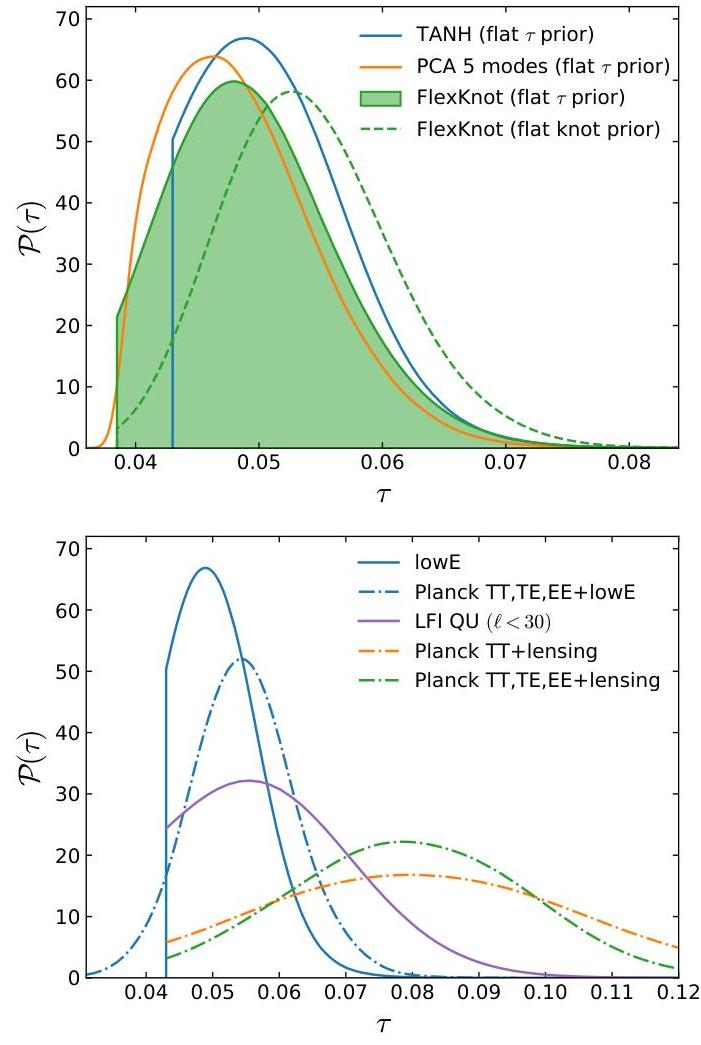

Fig. 44. Top: Marginalized constraints on the optical depth to reionization from lowE alone, assuming different models of reionization and different priors over the model parameters. Only reionization parameters are varied here, with $A_{\mathrm{s}} e^{-2 \tau}$ and other cosmological and instrumental parameters held fixed at their best-fit values from Planck TT,TE,EE. The solid lines use a flat prior on $\tau$, while the dashed line uses a flat prior on the knot amplitudes; the difference between the green lines is an example of the level to which these constraints depend on the choice of prior. Bottom: Constraints from different data sets on the optical depth assuming the TANH model and a flat $\tau$ prior (the cases that include high- $\ell$ data are indicated by dot-dashed lines and also marginalize over $\Lambda$ CDM parameters, as opposed to fixing them). The Planck TT,TE,EE+lowE line is shown without the lower bound due to measurements of the Gunn-Peterson trough, as a reminder that this bound is applied only in this section, resulting in some small extra shifts in the central values of quoted constraints between this section and the remainder of the paper.
bound informs the posterior in the TANH and FlexKnot cases (it of course also impacts the PCA case, although the imperfect physicality priors in this case lead to the more gradual cutoff visible in the figure). We find in the three cases the $68 \%$ con-

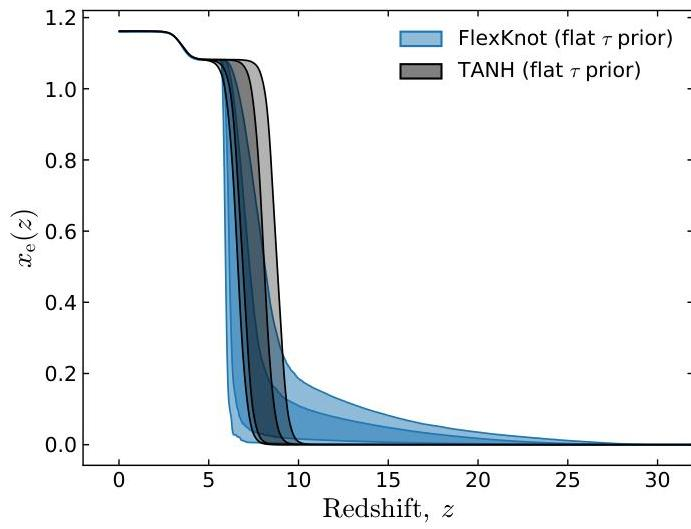

Fig.45. Constraints on the free electron fraction, $x_{e}(z)$, from lowE alone, with $A_{s} e^{-2 \tau}$ and other cosmological and instrumental parameters held fixed to their best-fit values from Planck TT,TE,EE, and with a flat prior on $\tau$. The shaded bands are middle 68th and 95th percentiles (note that this does not correspond exactly to confidence intervals). The FlexKnot constraints show that any non-zero component of reionization above a redshift of about 15 is highly disfavoured.
straints:
$\tau=0.0519_{-0.0079}^{+0.0030}$ (lowE; flat $\tau$ prior; TANH);
$\tau=0.0504_{-0.0079}^{+0.0050}$ (lowE; flat $\tau$ prior; FlexKnot);
(86b)
$\tau=0.0487_{-0.0081}^{+0.0038}$ (lowE; flat $\tau$ prior; PCA).
The three results are in good agreement, showing that the Planck data prefer a late and fast transition from a neutral to an ionized universe, which all models can capture equally well. The TANH result gives slightly higher optical depth than the others, which is primarily driven by the fixed duration of reionization assumed. The PCA result is slightly lower, and is partly affected by the imperfect physicality priors that allow unphysical negative ionization fractions. The FlexKnot result represents our best model-independent estimate of the optical depth. Nevertheless, the differences between this and the TANH result, or between the FlexKnot result using either a flat prior on $\tau$ or on the knot positions and amplitudes (the dashed line in Fig. 44), are small. For example, these differences correspond to shifts in $\sigma_{8}$ of $<0.1 \sigma$ when used in conjunction with Planck TT,TE,EE +lowE data. Thus, although future cosmological inferences will depend somewhat on the details of reionization (Allison et al. 2015; Millea \& Bouchet 2018), current Planck data are quite robust to how reionization is modelled.

The FlexKnot approach provides a model-independent reconstruction of the entire reionization history, with physicality enforced exactly. This reconstruction is presented in Fig. 45. A comparison against the TANH model is also shown; although this imposes a fixed shape on the evolution, it nevertheless matches the FlexKnot constraint fairly well. We find no preference for any significant high-redshift contribution to the optical depth. This conclusion does not depend qualitatively on our choice of prior either; we have checked both a prior that is uniform on the knot positions and amplitudes, and one that is uniform on the contribution to $\tau$ between redshifts 15 and 30,

$$
\begin{aligned}
& \tau(15,30) \text {. We find }{ }^{43}: \\
& \tau(15,30)<0.018 \text { (lowE, flat } \tau(15,30) \text {, FlexKnot); } \\
& \tau(15,30)<0.023 \text { (lowE, flat knot, FlexKnot). }
\end{aligned}
$$

This can be compared with the results of Heinrich et al. (2017) and Obied et al. (2018), who found a roughly $2 \sigma$ preference for non-zero $\tau(15,30)$ using Planck 2015 data (which included a large-scale polarization likelihood from the LFI instrument). Millea \& Bouchet (2018) showed that the majority of this preference disappeared when using the lower-noise Planck HFI SimLow likelihood (Planck Collaboration Int. XLVI 2016), with an additional sub-dominant effect due to the choice of prior.

The upper bound on the contribution from $z>15$ to the total optical depth limits some candidate explanations of the anomalously large $21-\mathrm{cm}$ signal from the EDGES experiment (Bowman et al. 2018). Some otherwise plausible explanations also lead, as a side-effect, to a significant number of ionizing photons being generated at high redshift, enough to contribute significantly to $\tau(15,30)$. These models are now highly disfavoured by the Planck bound in their simplest forms (see e.g., Ewall-Wice et al. 2018).

CMB data also probe high-redshift reionization via the patchy kinetic Sunyaev-Zeldovich (kSZ) effect (Gruzinov \& Hu 1998; Knox et al. 1998). Planck data, together with smallerscale ACT and SPT data (which are even more sensitive to this effect), give upper bounds on the amplitude of the patchy kSZ power spectrum and thus on the duration of reionization (Zahn et al. 2012; Sievers et al. 2013; Planck Collaboration Int. XLVII 2016). We do not attempt to derive new constraints here, since it is not completely straightforward to turn a limit on the amplitude of the patchy kSZ signal into one on the duration of reionization, especially given the generic non-physical models for the ionization fraction that we use here. However, in the future kSZ should be a powerful probe of the details of reionization, in particular with low-noise smallscale temperature measurements over large fractions of the sky (Smith \& Ferraro 2017; Ferraro \& Smith 2018).

The lower panel of Fig. 44 compares the optical depth posteriors from different likelihoods. Results from the large-scale LFI polarization (Planck Collaboration V 2020) are in broad agreement with lowE, although with larger errors. The Planck lensing reconstruction data described in Sect. 2.3 can also provide a completely separate (although more model-dependent) determination of the value of $\tau$; lensing is directly sensitive to $A_{s}$, and hence can partially break the $A_{s} e^{-2 \tau}$ degeneracy. By using the high- $\ell$ data in conjunction with the reconstructed lensingpotential power spectrum, both of which are sensitive to lensing, we can infer comparable constraints on $\tau$. These are shown in the bottom panel of Fig. 44. Although the peak of the $\tau$ posterior lies at higher values in this case, the difference between the $\tau$ estimates from e.g., lowE and Planck TT,TE,EE+lensing is

[^0]
[^0]:    ${ }^{44}$ Corrigendum: In the original published version of this paper, the bounds given in Eqs. (87a) and (87b) on the contribution to the earlytime optical depth, $\tau(15,30)$, contained a numerical error in deriving the 95 th percentile from the Monte Carlo samples. These corrected bounds are a factor of $\sim 3$ larger than the originally reported results. Consequently, the new bounds do not significantly improve upon previous results from Planck data presented in Millea \& Bouchet (2018) as was stated, but are instead comparable. Equations. (87a) and (87b) give results that are now similar to those of Heinrich \& Hu (2021), who used the same Planck 2018 data to derive a $95 \%$ upper bound of 0.020 using the principal component analysis (PCA) model and uniform priors on the PCA mode amplitudes.

only $1.4 \sigma$ (where we compute the difference in posterior mean with respect to the Gaussian error bars combined in quadrature). The preference for higher $\tau$ is driven by the same features in the CMB power spectrum data that prefer more lensing in $\Lambda$ CDM (giving $A_{\mathrm{L}}>1$; see Sect. 6.2): the lensing amplitude can increased by increasing $A_{\mathrm{L}}$, which at constant $A_{\mathrm{s}} e^{-2 \tau}$ also increases $\tau$. Marginalizing over non- $\Lambda$ CDM parameters, for example $\Omega_{K}$ (which can also increase lensing by having $\Omega_{K}<0$ ), can reduce the pull to higher $\tau$, but does not change $A_{\mathrm{s}} e^{-2 \tau}$ or the shape of the reionization bump significantly enough to affect the largescale polarization result. This type of model-independence has motivated our focus on only large-scale polarization data in this section, although of course constraints on $\tau$ including higher$\ell$ data (as are presented throughout the rest of this paper) are equally valid, bearing in mind which model is assumed. Also, results in other sections do not apply the lower bound from the Gunn-Peterson constraint, which reduces the posterior mean values, somewhat disguising the larger peak values of the optical depth.

Overall, the results in this section leave us with a picture of reionization that happened late and fast, and we consistent with reionization being driven by photons from massive stars in low mass galaxies (see e.g. Robertson et al. 2015; Parsa et al. 2018). Our results are also consistent with observations suggesting that the Universe is substantially neutral at redshift $z \gtrsim$ 7.5 (Banados et al. 2018; Davies et al. 2018; Mason et al. 2018). The low value of the optical depth makes the Planck constraints very robust to the details of reionization modelling, with the simple TANH model adopted in this paper causing no significant biases in other parameters.

### 7.9. Dark-matter annihilation

CMB anisotropies are sensitive to energy injection in the intergalactic medium that could be a consequence, for example, of dark-matter (DM) annihilation (see discussion in section 6.6. of PCP15 and references therein). The current CMB sensitivity to the annihilation cross section of weakly-interactive massive particles (WIMPs) is competitive with and complementary to that of indirect DM search experiments. The effective parameter constrained by CMB anisotropies is
$p_{\mathrm{ann}} \equiv f_{\mathrm{eff}} \frac{\langle\sigma v\rangle}{m_{\mathrm{r}}}$,
where $m_{\mathrm{r}}$ is the DM particle mass, $\langle\sigma v\rangle$ its thermally averaged annihilation cross-section (assumed here to be independent of temperature and redshift, as predicted for WIMPs annihilating in s-wave channels), and $f_{\text {eff }}$ is the fraction of the energy released by the annihilation process that is transferred to the intergalactic medium (IGM) around the redshifts to which the CMB anisotropy data are most sensitive, namely $z \simeq 600$ (Finkbeiner et al. 2012).

For each value of $p_{\text {ann }}$, we compute CMB anisotropies using the ExoClass branch (Stöcker et al. 2018) of class v2.6.3, with recombination solved by HyRec v2017 (Ali-Haimoud \& Hirata 2011). We assume that the energy injected by DM annihilation is immediately transferred to the IGM (the "on-the-spot" approximation), and splits between gas heating and hydrogen excitation/ionization, according to the calculations summarized in Table V of Galli et al. (2013). Helium ionization and beyond on-the-spot effects can be safely neglected here. Since CMB anisotropies are very weakly sensitive to the redshift dependence of the transferred energy fraction $f(z)$, we assume a constant fraction $f(z)=f_{\text {eff }}$.

We quote constraints on $p_{\text {ann }}^{28} \equiv p_{\text {ann }} /\left[10^{28} \mathrm{~cm}^{3} \mathrm{~s}^{-1} \mathrm{GeV}^{-1}\right]=$ $\left.17.8 p_{\text {ann }} /\left[10^{6} \mathrm{~m}^{3} \mathrm{~s}^{-1} \mathrm{~kg}^{-1}\right]\right)$

$$
\begin{aligned}
& p_{\mathrm{ann}}^{28}<3.5 \quad(95 \%, \text { Planck TT,TE,EE+lowE }) \\
& p_{\mathrm{ann}}^{28}<3.3 \quad \begin{array}{l}
(95 \%, \text { Planck TT,TE,EE+lowE } \\
+ \text { lensing }) ; \\
p_{\mathrm{ann}}^{28}<3.2
\end{array} \\
& p_{\mathrm{ann}}^{28}<3.2 \quad \begin{array}{l}
(95 \%, \text { Planck TT,TE,EE+lowE } \\
+ \text { lensing }+ \text { BAO } .
\end{array}
\end{aligned}
$$

The bound based on CMB temperature and polarization data improves by $17 \%$ compared to PCP15. The difference is driven by the new high- $\ell$ TT,TE,EE likelihood. This is consistent with the fact that in addition to changing the physics of recombination, and thus the scale and height of the acoustic peaks, DM annihilation enhances the freeze-out value of the ionization fraction of the Universe after recombination, and introduces a distinctive signature in the polarization spectrum for $\ell \leq 200$. The new bounds are not only stronger but also more robust, since polarization systematics in the Planck polarization spectra are now better understood. Adding Planck lensing and BAO further tightens the constraints.

In the baseline version of the Plik likelihood, the calibration parameters of the polarization data, which correct for polarization efficiencies, are fixed to the values computed assuming the base- $\Lambda$ CDM model, as described in Sect. 2.2.1. This is not necessarily consistent when the ionization history is substantially modified by energy injection from DM or other mechanisms. We thus performed further analyses in which the polarization calibration parameters are varied, with a flat prior within the range $0.8-1.2$. We found that our bounds remain unaffected by floating these additional nuisance parameters, which are not correlated with $p_{\text {ann }}$.

Figure 46 translates the bounds on $p_{\text {ann }}$ into joint limits on the mass $m_{\mathrm{r}}$ and annihilation cross-section $\langle\sigma v\rangle$ of DM, assuming twelve plausible WIMP s-wave annihilation channels. The value of $f_{\text {eff }}$ for each mass and channel was computed ${ }^{25}$ using the public DarkAges module of Stöcker et al. (2018), which relies on the energy transfer functions presented by Slatyer (2016b). We consistently account for corrections related to low-energy photons in the manner described in section V.B. of Slatyer (2016b). Finally, the DarkAges module defines $f_{\text {eff }}$ by convolving $f(z)$ in redshift space with the weighting function recommended by Slatyer (2016a). Note that for the $W^{+} W^{-}$and $Z^{0} Z^{0}$ channels, the bounds assume on-shell 2-body processes and are cut sharply at the mass of the daughter particle, while in reality they would extend further to the left in Fig. 46.

As usual the strongest bounds are obtained assuming annihilation into electron-positron pairs. The case of annihilation purely into neutrinos is not shown here, since the constraints are orders of magnitude weaker in that case. Assuming a thermal cross-section (shown in Fig. 46), the $95 \%$ CL lower bounds on the DM mass range from $m_{\mathrm{r}} \geq 9 \mathrm{GeV}$ for annihilation into tau/anti-tau, up to $m_{\mathrm{r}} \geq 30 \mathrm{GeV}$ for annihilation in electron/positron. To compare with hints of DM annihilation in indirect DM search data, we first show the regions preferred by the AMS/PAMELA positron fraction and Fermi/H.E.S.S. electronpositron flux, assuming s-wave annihilation into muons and standard halo profiles. These regions, taken from Cirelli et al. (2009), have long been known to be in strong tension with CMB data.

[^0]
[^0]:    ${ }^{45}$ Courtesy of P. Stöcker.

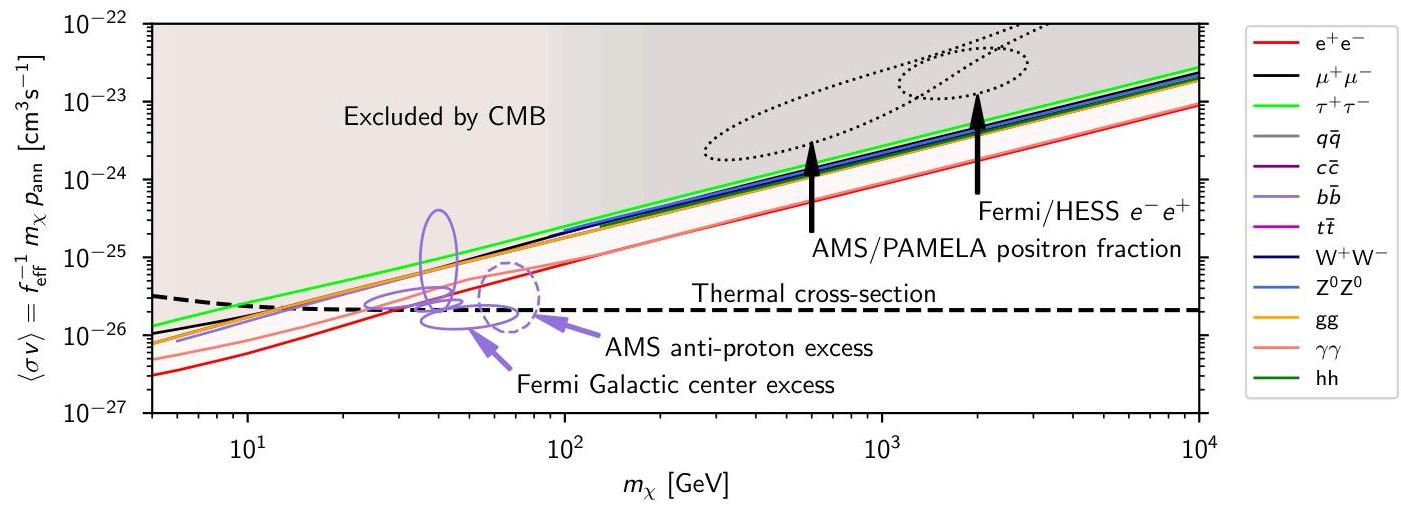

Fig. 46. Planck 2018 constraints on DM mass and annihilation cross-section. Solid straight lines show joint CMB constraints on several annihilation channels (plotted using different colours), based on $p_{\mathrm{ann}}<3.2 \times 10^{-28} \mathrm{~cm}^{3} \mathrm{~s}^{-1} \mathrm{GeV}^{-1}$. We also show the $2 \sigma$ preferred region suggested by the AMS proton excess (dashed ellipse) and the Fermi Galactic centre excess according to four possible models with references given in the text (solid ellipses), all of them computed under the assumption of annihilation into $b \bar{b}$ (for other channels the ellipses would move almost tangentially to the CMB bounds). We additionally show the $2 \sigma$ preferred region suggested by the AMS/PAMELA positron fraction and Fermi/H.E.S.S. electron and positron fluxes for the leptophilic $\mu^{+} \mu^{-}$channel (dotted contours). Assuming a standard WIMP-decoupling scenario, the correct value of the relic DM abundance is obtained for a "thermal cross-section" given as a function of the mass by the black dashed line.

We also indicate the regions suggested by the possible DM interpretation of several anomalies in indirect DM search data. The $95 \%$ CL preferred region for the AMS anti-proton excess is extracted from Cuoco et al. (2017b,a). The DM interpretation of the Fermi Galactic centre excess is very model-dependent and, as in figure 9 of Charles et al. (2016), we choose to show four results from the analyses of Gordon \& Macias (2013), Abazajian et al. (2014), Calore et al. (2015), and Daylan et al. (2016). For the Fermi Galactic centre excess and the AMS antiproton excess, we only show results assuming annihilation into $b \bar{b}$, in order to keep the figure readable. About $50 \%$ of the region found by Abazajian et al. (2014) is excluded by CMB bounds, while other regions are still compatible. The $95 \%$ CL preferred region for the AMS anti-proton excess is still compatible with CMB bounds for the $b \bar{b}$ channel shown in the figure, and we checked that this is also the case for other channels.

## 8. Conclusions

This is the final Planck collaboration paper on cosmological parameters and presents our best estimates of parameters defining the base- $\Lambda$ CDM cosmology and a wide range of extended models. As in PCP13 and PCP15 we find that the base- $\Lambda$ CDM model provides a remarkably good fit to the Planck power spectra and lensing measurements, with no compelling evidence to favour any of the extended models considered in this paper.

Compared to PCP15 the main changes in this analysis come from improvements in the Planck polarization analysis, both at low and high multipoles. The new Planck polarization maps provide a tight constraint on the reionization optical depth, $\tau$, from large-scale polarization (and are consistent with the preliminary HFI polarization results presented in Planck Collaboration Int. XLVI (2016)). This revision to the constraint on $\tau$ accounts for most of the (small) changes in parameters determined from the temperature power spectra in this paper compared to PCP15. We have characterized a number of
systematic effects, neglected in PCP15, which affect the polarization spectra at high multipoles. Applying corrections for these systematics (principally arising from errors in polarization efficiencies and temperature-to-polarization leakage) we have produced high multipole TT,TE,EE likelihoods that provide substantially tighter constraints than using temperature alone. We have compared two TT,TE,EE likelihoods that use different assumptions to correct for polarization systematics and find consistency at the $\leq 0.5 \sigma$ level. Although the TT,TE,EE likelihoods are not perfect, the Planck parameter results presented in this paper can be considered accurate to within their error bars.

Our main conclusions include the following.

- The 6-parameter base- $\Lambda$ CDM model provides a good fit to the Planck TT, TE, and EE power spectra and to the Planck CMB lensing measurements, either individually or in combination with each other.
- The CMB angular acoustic scale is measured robustly at $0.03 \%$ precision to be $\theta_{*}=(0.5965 \pm 0.0002)$, and is one of the most accurately measured parameters in cosmology, of comparable precision to the measurement of the background CMB temperature (Fixsen 2009).
- The Planck best fit base- $\Lambda$ CDM cosmology is in very good agreement with BAO, supernovae, redshift-space distortion measurements and BBN predictions for element abundance observations. There is some tension (at about $2.5 \sigma$ ) with high-redshift BAO measurements from quasar Ly $\alpha$ observations, but no standard extension of the base- $\Lambda$ CDM cosmology improves the fit to these data.
- The new low- $\ell$ polarization likelihood tightens the reionization optical depth significantly compared to the 2015 analysis, giving $\tau=0.054 \pm 0.007$, suggesting a mid-point reionization redshift of $z_{\mathrm{re}}=7.7 \pm 0.7$. This is consistent with astrophysical observations of quasar absorption lines and models in which reionization happened relatively fast and late. We investigated more general models of reionization and demonstrated that our

cosmological parameter results are insensitive to residual uncertainties in the reionization history.

- The primordial fluctuations are consistent with Gaussian purely adiabatic scalar perturbations characterized by a power spectrum with a spectral index $n_{\mathrm{s}}=0.965 \pm 0.004$, consistent with the predictions of slow-roll, single-field, inflation. Combined with BAO, we find that the Universe is spatially flat to high accuracy $\left(\Omega_{\mathrm{K}}=0.0007 \pm 0.0019\right)$, consistent the predictions of simple inflationary models. Combining with BICEPKeck 2015 data on $B$-mode polarization we find a $95 \%$ upper limit on the tensor-to-scalar ratio $r_{0.002}<0.06$. Together with our measurement of $n_{\mathrm{s}}$, these results favour concave over convex inflation potentials, suggesting a hierarchy between the slow-roll parameters measuring the slope and curvature of the potential.
- The Planck base- $\Lambda$ CDM cosmology predicts a late-time clustering amplitude $\sigma_{8}=0.811 \pm 0.006$, and matter density parameter $\Omega_{\mathrm{m}}=0.315 \pm 0.007$. The parameter $S_{8} \cong \sigma_{8} \Omega_{\mathrm{m}}^{0.5}=$ $0.831 \pm 0.013$ is compatible with DES galaxy lensing, and joint Planck-DES lensing results, although in modest tension with DES results that also include galaxy clustering, which prefer a roughly $2.5 \sigma$ lower value of $S_{8}$. There is no obvious inconsistency between the Planck base- $\Lambda$ CDM cosmology and counts of clusters (selected either through the thermal Sunyaev-Zeldovich effect or via X-ray luminosity) because of large uncertainties in the calibrations of cluster masses.
- The Planck base- $\Lambda$ CDM cosmology requires a Hubble constant $H_{0}=(67.4 \pm 0.5) \mathrm{km} \mathrm{s}^{-1} \mathrm{Mpc}^{-1}$, in substantial $4.4 \sigma$ tension with the latest local determination by Riess et al. (2019). The Planck measurement is in excellent agreement with independent inverse-distance-ladder measurements using BAO, supernovae, and element abundance results. None of the extended models that we have studied in this paper convincingly resolves the tension with the Riess et al. (2019) value of $H_{0}$.
- Allowing for extra relativistic degrees of freedom, we measure the effective number of degrees of freedom in non-photon radiation density to be $N_{\text {eff }}=2.89 \pm 0.19\left(N_{\text {eff }}=2.99 \pm 0.17\right.$ including BAO data), consistent with the value 3.046 expected in the standard model. Light thermal relics that decoupled after the QCD phase transition are ruled out at the $2 \sigma$ level. Allowing for larger $N_{\text {eff }}$ can slightly reduce tension with the local $H_{0}$ measurement and be consistent with BAO; however, the marginalized constraint on $H_{0}$ remains in tension with Riess et al. (2019) at over $3 \sigma$ and higher values of $N_{\text {eff }}$ are not favoured by element abundance observations.
- Combining Planck data with Pantheon supernovae and BAO data, the equation of state of dark energy is tightly constrained to $w_{0}=-1.03 \pm 0.03$, consistent with a cosmological constant. We have also investigated a variety of modified-gravity models, finding no significant evidence for deviations from $\Lambda$ CDM.
- Allowing for a free degenerate active neutrino mass, and combining with BAO measurements, we obtain the tight $95 \%$ constraint on the sum of the masses $\sum m_{\nu}<0.12 \mathrm{eV}$.
- We find good agreement between the predictions of BBN for the Planck base- $\Lambda$ CDM parameters and element abundance observations. Uncertainties in nuclear rates currently dominate the error budget for the interpretation of deuterium abundances.
- We have investigated a number of models for massive sterile neutrinos and dark-matter annihilation, finding no evidence for deviations from base $\Lambda$ CDM.

The overall picture from Planck, since our first results were presented in PCP13, is one of remarkable consistency with the 6 -parameter $\Lambda$ CDM cosmology. This consistency is strengthened with the addition of the polarization spectra presented in this paper. Nevertheless, there are a number of curious "ten-
sions," both internal to the Planck data (the tendency for Planck to favour $A_{\mathrm{L}}>1$, discussed in Sect. 6.2, is an example) and with some external data sets. Some of these tensions may reflect small systematic errors in the Planck data (though we have not found any evidence for errors that could significantly change our results) and/or systematic errors in external data. However, none of these, with the exception of the discrepancy with direct measurements of $H_{0}$, is significant at more than the $2-3 \sigma$ level. Such relatively modest discrepancies generate interest, in part, because of the high precision of the Planck data set. We could, therefore, disregard these tensions and conclude that the 6 -parameter $\Lambda$ CDM model provides an astonishingly accurate description of the Universe from times prior to 380000 years after the Big Bang, defining the last-scattering surface observed via the CMB, to the present day at an age of 13.8 billion years.

Nevertheless, it is important to bear in mind that the main ingredients of $\Lambda$ CDM, namely inflation, dark energy, and dark matter are not understood at any fundamental level. There is, therefore, a natural tendency to speculate that "tensions" may be hints of new physics, especially given that the landscape of possible new physics is immense. In the post-Planck era, the CMB provides enormous potential for further discovery via high-sensitivity ground-based polarization experiments and possibly a fourth-generation CMB satellite. The next decade will see an ambitious programme of large BAO and weak lensing surveys, and new techniques such as deep 21-cm surveys and gravitational wave experiments. Uncovering evidence for new physics is therefore a realistic possibility. What we have learned, and the legacy from Planck, is that any signatures of new physics in the CMB must be small.

Acknowledgements The Planck Collaboration acknowledges the support of: ESA; CNES, and CNRS/INSU-IN2P3-INP (France); ASI, CNR, and INAF (Italy); NASA and DoE (USA); STFC and UKSA (UK); CSIC, MINECO, JA, and RES (Spain); Tekes, AoF, and CSC (Finland); DLR and MPG (Germany); CSA (Canada); DTU Space (Denmark); SER/SSO (Switzerland); RCN (Norway); SFI (Ireland); FCT/MCTES (Portugal); ERC and PRACE (EU). A description of the Planck Collaboration and a list of its members, indicating which technical or scientific activities they have been involved in, can be found at https://www.cosmos.esa.int/web/planck/planckcollaboration. We additionally acknowledge support from the European Research Council under the European Union's Seventh Framework Programme (FP/2007-2013) / ERC Grant Agreement No. [616170]. This project has received funding from the European Research Council (ERC) under the European Union's Horizon 2020 research and innovation programme (grant agreement No 725456, CMBSPEC). We thank Ofelia Pisanti for providing updated numerical BBN results from the ParthENoPE code, Cyril Pitrou for producing some results from the PRIMAT code, and the DES team for sharing their likelihoods. We also thank Marco Crisostomi, Ignacy Sawicky, Alessandra Silvestri, and Filippo Vernizzi for discussions on the dark-energy and modified-gravity models. Some of the results in this paper have been derived using the HEALPix package.

## References

Abazajian, K. N., Canac, N., Horiuchi, S., \& Kaplinghat, M., Astrophysical and Dark Matter Interpretations of Extended Gamma-Ray Emission from the Galactic Center. 2014, PRD, 90, 023526, arXiv:1402.4090
Abbott, B. et al., GW170817: Observation of Gravitational Waves from a Binary Neutron Star Inspiral. 2017, Phys. Rev. Lett., 119, 161101, arXiv:1710.05832

Abbott, B. P., Abbott, R., Abbott, T. D., et al., A gravitational-wave standard siren measurement of the Hubble constant. 2017, Nature, 551, 85, arXiv:1710.05835
Abe, K. et al., Atmospheric neutrino oscillation analysis with external constraints in Super-Kamiokande I-IV. 2018, Phys. Rev., D97, 072001, arXiv:1710.09126
Adamson, P. et al., Constraints on Oscillation Parameters from $\nu_{\mathrm{e}}$ Appearance and $\nu_{\mathrm{p}}$ Disappearance in NOvA. 2017, PRL, 118, 231801, arXiv:1703.03328
Addison, G. E., Huang, Y., Watts, D. J., et al., Quantifying discordance in the 2015 Planck CMB spectrum. 2016, ApJ, 818, 132, arXiv:1511.00055
Addison, G. E., Watts, D. J., Bennett, C. L., et al., Elucidating ACDM: Impact of Baryon Acoustic Oscillation Measurements on the Hubble Constant Discrepancy. 2018, ApJ, 853, 119, arXiv:1707.06547
Ade, P. A. R. et al., BICEP2 / Keck Array x: Constraints on Primordial Gravitational Waves using Planck, WMAP, and New BICEP2/Keck Observations through the 2015 Season. 2018, PRL, 121, 221301, arXiv:1810.05216
Adelberger, E. G. et al., Solar fusion cross sections II: the pp chain and CNO cycles. 2011, Rev. Mod. Phys., 83, 195, arXiv:1004.2318
Agafonova, N. et al., Final results of the search for $\nu_{\mathrm{e}} \rightarrow \nu_{\mathrm{e}}$ oscillations with the OPERA detector in the CNGS beam. 2018, JHEP, 06, 151, arXiv:1803.11400
Agrawal, P., Cyo Racine, F. Y., Pinner, D., \& Randall, L., Rock 'n' Roll Solutions to the Hubble Tension. 2019, arXiv e-prints, arXiv:1904.01016
Aguilar-Arevalo, A. et al., Evidence for neutrino oscillations from the observation of anti-neutrino(electron) appearance in a anti-neutrino(muon) beam. 2001, Phys. Rev., D64, 112007, arXiv:hep-ex/0104049
Aguilar-Arevalo, A. A. et al., Significant Excess of ElectronLike Events in the MiniBooNE Short-Baseline Neutrino Experiment. 2018, PRL, 121, 221801, arXiv:1805.12028
Akrami, Y., Kallosh, R., Linde, A., \& Vardanyan, V., Dark energy, $\alpha$-attractors, and large-scale structure surveys. 2018, JCAP, 6, 041, arXiv:1712.09693
Alam, S. et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: cosmological analysis of the DR12 galaxy sample. 2017, MNRAS, 470, 2617, arXiv:1607.03155
Alcock, C. \& Paczynski, R., An evolution free test for non-zero cosmological constant. 1979, Nature, 281, 358
Ali-Haimoud, Y. \& Hirata, C. M., Ultrafast effective multilevel atom method for primordial hydrogen recombination. 2010, PRD, 82, 063521, arXiv:1006.1355
Ali-Haimoud, Y. \& Hirata, C. M., HyRec: A fast and highly accurate primordial hydrogen and helium recombination code. 2011, PRD, 83, 043513, arXiv:1011.3758
Allison, R., Caucal, P., Calabrese, E., Dunkley, J., \& Louis, T., Towards a cosmological neutrino mass detection. 2015, Phys. Rev., D92, 123535, arXiv:1509.07471
Almazán, H. et al., Sterile neutrino exclusion from the STEREO experiment with 66 days of reactor-on data. 2018, ArXiv e-prints, arXiv:1806.02096
Amendola, L., Coupled quintessence. 2000, Phys. Rev., D62, 043511, arXiv:astro-ph/9908023
Amendola, L., Kunz, M., \& Sapone, D., Measuring the dark side (with weak lensing). 2008, JCAP, 0804, 013, arXiv:0704.2421
Anderson, L. et al., The clustering of galaxies in the SDSS-III Baryon Oscillation Spectroscopic Survey: Baryon Acoustic Oscillations in the Data Release 10 and 11 galaxy samples. 2014, MNRAS, 441, 24, arXiv:1312.4877
Archidiacono, M., Gariazzo, S., Giunti, C., et al., Pseudoscalar-sterile neutrino interactions: reconciling the cosmos with neutrino oscillations. 2016, JCAP, 1608, 067, arXiv:1606.07673
Archidiacono, M., Hooper, D. C., Murgia, R., et al., Constraining Dark MatterDark Radiation interactions with CMB, BAO, and Lyman- $\alpha$. 2019, JCAP, 1910, 055, arXiv:1907.01496
Amaud, M., Pratt, G. W., Piffaretti, R., et al., The universal galaxy cluster pressure profile from a representative sample of nearby systems (REXCESS) and the $\mathrm{Y}_{12}-\mathrm{M}_{100}$ relation. 2010, A\&A, 517, A92, arXiv:0910.1234
Asherfelter, J. et al., First search for short-baseline neutrino oscillations at HFIR with PROSPECT. 2018, PRL, 121, 251802, arXiv:1806.02784
Ata, M. et al., The clustering of the SDSS-IV extended Baryon Oscillation Spectroscopic Survey DR14 quasar sample: first measurement of baryon acoustic oscillations between redshift 0.8 and 2.2. 2018, MNRAS, 473, 4773, arXiv:1705.06373
Aubourg, E. et al., Cosmological implications of baryon acoustic oscillation measurements. 2015, PRD, 92, 123516, arXiv:1411.1074
Audren, B., Lesgourgues, J., Benabed, K., \& Prunet, S., Conservative Constraints on Early Cosmology: an illustration of the Monte Python cosmological parameter inference code. 2013, JCAP, 1302, 001, arXiv:1210.7183
Aver, E., Olive, K. A., \& Skillman, E. D., The effects of He I 710830 on helium abundance determinations. 2015, JCAP, 1507, 011, arXiv:1503.08146
Aylor, K., Hou, Z., Knox, L., et al., A Comparison of Cosmological Parameters Determined from CMB Temperature Power Spectra from the South Pole

Telescope and the Planck Satellite. 2017, ApJ, 850, 101, arXiv:1706.10286
Baker, T., Bellini, E., Ferreira, P. G., et al., Strong constraints on cosmological gravity from GW170817 and GRB 170817A. 2017, Phys. Rev. Lett., 119, 251301, arXiv:1710.06394
Banados, E. et al., An 800 million solar mass black hole in a significantly neutral universe at redshift 7.5. 2018, Nature, 553, 473, arXiv:1712.01860
Bartelmann, M. \& Schneider, P., Weak Gravitational Lensing. 2001, Phys. Rept., 340, 291, arXiv:astro-ph/9912508
Baumann, D., Green, D., \& Wallisch, B., Searching for light relics with largescale structure. 2018, JCAP, 1808, 029, arXiv:1712.08067
Bautista, J. E. et al., Measurement of baryon acoustic oscillation correlations at $z=2.5$ with SDSS DR12 Ly $\alpha$-Forests. 2017, A\&A, 603, A12, arXiv:1702.00176
Bautista, J. E. et al., The SDSS-IV extended Baryon Oscillation Spectroscopic Survey: Baryon Acoustic Oscillations at redshift of 0.72 with the DR14 Luminous Red Galaxy Sample. 2018, ApJ, 863, 110, arXiv:1712.08064
Belgacem, E., Diriau, Y., Foffa, S., \& Maggiore, M., Nonlocal gravity. Conceptual aspects and cosmological predictions. 2018, JCAP, 1803, 002, arXiv:1712.07066
Bellini, E. \& Sawicki, I., Maximal freedom at minimum cost: linear largescale structure in general modifications of gravity. 2014, JCAP, 7, 050, arXiv:1404.3713
Ben Achour, J., Crisostomi, M., Koyama, K., et al., Degenerate higher order scalar-tensor theories beyond Horndeski up to cubic order. 2016, JHEP, 12, 100, arXiv:1608.08135
Bennett, C. et al., Nine-Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations: Final Maps and Results. 2013, ApJS, 208, 20, arXiv:1212.5225
Bennett, C. L. et al., First Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations: Preliminary Maps and Basic Results. 2003, ApJS, 148, 1, arXiv:astro-ph/0302207
Bernal, J. L., Verde, L., \& Riess, A. G., The trouble with $H_{0}$. 2016, JCAP, 1610, 019, arXiv:1607.05617
Betoule, M., Kessler, R., Guy, J., et al., Improved cosmological constraints from a joint analysis of the SDSS-II and SNLS supernova samples. 2014, A\&A, 568, A22, arXiv:1401.4064
Betoule, M., Marriner, J., Regnault, N., et al., Improved photometric calibration of the SNLS and the SDSS supernova surveys. 2013, A\&A, 552, A124, arXiv:1212.4864
Beutler, F., Blake, C., Colless, M., et al., The 6dF Galaxy Survey: Baryon Acoustic Oscillations and the Local Hubble Constant. 2011, MNRAS, 416, 3017, arXiv:1106.3366
Beutler, F., Blake, C., Colless, M., et al., The 6dF Galaxy Survey: $z=0$ measurement of the growth rate and $\sigma_{\mathrm{P}}$. 2012, MNRAS, 425, 3430, arXiv:1204.4725
Beutler, F., Seo, H.-J., Saini, S., et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: anisotropic galaxy clustering in Fourier space. 2017, MNRAS, 466, 2242, arXiv:1607.03150
Beutler, F. et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: baryon acoustic oscillations in the Fourier space. 2017, MNRAS, 464, 3409, arXiv:1607.03149
BICEP2/Keck Array and Planck Collaborations, Joint Analysis of BICEP2/Keck Array and Planck Data. 2015, PRL, 114, 101301, arXiv:1502.00612
Biffi, V., Borgani, S., Murante, G., et al., On the Nature of Hydrostatic Equilibrium in Galaxy Clusters. 2016, ApJ, 827, 112, arXiv:1606.02293
Blake, C. et al., The WiggleZ Dark Energy Survey: Joint measurements of the expansion and growth history at $z<1$. 2012, MNRAS, 425, 405, arXiv:1204.3674
Blake, C. et al., Galaxy And Mass Assembly (GAMA): improved cosmic growth measurements using multiple tracers of large-scale structure. 2013, MNRAS, 436, 3089, arXiv:1309.5556
Blanchard, A. \& Schneider, J., Gravitational lensing effect on the fluctuations of the cosmic background radiation. 1987, A\&A, 184, 1
Blas, D., Lesgourgues, J., \& Tram, T., The Cosmic Linear Anisotropy Solving System (CLASS) II: Approximation schemes. 2011, JCAP, 1107, 034, arXiv:1104.2933
Blomqvist, M. et al., Baryon acoustic oscillations from the cross-correlation of Ly $\alpha$ absorption and quasars in eBOSS DR14. 2019, Astron. Astrophys., 629, A86, arXiv:1904.03430
Böhringer, H., Chon, G., \& Collins, C. A., The extended ROSAT-ESO Flux Limited X-ray Galaxy Cluster Survey (REFLEX II) IV. X-ray Luminosity Function and First Constraints on Cosmological Parameters. 2014, A\&A, 570, A31, arXiv:1403.2927
Böhringer, H., Chon, G., Reizlaff, J., et al., The extended Northern ROSAT Galaxy Cluster Survey (NORAS II) I. Survey Construction and First Results. 2017, AJ, 153, 220, arXiv:1704.06489
Borsanyi, S. et al., Calculation of the axion mass based on high-temperature lattice quantum chromodynamics. 2016, Nature, 539, 69, arXiv:1606.07494
Bouwens, R. J., Illingworth, G. D., Oesch, P. A., et al., Reionization after Planck: The Derived Growth of the Cosmic Ionizing Emissivity Now Matches

the Growth of the Galaxy UV Luminosity Density. 2015, ApJ, 811, 140, arXiv:1503.08228
Bowman, J. D., Rogers, A. E. E., Monsalve, R. A., Mozdzen, T. J., \& Mahesh, N., An Absorption Profile Centred at 78 Megahertz in the Sky-Averaged Spectrum, 2018, Nature, 555, 67
Bridle, S., Elvin-Poole, J., Evans, J., et al., A combined view of sterile-neutrino constraints from CMB and neutrino oscillation measurements. 2017, Physics Letters B, 764, 322, arXiv:1607.00032
Brinckmann, T. \& Lesgourgues, J., MontePython 3: boosted MCMC sampler and other features. 2019, Phys. Dark Univ., 24, 100260, arXiv:1804.07261
Buen-Abad, M. A., Schmaltz, M., Lesgourgues, J., \& Brinckmann, T., Interacting Dark Sector and Precision Cosmology. 2018, JCAP, 1801, 008, arXiv:1708.08406
Calabrese, E., Slosar, A., Melchiorri, A., Smoot, G. F., \& Zahn, O., Cosmic Microwave Weak lensing data as a test for the dark universe. 2008, PRD, 77, 123531, arXiv:0803.2309
Calore, F., Cholis, I., McCabe, C., \& Weniger, C., A Tale of Tails: Dark Matter Interpretations of the Fermi GeV Excess in Light of Background Model Systematics. 2015, PRD, 91, 063003, arXiv:1411.4647
Capozzi, F., Lisi, E., Marrone, A., \& Palazzo, A., Current unknowns in the three neutrino framework. 2018, Prog. Part. Nucl. Phys., 102, 48, arXiv: 1804.08678
Cardona, W., Kunz, M., \& Pettorino, V., Determining $\mathrm{H}_{0}$ with Bayesian hyperparameters. 2017, JCAP, 3, 056, arXiv:1611.06088
Carron, J., Lewis, A., \& Challinor, A., Internal delensing of Planck CMB temperature and polarization. 2017, JCAP, 1705, 035, arXiv:1703.01712
Carter, P., Beutler, F., Percival, W. J., et al., Low Redshift Baryon Acoustic Oscillation Measurement from the Reconstructed 6-degree Field Galaxy Survey. 2018, MNRAS, 481, 2371, arXiv:1803.01746
Casas, S., Kunz, M., Martinelli, M., \& Pettorino, V., Linear and non-linear Modified Gravity forecasts with future surveys. 2017, Phys. Dark Univ., 18, 73, arXiv:1703.01271
Charles, E. et al., Sensitivity Projections for Dark Matter Searches with the Fermi Large Area Telescope. 2016, Phys. Rept., 636, 1, arXiv:1605.02016
Chen, H.-Y., Fishbach, M., \& Holz, D. E., A two per cent Hubble constant measurement from standard sirens within five years. 2018, Nature, 562, 545, arXiv:1712.06531
Cheung, C., Fitzpatrick, A. L., Kaplan, J., Senatore, L., \& Creminelli, P., The effective field theory of inflation. 2008, Journal of High Energy Physics, 3, 014, arXiv:0709.0293
Chluba, J. \& Sunyaev, R. A., Induced two-photon decay of the 2 s level and the rate of cosmological hydrogen recombination. 2006, A\&A, 446, 39, arXiv:astro-ph/0508144
Chluba, J. \& Thomas, R. M., Towards a complete treatment of the cosmological recombination problem. 2011, MNRAS, 412, 748, arXiv:1010.3631
Chu, X., Dasgupta, B., \& Kopp, J., Sterile neutrinos with secret interactions-fasting friendship with cosmology. 2015, JCAP, 1510, 011, arXiv:1505.02795
Cirelli, M., Kadastik, M., Raidal, M., \& Strumia, A., Model-independent implications of the e+- , anti-proton cosmic ray spectra on properties of Dark Matter. 2009, Nucl. Phys., B813, 1, [Addendum: Nucl. Phys.B873,530(2013)], arXiv:0809.2409
Cole, S., Percival, W. J., Peacock, J. A., et al., The $2 d \mathrm{f}$ Galaxy Redshift Survey: power-spectrum analysis of the final data set and cosmological implications. 2005, MNRAS, 362, 505, arXiv:astro-ph/0501174
Cooke, R., Pettini, M., Jorgenson, R. A., Murphy, M. T., \& Steidel, C. C., Precision measures of the primordial abundance of deuterium. 2014, ApJ, 781, 31, arXiv:1308.2240
Cooke, R. J., Pettini, M., \& Steidel, C. C., One Percent Determination of the Primordial Deuterium Abundance. 2018, ApJ, 855, 102, arXiv:1710.11129
Couchot, F., Henrot-Versillé, S., Perdereau, O., et al., Relieving tensions related to the lensing of the cosmic microwave background temperature power spectra. 2017, A\&A, 597, A126, arXiv:1510.07600
Creminelli, P., D’Amico, G., Norena, J., \& Vernizzi, F., The Effective Theory of Quintessence: the $\mathrm{w}_{\mathrm{j}}$-1 Side Unveiled. 2009, JCAP, 0902, 018, arXiv:0811.0827
Creminelli, P. \& Vernizzi, F., Dark Energy after GW170817 and GRB170817A. 2017, Phys. Rev. Lett., 119, 251302, arXiv:1710.05877
Crisostomi, M. \& Koyama, K., Self-accelerating universe in scalar-tensor theories after GW170817. 2018, PRD, 97, 084804, arXiv:1712.06556
Crites, A. T. et al., Measurements of E-Mode Polarization and Temperature-EMode Correlation in the Cosmic Microwave Background from 100 Square Degrees of SPTpol Data. 2015, ApJ, 805, 36, arXiv:1411.1042
Cuesta, A. J., Verde, L., Riess, A., \& Jimenez, R., Calibrating the cosmic distance scale ladder: the role of the sound horizon scale and the local expansion rate as distance anchors. 2015, MNRAS, 448, 3463, arXiv:1411.1094
Cuoco, A., Heisig, J., Korsmeier, M., \& Krämer, M., Probing dark matter annihilation in the Galaxy with antiprotons and gamma rays. 2017a, JCAP, 1710,

053, arXiv:1704.08258
Cuoco, A., Krämer, M., \& Korsmeier, M., Novel Dark Matter Constraints from Antiprotons in Light of AMS-02. 2017b, PRL, 118, 191102, arXiv:1610.03071
Dalal, N., Dore, O., Huterer, D., \& Shirokov, A., The inprints of primordial nongaussianities on large- scale structure: scale dependent bias and abundance of virialized objects. 2008, PRD, 77, 123514, arXiv:0710.4560
Das, S., Louis, T., Nolta, M. R., et al., The Atacama Cosmology Telescope: temperature and gravitational lensing power spectrum measurements from three seasons of data. 2014, JCAP, 4, 14, arXiv:1301.1037
Davies, F. B. et al., Quantitative Constraints on the Reionization History from the IGM Damping Wing Signature in Two Quasars at $z>7$. 2018, ApJ, 864, 142, arXiv:1802.06066
Daylan, T., Finkbeiner, D. P., Hooper, D., et al., The characterization of the gamma-ray signal from the central Milky Way: A case for annihilating dark matter. 2016, Phys. Dark Univ., 12, 1, arXiv:1402.6703
de Haan, T., Benson, B. A., Bleem, L. E., et al., Cosmological Constraints from Galaxy Clusters in the 2500 Square-degree SPT-SZ Survey. 2016, ApJ, 832, 95, arXiv:1603.06522
de Sainte Agathe, V. et al., Baryon acoustic oscillations at $z=2.34$ from the correlations of Ly $\alpha$ absorption in eBOSS DR14. 2019, Astron. Astrophys., 629, A85, arXiv:1904.03400
de Salas, P. F., Forero, D. V., Ternes, C. A., Tortola, M., \& Valle, J. W. F., Status of neutrino oscillations 2018: $3 \sigma$ hint for normal mass ordering and improved CP sensitivity. 2018a, Phys. Lett., B782, 833, arXiv:1708.01186
de Salas, P. F., Gariazzo, S., Mena, O., Ternes, C. A., \& Tórtola, M., Neutrino Mass Ordering from Oscillations and Beyond: 2018 Status and Future Prospects. 2018b, Front. Astron. Space Sci., 5, 36, arXiv:1806.11051
de Salas, P. F., Lattanzì, M., Mangano, G., et al., Bounds on very low reheating scenarios after Planck. 2015, Phys. Rev., D92, 123534, arXiv:1511.00672
de Salas, P. F. \& Pastor, S., Relic neutrino decoupling with flavour oscillations revisited. 2016, JCAP, 1607, 051, arXiv:1606.06986
Deffayet, C., Pujolas, O., Sawicki, I., \& Vikman, A., Imperfect Dark Energy from Kinetic Gravity Braiding. 2010, JCAP, 1010, 026, arXiv:1008.0048
Delubac, T. et al., Baryon acoustic oscillations in the Ly $\alpha$ forest of BOSS DR11 quasars. 2015, A\&A, 574, A59, arXiv:1404.1801
Dentler, M., Hernández-Cabezudo, Á., Kopp, J., et al., Updated Global Analysis of Neutrino Oscillations in the Presence of eV-Scale Sterile Neutrinos. 2018, JHEP, 08, 010, arXiv:1803.10661
Dentler, M., Hernández-Cabezudo, Á., Kopp, J., Maltoni, M., \& Schwetz, T., Sterile neutrinos or flux uncertainties? - Status of the reactor anti-neutrino anomaly. 2017, JHEP, 11, 099, arXiv:1709.04294
DES Collaboration, Dark Energy Survey Year 1 Results: A Precise $H_{0}$ Measurement from DES Y1, BAO, and D/H Data. 2018a, MNRAS, 480, 3879, arXiv:1711.00403
DES Collaboration, Dark Energy Survey year 1 results: Cosmological constraints from galaxy clustering and weak lensing. 2018b, Phys. Rev., D98, 043526, arXiv:1708.03581
DES Collaboration, Dark Energy Survey Year 1 Results: Measurement of the Baryon Acoustic Oscillation scale in the distribution of galaxies to redshift 1. 2019, MNRAS, 483, 4866, arXiv:1712.06209
Di Valentino, E., Bæehm, C., Hivon, E., \& Bouchet, F. R., Reducing the $H_{0}$ and $\sigma_{8}$ tensions with Dark Matter-neutrino interactions. 2018, Phys. Rev., D97, 043513, arXiv:1710.02559
Di Valentino, E., Gustavino, C., Lesgourgues, J., et al., Probing nuclear rates with Planck and BICEP2. 2014, PRD, 90, 023543, arXiv:1404.7848
Dima, A. \& Vernizzi, F., Vainsttein Screening in Scalar-Tensor Theories before and after GW170817: Constraints on Theories beyond Horndeski. 2018, Phys. Rev., D97, 101302, arXiv:1712.04731
Dirian, Y., Changing the Bayesian prior: Absolute neutrino mass constraints in nonlocal gravity. 2017, PRD, 96, 083513, arXiv:1704.04075
Dirian, Y., Foffa, S., Kunz, M., Maggiore, M., \& Pettorino, V., Non-local gravity and comparison with observational datasets. II. Updated results and Bayesian model comparison with ACDM. 2016, JCAP, 1605, 068, arXiv:1602.03558
Dodelson, S. \& Widrow, L. M., Sterile-neutrinos as dark matter. 1994, PRL, 72, 17, arXiv:hep-ph/0303287
du Mas des Bourboux, H. et al., Baryon acoustic oscillations from the complete SDSS-III Ly $\alpha$-quasar cross-correlation function at $z=2.4$. 2017, A\&A, 608, A130, arXiv:1708.02225
Efstathiou, G., $\mathrm{H}_{0}$ revisited. 2014, MNRAS, 440, 1138, arXiv:1311.3461
Efstathiou, G. \& Bond, J. R., Cosmic confusion: degeneracies among cosmological parameters derived from measurements of microwave background anisotropies. 1999, MNRAS, 304, 75, arXiv:astro-ph/9807103
Efstathiou, G. \& Gratton, S., A Detailed Description of the CamSpec Likelihood Pipeline and a Reanalysis of the Planck High Frequency Maps. 2019, arXiv e-prints, arXiv:1910.00483, arXiv:1910.00483
Einstein, A., Cosmological Considerations in the General Theory of Relativity. 1917, Sitzungsber.Preuss.Akad.Wiss.Berlin (Math.Phys.), 1917, 142

Eisenstein, D. J., Zehavi, I., Hogg, D. W., et al., Detection of the Baryon Acoustic Peak in the Large-Scale Correlation Function of SDSS Luminous Red Galaxies. 2005, ApJ, 633, 560, arXiv:astro-ph/0501171
Elvin-Poole, J. et al., Dark Energy Survey year 1 results: Galaxy clustering for combined probes. 2018, Phys. Rev., D98, 042006, arXiv:1708.01536
Erben, T. et al., CFHTLenS: The Canada-France-Hawaii Telescope Lensing Survey - Imaging Data and Catalogue Products. 2013, MNRAS, 433, 2545, arXiv:1210.8156
Ewall-Wice, A., Chang, T. C., Lazio, J., et al., Modeling the Radio Background from the First Black Holes at Cosmic Dawn: Implications for the 21 cm Absorption Amplitude. 2018, Astrophys. J., 868, 63, arXiv:1803.01815
Ezquiaga, J. M. \& Zumalacarregui, M., Dark Energy After GW170817: Dead Dads and the Road Ahead. 2017, Phys. Rev. Lett., 119, 251304, arXiv:1710.05901
Fang, W., Hu, W., \& Lewis, A., Crossing the Phantom Divide with Parameterized Post-Friedmann Dark Energy. 2008, PRD, 78, 087303, arXiv:0808.3125
Farhang, M., Bond, J. R., \& Chluba, J., Semi-blind Eigen Analyses of Recombination Histories Using Cosmic Microwave Background Data. 2012, ApJ, 752, 88, arXiv:1110.4608
Farhang, M., Bond, J. R., Chluba, J., \& Switzer, E. R., Constraints on Perturbations to the Recombination History from Measurements of the Cosmic Microwave Background Damping Tail. 2013, ApJ, 764, 137, arXiv:1211.4634
Feeney, S. M., Mortlock, D. J., \& Dalmasso, N., Clarifying the Hubble constant tension with a Bayesian hierarchical model of the local distance ladder. 2018, MNRAS, 476, 0861, arXiv:1707.00007
Feeney, S. M., Peiris, H. V., Williamson, A. R., et al., Prospects for resolving the Hubble constant tension with standard sirens. 2019, Phys. Rev. Lett., 122, 061105, arXiv:1802.03404
Ferrara, S., Kallosh, R., Linde, A., \& Porrati, M., Minimal supergravity models of inflation. 2013, PRD, 88, 085038, arXiv:1307.7696
Ferraro, S. \& Smith, K. M., Characterizing the epoch of reionization with the small-scale CMB: Constraints on the optical depth and duration. 2018, Phys. Rev., D98, 123519, arXiv:1803.07036
Fields, B. D., The Primordial Lithium Problem. 2011, Annual Review of Nuclear and Particle Science, 61, 47, arXiv:1203.3551
Fields, B. D., Molaro, P., \& Sarkar, S., Big-Bang Nucleosynthesis. 2014, Chin. Phys., C98, 339, arXiv:1412.1408
Finkbeiner, D. P., Galli, S., Lin, T., \& Slatyer, T. R., Searching for Dark Matter in the CMB: A Compact Parameterization of Energy Injection from New Physics. 2012, PRD, 85, 043522, arXiv:1109.6322
Fixsen, D., The Temperature of the Cosmic Microwave Background. 2009, ApJ, 707, 916, arXiv:0911.1955
Follin, B. \& Knox, L., Insensitivity of the distance ladder Hubble constant determination to Cepheid calibration modelling choices. 2018, MNRAS, 477, 4534, arXiv:1707.01175
Foni-Robos, A., Barkby, D., Busca, N., et al., Quasar-Lyman $\alpha$ forest crosscorrelation from BOSS DR11: Baryon Acoustic Oscillations. 2014, JCAP, 5, 27, arXiv:1311.1767
Freedman, W. L., Madore, B. F., Gibson, B. K., et al., Final Results from the Hubble Space Telescope Key Project to Measure the Hubble Constant. 2001, ApJ, 553, 47, arXiv:astro-ph/0012376
Freedman, W. L., Madore, B. F., Hart, D., et al., The Carnegie-Chicago Hubble Program. VIII. An Independent Determination of the Hubble Constant Based on the Tip of the Red Giant Branch. 2019, ApJ, 882, 34, arXiv:1907.05922
Freedman, W. L., Madore, B. F., Hoyt, T., et al., Calibration of the Tip of the Red Giant Branch. 2020, ApJ, 891, 57, arXiv:2002.01550
Freedman, W. L., Madore, B. F., Scowcroft, V., et al., Carnegie Hubble Program: A Mid-infrared Calibration of the Hubble Constant. 2012, ApJ, 758, 24, arXiv:1208.3281
Galante, M., Kallosh, R., Linde, A., \& Roest, D., Unity of Cosmological Inflation Attractors. 2015, Phys. Rev. Lett., 114, 141302, arXiv:1412.3797
Galli, S., Benabed, K., Bouchet, F., et al., CMB Polarization can constrain cosmology better than CMB temperature. 2014, Phys. Rev., D90, 063504, arXiv:1403.5271
Galli, S., Slatyer, T. R., Valdes, M., \& Iocco, F., Systematic Uncertainties In Constraining Dark Matter Amidulation From The Cosmic Microwave Background. 2013, PRD, 88, 063502, arXiv:1306.0563
Gao, F., Braatz, J. A., Reid, M. J., et al., The Megamaser Cosmology Project. VIII. A Geometric Distance to NGC 5765b. 2016, ApJ, 817, 128, arXiv:1511.08311
Gariazzo, S., Giunti, C., Laveder, M., \& Li, Y. F., Model-independent $\ell_{2}$ shortbaseline oscillations from reactor spectral ratios. 2018, Phys. Lett., B782, 13, arXiv:1801.06467
George, E. M. et al., A measurement of secondary cosmic microwave background anisotropies from the 2500-square-degree SPT-SZ survey. 2015, ApJ, 799, 177, arXiv:1408.3161

Gil-Marin, H. et al., The clustering of the SDSS-IV extended Baryon Oscillation Spectroscopic Survey DR14 quasar sample: structure growth rate measurement from the anisotropic quasar power spectrum in the redshift range $0.8<$ $z<2.2$. 2018, MNRAS, 477, 1604, arXiv:1801.02689
Gleyzes, J., Langlois, D., Piazza, F., \& Vernizzi, F., Essential building blocks of dark energy. 2013, JCAP, 8, 025, arXiv:1304.4840
Gleyzes, J., Langlois, D., Piazza, F., \& Vernizzi, F., Healthy theories beyond Horndeski. 2015, Phys. Rev. Lett., 114, 211101, arXiv:1404.6495
Gnedin, N. Y. \& Gnedin, O. Y., Cosmological Neutrino Background Revisited. 1998, ApJ, 509, 11, arXiv:astro-ph/9712199
Gómez-Valent, A. \& Amendola, L., $\mathrm{H}_{0}$ from cosmic chronometers and Type Ia supernovae, with Gaussian Processes and the novel Weighted Polynomial Regression method. 2018, JCAP, 2018, 051, arXiv:1802.01505
Gordon, C. \& Macias, O., Dark Matter and Pulsar Model Constraints from Galactic Center Ferrai-LAT Gamma Ray Observations. 2013, PRD, 88, 083521, [Erratum: PRD89,no.4,049901(2014)], arXiv:1306.5725
Grieh, J. N., Sánchez, A. G., Salazar-Albornoz, S., et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: Cosmological implications of the Fourier space wedges of the final sample. 2017, MNRAS, 467, 2085, arXiv:1607.03143
Gruzinov, A. \& Hu, W., Secondary CMB anisotropies in a universe reionized in patches. 1998, Astrophys. J., 308, 435, arXiv:astro-ph/9803188
Gubitosi, G., Piazza, F., \& Vernizzi, F., The effective field theory of dark energy. 2013, JCAP, 2, 032, arXiv:1210.0201
Gustavino, C. 2017, in RICAP16, 6th Roma International Conference on Astroparticle Physics, Roma, Italy, Edited by Morselli, A.; Capone, A.; Rodriguez Fernandez, G.; EPJ Web of Conferences, Volume 136, id.01009, Vol. 136
Guth, A. H., Kaiser, D. I., \& Nomura, Y., Inflationary paradigm after Planck 2013. 2014, Physics Letters B, 733, 112, arXiv:1312.7619
Hamana, T. et al., Cosmological constraints from cosmic shear two-point correlation functions with HSC survey first-year data. 2020, Publ. Astron. Soc. Jap., 72, Publications of the Astronomical Society of Japan, Volume 72, Issue 1, February 2020, 16, http://doi.org/10.1093/pasj/psa138, arXiv:1906.06041

Handley, W. \& Millea, M., Maximum-Entropy Priors with Derived Parameters in a Specified Distribution. 2019, Entropy, 21, 272, arXiv:1804.08143
Hannestad, S., Sloth Hansen, R., \& Tram, T., Can active-sterile neutrino oscillations lead to chaotic behavior of the cosmological lepton asymmetry? 2013, JCAP, 4, 032, arXiv:1302.7279
Hanson, D., Challinor, A., \& Lewis, A., Weak lensing of the CMB. 2010, General Relativity and Gravitation, 42, 2197, arXiv:0911.0612
Hassan, S. F., Rosen, R. A., \& Schmidt-May, A., Ghost-free Massive Gravity with a General Reference Metric. 2012, JHEP, 02, 026, arXiv:1109.3230
Hauss, D. K. \& Smoot, G. F., Witnessing the reionization history using Cosmic Microwave Background observation from Planck. 2017, JCAP, 1711, 028, arXiv:1708.04913
Heavens, A., Jimenez, R., \& Verde, L., Standard Rulers, Candles, and Clocks from the Low-Redshift Universe. 2014, PRL, 113, 241302, arXiv:1409.6217
Heinrich, C. \& Hu, W., Does Planck 2015 polarization data favor high redshift reionization? 2018, Phys. Rev., D98, 063514, arXiv:1802.00791
Heinrich, C. \& Hu, W., RELIKE: Reionization Effective Likelihood from Planck 2018 Data. 2021, arXiv:2104.13998 [astro-ph]
Heinrich, C. H., Miranda, V., \& Hu, W., Complete Reionization Constraints from Planck 2015 Polarization. 2017, Phys. Rev., D95, 023513, arXiv:1609.04788
Hellings, R. W. \& Nordtvedt, K., Vector-Metric Theory of Gravity. 1973, Phys. Rev., D7, 3593
Henning, J. W. et al., Measurements of the Temperature and E-mode Polarization of the CMB from 500 Square Degrees of SPTpol Data. 2018, ApJ, 852, 97, arXiv:1707.09353
Heymans, C., Van Waerbeke, L., Miller, L., et al., CFHTLenS: the Canada-France-Hawaii Telescope Lensing Survey. 2012, MNRAS, 427, 146, arXiv:1210.0032
Heymans, C. et al., CFHTLenS: The Canada-France-Hawaii Telescope Lensing Survey. 2012, MNRAS, 427, 146, arXiv:1210.0032
Hikage, C. et al., Cosmology from cosmic shear power spectra with Subaru Hyper Suprinse-Cam first-year data. 2019, Publ. Astron. Soc. Jap., 71, arXiv:1809.05148
Hildebrandt, H., Choi, A., Heymans, C., et al., RCSLenS: The Red Cluster Sequence Lensing Survey. 2016, MNRAS, 463, 635, arXiv:1603.07722
Hildebrandt, H. et al., KiDS-450: Cosmological parameter constraints from tomographic weak gravitational lensing. 2017, MNRAS, 465, 1454, arXiv:1606.05338
Hildebrandt, H. et al., KiDS+VIKING-450: Cosmic shear tomography with optical+infrared data. 2020, Astron. Astrophys., 633, A69, arXiv:1812.06076
Hirata, C. M. \& Seljak, U., Intrinsic alignment-lensing interference as a contaminant of cosmic shear. 2004, PRD, 70, 063526, [Erratum: PRD82,049901(2010)], arXiv:astro-ph/0406275

Hivon, E., Mottet, S., \& Ponthieu, N., QuickPol: Fast calculation of effective beam matrices for CMB polarization. 2017, A\&A, 598, A25, arXiv:1608.08833
Hoekstra, H., Herbonnet, R., Muzzin, A., et al., The Canadian Cluster Comparison Project: detailed study of systematics and updated weak lensing masses. 2015, MNRAS, 449, 685, arXiv:1502.01883
Hojjati, A., Pogosian, L., \& Zhao, G.-B., Testing gravity with CAMB and CosmoMC. 2011, JCAP, 1108, 005, arXiv:1106.4543
Holz, D. E. \& Hughes, S. A., Using gravitational-wave standard sirens. 2005, ApJ, 629, 15, arXiv:astro-ph/0504616
Hou, Z., Aylor, K., Benson, B. A., et al., A Comparison of Maps and Power Spectra Determined from South Pole Telescope and Planck Data. 2018, ApJ, 853, 3, arXiv:1704.00884
Howlett, C., Ross, A., Samushia, L., Percival, W., \& Manera, M., The clustering of the SDSS main galaxy sample - II. Mock galaxy catalogues and a measurement of the growth of structure from redshift space distortions at $z=0.15$. 2015, MNRAS, 449, 848, arXiv:1409.3238
Hu, B., Raveri, M., Frusciante, N., \& Silvestri, A., Effective Field Theory of Cosmic Acceleration: an implementation in CAMB. 2014, Phys. Rev., D89, 103530, arXiv:1312.5742
Hu, W. \& Holder, G. P., Model - independent reionization observables in the CMB. 2003, Phys. Rev., D68, 023001, arXiv:astro-ph/0303400
Hu, W., Scott, D., Sugiyama, N., \& White, M., Effect of physical assumptions on the calculation of microwave background anisotropies. 1995, PRD, 52, 5498, arXiv:astro-ph/9505043
Huang, Y., Addison, G. E., Weiland, J. L., \& Bennett, C. L., Assessing Consistency Between WMAP 9-year and Planck 2015 Temperature Power Spectra. 2018, ApJ, 869, 38, arXiv:1804.05428
Huterer, D., Shafer, D., Scolnic, D., \& Schmidt, F., Testing $\Lambda$ CDM at the lowest redshifts with SN Ia and galaxy velocities. 2017, JCAP, 1705, 015, arXiv:1611.09862
Ijjos, A. \& Steinhardt, P. I., Implications of Planck2015 for inflationary, ekpyrotic and anamorphic bouncing cosmologies. 2016, Classical and Quantum Gravity, 33, 044001, arXiv:1512.09010
Ijjos, A., Steinhardt, P. J., \& Loeb, A., Inflationary paradigm in trouble after Planck2013. 2013, Physics Letters B, 723, 261, arXiv:1304.2785
Iliadis, C., Anderson, K., Coc, A., Timmes, F., \& Starrfield, S., Bayesian Estimation of Thermonuclear Reaction Rates. 2016, ApJ, 831, 107, arXiv:1608.05853
Izotov, Y. I., Thuan, T. X., \& Guseva, N. G., A new determination of the primordial He abundance using the $\mathrm{He} / \mathrm{S} .110830$ A emission line: cosmological implications. 2014, MNRAS, 445, 778, arXiv:1408.6953
Jee, M. J., Tyson, J. A., Hilbert, S., et al., Cosmic Shear Results from the Deep Lens Survey - II: Full Cosmological Parameter Constraints from Tomography. 2016, ApJ, 824, 77, arXiv:1510.03962
Jimenez, R. \& Loeb, A., Constraining Cosmological Parameters Based on Relative Galaxy Ages. 2002, ApJ, 573, 37, arXiv:astro-ph/0106145
Joudaki, S., Blake, C., Johnson, A., et al., KiDS-450 + 2dFLenS: Cosmological parameter constraints from weak gravitational lensing tomography and overlapping redshift-space galaxy clustering. 2018, MNRAS, 474, 4894, arXiv:1707.06627
Joudaki, S. et al., KiDS+VIKING-450 and DES-Y1 combined: Cosmology with cosmic shear. 2019, arXiv e-prints, arXiv:1906.09262
Kallosh, R., Linde, A., \& Roest, D., Superconformal inflationary $\alpha$-attractors. 2013, Journal of High Energy Physics, 11, 198, arXiv:1311.0472
Kamionkowski, M., Kosowsky, A., \& Stebbins, A., Statistics of Cosmic Microwave Background Polarization. 1997, PRD, 55, 7368, arXiv:astro$\mathrm{ph} / 9611125$
Kaplinghat, M. et al., Probing the Reionization History of the Universe using the Cosmic Microwave Background Polarization. 2003, ApJ, 583, 24, arXiv:astro-ph/0207591
Kazin, E. A., Koda, J., Blake, C., et al., The WiggleZ Dark Energy Survey: improved distance measurements to $z=1$ with reconstruction of the baryonic acoustic feature. 2014, MNRAS, 441, 3524, arXiv:1401.0358
Köhlinger, F. et al., KiDS-450: The tomographic weak lensing power spectrum and constraints on cosmological parameters. 2017, MNRAS, 471, 4412, arXiv:1706.02892
Kholupenko, E. E., Ivanchik, A. V., \& Varshalovich, D. A., Rapid HeII-HeI recombination and radiation arising from this process. 2007, MNRAS, 378, L39, arXiv:astro-ph/0703438
Knee, A. M., Contreras, D., \& Scott, D., Cosmological constraints on sterile neutrino oscillations from Planck. 2018, JCAP, in press, arXiv:1812.02102
Knox, L., Scoccimarro, R., \& Dodelson, S., The Impact of inhomogeneous reionization on cosmic microwave background anisotropy. 1998, PRL, 81, 2004, arXiv:astro-ph/9805012
Komatsu, E. \& Seljak, U., The Sunyaev-Zel'dovich angular power spectrum as a probe of cosmological parameters. 2002, MNRAS, 336, 1256, arXiv:astro$\mathrm{ph} / 0205468$
Krause, E. et al., Dark Energy Survey Year 1 Results: Multi-Probe Methodology and Simulated Likelihood Analyses. 2017, Submitted to: PRD, arXiv:1706.09359
Kreisch, C. D., Cyr-Racine, F.-Y., \& Doré, O., The Neutrino Puzzle: Anomalies, Interactions, and Cosmological Tensions. 2019, arXiv e-prints, arXiv:1902.00534
Kunz, M. \& Sapone, D., Crossing the Phantom Divide. 2006, Phys. Rev., D74, 123503, arXiv:astro-ph/0609040
Kuo, C. Y., Brautz, J. A., Reid, M. J., et al., The Megamaser Cosmology Project. V. An Angular-diameter Distance to NGC 6264 at 140 Mpc. 2013, ApJ, 767, 155, arXiv:1207.7273
Lancaster, L., Cyr-Racine, F.-Y., Knox, L., \& Pan, Z., A tale of two modes: Neutrino free-streaming in the early universe. 2017, JCAP, 1707, 033, arXiv:1704.06657
Langlois, D., Mancarella, M., Noui, K., \& Vernizzi, F., Effective Description of Higher-Order Scalar-Tensor Theories. 2017, JCAP, 1705, 033, arXiv:1703.03797
Langlois, D., Saito, R., Yamauchi, D., \& Noui, K., Scalar-tensor theories and modified gravity in the wake of GW170817. 2018, Phys. Rev., D97, 061501, arXiv:1711.07403
Larsen, P., Challinor, A., Sherwin, B. D., \& Mak, D., Demonstration of cosmic microwave background delensing using the cosmic infrared background. 2016, PRL, 117, 151102, arXiv:1607.05733
Lemos, P., Lee, E., Efstathiou, G., \& Gratton, S., Model independent $H(z)$ reconstruction using the cosmic inverse distance ladder. 2019, MNRAS, 483, 4803, arXiv:1806.06781
Lesgourgues, J., Mangano, G., Miele, G., \& Pastor, S. 2013, Neutrino Cosmology (Cambridge)
Lesgourgues, J., Marques-Tavares, G., \& Schmaltz, M., Evidence for dark matter interactions in cosmological precision data? 2016, JCAP, 1602, 037, arXiv:1507.04351
Lesgourgues, J. \& Pastor, S., Massive neutrinos and cosmology. 2006, Phys. Rept., 429, 307, arXiv:astro-ph/0603494
Lewis, A., Cosmological parameters from WMAP 5-year temperature maps. 2008, PRD, 78, 023002, arXiv:0804.3865
Lewis, A., Efficient sampling of fast and slow cosmological parameters. 2013, PRD, 87, 103529, arXiv:1304.4473
Lewis, A. \& Brielle, S., Cosmological parameters from CMB and other data: A Monte Carlo approach. 2002, PRD, 66, 103511, arXiv:astro-ph/0205436
Lewis, A. \& Challinor, A., Weak gravitational lensing of the CMB. 2006, Phys. Rept., 429, 1, arXiv:astro-ph/0601594
Lewis, A., Challinor, A., \& Lasenby, A., Efficient computation of CMB anisotropies in closed FRW models. 2000, ApJ, 538, 473, arXiv:astro-ph/9911177
Liu, M.-X., Benevenio, G., Hu, W., \& Raveri, M., Acoustic Dark Energy: Potential Conversion of the Hubble Tension. 2019, Phys. Rev., D100, 063542, arXiv:1905.12618
Linde, A., On the problem of initial conditions for inflation. 2018, Found. Phys., 48, 1246, arXiv:1710.04278
Lombriser, L. \& Taylor, A., Breaking a Dark Degeneracy with Gravitational Waves. 2016, JCAP, 1603, 031, arXiv:1509.08458
Louis, T., Addison, G. E., Hasselfield, M., et al., The Atacama Cosmology Telescope: cross correlation with Planck maps. 2014, JCAP, 7, 016, arXiv:1403.0608
Louis, T. et al., The Atacama Cosmology Telescope: Two-Season ACTPol Spectra and Parameters. 2017, JCAP, 1706, 031, arXiv:1610.02360
Lofserde, M. \& Afshordi, N., Extended Limber Approximation. 2008, PRD, 78, 123506, arXiv:0809.5112
Mak, D. S. Y., Challinor, A., Efstathiou, G., \& Lagache, G., Measurement of CIB power spectra over large sky areas from Planck HFI maps. 2017, MNRAS, 466, 286, arXiv:1609.08942
Maltoni, M., (eV) sterile neutrinos: the global picture. 2018, Neutrino 2018 Conference, Heidelberg
Mangano, G., Miele, G., Pastor, S., et al., Relic neutrino decoupling including flavour oscillations. 2005, Nuclear Physics B, 729, 221, arXiv:hep$\mathrm{ph} / 0506164$
Mantz, A. B., von der Linden, A., Allen, S. W., et al., Weighing the giants - IV. Cosmology and neutrino mass. 2015, MNRAS, 446, 2205, arXiv:1407.4516
Marcucci, L. E., Mangano, G., Kievsky, A., \& Viviani, M., Implication of the proton-deuteron radiative capture for Big Bang Nucleosynthesis. 2016, PRL, 116, 102501, [Erratum: PRL117,no.4,049901(2016)], arXiv:1510.07877
Marcucci, L. E., Viviani, M., Schiavilla, R., Kievsky, A., \& Rosati, S., Electromagnetic structure of A=2 and 3 nuclei and the nuclear current operator. 2005, Phys. Rev. C, 72, 014001, arXiv:nucl-th/0502048
Mason, C. A., Treu, T., Dijkstra, M., et al., The Universe Is Reionizing at $z \sim 7$ : Bayesian Inference of the IGM Neutral Fraction Using Ly $\alpha$ Emission from Galaxies. 2018, ApJ, 856, 2, arXiv:1709.05356
McManus, R., Lombriser, L., \& Peñarrubia, J., Finding Horndeski theories with Einstein gravity limits. 2016, JCAP, 1611, 006, arXiv:1606.03282

Mead, A., Heymans, C., Lombriser, L., et al., Accurate halo-model matter power spectra with dark energy, massive neutrinos and modified gravitational forces. 2016, MNRAS, 459, 1468, arXiv:1602.02154
Mead, A., Peacock, J., Heymans, C., Joudaki, S., \& Heavens, A., An accurate halo model for fitting non-linear cosmological power spectra and baryonic feedback models. 2015, MNRAS, 454, 1958, arXiv:1505.07833
Millea, M. \& Bouchet, F., Cosmic Microwave Background Constraints in Light of Priors Over Reionization Histories. 2018, Astron. Astrophys., 617, A96, arXiv:1804.08476
Miranda, V., Lidz, A., Heinrich, C. H., \& Hu, W., Signatures of Metal-Free Star Formation in Planck 2015 Polarization Data. 2017, MNRAS, 467, 4050, arXiv:1610.00691
Mortonson, M. J. \& Hu, W., Model-Independent Constraints on Reionization from Large-Scale CMB Polarization. 2008, ApJ, 672, 737, arXiv:0705.1132
Mosher, J., Guy, J., Kessler, R., et al., Cosmological Parameter Uncertainties from SALT-II Type Ia Supernova Light Curve Models. 2014, ApJ, 793, 16, arXiv:1401.4065
Motloch, P. \& Hu, W., Tensions between direct measurements of the lens power spectrum from Planck data. 2018, Phys. Rev., D97, 103536, arXiv:1803.11526
Muñoz, J. B., Grin, D., Dai, L., Kamionkowski, M., \& Kovetz, E. D., Search for Compensated Isocurvature Perturbations with Planck Power Spectra. 2016, PRD, 93, 043008, arXiv:1511.04441
Naess, S. et al., The Atacama Cosmology Telescope: CMB Polarization at $200<$ $l<9000$. 2014, JCAP, 1410, 007, arXiv:1405.5524
Nagai, D., Kravtsov, A. V., \& Vikhlinin, A., Effects of Galaxy Formation on Thermodynamics of the Intracluster Medium. 2007, ApJ, 668, 1, arXiv:astro$\cdot$ ph/0703661
Nollett, K. M. \& Burles, S., Estimating reaction rates and uncertainties for primordial nucleosynthesis. 2000, PRD, 61, 123505, arXiv:astro-ph/0001440
Nollett, K. M. \& Holder, G. P., An analysis of constraints on relativistic species from primordial nucleosynthesis and the cosmic microwave background. 2011, ArXiv e-prints, arXiv:1112.2683
Obied, G., Dvorkin, C., Heinrich, C., Hu, W., \& Miranda, V., Inflationary versus reionization features from Planck 2015 data. 2018, Phys. Rev., D98, 043518, arXiv:1803.01858
Oka, A., Saito, S., Nishimichi, T., Tareya, A., \& Yamamoto, K., Simultaneous constraints on the growth of structure and cosmic expansion from the multipole power spectra of the SDSS DR7 LRG sample. 2014, MNRAS, 439, 2515, arXiv:1310.2820
Okumura, T. et al., The Subaru FMOS galaxy redshift survey (FastSound). IV. New constraint on gravity theory from redshift space distortions at $z \sim 1.4$. 2016, PASJ, 68, 24, arXiv:1511.08083
Oldengott, I. M., Tram, T., Rampf, C., \& Wong, Y. Y. Y., Interacting neutrinos in cosmology: exact description and constraints. 2017, JCAP, 1711, 027, arXiv:1706.02123
Palangue-Delabrouille, N. et al., Neutrino masses and cosmology with Lymanalpha forest power spectrum. 2015, JCAP, 1511, 011, arXiv:1506.05976
Parkinson, D., Riemer-Sorensen, S., Blake, C., et al., The WiggleZ Dark Energy Survey: Final data release and cosmological results. 2012, PRD, 86, 103518, arXiv:1210.2130
Parsa, S., Dunlop, J. S., \& McLure, R. J., No evidence for a significant AGN contribution to cosmic hydrogen reionization. 2018, MNRAS, 474, 2904, arXiv:1704.07750
Patrignani, C. et al., Review of Particle Physics. 2016, Chin. Phys., C40, 100001
Peebles, P. J. E., Recombination of the Primeval Plasma. 1968, ApJ, 153, 1
Peebles, P. J. E. \& Yu, J. T., Primeval Adiabatic Perturbation in an Expanding Universe. 1970, ApJ, 162, 815
Peel, A., Pettorino, V., Giocoli, C., Starck, J.-L., \& Baldi, M., Breaking degeneracies in modified gravity with higher (than 2nd) order weak-lensing statistics. 2018, A\&A, 619, A38, arXiv:1805.05146
Peimbert, A., Peimbert, M., \& Luridiana, V., The primordial helium abundance and the number of neutrino families. 2016, Rev. Mex. Astron. Astrofis., 52, 419, arXiv:1608.02062
Peiris, H. V., Komatsu, E., Verde, L., et al., First-Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations: Implications For Inflation. 2003, ApJS, 148, 213, arXiv:astro-ph/0302225
Peloton, J., Schmittfull, M., Lewis, A., Carron, J., \& Zahn, O., Full covariance of CMB and lensing reconstruction power spectra. 2017, PRD, 95, 043508, arXiv:1611.01446
Penna-Lima, M., Bartlett, J. G., Rozo, E., et al., Calibrating the Planck Cluster Mass Scale with CLASH. 2017, A\&A, 604, A89, arXiv:1608.05356
Percival, W. J. \& White, M., Testing cosmological structure formation using redshift-space distortions. 2009, MNRAS, 393, 297, arXiv:0808.0003
Percival, W. J. et al., The 2dF Galaxy Redshift Survey: The power spectrum and the matter content of the universe. 2001, MNRAS, 327, 1297, arXiv:astro$\cdot$ ph/0105252

Percival, W. J. et al., Parameter constraints for flat cosmologies from CMB and 2dFGRS power spectra. 2002, MNRAS, 337, 1068, arXiv:astro-ph/0206256
Perlmutter, S., Aldering, G., Goldhaber, G., et al., Measurements of $\Omega$ and A from 42 High-Redshift Supernovae. 1999, ApJ, 517, 565, arXiv:astro$\cdot$ ph/9812133
Pettorino, V., Testing modified gravity with Planck: The case of coupled dark energy. 2013, PRD, 88, 063519, arXiv:1305.7457
Pettorino, V. \& Baccigalupi, C., Coupled and Extended Quintessence: theoretical differences and structure formation. 2008, Phys. Rev., D77, 103003, arXiv:0802.1086
Pezzotta, A. et al., The VIMOS Public Extragalactic Redshift Survey (VIPERS): The growth of structure at $0.5<z<1.2$ from redshift-space distortions in the clustering of the PDR-2 final sample. 2017, A\&A, 604, A33, arXiv:1612.05645
Pierpaoli, E., Scott, D., \& White, M., Power-spectrum normalization from the local abundance of rich clusters of galaxies. 2001, MNRAS, 325, 77, arXiv:astro-ph/0010039
Pisanti, O., Cirillo, A., Esposito, S., et al., PArthENoPE: Public Algorithm Evaluating the Nucleosynthesis of Primordial Elements. 2008, Comput. Phys. Commun., 178, 956, arXiv:0705.0290
Pitrou, C., Coc, A., Uzan, J.-P., \& Vangioni, E., Precision big bang nucleosynthesis with improved Helium-4 predictions. 2018, Phys. Rept., 04, 005, arXiv:1801.08023
Planck Collaboration. 2018, Planck Legacy Archive, https://pla.esa.c.esa. int
Planck Collaboration ES. 2018, The Legacy Explanatory Supplement, https://www.cosmos.esa.int/web/planck/pla (ESA)
Planck Collaboration XV, Planck 2013 results. XV. CMB power spectra and likelihood. 2014, A\&A, 571, A15, arXiv:1303.5075
Planck Collaboration XVI, Planck 2013 results. XVI. Cosmological parameters. 2014, A\&A, 571, A16, arXiv:1303.5076
Planck Collaboration XVII, Planck 2013 results. XVII. Gravitational lensing by large-scale structure. 2014, A\&A, 571, A17, arXiv:1303.5077
Planck Collaboration XX, Planck 2013 results. XX. Cosmology from SunyaevZel dovich cluster counts. 2014, A\&A, 571, A20, arXiv:1303.5080
Planck Collaboration XXII, Planck 2013 results. XXIII. Constraints on inflation. 2014, A\&A, 571, A22, arXiv:1303.5082
Planck Collaboration XXIV, Planck 2013 results. XXIV. Constraints on primordial non-Gaussianity. 2014, A\&A, 571, A24, arXiv:1303.5084
Planck Collaboration XXX, Planck 2013 results. XXX. Cosmic infrared background measurements and implications for star formation. 2014, A\&A, 571, A30, arXiv:1309.0382
Planck Collaboration I, Planck 2015 results. I. Overview of products and results. 2016, A\&A, 594, A1, arXiv:1502.01582
Planck Collaboration XI, Planck 2015 results. XI. CMB power spectra, likelihoods, and robustness of parameters. 2016, A\&A, 594, A11, arXiv:1507.02704
Planck Collaboration XIII, Planck 2015 results. XIII. Cosmological parameters. 2016, A\&A, 594, A13, arXiv:1502.01589
Planck Collaboration XIV, Planck 2015 results. XIV. Dark energy and modified gravity. 2016, A\&A, 594, A14, arXiv:1502.01590
Planck Collaboration XV, Planck 2015 results. XV. Gravitational lensing. 2016, A\&A, 594, A15, arXiv:1502.01591
Planck Collaboration XVII, Planck 2015 results. XVII. Constraints on primordial non-Gaussianity. 2016, A\&A, 594, A17, arXiv:1502.01592
Planck Collaboration XX, Planck 2015 results. XX. Constraints on inflation. 2016, A\&A, 594, A20, arXiv:1502.02114
Planck Collaboration XXIV, Planck 2015 results. XXIV. Cosmology from Sunyaev-Zel dovich cluster counts. 2016, A\&A, 594, A24, arXiv:1502.01597
Planck Collaboration II, Planck 2018 results. II. Low Frequency Instrument data processing. 2020, A\&A, 641, A2, arXiv:1807.06206
Planck Collaboration III, Planck 2018 results. III. High Frequency Instrument data processing. 2020, A\&A, 641, A3, arXiv:1807.06207
Planck Collaboration IV, Planck 2018 results. IV. Diffuse component separation. 2020, A\&A, 641, A4, arXiv:1807.06208
Planck Collaboration V, Planck 2018 results. V. Power spectra and likelihoods. 2020, A\&A, 641, A5, arXiv:1907.12875
Planck Collaboration VIII, Planck 2018 results. VIII. Gravitational lensing. 2020, A\&A, 641, A8, arXiv:1807.06210
Planck Collaboration IX, Planck 2018 results. IX. Constraints on primordial non-Gaussianity. 2020, A\&A, 641, A9, arXiv:1905.05697
Planck Collaboration X, Planck 2018 results. X. Constraints on inflation. 2020, A\&A, 641, A10, arXiv:1807.06211
Planck Collaboration Int. XLVI, Planck intermediate results. XLVI. Reduction of large-scale systematic effects in HFI polarization maps and estimation of the reionization optical depth. 2016, A\&A, 596, A107, arXiv:1605.02985
Planck Collaboration Int. XLVII, Planck intermediate results. XLVII. Constraints on reionization history. 2016, A\&A, 596, A108,

arXiv:1605.03507
Planck Collaboration Int. LI, Planck intermediate results. LI. Features in the cosmic microwave background temperature power spectrum and shifts in cosmological parameters. 2017, A\&A, 607, A95, arXiv:1608.02487
Pohnarev, A. G., Polarization and Anisotropy Induced in the Microwave Background by Cosmological Gravitational Waves. 1985, Soviet Astronomy, 29, 607
Poulin, V., Smith, T. L., Karwal, T., \& Kamionkowski, M., Early Dark Energy Can Resolve The Hubble Tension. 2019, Phys. Rev. Lett., 122, 221301, arXiv:1811.04083
Prat, J. et al., Dark Energy Survey year 1 results: Galaxy-galaxy lensing. 2018, Phys. Rev., D98, 042005, arXiv:1708.01537
Raveri, M., Hu, R., Frusciante, N., \& Silvestri, A., Effective Field Theory of Cosmic Acceleration: constraining dark energy with CMB data. 2014, Phys. Rev., D90, 043513, arXiv:1405.1022
Raveri, M. \& Hu, W., Concordance and Discordance in Cosmology. 2019, Phys. Rev., D99, 043506, arXiv:1806.04649
Reid, M. J., Braatz, J. A., Condon, J. J., et al., The Megamaser Cosmology Project: IV A Direct Measurement of the Hubble Constant from UGC 3789. 2013, ApJ, 767, 154, arXiv:1207.7292
Riess, A. G., Casertano, S., Yuan, W., Macri, L. M., \& Scolnic, D., Large Magellanic Cloud Cepheid Standards Provide a 1\% Foundation for the Determination of the Hubble Constant and Stronger Evidence for Physics Beyond LambdaCDM. 2019, ApJ, 876, 85, arXiv:1903.07603
Riess, A. G., Filippenko, A. V., Challis, P., et al., Observational Evidence from Supernovae for an Accelerating Universe and a Cosmological Constant. 1998, AJ, 116, 1009, arXiv:astro-ph/9805201
Riess, A. G., Macri, L., Casertano, S., et al., A 3\% Solution: Determination of the Hubble Constant with the Hubble Space Telescope and Wide Field Camera 3. 2011, ApJ, 730, 119, arXiv:1103.2976

Riess, A. G., Macri, L. M., Hoffmann, S. L., et al., A 2.4\% Determination of the Local Value of the Hubble Constant. 2016, ApJ, 826, 56, arXiv:1604.01424
Riess, A. G. et al., New Parallaxes of Galactic Cepheids from Spatially Scanning the Hubble Space Telescope: Implications for the Hubble Constant. 2018a, ApJ, 855, 136, arXiv:1801.01120
Riess, A. G. et al., Milky Way Cepheid Standards for Measuring Cosmic Distances and Application to Gaia DR2: Implications for the Hubble Constant. 2018b, ApJ, 861, 126, arXiv:1804.10655
Robertson, B. E., Ellis, R. S., Furlanetto, S. R., \& Dunlop, J. S., Cosmic Reionization and Early Star-forming Galaxies: A Joint Analysis of New Constraints from Planck and the Hubble Space Telescope. 2015, ApJ, 802, L19, arXiv:1502.02024
Ross, A. J., Samushia, L., Howlett, C., et al., The clustering of the SDSS DR7 main Galaxy sample - I. A 4 per cent distance measure at $z=0.15$. 2015, MNRAS, 449, 835, arXiv:1409.3242
Ross, A. J. et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: Observational systematics and baryon acoustic oscillations in the correlation function. 2017, MNRAS, 464, 1168, arXiv:1607.03145
Rosset, C., Tristram, M., Ponthieu, N., et al., Planck pre-launch status: High Frequency Instrument polarization calibration. 2010, A\&A, 520, A13, arXiv:1004.2595
Rubido-Martin, J. A., Chluba, J., Fendt, W. A., \& Wandelt, B. D., Estimating the impact of recombination uncertainties on the cosmological parameter constraints from cosmic microwave background experiments. 2010, MNRAS, 403, 439, arXiv:10010.4383
Saikawa, K. \& Shirai, S., Primordial gravitational waves, precisely: The role of thermodynamics in the Standard Model. 2018, JCAP, 1805, 035, arXiv:1803.01038
Sakstein, J. \& Jain, B., Implications of the Neutron Star Merger GW170817 for Cosmological Scalar-Tensor Theories. 2017, Phys. Rev. Lett., 119, 251303, arXiv:1710.05893
Saltas, I. D., Sawicki, I., Amendola, L., \& Kunz, M., Anisotropic Stress as a Signature of Nonstandard Propagation of Gravitational Waves. 2014, Physical Review Letters, 113, 191101, arXiv:1406.7139
Saltas, I. D., Sawicki, I., \& Lopes, I., White dwarfs and revelations. 2018, JCAP, 1805, 028, arXiv:1803.00541
Salvati, L., Douspis, M., \& Aghanim, N., Constraints from thermal SunyaevZeldovich cluster counts and power spectrum combined with CMB. 2018, Astron. Astrophys., 614, A13, arXiv:1708.00697
Salvati, L., Pagano, L., Consiglio, R., \& Melchiorri, A., Cosmological constraints on the neutron lifetime. 2016, JCAP, 1603, 055, arXiv:1507.07243
Sánchez, A. G., Scoccimarro, R., Crocez, M., et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: Cosmological implications of the configuration-space clustering wedges. 2017, MNRAS, 464, 1640, arXiv:1607.03147
Satpathy, S., Alam, S., Ho, S., et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: on the measurement of
growth rate using galaxy correlation functions. 2017, MNRAS, 469, 1369, arXiv:1607.03148
Saviano, N., Mirizzi, A., Pisanti, O., et al., Multi-momentum and multi-flavour active-sterile neutrino oscillations in the early universe: role of neutrino asymmetries and effects on nucleosynthesis. 2013, Phys. Rev., D87, 073006, arXiv:1302.1200
Schellenberger, G. \& Reiprich, T. H., HICOSMO: cosmology with a complete sample of galaxy clusters? II. Cosmological results. 2017, MNRAS, 471, 1370, arXiv:1705.05843
Schmittfull, M. M., Challinor, A., Hanson, D., \& Lewis, A., On the joint analysis of CMB temperature and lensing-reconstruction power spectra. 2013, PRD, 88, 063012, arXiv:1308.0286
Scolnic, D., Maso, A., The Complete Light-curve Sample of Spectroscopically Confirmed Type Ia Supernovae from Pan-STARRS1 and Cosmological Constraints from The Combined Pantheon Sample. 2018, ApJ, 859, 101, arXiv:1710.00845
Seager, S., Sasselov, D. D., \& Scott, D., A New Calculation of the Recombination Epoch. 1999, ApJ, 523, L1, arXiv:astro-ph/9909275
Seager, S., Sasselov, D. D., \& Scott, D., How Exactly Did the Universe Become Neutral? 2000, ApJS, 128, 407, arXiv:astro-ph/9912182
Seljak, U., Gravitational lensing effect on cosmic microwave background anisotropies: A Power spectrum approach. 1996, ApJ, 463, 1, arXiv:astro$\mathrm{ph} / 9505109$
Seljak, U., Sugiyama, N., White, M., \& Zaldarriaga, M., Comparison of cosmological Boltzmann codes: Are we ready for high precision cosmology? 2003, PRD, 68, 083507, arXiv:astro-ph/0306052
Seljak, U. \& Zaldarriaga, M., Signature of gravity waves in polarization of the microwave background. 1997, PRDLett., 78, 2054, arXiv:astro-ph/9609169
Serebrov, A. P. et al., Neutron lifetime measurements with a large gravitational trap for ultracold neutrons. 2018, Phys. Rev., C97, 055503, arXiv:1712.05663
Serenelli, A. \& Basu, S., Determining the initial helium abundance of the Sun. 2010, ApJ, 719, 865, arXiv:1006.0244
Sereno, M., Covone, G., Izzo, L., et al., PSZ2LenS. Weak lensing analysis of the Planck clusters in the CFHTLenS and in the RCSLenS. 2017, MNRAS, 472, 1946, arXiv:1703.06686
Shaw, J. R. \& Chluba, J., Precise cosmological parameter estimation using COSMOREC. 2011, MNRAS, 415, 1343, arXiv:1102.3683
Sievers, J. L. et al., The Atacama Cosmology Telescope: Cosmological parameters from three seasons of data. 2013, JCAP, 1310, 060, arXiv:1301.0824
Sifón, C., Battaglia, N., Hasselfield, M., et al., The Atacama Cosmology Telescope: dynamical classes for 44 SZ-selected galaxy clusters over 755 square degrees. 2016, MNRAS, 461, 248, arXiv:1512.00910
Slatyer, T. R., Indirect dark matter signatures in the cosmic dark ages. I. Generalizing the bound on $s$-wave dark matter annihilation from Planck results. 2016a, Phys. Rev., D93, 023527, arXiv:1506.03811
Slatyer, T. R., Indirect Dark Matter Signatures in the Cosmic Dark Ages II. Ionization, Heating and Photon Production from Arbitrary Energy Injections. 2016b, Phys. Rev., D93, 023521, arXiv:1506.03812
Smith, K. M. \& Ferraro, S., Detecting Patchy Reionization in the Cosmic Microwave Background. 2017, PRL, 119, 021301, arXiv:1607.01769
Smith, R. E., Peacock, J. A., Jenkins, A., et al., Stable clustering, the halo model and nonlinear cosmological power spectra. 2003, MNRAS, 341, 1311, arXiv:astro-ph/0207664
Smith, T. L., Muñoz, J. B., Smith, R., Yee, K., \& Grin, D., Baryons still trace dark matter: probing CMB lensing maps for hidden isocurvature. 2017, Phys. Rev., D96, 083508, arXiv:1704.03461
Smoot, G. F., Bennett, C. L., Kogut, A., et al., Structure in the COBE differential microwave radiometer first-year maps. 1992, ApJ, 396, L1
Spergel, D. N., Flauger, R., \& Hložek, R., Planck Data Reconsidered. 2015, PRD, 91, 023518, arXiv:1312.3313
Springob, C. M., Magondas, C., Colless, M., et al., The 6dF Galaxy Survey: peculiar velocity field and cosmography. 2014, MNRAS, 445, 2677, arXiv:1409.6161
Stöcker, P., Krämer, M., Lesgourgues, J., \& Poulin, V., Exotic energy injection with ExoCLASS: Application to the Higgs portal model and evaporating black holes. 2018, JCAP, 1803, 018, arXiv:1801.01871
Story, K. T., Reichardt, C. L., Hou, Z., et al., A Measurement of the Cosmic Microwave Background Damping Tail from the 2500-Square-Degree SPT-SZ Survey. 2013, ApJ, 779, 86, arXiv:1210.7231
Sunyaev, R. A. \& Zeldovich, Y. B., Small-Scale Fluctuations of Relic Radiation. 1970, Ap&SS, 7, 3
Suyu, S. H., Auger, M. W., Hilbert, S., et al., Two Accurate Time-delay Distances from Strong Lensing: Implications for Cosmology. 2013, ApJ, 766, 70, arXiv:1208.6010

Switzer, E. R. \& Hirata, C. M., Primordial helium recombination. I. Feedback, line transfer, and continuum opacity. 2008, PRD, 77, 083006, arXiv:astro-ph/0702343
Takahashi, R., Sato, M., Nishimichi, T., Taruya, A., \& Oguri, M., Revising the Halofit Model for the Nonlinear Matter Power Spectrum. 2012, ApJ, 761, 152, arXiv:1208.2701
Troxel, M. A. et al., Dark Energy Survey Year 1 results: Cosmological constraints from cosmic shear. 2018a, Phys. Rev., D98, 043528, arXiv:1708.01538
Troxel, M. A. et al., Survey geometry and the internal consistency of recent cosmic shear measurements. 2018b, MNRAS, 479, 4998, arXiv:1804.10663
Valiviita, J., Power Spectra Based Planck Constraints on Compensated Isocurvature, and Forecasts for LiteBIRD and CORE Space Missions. 2017, JCAP, 1704, 014, arXiv:1701.07039
van Ubert, E. et al., KiDS+GAMA: Cosmology constraints from a joint analysis of cosmic shear. 2018, MNRAS, 478, 4662, arXiv:1706.05004
Vargas-Magaña, M. et al., The clustering of galaxies in the completed SDSS-III Baryon Oscillation Spectroscopic Survey: theoretical systematics and Baryon Acoustic Oscillations in the galaxy correlation function. 2018, MNRAS, 477, 1153, arXiv:1610.03506
Vázquez, J. A., Bridges, M., Hobson, M. P., \& Lasenby, A. N., Model Selection Applied to Reconstruction of the Primordial Power Spectrum. 2012, JCAP, 06, 006, arXiv:1203.1252
Viero, M. P., Wang, L., Zemcov, M., et al., HerMES: Cosmic Infrared Background Anisotropies and the Clustering of Dusty Star-forming Galaxies. 2013, ApJ, 772, 77, arXiv:1208.5049
Vikman, A., Can dark energy evolve to the phantom? 2005, Phys. Rev., D71, 023515, arXiv:astro-ph/0407107
Villanueva-Domingo, P., Gariazzo, S., Gnedin, N. Y., \& Mena, O., Was there an early reionization component in our universe? 2018, JCAP, 1804, 024, arXiv:1712.02807
von der Linden, A., Mantz, A., Allen, S. W., et al., Robust weak-lensing mass calibration of Planck galaxy clusters. 2014, MNRAS, 443, 1973, arXiv:1402.2670
Weinberg, S., Anthropic bound on the cosmological constant. 1987, PRL, 59, 2607
Wong, K. C. et al., H0LiCOW XIII. A $2.4 \%$ measurement of $H_{0}$ from lensed quasars. 5.3 $\sigma$ timson between early and late-Universe probes. 2019, arXiv e-prints, arXiv:1907.04869
Wong, W. Y., Moss, A., \& Scott, D., How well do we understand cosmological recombination? 2008, MNRAS, 386, 1023, arXiv:0711.1357
Yèche, C., Palanque-Delabrouille, N., Baur, J., \& du Mas des Bourboux, H., Constraints on neutrino masses from Lyman-alpha forest power spectrum with BOSS and XQ-100. 2017, JCAP, 1706, 047, arXiv:1702.03314
Yuan, W., Riess, A. G., Macri, L. M., Casertano, S., \& Scolnic, D. M., Consistent Calibration of the Tip of the Red Giant Branch in the Large Magellanic Cloud on the Hubble Space Telescope Photometric System and a Redetermination of the Hubble Constant. 2019, ApJ, 886, 61, arXiv:1908.00993
Yue, A. T., Dewey, M. S., Gilliam, D. M., et al., Improved Determination of the Neutron Lifetime. 2013, PRL, 111, 222501, arXiv:1309.2623
Zahn, O., Reichardt, C. L., Shaw, L., et al., Cosmic Microwave Background Constraints on the Duration and Timing of Reionization from the South Pole Telescope. 2012, ApJ, 756, 65, arXiv:1111.6386
Zaldarriaga, M., Spergel, D., \& Seljak, U., Microwave Background Constraints on Cosmological Parameters. 1997, ApJ, 488, 1, arXiv:astro-ph/9702157
Zarrouk, P. et al., The clustering of the SDSS-IV extended Baryon Oscillation Spectroscopic Survey DR14 quasar sample: measurement of the growth rate of structure from the anisotropic correlation function between redshift 0.8 and 2.2. 2018, MNRAS, 477, 1639, arXiv:1801.03062

Zeldovich, Y. B., Kuri, V. G., \& Synriyav, R. A., Recombination of Hydrogen in the Hot Model of the Universe. 1968, Zhurnal Eksperimental noi i Teoreticheskoi Fiziki, 55, 278
Zhang, B. R., Childress, M. J., Davis, T. M., et al., A blinded determination of $\mathrm{H}_{0}$ from low-redshift Type Ia supernovae, calibrated by Cepheid variables. 2017, MNRAS, 471, 2254, arXiv:1706.07573
Zhang, P., Liguori, M., Bean, R., \& Dodelson, S., Probing Gravity at Cosmological Scales by Measurements which Test the Relationship between Gravitational Lensing and Matter Overdensity. 2007, PRL, 99, 141302, arXiv:0704.1932
Zhao, G.-B., Pogosian, L., Silvestri, A., \& Zylberberg, J., Searching for modified growth patterns with tomographic surveys. 2009, PRD, 79, 083513, arXiv:0809.3791
Zubeldia, i. \& Challinor, A., Cosmological constraints from Planck galaxy clusters with CMB lensing mass bias calibration. 2019, MNRAS, 489, 401, arXiv:1904.07887
Zumalacáregui, M. \& García-Bellido, J., Transforming gravity: from derivative couplings to matter to second-order scalar-tensor theories beyond the Horndeski Lagrangian. 2014, Phys. Rev., D89, 064046, arXiv:1308.4685

## Appendix A: Cosmological parameters from CamSpec

Section 2.2 summarized the two high-multipole likelihoods used in this paper. We stated that the two codes give very similar answers in $T T$ but show some differences in $T E$ and $E E$. We discuss these differences in more detail in this Appendix. Table 1 compares the base- $\Lambda$ CDM parameters from Plik and CamSpec for the Planck TT,TE,EE+lowE+lensing likelihood combinations, showing that the two codes return cosmological parameters that agree to within a fraction of a standard deviation. Table A. 1 is the equivalent of Table 2, but using the CamSpec likelihood in place of Plik. In $T T$, the parameters determined from the two codes agree to $0.2 \sigma$ or better. The agreement is less good in $T E$; the most discrepant parameters are $n_{\mathrm{s}}$, which is $1 \sigma$ higher in CamSpec, and $A_{\mathrm{s}} e^{-2 s}$, which is $1.2 \sigma$ higher in CamSpec. Both of these parameters are sensitive to the calibration of the polarization spectra which differ in the two codes. The other cosmological parameters agree to better than $0.5 \sigma$ and the shifts in parameters between $T E$ and $T T$ are similar in both codes. In $E E$, the parameter shifts compared to $T T$ are similar in both codes, although the $E E$ parameters from the two codes typically differ by almost $1 \sigma$. Since $E E$ from Planck is so noisy, the $E E$ differences have little impact on the combined TT,TE,EE parameters.

The differences listed in Table 1 can be seen visually in Fig. A.1, which is the equivalent of Fig. 5 in Sect. 3, comparing base- $\Lambda$ CDM parameters determined separately from TT, TE, and EE, and the combined result from the TT,TE,EE CamSpec likelihood. The two figures are remarkably similar, given the different methodologies and choices (e.g., polarization masks, multipole cuts, etc.) used to construct the polarization blocks of the likelihoods. For the base- $\Lambda$ CDM cosmology, the two likelihoods are in such close agreement that it would make no difference to any of the science conclusions in this paper if we used CamSpec in place of Plik.

The small differences between the Plik and CamSpec TT likelihoods are probably due to underestimates of the modelling uncertainties because the foreground models in the two codes are almost identical. A more accurate impression of foregroundmodelling uncertainties can be gleaned by comparing the default model with a heuristic foreground model applied to spectra, cleaned using the $545-\mathrm{GHz}$ temperature maps, as described in section 3.2 of PCP15. Since the low-frequency and highfrequency maps have different beams, the subtraction is actually done in the power spectrum domain:

$$
\begin{aligned}
\hat{C}^{T_{+1} T_{+2} \text { clean }}= & \left(1+\alpha^{T_{+1}}\right)\left(1+\alpha^{T_{+2}}\right) \hat{C}^{T_{+1} T_{+2}} \\
& -\left(1+\alpha^{T_{+1}}\right) \alpha^{T_{+2}} \hat{C}^{T_{+1} T_{+1}} \\
& -\left(1+\alpha^{T_{+2}}\right) \alpha^{T_{+1}} \hat{C}^{T_{+1} T_{+1}}+\alpha^{T_{+2}} \alpha^{T_{+1}} \hat{C}^{T_{+1} T_{+1}}
\end{aligned}
$$

(e.g., Spergel et al. 2015), where $\hat{C}^{T_{+1} T_{+2}}$ etc. are the maskdeconvolved beam-corrected power spectra at low frequencies and $v_{\mathrm{r}}$ is the frequency of the template map. The coefficients $\alpha^{T_{+1}}$ are determined by minimizing

$$
\sum_{I=I_{\min }}^{\ell_{\max }} \sum_{I^{\prime}=I_{\max }}^{\ell_{\max }} \hat{C}_{I^{\prime}}^{T_{+1} T_{+2} \text { clean }}\left(\hat{M}_{I^{\prime}}^{T_{+1} T_{+2}}\right)^{-1} \hat{C}_{I^{\prime}}^{T_{+1} T_{+2} \text { clean }}
$$

where $\hat{M}^{T_{+1} T_{+2}}$ is the covariance matrix of the estimates $\hat{C}^{T_{+1} T_{+2}}$. As in PCP15 we choose $\ell_{\text {min }}=100$ and $\ell_{\text {max }}=500$ and compute the spectra in Eq. (A.1) by cross-correlating half-mission maps using the $60 \%$ mask used to compute the $217 \times 217$ spectrum. The resulting cleaning coefficients are $\alpha_{143}^{2}=0.00198$

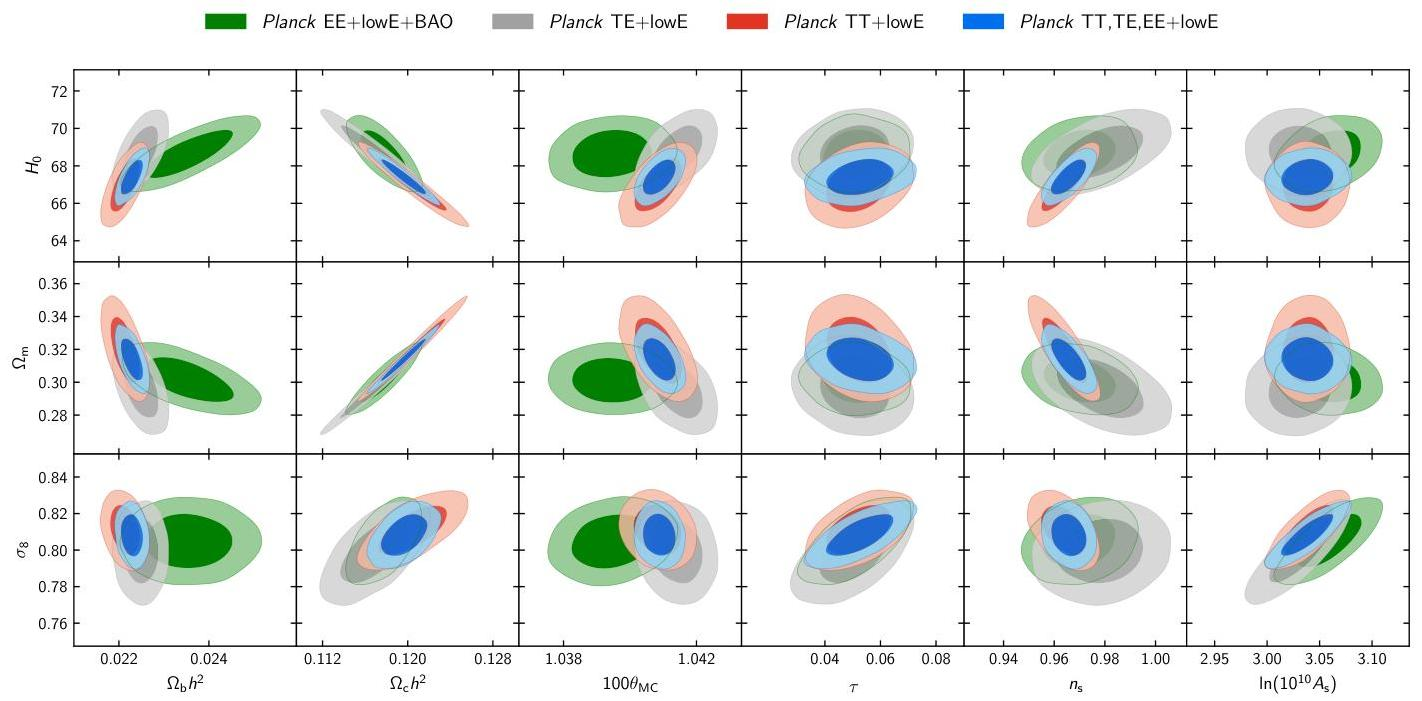

Fig. A.1. The equivalent of Fig. 5 using CamSpec in place of Plik, showing constraints on parameters of the base- $\Lambda$ CDM model using the high- $\ell$ TT, TE, and EE separately (with the EE results also including BAO), and the combined result from the TT,TE,EE likelihood.
and $\alpha_{217}^{T}=0.00763$ (very close to the coefficients adopted in PCP15); note that all of the input maps here are in units of thermodynamic temperature. The cleaned half-mission $143 \times 143$, $143 \times 217$ and $217 \times 217$ spectra are compared with uncleaned CamSpec spectra (using the same masks for both sets of spectra) and default foreground model in Fig. A.2.

To model residual foregrounds in the cleaned spectra, we assume that they follow power-laws, $A_{f}(\ell / 1500)^{T / 2}$ characterized by an amplitudes and spectral indices for each of the $143 \times 143$, $143 \times 217$ and $217 \times 217$ spectra together with kinetic and thermal Sunyaev-Zeldovich templates, as in the default foreground model. We assume the default foreground model for the $100 \times 100$ spectrum. We then form a CamSpec "cleaned" likelihood (used in several places in the main body of this paper) using the same covariance matrices as those computed for the uncleaned likelihood. Comparing parameters for the TT+lowE likelihood combination, the cleaned and uncleaned cosmological parameters agree to a fraction of a standard deviation, with $\theta_{\mathrm{MC}}$ and $n_{\mathrm{s}}$ from the cleaned likelihood each lower by $0.3 \sigma$. We conclude that systematics associated with modelling foregrounds do not introduce significant biases in cosmological parameter determinations.

Table A. 2 gives CamSpec results for extensions to the base$\Lambda$ CDM cosmology, which is the equivalent to Table 4, but with the addition of results for the CamSpec cleaned TT+lowE likelihood. The CamSpec and Plik likelihoods give closely similar results for these extensions. The only noteworthy differences are the TT,TE,EE results for $\Omega_{K}$, this being slightly closer to zero in the CamSpec likelihood (we find similar behaviour for the lensing consistency parameter $A_{\mathrm{L}}$, as discussed in Sect. 6.2) and somewhat weaker constraints on $\Sigma m_{r}$ and $r$. These differences give an indication of the sensitivity of our results to different methods and choices made in constructing the TT,TE,EE likelihoods and, in particular, to the schemes used to calibrate effective polarization efficiencies. A detailed description of CamSpec,
including further justification of the methodology used to construct the polarization blocks of the likelihood, is given in Efstathiou \& Gratton (2019).

[^0]
[^0]:    ${ }^{1}$ AIM, CEA, CNRS, Université Paris-Saclay, Université ParisDiderot, Sorbonne Paris Cité, F-91191 Gif-sur-Yvette, France
    ${ }^{2}$ APC, AstroParticule et Cosmologie, Université Paris Diderot, CNRS/IN2P3, CEA/lrfu, Observatoire de Paris, Sorbonne Paris Cité, 10, rue Alice Domon et Léonie Duquet, 75205 Paris Cedex 13, France
    ${ }^{3}$ African Institute for Mathematical Sciences, 6-8 Melrose Road, Muizenberg, Cape Town, South Africa
    ${ }^{4}$ Aix Marseille Univ, CNRS, CNES, LAM, Marseille, France
    ${ }^{5}$ Astrophysics Group, Cavendish Laboratory, University of Cambridge, J J Thomson Avenue, Cambridge CB3 0HE, U.K.
    ${ }^{6}$ Astrophysics \& Cosmology Research Unit, School of Mathematics, Statistics \& Computer Science, University of KwaZulu-Natal, Westville Campus, Private Bag X54001, Durban 4000, South Africa
    ${ }^{7}$ CITA, University of Toronto, 60 St. George St., Toronto, ON M5S 3H8, Canada
    ${ }^{8}$ CNRS, IRAP, 9 Av. colonel Roche, BP 44346, F-31028 Toulouse cedex 4, France
    ${ }^{9}$ Cahill Center for Astronomy and Astrophysics, California Institute of Technology, Pasadena CA, 91125, USA
    ${ }^{10}$ California Institute of Technology, Pasadena, California, U.S.A.
    ${ }^{11}$ Centre for Theoretical Cosmology, DAMTP, University of Cambridge, Wilberforce Road, Cambridge CB3 0WA, U.K.
    ${ }^{12}$ Computational Cosmology Center, Lawrence Berkeley National Laboratory, Berkeley, California, U.S.A.
    ${ }^{13}$ DTU Space, National Space Institute, Technical University of Denmark, Elektrovej 327, DK-2800 Kgs. Lyngby, Denmark
    ${ }^{14}$ Département de Physique Théorique, Université de Genève, 24, Quai E. Ansermet, 1211 Genève 4, Switzerland
    ${ }^{15}$ Département de Physique, École normale supérieure, PSL Research University, CNRS, 24 rue Lhomond, 75005 Paris, France
    ${ }^{16}$ Departamento de Astrofísica, Universidad de La Laguna (ULL), E38206 La Laguna, Tenerife, Spain

Table A.1. The equivalent of Table 2, but using the CamSpec likelihood in place of Plik.

| Parameter | $\begin{gathered} \text { TT+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TE+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { EE+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TT,TE,EE+lowE } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TT,TE,EE+lowE+lensing } \\ 68 \% \text { limits } \end{gathered}$ | $\begin{gathered} \text { TT,TE,EE+lowE+lensing+BAO } \\ 68 \% \text { limits } \end{gathered}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $\Omega_{\mathrm{K}} h^{2}$ | 0.02214 $\pm 0.00022$ | 0.02248 $\pm 0.00026$ | 0.0233 $\pm 0.0012$ | 0.02229 $\pm 0.00016$ | 0.02229 $\pm 0.00015$ | 0.02234 $\pm 0.00014$ |
| $\Omega_{\mathrm{c}} h^{2}$ | 0.1205 $\pm 0.0021$ | 0.1169 $\pm 0.0021$ | 0.1192 $\pm 0.0047$ | 0.1196 $\pm 0.0014$ | 0.1197 $\pm 0.0012$ | 0.11907 $\pm 0.00094$ |
| $1000_{\mathrm{MC}}$ | 1.04084 $\pm 0.00048$ | 1.04141 $\pm 0.00051$ | 1.03928 $\pm 0.00087$ | 1.04088 $\pm 0.00032$ | 1.04087 $\pm 0.00031$ | 1.04095 $\pm 0.00030$ |
| $\tau$ | 0.0521 $\pm 0.0080$ | 0.0504 $\pm 0.0088$ | 0.0504 $\pm 0.0088$ | 0.0528 $\pm 0.0080$ | $0.0536_{-0.0077}^{+0.0089}$ | $0.0552_{-0.0076}^{+0.0087}$ |
| $\ln \left(10^{20} A_{v}\right)$ | 3.039 $\pm 0.016$ | 3.031 $\pm 0.021$ | 3.058 $\pm 0.022$ | 3.039 $\pm 0.016$ | 3.041 $\pm 0.015$ | $3.043_{-0.015}^{+0.013}$ |
| $n_{v}$ | 0.9638 $\pm 0.0058$ | 0.978 $\pm 0.011$ | 0.967 $\pm 0.014$ | 0.9658 $\pm 0.0045$ | 0.9656 $\pm 0.0042$ | 0.9671 $\pm 0.0038$ |
| $H_{0}\left[\mathrm{km} \mathrm{v}^{-1} \mathrm{Mpc}^{-1}\right]$ | 66.98 $\pm 0.92$ | 68.72 $\pm 0.93$ | 67.9 $\pm 2.6$ | 67.41 $\pm 0.62$ | 67.39 $\pm 0.54$ | 67.66 $\pm 0.42$ |
| $\Omega_{\Lambda}$ | 0.680 $\pm 0.013$ | 0.703 $\pm 0.012$ | $0.687_{-0.038}^{+0.035}$ | 0.6861 $\pm 0.0085$ | 0.6858 $\pm 0.0074$ | 0.6897 $\pm 0.0057$ |
| $\Omega_{\mathrm{m}}$ | 0.320 $\pm 0.013$ | 0.297 $\pm 0.012$ | $0.313_{-0.035}^{+0.025}$ | 0.3139 $\pm 0.0085$ | 0.3142 $\pm 0.0074$ | 0.3103 $\pm 0.0057$ |
| $\Omega_{\mathrm{m}} h^{2}$ | 0.1432 $\pm 0.0020$ | 0.1400 $\pm 0.0020$ | 0.1431 $\pm 0.0038$ | 0.1426 $\pm 0.0013$ | 0.1426 $\pm 0.0011$ | 0.14205 $\pm 0.00090$ |
| $\Omega_{\mathrm{m}} h^{3}$ | 0.09593 $\pm 0.00045$ | 0.09622 $\pm 0.00054$ | $0.0971_{-0.0017}^{+0.0015}$ | 0.09610 $\pm 0.00031$ | 0.09610 $\pm 0.00031$ | 0.09611 $\pm 0.00031$ |
| $\sigma_{\mathrm{S}}$ | 0.8110 $\pm 0.0089$ | 0.799 $\pm 0.012$ | $0.809_{-0.017}^{+0.016}$ | 0.8083 $\pm 0.0076$ | 0.8091 $\pm 0.0060$ | 0.8083 $\pm 0.0060$ |
| $\sigma_{S}\left(\Omega_{\mathrm{m}} / 0.3\right)^{0.5}$ | 0.837 $\pm 0.024$ | 0.795 $\pm 0.025$ | 0.825 $\pm 0.058$ | 0.827 $\pm 0.016$ | 0.828 $\pm 0.013$ | 0.822 $\pm 0.011$ |
| $\sigma_{S} \Omega_{\mathrm{m}}^{0.25}$ | 0.610 $\pm 0.012$ | 0.590 $\pm 0.013$ | 0.604 $\pm 0.028$ | 0.6050 $\pm 0.0083$ | 0.6058 $\pm 0.0064$ | 0.6033 $\pm 0.0057$ |
| $z_{\text {in }}$ | $7.49_{-0.42}^{+0.83}$ | $7.18_{-0.35}^{+0.93}$ | $7.06_{-0.37}^{+0.90}$ | $7.52_{-0.35}^{+0.87}$ | 7.61 $\pm 0.75$ | 7.75 $\pm 0.73$ |
| $10^{9} A_{v}$ | 2.089 $\pm 0.034$ | 2.072 $\pm 0.042$ | 2.130 $\pm 0.046$ | 2.088 $\pm 0.034$ | $2.092_{-0.035}^{+0.028}$ | $2.097_{-0.032}^{+0.028}$ |
| $10^{9} A_{v} e^{-2 t}$ | 1.882 $\pm 0.014$ | 1.873 $\pm 0.019$ | 1.925 $\pm 0.024$ | 1.879 $\pm 0.011$ | 1.879 $\pm 0.011$ | 1.877 $\pm 0.011$ |
| Age [Gyr] | 13.825 $\pm 0.037$ | 13.757 $\pm 0.039$ | 13.75 $\pm 0.14$ | 13.805 $\pm 0.025$ | 13.805 $\pm 0.023$ | 13.796 $\pm 0.020$ |
| $z_{r}$ | 1090.26 $\pm 0.41$ | 1089.51 $\pm 0.42$ | $1088.8_{-1.6}^{+1.6}$ | 1089.99 $\pm 0.28$ | 1089.99 $\pm 0.26$ | 1089.88 $\pm 0.22$ |
| $r_{v}[\mathrm{Mpc}]$ | 144.49 $\pm 0.48$ | 145.15 $\pm 0.50$ | 143.94 $\pm 0.66$ | 144.58 $\pm 0.31$ | 144.57 $\pm 0.28$ | 144.70 $\pm 0.23$ |
| 1006 | 1.04105 $\pm 0.00047$ | 1.04158 $\pm 0.00050$ | 1.03937 $\pm 0.00084$ | 1.04107 $\pm 0.00031$ | 1.04106 $\pm 0.00031$ | 1.04114 $\pm 0.00030$ |
| $z_{\text {drag }}$ | 1059.43 $\pm 0.45$ | 1059.98 $\pm 0.55$ | 1061.9 $\pm 2.3$ | 1059.73 $\pm 0.33$ | 1059.74 $\pm 0.32$ | 1059.79 $\pm 0.32$ |
| $r_{\text {drag }}[\mathrm{Mpc}]$ | 147.23 $\pm 0.48$ | 147.79 $\pm 0.52$ | 146.31 $\pm 0.69$ | 147.27 $\pm 0.31$ | 147.26 $\pm 0.28$ | 147.38 $\pm 0.25$ |
| $k_{\mathrm{D}}\left[\mathrm{Mpc}^{-1}\right]$ | 0.14054 $\pm 0.00052$ | 0.14021 $\pm 0.00060$ | 0.1423 $\pm 0.0012$ | 0.14061 $\pm 0.00034$ | 0.14063 $\pm 0.00033$ | 0.14054 $\pm 0.00031$ |
| $z_{\text {eq }}$ | 3408 $\pm 48$ | 3331 $\pm 48$ | 3405 $\pm 90$ | 3392 $\pm 31$ | 3393 $\pm 27$ | 3379 $\pm 22$ |
| $k_{\text {eq }}\left[\mathrm{Mpc}^{-1}\right]$ | 0.01040 $\pm 0.00015$ | 0.01017 $\pm 0.00014$ | 0.01039 $\pm 0.00027$ | 0.010352 $\pm 0.000095$ | 0.010355 $\pm 0.000083$ | 0.010314 $\pm 0.000066$ |
| 1006 $v_{\text {eq }}$ | 0.4487 $\pm 0.0046$ | 0.4565 $\pm 0.0047$ | 0.4492 $\pm 0.0091$ | 0.4503 $\pm 0.0030$ | 0.4502 $\pm 0.0026$ | 0.4515 $\pm 0.0021$ |
| $f_{2000}^{143}$ | 30.8 $\pm 3.0$ |  |  | 29.8 $\pm 2.8$ | 29.7 $\pm 2.8$ | $29.5 \pm 2.8$ |
| $f_{2000}^{213}$ | 107.6 $\pm 2.0$ |  |  | 106.9 $\pm 1.9$ | 106.9 $\pm 1.9$ | 106.8 $\pm 1.9$ |
| $f_{2000}^{143+217}$ | 33.0 $\pm 2.1$ |  |  | 32.2 $\pm 2.0$ | 32.2 $\pm 2.0$ | 32.0 $\pm 2.0$ |

Table A.2. Constraints on 1-parameter extensions to the base- $\Lambda$ CDM model using CamSpec at high $\ell$, and also including Planck lensing and BAO. This is equivalent to Table 4 for Plik, except that we have added results for the cleaned TT CamSpec likelihood in the third column. Note that we quote $95 \%$ limits here.

| Parameter | TT+lowE | $\mathrm{TT}^{\text {clon }}+$ lowE | TT, TE, EE+lowE | TT, TE, EE+lowE+lensing | TT, TE, EE+lowE+lensing+BAO |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $\begin{aligned} & \Omega_{\mathrm{K}} \\ & \Sigma m_{v}[\mathrm{eV}] \ldots \\ & N_{\text {eff }}$ | $\begin{gathered} -0.058_{-0.051}^{+0.046} \\ <0.569 \\ 2.94_{-0.55}^{+0.50} \end{gathered}$ | $\begin{gathered} -0.057_{-0.051}^{+0.045} \\ <0.578 \\ 2.99_{-0.55}^{+0.52} \end{gathered}$ | $\begin{gathered} -0.037_{-0.034}^{+0.032} \\ <0.379 \\ 2.98_{-0.42}^{+0.42} \end{gathered}$ | $\begin{gathered} -0.011_{-0.015}^{+0.012} \\ <0.273 \\ 2.88_{-0.42}^{+0.42} \end{gathered}$ | $\begin{gathered} 0.0005+0.0038 \\ -0.0040 \\ <0.131 \\ 2.98_{-0.38}^{+0.39} \end{gathered}$ |
| $Y p$ | $0.242_{-0.042}^{+0.040}$ | $0.246_{-0.042}^{+0.042}$ | $0.246_{-0.035}^{+0.035}$ | $0.244_{-0.035}^{+0.034}$ | $0.248_{-0.035}^{+0.032}$ |
| $\mathrm{dn}_{v} / \mathrm{d} \ln k$ | $-0.003_{-0.015}^{+0.015}$ | $-0.005_{-0.015}^{+0.015}$ | $-0.001_{-0.015}^{+0.013}$ | $-0.001_{-0.015}^{+0.013}$ | $0.000+0.015$ |
| $r_{0.002}$ | $<0.106$ | $<0.105$ | $<0.141$ | $<0.136$ | $<0.141$ |
| $w_{0}$ | $-1.54_{-0.48}^{+0.50}$ | $-1.58_{-0.48}^{+0.60}$ | $-1.55_{-0.45}^{+0.56}$ | $-1.54_{-0.41}^{+0.51}$ | $-1.03_{-0.11}^{+0.10}$ |
|  |  |  |  |  |  |

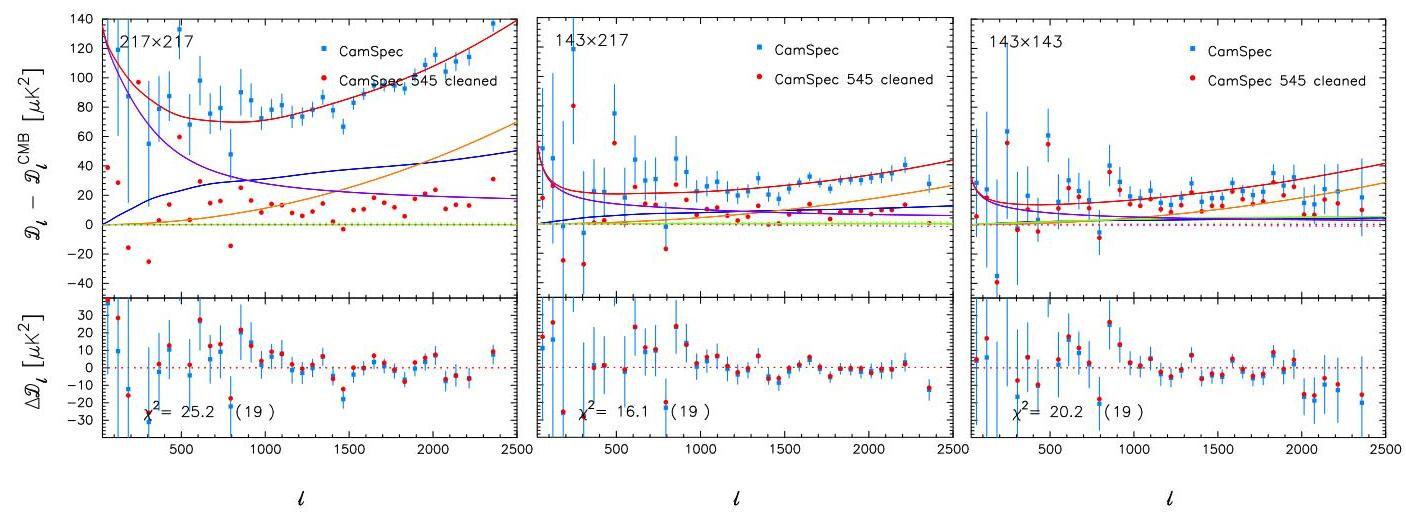

Fig. A.2. Residual plots illustrating the sensitivity of the $T T$ spectra to foreground modelling. The blue points in the upper panels show the CamSpec half-mission cross-spectra after subtraction of the best-fit $\Lambda$ CDM spectrum fit to TT+lowE. The residuals in the upper panel should be accurately described by the foreground model. Major foreground components are shown by the solid lines, colour coded as follows: total foreground spectrum (red); Poisson point sources (orange); clustered CIB (blue); thermal SZ (green); and Galactic dust (purple). Minor foreground components are shown by the dotted lines, colour coded as follows: kinetic SZ (green); and tSZ×CIB cross-correlation (purple). The red points in the upper panel panels show the 545 GHz -cleaned spectra (minus best-fit CMB, as subtracted from the uncleaned spectra) that are fit to a power-law residual foreground model, as discussed in the text. The lower panels show the spectra after subtraction of the best-fit foreground models. The $\chi^{2}$ values of the residuals of the blue points, and the number of band powers, are listed in the lower panels.

[^0]Fig. A.2. Residual plots illustrating the sensitivity of the $T T$ spectra to foreground modelling. The blue points in the upper panels show the CamSpec half-mission cross-spectra after subtraction of the best-fit $\Lambda$ CDM spectrum fit to TT+lowE. The residuals in the upper panel should be accurately described by the foreground model. Major foreground components are shown by the solid lines, colour coded as follows: total foreground spectrum (red); Poisson point sources (orange); clustered CIB (blue); thermal SZ (green); and Galactic dust (purple). Minor foreground components are shown by the dotted lines, colour coded as follows: kinetic SZ (green); and tSZ×CIB cross-correlation (purple). The red points in the upper panel panels show the 545 GHz -cleaned spectra (minus best-fit CMB, as subtracted from the uncleaned spectra) that are fit to a power-law residual foreground model, as discussed in the text. The lower panels show the spectra after subtraction of the best-fit foreground models. The $\chi^{2}$ values of the residuals of the blue points, and the number of band powers, are listed in the lower panels.

[^1]
[^0]:    ${ }^{17}$ Departamento de Física, Universidad de Oviedo, C/ Federico García Lorca, 18 , Oviedo, Spain
    ${ }^{18}$ Department of Astrophysics/IMAPP, Radboud University, P.O. Box 9010, 6500 GL Nijmegen, The Netherlands
    ${ }^{19}$ Department of Mathematics, University of Stellenbosch, Stellenbosch 7602, South Africa
    ${ }^{20}$ Department of Physics \& Astronomy, University of British Columbia, 6224 Agricultural Road, Vancouver, British Columbia, Canada
    ${ }^{21}$ Department of Physics \& Astronomy, University of the Western Cape, Cape Town 7535, South Africa
    ${ }^{22}$ Department of Physics and Astronomy, University College London, London WC1E 6BT, U.K.
    ${ }^{23}$ Department of Physics and Astronomy, University of Sussex, Brighton BN1 9QH, U.K.
    ${ }^{24}$ Department of Physics, Gustaf Hällströmin katu 2a, University of Helsinki, Helsinki, Finland
    ${ }^{25}$ Department of Physics, Princeton University, Princeton, New Jersey, U.S.A.
    ${ }^{26}$ Department of Physics, University of California, Berkeley, California, U.S.A.
    ${ }^{27}$ Department of Physics, University of California, One Shields Avenue, Davis, California, U.S.A.
    ${ }^{28}$ Department of Physics, University of California, Santa Barbara, California, U.S.A.
    ${ }^{29}$ Dipartimento di Fisica e Astronomia G. Galilei, Università degli Studi di Padova, via Marzolo 8, 35131 Padova, Italy
    ${ }^{30}$ Dipartimento di Fisica e Scienze della Terra, Università di Ferrara, Via Saragat 1, 44122 Ferrara, Italy
    ${ }^{31}$ Dipartimento di Fisica, Università La Sapienza, P. le A. Moro 2, Roma, Italy
    ${ }^{32}$ Dipartimento di Fisica, Università degli Studi di Milano, Via Celoria, 16, Milano, Italy
    ${ }^{33}$ Dipartimento di Fisica, Università degli Studi di Trieste, via A. Valerio 2, Trieste, Italy
    ${ }^{34}$ Dipartimento di Fisica, Università di Roma Tor Vergata, Via della Ricerca Scientifica, 1, Roma, Italy

[^1]:    ${ }^{35}$ European Space Agency, ESAC, Planck Science Office, Camino bajo del Castillo, s/n, Urbanización Villafranca del Castillo, Villanueva de la Cañada, Madrid, Spain
    ${ }^{36}$ European Space Agency, ESTEC, Keplerlaan 1, 2201 AZ Noordwijk, The Netherlands
    ${ }^{37}$ Gran Sasso Science Institute, INFN, viale F. Crispi 7, 67100 L'Aquila, Italy
    ${ }^{38}$ HEP Division, Argonne National Laboratory, Lemont, IL 60439, USA
    ${ }^{39}$ Haverford College Astronomy Department, 370 Lancaster Avenue, Haverford, Pennsylvania, U.S.A.
    ${ }^{40}$ Helsinki Institute of Physics, Gustaf Hällströmin katu 2, University of Helsinki, Helsinki, Finland
    ${ }^{41}$ INAF - OAS Bologna, Istituto Nazionale di Astrofisica Osservatorio di Astrofisica e Scienza dello Spazio di Bologna, Area della Ricerca del CNR, Via Gobetti 101, 40129, Bologna, Italy
    ${ }^{42}$ INAF - Osservatorio Astronomico di Padova, Vicolo dell'Osservatorio 5, Padova, Italy
    ${ }^{43}$ INAF - Osservatorio Astronomico di Trieste, Via G.B. Tiepolo 11, Trieste, Italy
    ${ }^{44}$ INAF, Istituto di Radioastronomia, Via Piero Gobetti 101, I-40129 Bologna, Italy
    ${ }^{45}$ INAF/IASF Milano, Via E. Bassini 15, Milano, Italy
    ${ }^{46}$ INFN - CNAF, viale Berti Pichat 6/2, 40127 Bologna, Italy
    ${ }^{47}$ INFN, Sezione di Bologna, viale Berti Pichat 6/2, 40127 Bologna, Italy
    ${ }^{48}$ INFN, Sezione di Ferrara, Via Saragat 1, 44122 Ferrara, Italy
    ${ }^{49}$ INFN, Sezione di Milano, Via Celoria 16, Milano, Italy
    ${ }^{50}$ INFN, Sezione di Roma 1, Università di Roma Sapienza, Piazzale Aldo Moro 2, 00185, Roma, Italy
    ${ }^{51}$ INFN, Sezione di Roma 2, Università di Roma Tor Vergata, Via della Ricerca Scientifica, 1, Roma, Italy
    ${ }^{52}$ IUCAA, Post Bag 4, Ganeshkhind, Pune University Campus, Pune 411007 , India
    ${ }^{53}$ Imperial College London, Astrophysics group, Blackett Laboratory, Prince Consort Road, London, SW7 2AZ, U.K.
    ${ }^{54}$ Institut d’Astrophysique Spatiale, CNRS, Univ. Paris-Sud, Université Paris-Saclay, Bât. 121, 91405 Orsay cedex, France

${ }^{55}$ Institut d'Astrophysique de Paris, CNRS (UMR7095), 98 bis Boulevard Arago, F-75014, Paris, France
${ }^{56}$ Institut für Theoretische Teilchenphysik und Kosmologie, RWTH Aachen University, D-52056 Aachen, Germany
${ }^{57}$ Institute Lorentz, Leiden University, PO Box 9506, Leiden 2300 RA, The Netherlands
${ }^{58}$ Institute of Astronomy, University of Cambridge, Madingley Road, Cambridge CB3 0HA, U.K.
${ }^{59}$ Institute of Theoretical Astrophysics, University of Oslo, Blindern, Oslo, Norway
${ }^{60}$ Instituto de Astrofísica de Canarias, C/Vía Láctea s/n, La Laguna, Tenerife, Spain
${ }^{61}$ Instituto de Física de Cantabria (CSIC-Universidad de Cantabria), Avda. de los Castros s/n, Santander, Spain
${ }^{62}$ Istituto Nazionale di Fisica Nucleare, Sezione di Padova, via Marzolo 8, I-35131 Padova, Italy
${ }^{63}$ Jet Propulsion Laboratory, California Institute of Technology, 4800 Oak Grove Drive, Pasadena, California, U.S.A.
${ }^{64}$ Jodrell Bank Centre for Astrophysics, Alan Turing Building, School of Physics and Astronomy, The University of Manchester, Oxford Road, Manchester, M13 9PL, U.K.
${ }^{65}$ Kavli Institute for Cosmology Cambridge, Madingley Road, Cambridge, CB3 0HA, U.K.
${ }^{66}$ Kavli Institute for the Physics and Mathematics of the Universe (Kavli IPMU, WPI), UTIAS, The University of Tokyo, Chiba, 2778583, Japan
${ }^{67}$ Laboratoire d'Océanographie Physique et Spatiale (LOPS), Univ. Brest, CNRS, Ifremer, IRD, Brest, France
${ }^{68}$ Laboratoire de Physique Subatomique et Cosmologie, Université Grenoble-Alpes, CNRS/IN2P3, 53, rue des Martyrs, 38026 Grenoble Cedex, France
${ }^{69}$ Laboratoire de Physique Théorique, Université Paris-Sud 11 \& CNRS, Bâtiment 210, 91405 Orsay, France
${ }^{70}$ Lawrence Berkeley National Laboratory, Berkeley, California, U.S.A.
${ }^{71}$ Low Temperature Laboratory, Department of Applied Physics, Aalto University, Espoo, FI-00076 AALTO, Finland
${ }^{72}$ Max-Planck-Institut für Astrophysik, Karl-Schwarzschild-Str. 1, 85741 Garching, Germany
${ }^{73}$ Mullard Space Science Laboratory, University College London, Surrey RH5 6NT, U.K.
${ }^{74}$ NAOC-UKZN Computational Astrophysics Centre (NUCAC), University of KwaZulu-Natal, Durban 4000, South Africa
${ }^{75}$ National Centre for Nuclear Research, ul. L. Pasteura 7, 02-093 Warsaw, Poland
${ }^{76}$ Physics Department, Shahid Beheshti University, Velenjak, Tehran 19839, Iran
${ }^{77}$ Purple Mountain Observatory, No. 8 Yuan Hua Road, 210034 Nanjing, China
${ }^{78}$ SISSA, Astrophysics Sector, via Bonomea 265, 34136, Trieste, Italy
${ }^{79}$ San Diego Supercomputer Center, University of California, San Diego, 9500 Gilman Drive, La Jolla, CA 92093, USA
${ }^{80}$ School of Chemistry and Physics, University of KwaZulu-Natal, Westville Campus, Private Bag X54001, Durban, 4000, South Africa
${ }^{81}$ School of Physical Sciences, National Institute of Science Education and Research, HBNI, Jatni-752050, Odissa, India
${ }^{82}$ School of Physics and Astronomy, Cardiff University, Queens Buildings, The Parade, Cardiff, CF24 3AA, U.K.
${ }^{83}$ School of Physics and Astronomy, Sun Yat-sen University, 2 Daxue Rd, Tangjia, Zhuhai, China
${ }^{84}$ School of Physics and Astronomy, University of Nottingham, Nottingham NG7 2RD, U.K.
${ }^{85}$ School of Physics, Indian Institute of Science Education and Research Thiruvananthapuram, Maruthamala PO, Vithura, Thiruvananthapuram 695551, Kerala, India
${ }^{86}$ School of Physics, The University of New South Wales, Sydney NSW 2052, Australia
${ }^{87}$ Simon Fraser University, Department of Physics, 8888 University Drive, Burnaby BC, Canada
${ }^{88}$ Sorbonne Université, Institut Lagrange de Paris (ILP), 98 bis Boulevard Arago, 75014 Paris, France
${ }^{89}$ Sorbonne Université, Observatoire de Paris, Université PSL, École normale supérieure, CNRS, LERMA, F-75005, Paris, France
${ }^{90}$ Sorbonne Université, UMR7095, Institut d’Astrophysique de Paris, 98 bis Boulevard Arago, F-75014, Paris, France
${ }^{91}$ Space Research Institute (IKI), Russian Academy of Sciences, Profsoyuznaya Str, 84/32, Moscow, 117997, Russia
${ }^{92}$ Space Science Data Center - Agenzia Spaziale Italiana, Via del Politecnico snc, 00133, Roma, Italy
${ }^{93}$ Space Sciences Laboratory, University of California, Berkeley, California, U.S.A.
${ }^{94}$ The Oskar Klein Centre for Cosmoparticle Physics, Department of Physics, Stockholm University, AlbaNova, SE-106 91 Stockholm, Sweden
${ }^{95}$ Université de Toulouse, UPS-OMP, IRAP, F-31028 Toulouse cedex 4, France
${ }^{96}$ University of Heidelberg, Institute for Theoretical Physics, Philosophenweg 16, 69120, Heidelberg, Germany
${ }^{97}$ Warsaw University Observatory, Aleje Ujazdowskie 4, 00-478 Warszawa, Poland

In [9]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))